In [1]:
import numpy as np
import csv
import os
import math
import random
import copy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [2]:
df=pd.read_csv('./Bike-Sharing-Dataset/day.csv', sep=',',header='infer')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

# Question 1

In [3]:
df_corr = df.corr(method='pearson')
df_corr

instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.248546  0.123006  0.054274  0.059923   
registered  0.659623  0.411623  0.594248  0.293488 -0.108745  0.057367   
cnt         0.628830  0.406100  0.566710  0.279977 -0.068348  0.067443   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant      -0.004337   -0.021477  0.150580  0.152638  0.016375  -0.112620   
season        0.012485    0.019211  0.334315  0.342876  0.205445  -0.229046   
yr           -0.002013   -0.048727  0.047604  0.046106 -0.110651  -0.011817   
mnth         -0.005901    0.043528  0.220205  0.227459  0.222204  -0.207502   
holiday      -0.253023   -0.034627 -0.028556 -0.032507 -0.015937   0.006292   
weekday       0.035790    0.031087 -0.000170 -0.007537 -0.052232   0.014282   
workingday    1.000000    0.061200  0.052660  0.052182  0.024327  -0.018796   
weathersit    0.061200    1.000000 -0.120602 -0.121583  0.591045   0.039511   
temp          0.052660   -0.120602  1.000000  0.991702  0.126963  -0.157944   
atemp         0.052182   -0.121583  0.991702  1.000000  0.139988  -0.183643   
hum           0.024327    0.591045  0.126963  0.139988  1.000000  -0.248489   
windspeed    -0.018796    0.039511 -0.157944 -0.183643 -0.248489   1.000000   
casual       -0.518044   -0.247353  0.543285  0.543864 -0.077008  -0.167613   
registered    0.303907   -0.260388  0.540012  0.544192 -0.091089  -0.217449   
cnt           0.061156   -0.297391  0.627494  0.631066 -0.100659  -0.234545   

              casual  registered       cnt  
instant     0.275255    0.659623  0.628830  
season      0.210399    0.411623  0.406100  
yr          0.248546    0.594248  0.566710  
mnth        0.123006    0.293488  0.279977  
holiday     0.054274   -0.108745 -0.068348  
weekday     0.059923    0.057367  0.067443  
workingday -0.518044    0.303907  0.061156  
weathersit -0.247353   -0.260388 -0.297391  
temp        0.543285    0.540012  0.627494  
atemp       0.543864    0.544192  0.631066  
hum        -0.077008   -0.091089 -0.100659  
windspeed  -0.167613   -0.217449 -0.234545  
casual      1.000000    0.395282  0.672804  
registered  0.395282    1.000000  0.945517  
cnt         0.672804    0.945517  1.000000

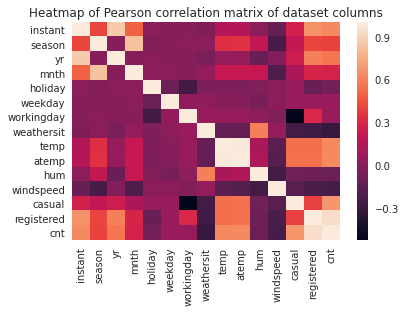

In [4]:
sns.set()
heatmap = sns.heatmap(df_corr)
plt.title('Heatmap of Pearson correlation matrix of dataset columns')
plt.show()

In [5]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True) # Should not contain the three target variables nor instant
temp1 = temp[['casual']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.5438636902622045
atemp


In [6]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True)
temp1 = temp[['registered']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.5942481679351337
yr


In [7]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True)
temp1 = temp[['cnt']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.6310656998491813
atemp


# Question 2

/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef6340470>,
      dtype=object)

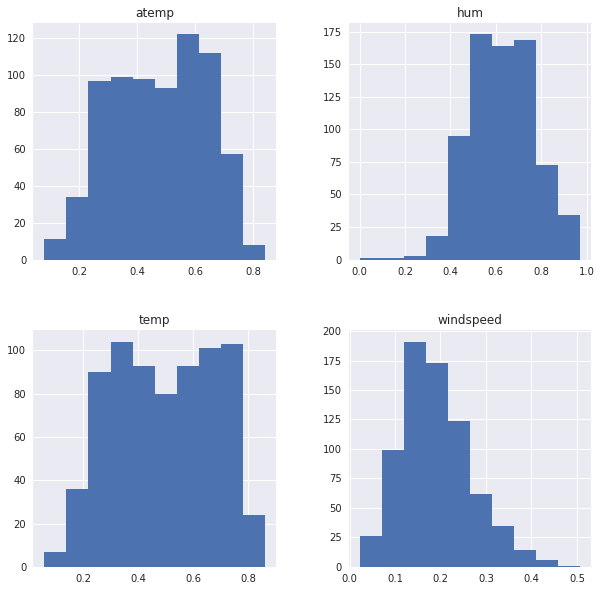

In [8]:
df.hist(column=['temp','atemp','hum','windspeed'],figsize=(10,10))

# Question 3

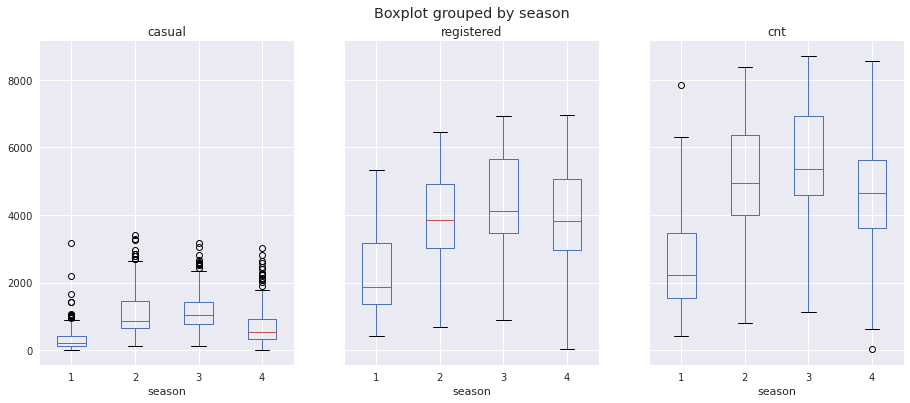

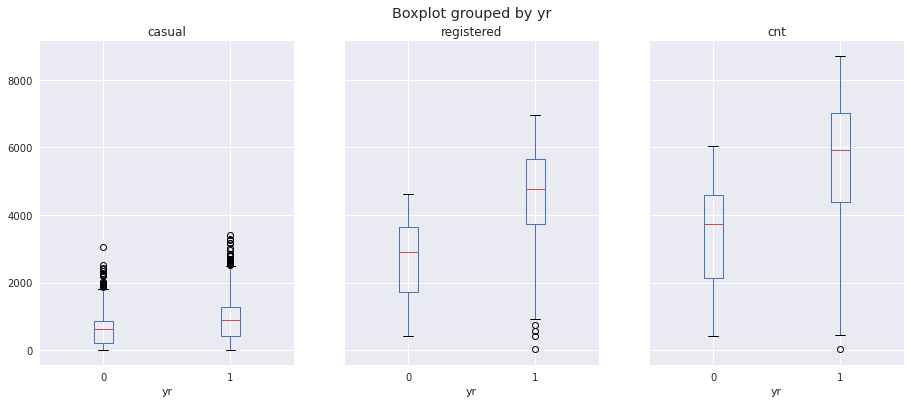

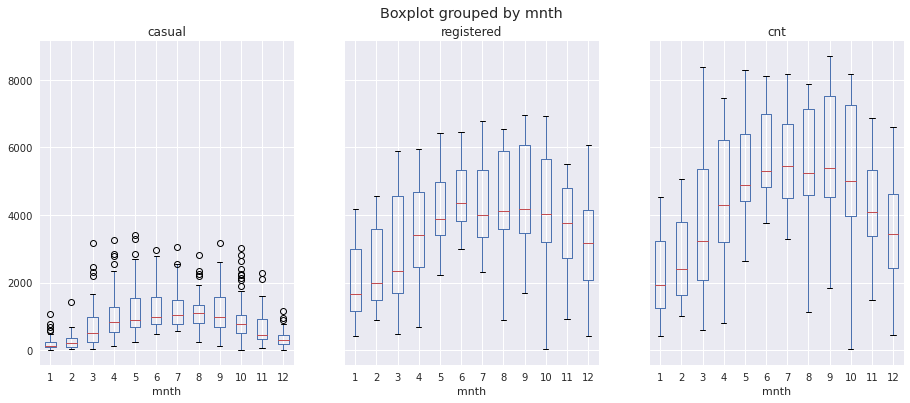

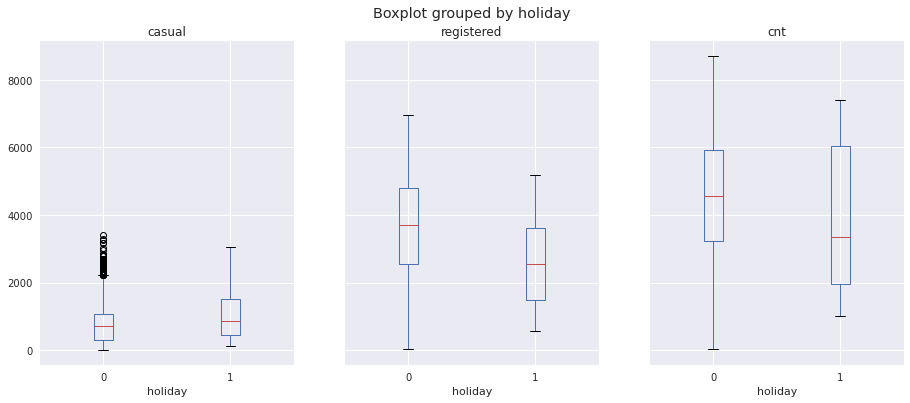

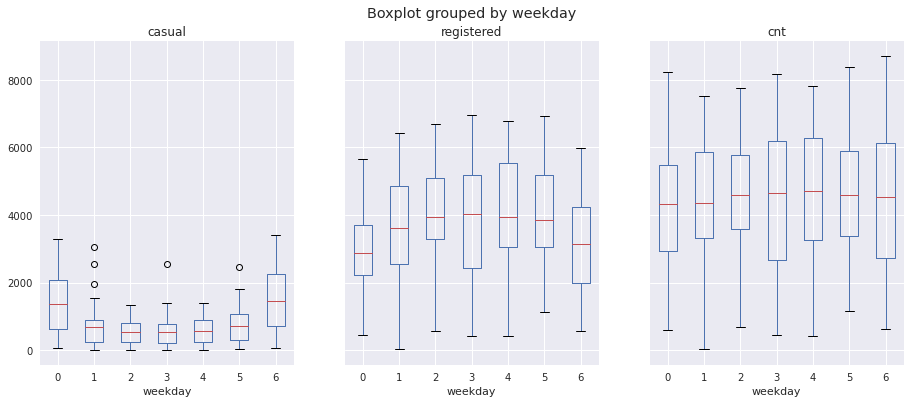

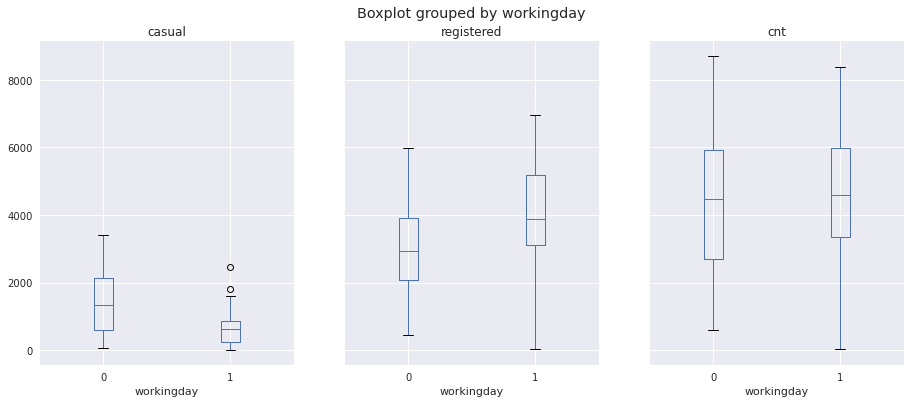

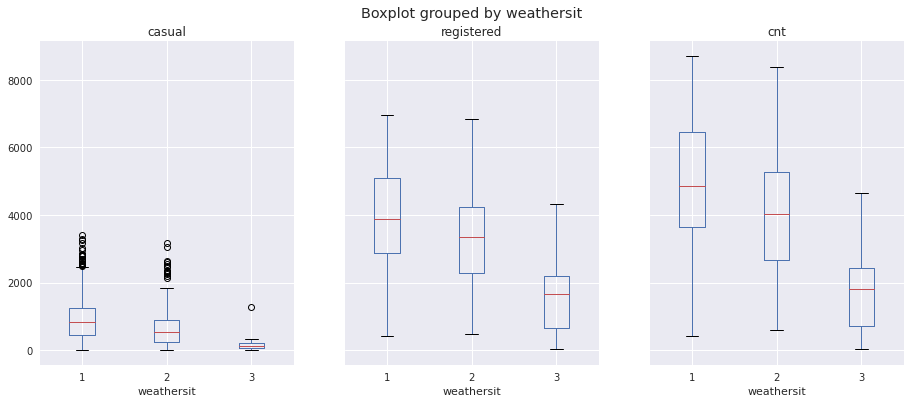

In [9]:
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    df.boxplot(by=col,column=['casual','registered','cnt'],figsize=(15,6),layout=(1,3))

# Question 4

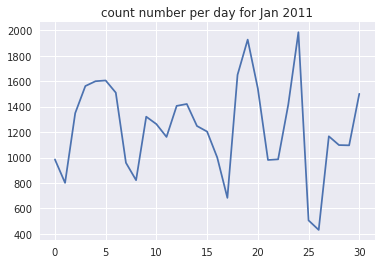

In [10]:
cnt1 = np.asarray(df['cnt'].head(31))
plt.title('count number per day for Jan 2011')
plt.plot(range(cnt1.shape[0]),cnt1)
#df.loc[31:58]

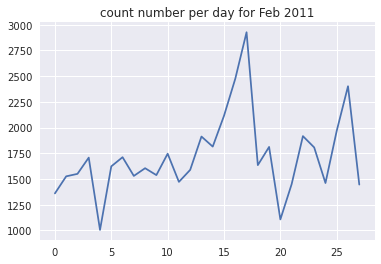

In [11]:
cnt2 = np.asarray(df['cnt'].loc[31:58])
plt.title('count number per day for Feb 2011')
plt.plot(range(cnt2.shape[0]),cnt2)

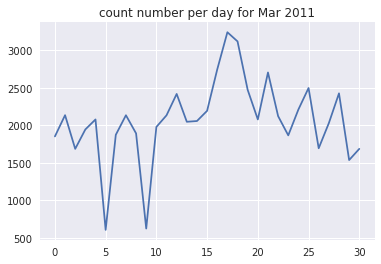

In [12]:
cnt3 = np.asarray(df['cnt'].loc[59:89])
plt.title('count number per day for Mar 2011')
plt.plot(range(cnt3.shape[0]),cnt3)

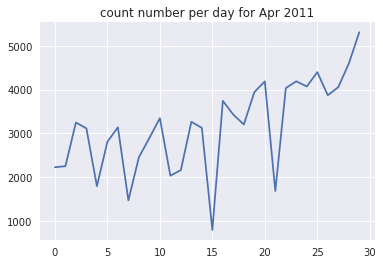

In [13]:
cnt4 = np.asarray(df['cnt'].loc[90:119])
plt.title('count number per day for Apr 2011')
plt.plot(range(cnt4.shape[0]),cnt4)

# Question 6

In [14]:
# We do scalar assignment for each feature.
# Since dteday is continuous from 2011-01-01 to 2012-12-31, we delete this column as instant has covered this information.
df_pre = copy.deepcopy(df)
del df_pre['dteday']

# Question 7

In [15]:
def stdit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        STD = d.std()
        newDataFrame[c] = ((d - (MAX + MIN) / 2) / STD).tolist()
    return newDataFrame

In [16]:
del df_pre['casual']
del df_pre['registered']
del df_pre['cnt']
df_std = stdit(df_pre)
df_std

instant    season        yr     mnth  holiday   weekday  workingday  \
0   -1.728500 -1.350369 -0.999317 -1.59332 -2.99124  1.496418   -1.074729   
1   -1.723764 -1.350369 -0.999317 -1.59332 -2.99124 -1.496418   -1.074729   
2   -1.719028 -1.350369 -0.999317 -1.59332 -2.99124 -0.997612    1.074729   
3   -1.714293 -1.350369 -0.999317 -1.59332 -2.99124 -0.498806    1.074729   
4   -1.709557 -1.350369 -0.999317 -1.59332 -2.99124  0.000000    1.074729   
5   -1.704821 -1.350369 -0.999317 -1.59332 -2.99124  0.498806    1.074729   
6   -1.700086 -1.350369 -0.999317 -1.59332 -2.99124  0.997612    1.074729   
7   -1.695350 -1.350369 -0.999317 -1.59332 -2.99124  1.496418   -1.074729   
8   -1.690615 -1.350369 -0.999317 -1.59332 -2.99124 -1.496418   -1.074729   
9   -1.685879 -1.350369 -0.999317 -1.59332 -2.99124 -0.997612    1.074729   
10  -1.681143 -1.350369 -0.999317 -1.59332 -2.99124 -0.498806    1.074729   
11  -1.676408 -1.350369 -0.999317 -1.59332 -2.99124  0.000000    1.074729   
12  -1.671672 -1.350369 -0.999317 -1.59332 -2.99124  0.498806    1.074729   
13  -1.666937 -1.350369 -0.999317 -1.59332 -2.99124  0.997612    1.074729   
14  -1.662201 -1.350369 -0.999317 -1.59332 -2.99124  1.496418   -1.074729   
15  -1.657465 -1.350369 -0.999317 -1.59332 -2.99124 -1.496418   -1.074729   
16  -1.652730 -1.350369 -0.999317 -1.59332  2.99124 -0.997612   -1.074729   
17  -1.647994 -1.350369 -0.999317 -1.59332 -2.99124 -0.498806    1.074729   
18  -1.643258 -1.350369 -0.999317 -1.59332 -2.99124  0.000000    1.074729   
19  -1.638523 -1.350369 -0.999317 -1.59332 -2.99124  0.498806    1.074729   
20  -1.633787 -1.350369 -0.999317 -1.59332 -2.99124  0.997612    1.074729   
21  -1.629052 -1.350369 -0.999317 -1.59332 -2.99124  1.496418   -1.074729   
22  -1.624316 -1.350369 -0.999317 -1.59332 -2.99124 -1.496418   -1.074729   
23  -1.619580 -1.350369 -0.999317 -1.59332 -2.99124 -0.997612    1.074729   
24  -1.614845 -1.350369 -0.999317 -1.59332 -2.99124 -0.498806    1.074729   
25  -1.610109 -1.350369 -0.999317 -1.59332 -2.99124  0.000000    1.074729   
26  -1.605374 -1.350369 -0.999317 -1.59332 -2.99124  0.498806    1.074729   
27  -1.600638 -1.350369 -0.999317 -1.59332 -2.99124  0.997612    1.074729   
28  -1.595902 -1.350369 -0.999317 -1.59332 -2.99124  1.496418   -1.074729   
29  -1.591167 -1.350369 -0.999317 -1.59332 -2.99124 -1.496418   -1.074729   
..        ...       ...       ...      ...      ...       ...         ...   
701  1.591167  1.350369  0.999317  1.59332 -2.99124 -1.496418   -1.074729   
702  1.595902  1.350369  0.999317  1.59332 -2.99124 -0.997612    1.074729   
703  1.600638  1.350369  0.999317  1.59332 -2.99124 -0.498806    1.074729   
704  1.605374  1.350369  0.999317  1.59332 -2.99124  0.000000    1.074729   
705  1.610109  1.350369  0.999317  1.59332 -2.99124  0.498806    1.074729   
706  1.614845  1.350369  0.999317  1.59332 -2.99124  0.997612    1.074729   
707  1.619580  1.350369  0.999317  1.59332 -2.99124  1.496418   -1.074729   
708  1.624316  1.350369  0.999317  1.59332 -2.99124 -1.496418   -1.074729   
709  1.629052  1.350369  0.999317  1.59332 -2.99124 -0.997612    1.074729   
710  1.633787  1.350369  0.999317  1.59332 -2.99124 -0.498806    1.074729   
711  1.638523  1.350369  0.999317  1.59332 -2.99124  0.000000    1.074729   
712  1.643258  1.350369  0.999317  1.59332 -2.99124  0.498806    1.074729   
713  1.647994  1.350369  0.999317  1.59332 -2.99124  0.997612    1.074729   
714  1.652730  1.350369  0.999317  1.59332 -2.99124  1.496418   -1.074729   
715  1.657465  1.350369  0.999317  1.59332 -2.99124 -1.496418   -1.074729   
716  1.662201  1.350369  0.999317  1.59332 -2.99124 -0.997612    1.074729   
717  1.666937  1.350369  0.999317  1.59332 -2.99124 -0.498806    1.074729   
718  1.671672  1.350369  0.999317  1.59332 -2.99124  0.000000    1.074729   
719  1.676408  1.350369  0.999317  1.59332 -2.99124  0.498806    1.074729   
720  1.681143 -1.350369  0.999317  1.59332 -2.99124  0.997612    1.074729   
72

In [17]:
df_pre

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
5          6       1   0     1        0        4           1           1   
6          7       1   0     1        0        5           1           2   
7          8       1   0     1        0        6           0           2   
8          9       1   0     1        0        0           0           1   
9         10       1   0     1        0        1           1           1   
10        11       1   0     1        0        2           1           2   
11        12       1   0     1        0        3           1           1   
12        13       1   0     1        0        4           1           1   
13        14       1   0     1        0        5           1           1   
14        15       1   0     1        0        6           0           2   
15        16       1   0     1        0        0           0           1   
16        17       1   0     1        1        1           0           2   
17        18       1   0     1        0        2           1           2   
18        19       1   0     1        0        3           1           2   
19        20       1   0     1        0        4           1           2   
20        21       1   0     1        0        5           1           1   
21        22       1   0     1        0        6           0           1   
22        23       1   0     1        0        0           0           1   
23        24       1   0     1        0        1           1           1   
24        25       1   0     1        0        2           1           2   
25        26       1   0     1        0        3           1           3   
26        27       1   0     1        0        4           1           1   
27        28       1   0     1        0        5           1           2   
28        29       1   0     1        0        6           0           1   
29        30       1   0     1        0        0           0           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
701      702       4   1    12        0        0           0           2   
702      703       4   1    12        0        1           1           1   
703      704       4   1    12        0        2           1           1   
704      705       4   1    12        0        3           1           1   
705      706       4   1    12        0        4           1           1   
706      707       4   1    12        0        5           1           2   
707      708       4   1    12        0        6           0           2   
708      709       4   1    12        0        0           0           2   
709      710       4   1    12        0        1           1           2   
710      711       4   1    12        0        2           1           2   
711      712       4   1    12        0        3           1           2   
712      713       4   1    12        0        4           1           1   
713      714       4   1    12        0        5           1           1   
714      715       4   1    12        0        6           0           1   
715      716       4   1    12        0        0           0           2   
716      717       4   1    12        0        1           1           2   
717      718       4   1    12        0        2           1           1   
718      719       4   1    12        0        3           1           1   
719      720       4   1    12        0        4           1           2   
720      721       1   1    12        0        5           1           2   
721      722       1   1    12        0        6     

# Question 8

In [18]:
from sklearn.feature_selection import mutual_info_regression,f_regression
mat = np.asarray(df_std)
cnt = np.asarray(df['cnt'])
print('Mutual information (MI) of each feature:',mutual_info_regression(mat,cnt))

Mutual information (MI) of each feature: [0.90494168 0.21450326 0.27910152 0.37956772 0.01105096 0.04433741
 0.02698772 0.06473073 0.38937705 0.46445913 0.04549788 0.05546288]


In [19]:
print('F score of each feature:',f_regression(mat,cnt)[0])

F score of each feature: [476.81073992 143.96765259 344.89058554  62.00462455   3.42144104
   3.33109137   2.73674228  70.72929783 473.47171053 482.45431053
   7.46194     42.43784159]


# Question 10

In [20]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_no_std = df_pre
mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=42)
mat_no_std_tr,mat_no_std_val,cnt_no_std_tr,cnt_no_std_val = train_test_split(np.asarray(df_no_std),cnt,test_size=0.2,random_state=42)

In [21]:
RMSE_lr_train = []
RMSE_lr_val = []
lr = LinearRegression().fit(mat_std_tr,cnt_std_tr)
pred_train = lr.predict(mat_std_tr)
pred_val = lr.predict(mat_std_val)
RMSE_lr_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_lr_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Linear Regression for train data=',np.mean(RMSE_lr_train))
print('RMSE of Linear Regression for validation data=',np.mean(RMSE_lr_val))

RMSE of Linear Regression for train data= 873.3397213512666
RMSE of Linear Regression for validation data= 824.2297549517817


In [22]:
RMSE_r_train = []
RMSE_r_val = []
r = Ridge().fit(mat_std_tr,cnt_std_tr)
pred_train = r.predict(mat_std_tr)
pred_val = r.predict(mat_std_val)
RMSE_r_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_r_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Ridge Regression for train data=',np.mean(RMSE_r_train))
print('RMSE of Ridge Regression for validation data=',np.mean(RMSE_r_val))

RMSE of Ridge Regression for train data= 874.6849769867256
RMSE of Ridge Regression for validation data= 830.1887965370929


In [23]:
RMSE_l_train = []
RMSE_l_val = []
l = Lasso().fit(mat_std_tr,cnt_std_tr)
pred_train = l.predict(mat_std_tr)
pred_val = l.predict(mat_std_val)
RMSE_l_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_l_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Lasso Regression for train data=',np.mean(RMSE_l_train))
print('RMSE of Lasso Regression for validation data=',np.mean(RMSE_l_val))

RMSE of Lasso Regression for train data= 874.4986252108915
RMSE of Lasso Regression for validation data= 829.8349332341047


# Question 11

In [24]:
RMSE_lr_train_no_std = []
RMSE_lr_val_no_std = []
lr = LinearRegression().fit(mat_no_std_tr,cnt_no_std_tr)
pred_train = lr.predict(mat_no_std_tr)
pred_val = lr.predict(mat_no_std_val)
RMSE_lr_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
RMSE_lr_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Linear Regression without feature scaling for train data=',np.mean(RMSE_lr_train_no_std))
print('RMSE of Linear Regression without feature scaling for validation data=',np.mean(RMSE_lr_val_no_std))

RMSE of Linear Regression without feature scaling for train data= 873.3397213512666
RMSE of Linear Regression without feature scaling for validation data= 824.229754951782


In [25]:
RMSE_r_train_no_std = []
RMSE_r_val_no_std = []
r = Ridge().fit(mat_no_std_tr,cnt_no_std_tr)
pred_train = r.predict(mat_no_std_tr)
pred_val = r.predict(mat_no_std_val)
RMSE_r_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
RMSE_r_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Ridge Regression without feature scaling for train data=',np.mean(RMSE_r_train_no_std))
print('RMSE of Ridge Regression without feature scaling for validation data=',np.mean(RMSE_r_val_no_std))

RMSE of Ridge Regression without feature scaling for train data= 878.3247936991914
RMSE of Ridge Regression without feature scaling for validation data= 846.1233861481518


In [26]:
RMSE_l_train_no_std = []
RMSE_l_val_no_std = []
l = Lasso().fit(mat_no_std_tr,cnt_no_std_tr)
pred_train = l.predict(mat_no_std_tr)
pred_val = l.predict(mat_no_std_val)
RMSE_l_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
RMSE_l_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Lasso Regression for train data=',np.mean(RMSE_l_train_no_std))
print('RMSE of Lasso Regression for validation data=',np.mean(RMSE_l_val_no_std))

RMSE of Lasso Regression for train data= 874.9113099500494
RMSE of Lasso Regression for validation data= 834.7606959451265


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225994315.32246447, tolerance: 214076.97047106162
  positive)


# Question 12

In [27]:
for i in range(len(f_regression(mat,cnt)[0])):
    print('F score for',df_std.columns.values.tolist()[i],'& p-value for it:',f_regression(mat,cnt)[0][i],' ',f_regression(mat,cnt)[1][i])

F score for instant & p-value for it: 476.8107399195832   1.0207631771174209e-81
F score for season & p-value for it: 143.96765259091728   2.1339966843421292e-30
F score for yr & p-value for it: 344.8905855356793   2.4835399044546224e-63
F score for mnth & p-value for it: 62.004624548332195   1.24311177786548e-14
F score for holiday & p-value for it: 3.4214410399719473   0.0647593579261283
F score for weekday & p-value for it: 3.3310913651745624   0.06839080695470057
F score for workingday & p-value for it: 2.7367422831914108   0.09849496160025555
F score for weathersit & p-value for it: 70.72929782920811   2.1509758214249938e-16
F score for temp & p-value for it: 473.4717105349773   2.8106223975901415e-81
F score for atemp & p-value for it: 482.4543105289897   1.854504125284329e-82
F score for hum & p-value for it: 7.46193999634535   0.006454143325437774
F score for windspeed & p-value for it: 42.43784159346339   1.3599586778866672e-10


# Question 13

In [28]:
f_score = copy.deepcopy(f_regression(mat,cnt)[0]).tolist()
f_score.sort(reverse=True)
ratio = 0.95
total = sum(f_score)
for i in range(len(f_score)):
    if sum(f_score[:i]) / total > ratio:
        break
print(i)

7


In [29]:
temp = f_regression(mat,cnt)[0]
for ii in range(i):
    print(df_std.columns.values.tolist()[int(np.where(temp==f_score[ii])[0])])

atemp
instant
temp
yr
season
weathersit
mnth


# Question 14

In [30]:
import time
from sklearn.preprocessing import PolynomialFeatures
time_start =time.time()
for degree in range(1,8):
    poly = PolynomialFeatures(degree).fit_transform(mat)
    poly_tr,poly_val,poly_cnt_tr,poly_cnt_val = train_test_split(poly,cnt,test_size=0.2,random_state=42)
    RMSE_poly_tr = []
    RMSE_poly_val = []
    lr = Ridge(10000).fit(poly_tr,poly_cnt_tr)# Set alpha=10000 as a strong regularization
    pred_train = lr.predict(poly_tr)
    pred_val = lr.predict(poly_val)
    RMSE_poly_tr.append(np.sqrt(mean_squared_error(poly_cnt_tr,pred_train)))
    RMSE_poly_val.append(np.sqrt(mean_squared_error(poly_cnt_val,pred_val)))
    print('RMSE of degree',degree,'Regression with feature scaling & regularization for train data=',np.mean(RMSE_poly_tr))
    print('RMSE of degree',degree,'Regression with feature scaling & regularization for validation data=',np.mean(RMSE_poly_val))
    print('Time to run code: {}'.format(time.time()-time_start))
    time_start =time.time()

RMSE of degree 1 Regression with feature scaling & regularization for train data= 1735.797373380521
RMSE of degree 1 Regression with feature scaling & regularization for validation data= 1832.869867814105
Time to run code: 0.003599882125854492
RMSE of degree 2 Regression with feature scaling & regularization for train data= 1114.768511125252
RMSE of degree 2 Regression with feature scaling & regularization for validation data= 1182.1875491463907
Time to run code: 0.018282651901245117
RMSE of degree 3 Regression with feature scaling & regularization for train data= 683.6052653325532
RMSE of degree 3 Regression with feature scaling & regularization for validation data= 724.3846214385264
Time to run code: 0.024502277374267578
RMSE of degree 4 Regression with feature scaling & regularization for train data= 492.5931393352357
RMSE of degree 4 Regression with feature scaling & regularization for validation data= 634.4208900874369
Time to run code: 0.06288027763366699
RMSE of degree 5 Regress

# Question 16

In [31]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

RMSE of Neural Network for train data= 331.0989529768282
RMSE of Neural Network for validation data= 808.2751577264927


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 17

In [32]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12231920.87059120
Iteration 2, loss = 12230698.85448802
Iteration 3, loss = 12229493.96403388
Iteration 4, loss = 12228235.43313671
Iteration 5, loss = 12226907.03360802
Iteration 6, loss = 12225404.33273563
Iteration 7, loss = 12223653.69664717
Iteration 8, loss = 12221658.53082262
Iteration 9, loss = 12219267.81071981
Iteration 10, loss = 12216361.98461262
Iteration 11, loss = 12212978.79651974
Iteration 12, loss = 12209062.68112165
Iteration 13, loss = 12204470.99588679
Iteration 14, loss = 12199292.08666556
Iteration 15, loss = 12193312.28028121
Iteration 16, loss = 12186355.69538038
Iteration 17, loss = 12178221.49716867
Iteration 18, loss = 12168920.73265174
Iteration 19, loss = 12158079.70393913
Iteration 20, loss = 12145677.21305397
Iteration 21, loss = 12131515.83257624
Iteration 22, loss = 12115272.28978095
Iteration 23, loss = 12096483.94957857
Iteration 24, loss = 12074927.70091044
Iteration 25, loss = 12050527.36051177
Iteration 26, loss = 12022987.6590

Iteration 220, loss = 534793.35802143
Iteration 221, loss = 534278.11701245
Iteration 222, loss = 533641.12633542
Iteration 223, loss = 533159.76401323
Iteration 224, loss = 532553.55498221
Iteration 225, loss = 532074.86727855
Iteration 226, loss = 531555.66483697
Iteration 227, loss = 531105.94420459
Iteration 228, loss = 530485.37277426
Iteration 229, loss = 529981.00052300
Iteration 230, loss = 529499.24074421
Iteration 231, loss = 528992.73464617
Iteration 232, loss = 528502.80476468
Iteration 233, loss = 527951.47791411
Iteration 234, loss = 527536.62994480
Iteration 235, loss = 527049.31951721
Iteration 236, loss = 526563.16375450
Iteration 237, loss = 526046.62570012
Iteration 238, loss = 525658.63626444
Iteration 239, loss = 525112.12580720
Iteration 240, loss = 524637.11376181
Iteration 241, loss = 524234.21663031
Iteration 242, loss = 523781.94174801
Iteration 243, loss = 523329.38409032
Iteration 244, loss = 522937.65802298
Iteration 245, loss = 522399.73161500
Iteration 24

Iteration 499, loss = 427813.35926221
Iteration 500, loss = 427439.46150933
Iteration 501, loss = 427096.70518250
Iteration 502, loss = 426780.77637640
Iteration 503, loss = 426630.07830157
Iteration 504, loss = 426104.61875521
Iteration 505, loss = 425700.84307607
Iteration 506, loss = 425363.79222425
Iteration 507, loss = 424970.28921837
Iteration 508, loss = 424708.36003842
Iteration 509, loss = 424308.70013087
Iteration 510, loss = 423944.34782506
Iteration 511, loss = 423710.43813467
Iteration 512, loss = 423317.01722460
Iteration 513, loss = 423048.10257856
Iteration 514, loss = 422608.85922002
Iteration 515, loss = 422298.06336276
Iteration 516, loss = 421909.17031460
Iteration 517, loss = 421603.14894657
Iteration 518, loss = 421363.67355815
Iteration 519, loss = 420946.19723861
Iteration 520, loss = 420613.20395341
Iteration 521, loss = 420291.83083397
Iteration 522, loss = 420045.68977369
Iteration 523, loss = 419707.81556341
Iteration 524, loss = 419455.03225181
Iteration 52

Iteration 783, loss = 370958.96030516
Iteration 784, loss = 370879.51492809
Iteration 785, loss = 370836.88500830
Iteration 786, loss = 370727.95531533
Iteration 787, loss = 370714.50267917
Iteration 788, loss = 370577.29794187
Iteration 789, loss = 370537.89504469
Iteration 790, loss = 370624.41897822
Iteration 791, loss = 370501.99600209
Iteration 792, loss = 370505.83330471
Iteration 793, loss = 370336.29047040
Iteration 794, loss = 370326.26112091
Iteration 795, loss = 370195.76623003
Iteration 796, loss = 370085.14460036
Iteration 797, loss = 370046.74732787
Iteration 798, loss = 369947.88314204
Iteration 799, loss = 369888.09987580
Iteration 800, loss = 369952.64665276
Iteration 801, loss = 369892.73752045
Iteration 802, loss = 369692.67472786
Iteration 803, loss = 369675.48180021
Iteration 804, loss = 369558.21767105
Iteration 805, loss = 369610.52780686
Iteration 806, loss = 369513.44993389
Iteration 807, loss = 369410.46839342
Iteration 808, loss = 369314.97825322
Iteration 80

Iteration 1065, loss = 356748.89996464
Iteration 1066, loss = 356713.81965749
Iteration 1067, loss = 356700.41183519
Iteration 1068, loss = 356673.52300014
Iteration 1069, loss = 357183.24184333
Iteration 1070, loss = 356542.13382708
Iteration 1071, loss = 356441.01412158
Iteration 1072, loss = 356973.56947934
Iteration 1073, loss = 356480.92600833
Iteration 1074, loss = 356385.44842333
Iteration 1075, loss = 356464.16609182
Iteration 1076, loss = 356526.24802680
Iteration 1077, loss = 356389.15210878
Iteration 1078, loss = 356368.80322100
Iteration 1079, loss = 356172.62576701
Iteration 1080, loss = 356195.88985444
Iteration 1081, loss = 356193.40584440
Iteration 1082, loss = 356173.86030065
Iteration 1083, loss = 356069.54354492
Iteration 1084, loss = 355982.11719793
Iteration 1085, loss = 356201.33231720
Iteration 1086, loss = 355933.21115544
Iteration 1087, loss = 355876.74708308
Iteration 1088, loss = 356052.59428229
Iteration 1089, loss = 355792.49891528
Iteration 1090, loss = 35

Iteration 1300, loss = 334666.73639378
Iteration 1301, loss = 333725.60443604
Iteration 1302, loss = 333557.13302471
Iteration 1303, loss = 333293.15260664
Iteration 1304, loss = 333091.18459371
Iteration 1305, loss = 332852.70493695
Iteration 1306, loss = 332878.40389248
Iteration 1307, loss = 332501.82759095
Iteration 1308, loss = 332196.84787836
Iteration 1309, loss = 332105.73137717
Iteration 1310, loss = 332024.53544110
Iteration 1311, loss = 331542.44113636
Iteration 1312, loss = 331177.53262614
Iteration 1313, loss = 331159.57246082
Iteration 1314, loss = 330845.39305431
Iteration 1315, loss = 330590.02343504
Iteration 1316, loss = 330458.80428229
Iteration 1317, loss = 330128.44969567
Iteration 1318, loss = 330053.70200490
Iteration 1319, loss = 330184.78621727
Iteration 1320, loss = 329629.18436786
Iteration 1321, loss = 329205.73904130
Iteration 1322, loss = 329011.36123499
Iteration 1323, loss = 328729.87205710
Iteration 1324, loss = 328438.75273947
Iteration 1325, loss = 32

Iteration 1561, loss = 230252.37284803
Iteration 1562, loss = 230067.05579489
Iteration 1563, loss = 229423.38480384
Iteration 1564, loss = 228943.60929471
Iteration 1565, loss = 228729.22036060
Iteration 1566, loss = 228220.29589051
Iteration 1567, loss = 227727.43777644
Iteration 1568, loss = 227244.91643551
Iteration 1569, loss = 226903.09477667
Iteration 1570, loss = 226574.54141153
Iteration 1571, loss = 226184.55939112
Iteration 1572, loss = 225757.55005919
Iteration 1573, loss = 225446.44619798
Iteration 1574, loss = 225059.41419016
Iteration 1575, loss = 224659.19439916
Iteration 1576, loss = 224264.33361021
Iteration 1577, loss = 223870.40239350
Iteration 1578, loss = 223786.56498786
Iteration 1579, loss = 223473.88471484
Iteration 1580, loss = 223107.43302621
Iteration 1581, loss = 222489.09173742
Iteration 1582, loss = 222309.04016025
Iteration 1583, loss = 221886.05413866
Iteration 1584, loss = 221385.83577438
Iteration 1585, loss = 221062.42106219
Iteration 1586, loss = 22

Iteration 1836, loss = 181670.01500400
Iteration 1837, loss = 181583.89985104
Iteration 1838, loss = 181497.40708229
Iteration 1839, loss = 181302.08053406
Iteration 1840, loss = 181281.88340541
Iteration 1841, loss = 181188.56676473
Iteration 1842, loss = 181218.90367365
Iteration 1843, loss = 181112.51375221
Iteration 1844, loss = 181115.80035571
Iteration 1845, loss = 180946.28604781
Iteration 1846, loss = 180914.51365819
Iteration 1847, loss = 181346.03213788
Iteration 1848, loss = 180954.61063712
Iteration 1849, loss = 180586.28823903
Iteration 1850, loss = 181198.15338303
Iteration 1851, loss = 180743.99469035
Iteration 1852, loss = 180330.94148950
Iteration 1853, loss = 180549.85710830
Iteration 1854, loss = 180651.55866199
Iteration 1855, loss = 180226.16944999
Iteration 1856, loss = 180122.20837764
Iteration 1857, loss = 180173.88741530
Iteration 1858, loss = 180190.25344705
Iteration 1859, loss = 180211.77214516
Iteration 1860, loss = 180031.32953560
Iteration 1861, loss = 18

Iteration 2108, loss = 169037.55193459
Iteration 2109, loss = 168812.06887477
Iteration 2110, loss = 168973.30307338
Iteration 2111, loss = 168898.59591260
Iteration 2112, loss = 168897.47038977
Iteration 2113, loss = 168720.67260125
Iteration 2114, loss = 169300.04529404
Iteration 2115, loss = 169090.86930375
Iteration 2116, loss = 168926.13828269
Iteration 2117, loss = 168750.38641624
Iteration 2118, loss = 168552.06056637
Iteration 2119, loss = 168727.25804271
Iteration 2120, loss = 168601.37333456
Iteration 2121, loss = 168649.08179895
Iteration 2122, loss = 168620.20541726
Iteration 2123, loss = 168606.09465274
Iteration 2124, loss = 168542.80471019
Iteration 2125, loss = 168740.39057967
Iteration 2126, loss = 168401.69676707
Iteration 2127, loss = 168919.58029233
Iteration 2128, loss = 169117.61106168
Iteration 2129, loss = 168505.44636798
Iteration 2130, loss = 168644.68450116
Iteration 2131, loss = 168627.72267279
Iteration 2132, loss = 168102.35170655
Iteration 2133, loss = 16

Iteration 2384, loss = 162210.03285938
Iteration 2385, loss = 162119.15062664
Iteration 2386, loss = 162068.77329479
Iteration 2387, loss = 162144.46924886
Iteration 2388, loss = 162022.45690837
Iteration 2389, loss = 162022.95483010
Iteration 2390, loss = 162024.40557860
Iteration 2391, loss = 161999.39788790
Iteration 2392, loss = 162086.13682997
Iteration 2393, loss = 161944.89310137
Iteration 2394, loss = 161971.37221905
Iteration 2395, loss = 161967.73540689
Iteration 2396, loss = 162087.40365277
Iteration 2397, loss = 161884.75437851
Iteration 2398, loss = 161851.27829154
Iteration 2399, loss = 161784.11530130
Iteration 2400, loss = 162133.20300425
Iteration 2401, loss = 161845.55773045
Iteration 2402, loss = 161733.46825637
Iteration 2403, loss = 161838.87994704
Iteration 2404, loss = 161730.96090644
Iteration 2405, loss = 161723.40961276
Iteration 2406, loss = 161871.64273276
Iteration 2407, loss = 161915.72125425
Iteration 2408, loss = 161590.34052204
Iteration 2409, loss = 16

Iteration 2652, loss = 157127.02931983
Iteration 2653, loss = 157237.31437854
Iteration 2654, loss = 157051.16408970
Iteration 2655, loss = 157038.26139658
Iteration 2656, loss = 157089.25835864
Iteration 2657, loss = 156925.06363447
Iteration 2658, loss = 156874.46307425
Iteration 2659, loss = 157131.70645865
Iteration 2660, loss = 156876.27332818
Iteration 2661, loss = 157049.47565281
Iteration 2662, loss = 157013.57591654
Iteration 2663, loss = 156824.02705855
Iteration 2664, loss = 157309.09409140
Iteration 2665, loss = 156738.81538284
Iteration 2666, loss = 156839.63540674
Iteration 2667, loss = 156815.34301363
Iteration 2668, loss = 156778.08118066
Iteration 2669, loss = 156819.66976044
Iteration 2670, loss = 157182.80224928
Iteration 2671, loss = 156712.44172977
Iteration 2672, loss = 156653.56160137
Iteration 2673, loss = 156659.84719051
Iteration 2674, loss = 156619.91150574
Iteration 2675, loss = 156567.67730465
Iteration 2676, loss = 156599.46221443
Iteration 2677, loss = 15

Iteration 2905, loss = 152414.62102910
Iteration 2906, loss = 152284.35562211
Iteration 2907, loss = 152478.29153552
Iteration 2908, loss = 152333.04064403
Iteration 2909, loss = 152052.70596398
Iteration 2910, loss = 152153.32613483
Iteration 2911, loss = 152293.37813760
Iteration 2912, loss = 152184.02191841
Iteration 2913, loss = 152051.68230308
Iteration 2914, loss = 152209.50980306
Iteration 2915, loss = 152037.56527747
Iteration 2916, loss = 152037.50664975
Iteration 2917, loss = 152125.22128646
Iteration 2918, loss = 152048.55504608
Iteration 2919, loss = 152020.64332784
Iteration 2920, loss = 151955.98370381
Iteration 2921, loss = 151914.74505004
Iteration 2922, loss = 151902.16103820
Iteration 2923, loss = 151976.46487435
Iteration 2924, loss = 152214.34663428
Iteration 2925, loss = 151906.05488060
Iteration 2926, loss = 151887.27695186
Iteration 2927, loss = 151866.44161795
Iteration 2928, loss = 152138.60246825
Iteration 2929, loss = 151870.75727133
Iteration 2930, loss = 15

Iteration 3171, loss = 148386.23390631
Iteration 3172, loss = 147983.28636978
Iteration 3173, loss = 147956.12839651
Iteration 3174, loss = 148355.39631225
Iteration 3175, loss = 148283.17564083
Iteration 3176, loss = 148268.37180235
Iteration 3177, loss = 148049.14437010
Iteration 3178, loss = 147937.15466219
Iteration 3179, loss = 147981.42706944
Iteration 3180, loss = 147870.45273004
Iteration 3181, loss = 147944.15321335
Iteration 3182, loss = 147774.10511679
Iteration 3183, loss = 147873.21917746
Iteration 3184, loss = 147796.38924783
Iteration 3185, loss = 148035.40569921
Iteration 3186, loss = 147728.44309675
Iteration 3187, loss = 148870.45497849
Iteration 3188, loss = 148386.90329770
Iteration 3189, loss = 148073.69944967
Iteration 3190, loss = 147732.41472577
Iteration 3191, loss = 147941.75700380
Iteration 3192, loss = 147802.79925310
Iteration 3193, loss = 148697.46371719
Iteration 3194, loss = 147846.05749476
Iteration 3195, loss = 147599.66487369
Iteration 3196, loss = 14

Iteration 3437, loss = 144523.98442054
Iteration 3438, loss = 144271.09252593
Iteration 3439, loss = 144262.60231884
Iteration 3440, loss = 144435.18213179
Iteration 3441, loss = 144197.84818675
Iteration 3442, loss = 144145.23047468
Iteration 3443, loss = 144714.03304993
Iteration 3444, loss = 144993.27380514
Iteration 3445, loss = 144267.17803412
Iteration 3446, loss = 144283.82719359
Iteration 3447, loss = 144398.73692256
Iteration 3448, loss = 144235.29764401
Iteration 3449, loss = 144118.90296896
Iteration 3450, loss = 144091.27828003
Iteration 3451, loss = 144164.40685794
Iteration 3452, loss = 144010.24182111
Iteration 3453, loss = 144203.33037798
Iteration 3454, loss = 144155.36842912
Iteration 3455, loss = 144238.75159755
Iteration 3456, loss = 144317.62349678
Iteration 3457, loss = 144084.85045189
Iteration 3458, loss = 144306.06076296
Iteration 3459, loss = 143953.92467121
Iteration 3460, loss = 144034.40578289
Iteration 3461, loss = 143953.36968241
Iteration 3462, loss = 14

Iteration 3704, loss = 141179.50926441
Iteration 3705, loss = 141150.71267492
Iteration 3706, loss = 141029.23219997
Iteration 3707, loss = 141110.54335802
Iteration 3708, loss = 141043.68775286
Iteration 3709, loss = 141011.85752603
Iteration 3710, loss = 140978.35587627
Iteration 3711, loss = 141032.49141213
Iteration 3712, loss = 140996.81790417
Iteration 3713, loss = 140917.86409894
Iteration 3714, loss = 140925.05993770
Iteration 3715, loss = 141044.53510834
Iteration 3716, loss = 141022.28513078
Iteration 3717, loss = 141246.96693469
Iteration 3718, loss = 141138.13344720
Iteration 3719, loss = 141668.18000024
Iteration 3720, loss = 141398.81644819
Iteration 3721, loss = 140859.27148458
Iteration 3722, loss = 140912.81870306
Iteration 3723, loss = 140851.36565293
Iteration 3724, loss = 141048.33488751
Iteration 3725, loss = 140875.88237181
Iteration 3726, loss = 140820.59740371
Iteration 3727, loss = 140880.24074971
Iteration 3728, loss = 141162.29910493
Iteration 3729, loss = 14

Iteration 3976, loss = 137526.47282284
Iteration 3977, loss = 137727.97543604
Iteration 3978, loss = 137840.67045313
Iteration 3979, loss = 138104.31498814
Iteration 3980, loss = 138129.30507516
Iteration 3981, loss = 137565.76856274
Iteration 3982, loss = 137548.86583944
Iteration 3983, loss = 137528.14868708
Iteration 3984, loss = 137689.10303985
Iteration 3985, loss = 137534.41170018
Iteration 3986, loss = 137729.67369247
Iteration 3987, loss = 137472.13208088
Iteration 3988, loss = 137456.84493631
Iteration 3989, loss = 137536.89791744
Iteration 3990, loss = 137480.17492930
Iteration 3991, loss = 137508.08120865
Iteration 3992, loss = 137377.88515895
Iteration 3993, loss = 137370.85555931
Iteration 3994, loss = 137424.83292484
Iteration 3995, loss = 137343.56261173
Iteration 3996, loss = 137569.00745680
Iteration 3997, loss = 137333.12269222
Iteration 3998, loss = 137374.96645046
Iteration 3999, loss = 137407.15397306
Iteration 4000, loss = 137181.36292202
Iteration 4001, loss = 13

Iteration 4238, loss = 134469.75513028
Iteration 4239, loss = 134314.05217778
Iteration 4240, loss = 134758.29893295
Iteration 4241, loss = 134220.28973928
Iteration 4242, loss = 134366.28390541
Iteration 4243, loss = 134424.55637534
Iteration 4244, loss = 134224.01061763
Iteration 4245, loss = 134398.97862715
Iteration 4246, loss = 134307.95368163
Iteration 4247, loss = 134330.11127323
Iteration 4248, loss = 134234.88431904
Iteration 4249, loss = 134107.44726862
Iteration 4250, loss = 134204.89544158
Iteration 4251, loss = 134558.25070128
Iteration 4252, loss = 134269.76720321
Iteration 4253, loss = 134289.74755634
Iteration 4254, loss = 134215.84213126
Iteration 4255, loss = 134125.74214380
Iteration 4256, loss = 134167.95571922
Iteration 4257, loss = 134451.81177034
Iteration 4258, loss = 134241.19895784
Iteration 4259, loss = 134221.96894589
Iteration 4260, loss = 134176.56593849
Iteration 4261, loss = 134119.55679321
Iteration 4262, loss = 134032.39436085
Iteration 4263, loss = 13

Iteration 4496, loss = 131414.80247392
Iteration 4497, loss = 131407.90673614
Iteration 4498, loss = 131429.72147549
Iteration 4499, loss = 131389.19928402
Iteration 4500, loss = 131553.65496940
Iteration 4501, loss = 131632.67935240
Iteration 4502, loss = 131692.20281163
Iteration 4503, loss = 131854.01045514
Iteration 4504, loss = 132100.35147440
Iteration 4505, loss = 131696.95903937
Iteration 4506, loss = 131404.73751290
Iteration 4507, loss = 131444.28585866
Iteration 4508, loss = 131809.06549383
Iteration 4509, loss = 131366.85278886
Iteration 4510, loss = 131492.42054473
Iteration 4511, loss = 131765.97696379
Iteration 4512, loss = 131515.00174166
Iteration 4513, loss = 131685.37931318
Iteration 4514, loss = 131312.38783262
Iteration 4515, loss = 131276.83202235
Iteration 4516, loss = 131813.89470996
Iteration 4517, loss = 131296.00364890
Iteration 4518, loss = 131580.64853247
Iteration 4519, loss = 131663.56840261
Iteration 4520, loss = 131301.62766538
Iteration 4521, loss = 13

Iteration 4734, loss = 128899.36956667
Iteration 4735, loss = 128838.22723170
Iteration 4736, loss = 128905.13278344
Iteration 4737, loss = 128798.05495005
Iteration 4738, loss = 128886.43606124
Iteration 4739, loss = 128846.63432337
Iteration 4740, loss = 128982.71506943
Iteration 4741, loss = 129125.42435862
Iteration 4742, loss = 129020.34120298
Iteration 4743, loss = 128746.60298412
Iteration 4744, loss = 128954.51522395
Iteration 4745, loss = 128929.52245034
Iteration 4746, loss = 128714.34871668
Iteration 4747, loss = 128794.99225614
Iteration 4748, loss = 128794.62257555
Iteration 4749, loss = 128779.89420197
Iteration 4750, loss = 128817.18054366
Iteration 4751, loss = 128971.23195463
Iteration 4752, loss = 128753.61200612
Iteration 4753, loss = 129041.90124538
Iteration 4754, loss = 128721.79019071
Iteration 4755, loss = 128847.58235830
Iteration 4756, loss = 128723.96526966
Iteration 4757, loss = 128728.77545568
Iteration 4758, loss = 128799.88091106
Iteration 4759, loss = 12

Iteration 4971, loss = 126525.66780510
Iteration 4972, loss = 126373.77079403
Iteration 4973, loss = 126271.51379395
Iteration 4974, loss = 126388.31468851
Iteration 4975, loss = 126507.47495159
Iteration 4976, loss = 126390.63935605
Iteration 4977, loss = 126267.78209575
Iteration 4978, loss = 126562.91175234
Iteration 4979, loss = 126339.25938220
Iteration 4980, loss = 126278.55463819
Iteration 4981, loss = 126294.93948597
Iteration 4982, loss = 126468.31103333
Iteration 4983, loss = 126526.55227622
Iteration 4984, loss = 126328.91477308
Iteration 4985, loss = 126704.58192840
Iteration 4986, loss = 126257.02900921
Iteration 4987, loss = 126140.51394019
Iteration 4988, loss = 126282.21789359
Iteration 4989, loss = 126423.66269653
Iteration 4990, loss = 126417.90336790
Iteration 4991, loss = 126247.41619635
Iteration 4992, loss = 126239.24917057
Iteration 4993, loss = 126143.01688170
Iteration 4994, loss = 126164.45109699
Iteration 4995, loss = 126047.90728517
Iteration 4996, loss = 12

Iteration 5196, loss = 123609.10950354
Iteration 5197, loss = 123520.92119895
Iteration 5198, loss = 123563.33466267
Iteration 5199, loss = 123476.75377938
Iteration 5200, loss = 123467.53689444
Iteration 5201, loss = 123599.84453309
Iteration 5202, loss = 123470.54680330
Iteration 5203, loss = 123658.04147948
Iteration 5204, loss = 123430.08096244
Iteration 5205, loss = 123599.29677900
Iteration 5206, loss = 123501.35924998
Iteration 5207, loss = 123554.92849805
Iteration 5208, loss = 123329.86763658
Iteration 5209, loss = 123551.52212306
Iteration 5210, loss = 123433.57209948
Iteration 5211, loss = 123445.01291636
Iteration 5212, loss = 123525.51998435
Iteration 5213, loss = 123407.07300399
Iteration 5214, loss = 123329.31691481
Iteration 5215, loss = 123380.51813899
Iteration 5216, loss = 123258.48637353
Iteration 5217, loss = 123392.48819871
Iteration 5218, loss = 123577.50326203
Iteration 5219, loss = 123509.60307280
Iteration 5220, loss = 123662.25399986
Iteration 5221, loss = 12

Iteration 5413, loss = 120437.96466538
Iteration 5414, loss = 120410.30760894
Iteration 5415, loss = 120423.33195655
Iteration 5416, loss = 120328.95506351
Iteration 5417, loss = 120193.52762155
Iteration 5418, loss = 120258.72824007
Iteration 5419, loss = 120258.03000225
Iteration 5420, loss = 120088.43277576
Iteration 5421, loss = 120214.90514811
Iteration 5422, loss = 120235.97894967
Iteration 5423, loss = 120197.94340324
Iteration 5424, loss = 120112.94650854
Iteration 5425, loss = 120074.60725523
Iteration 5426, loss = 120164.19962256
Iteration 5427, loss = 120032.17735764
Iteration 5428, loss = 120209.08419144
Iteration 5429, loss = 120224.96494192
Iteration 5430, loss = 119981.03934568
Iteration 5431, loss = 120230.64592097
Iteration 5432, loss = 120257.56842538
Iteration 5433, loss = 119991.44452249
Iteration 5434, loss = 120116.53757203
Iteration 5435, loss = 119967.31561087
Iteration 5436, loss = 119863.59573047
Iteration 5437, loss = 119943.52916793
Iteration 5438, loss = 12

Iteration 5647, loss = 116000.35960342
Iteration 5648, loss = 115576.82519907
Iteration 5649, loss = 115631.46813006
Iteration 5650, loss = 115336.97555161
Iteration 5651, loss = 115170.24862612
Iteration 5652, loss = 115145.47023249
Iteration 5653, loss = 115098.74493789
Iteration 5654, loss = 114958.79939775
Iteration 5655, loss = 114918.82711291
Iteration 5656, loss = 115372.83197856
Iteration 5657, loss = 114763.49428670
Iteration 5658, loss = 114974.72571103
Iteration 5659, loss = 114813.43559486
Iteration 5660, loss = 114667.51560606
Iteration 5661, loss = 114854.10945508
Iteration 5662, loss = 114818.98518415
Iteration 5663, loss = 114742.57661231
Iteration 5664, loss = 114551.78111140
Iteration 5665, loss = 114419.29642825
Iteration 5666, loss = 114414.76031823
Iteration 5667, loss = 114375.30957531
Iteration 5668, loss = 114338.53102406
Iteration 5669, loss = 114361.57067122
Iteration 5670, loss = 114343.24525859
Iteration 5671, loss = 114535.44491727
Iteration 5672, loss = 11

Iteration 5896, loss = 107972.47585493
Iteration 5897, loss = 108202.66111014
Iteration 5898, loss = 107826.28059124
Iteration 5899, loss = 107686.77474451
Iteration 5900, loss = 107683.09148105
Iteration 5901, loss = 107747.61928412
Iteration 5902, loss = 107667.43048122
Iteration 5903, loss = 107833.45289197
Iteration 5904, loss = 107556.16652095
Iteration 5905, loss = 107606.75636167
Iteration 5906, loss = 107583.75608697
Iteration 5907, loss = 107668.95466632
Iteration 5908, loss = 107583.35548285
Iteration 5909, loss = 107634.92494389
Iteration 5910, loss = 107525.19025765
Iteration 5911, loss = 107456.08569267
Iteration 5912, loss = 107430.34565084
Iteration 5913, loss = 107435.46079323
Iteration 5914, loss = 107333.35191061
Iteration 5915, loss = 107431.46577465
Iteration 5916, loss = 107680.31539570
Iteration 5917, loss = 107361.82108830
Iteration 5918, loss = 107293.16071747
Iteration 5919, loss = 107242.70785078
Iteration 5920, loss = 107230.10659458
Iteration 5921, loss = 10

Iteration 6149, loss = 103466.00689345
Iteration 6150, loss = 103522.49727801
Iteration 6151, loss = 103311.13452982
Iteration 6152, loss = 103340.97285218
Iteration 6153, loss = 103516.27550232
Iteration 6154, loss = 103241.39101326
Iteration 6155, loss = 103406.20738040
Iteration 6156, loss = 103168.75995506
Iteration 6157, loss = 103426.12367827
Iteration 6158, loss = 103264.99861293
Iteration 6159, loss = 103178.24265736
Iteration 6160, loss = 103384.27817691
Iteration 6161, loss = 103259.28564315
Iteration 6162, loss = 103374.81570269
Iteration 6163, loss = 103163.22186064
Iteration 6164, loss = 103203.32591791
Iteration 6165, loss = 103159.17670422
Iteration 6166, loss = 103091.87708344
Iteration 6167, loss = 103537.01056522
Iteration 6168, loss = 103063.69260613
Iteration 6169, loss = 103239.33376214
Iteration 6170, loss = 103166.89858408
Iteration 6171, loss = 103089.08066630
Iteration 6172, loss = 102915.21679218
Iteration 6173, loss = 103150.66642237
Iteration 6174, loss = 10

Iteration 6403, loss = 100196.83112900
Iteration 6404, loss = 100132.13551392
Iteration 6405, loss = 100128.08269917
Iteration 6406, loss = 100091.26020784
Iteration 6407, loss = 100108.62482699
Iteration 6408, loss = 100190.04649326
Iteration 6409, loss = 99993.64216164
Iteration 6410, loss = 100006.73926550
Iteration 6411, loss = 100036.54944352
Iteration 6412, loss = 100147.45058822
Iteration 6413, loss = 99964.87193820
Iteration 6414, loss = 100103.87054772
Iteration 6415, loss = 100052.34528342
Iteration 6416, loss = 100132.76950778
Iteration 6417, loss = 99946.12796574
Iteration 6418, loss = 100275.33722347
Iteration 6419, loss = 99988.18667389
Iteration 6420, loss = 100087.49070507
Iteration 6421, loss = 99989.12533393
Iteration 6422, loss = 100010.28792710
Iteration 6423, loss = 100068.41631821
Iteration 6424, loss = 99936.94813801
Iteration 6425, loss = 99910.64045344
Iteration 6426, loss = 99838.60557541
Iteration 6427, loss = 99859.45543023
Iteration 6428, loss = 99882.99252

Iteration 6650, loss = 96576.27786737
Iteration 6651, loss = 97303.39589763
Iteration 6652, loss = 96836.53691672
Iteration 6653, loss = 96860.83615807
Iteration 6654, loss = 96785.23362776
Iteration 6655, loss = 97294.55913900
Iteration 6656, loss = 96631.00811664
Iteration 6657, loss = 96746.11963253
Iteration 6658, loss = 97084.64208862
Iteration 6659, loss = 96615.97181823
Iteration 6660, loss = 96709.06140481
Iteration 6661, loss = 96625.21972515
Iteration 6662, loss = 96544.58766560
Iteration 6663, loss = 96468.49318603
Iteration 6664, loss = 96451.32178578
Iteration 6665, loss = 96961.00817532
Iteration 6666, loss = 97117.90168794
Iteration 6667, loss = 96495.87627047
Iteration 6668, loss = 96628.10942250
Iteration 6669, loss = 96447.77277913
Iteration 6670, loss = 96324.22198455
Iteration 6671, loss = 96328.71001492
Iteration 6672, loss = 96797.49947785
Iteration 6673, loss = 96451.04679689
Iteration 6674, loss = 96427.37534601
Iteration 6675, loss = 96387.47296496
Iteration 66

Iteration 6898, loss = 93187.73456827
Iteration 6899, loss = 92303.81716889
Iteration 6900, loss = 92879.96840328
Iteration 6901, loss = 92578.71759780
Iteration 6902, loss = 92542.59850880
Iteration 6903, loss = 92432.28436603
Iteration 6904, loss = 92505.49684732
Iteration 6905, loss = 92451.09447287
Iteration 6906, loss = 92545.25424129
Iteration 6907, loss = 92372.71480859
Iteration 6908, loss = 92526.50731901
Iteration 6909, loss = 92530.06424813
Iteration 6910, loss = 92419.19783869
Iteration 6911, loss = 92427.91341750
Iteration 6912, loss = 92547.08616393
Iteration 6913, loss = 92812.60123907
Iteration 6914, loss = 92457.45546206
Iteration 6915, loss = 92271.27789708
Iteration 6916, loss = 92127.64889015
Iteration 6917, loss = 92271.16626469
Iteration 6918, loss = 92359.44527737
Iteration 6919, loss = 92204.21502246
Iteration 6920, loss = 92430.51453465
Iteration 6921, loss = 92408.32805198
Iteration 6922, loss = 92380.40248620
Iteration 6923, loss = 92435.83903133
Iteration 69

Iteration 7169, loss = 89161.15965966
Iteration 7170, loss = 89218.96468489
Iteration 7171, loss = 89037.32812061
Iteration 7172, loss = 89324.08449499
Iteration 7173, loss = 88900.00520433
Iteration 7174, loss = 89079.43906010
Iteration 7175, loss = 89007.72935282
Iteration 7176, loss = 89001.22935295
Iteration 7177, loss = 88838.73559413
Iteration 7178, loss = 88884.80004892
Iteration 7179, loss = 88977.36547220
Iteration 7180, loss = 89070.84758532
Iteration 7181, loss = 89320.00766240
Iteration 7182, loss = 89129.31992883
Iteration 7183, loss = 89044.14913191
Iteration 7184, loss = 88784.02788855
Iteration 7185, loss = 88909.76789758
Iteration 7186, loss = 88723.88962582
Iteration 7187, loss = 88915.41947888
Iteration 7188, loss = 88784.79629271
Iteration 7189, loss = 88986.58713212
Iteration 7190, loss = 88971.32239567
Iteration 7191, loss = 88902.13280014
Iteration 7192, loss = 88859.74013920
Iteration 7193, loss = 88916.24941654
Iteration 7194, loss = 88639.57085291
Iteration 71

Iteration 7442, loss = 86291.91189229
Iteration 7443, loss = 86195.27470288
Iteration 7444, loss = 86260.88479672
Iteration 7445, loss = 86277.88127893
Iteration 7446, loss = 86607.31337144
Iteration 7447, loss = 86238.85699251
Iteration 7448, loss = 86310.19608339
Iteration 7449, loss = 86206.65220452
Iteration 7450, loss = 86257.86781391
Iteration 7451, loss = 86267.54313529
Iteration 7452, loss = 86209.01304926
Iteration 7453, loss = 86055.26969506
Iteration 7454, loss = 86302.21127986
Iteration 7455, loss = 86090.22463495
Iteration 7456, loss = 86194.08222708
Iteration 7457, loss = 86391.33340193
Iteration 7458, loss = 86769.62396442
Iteration 7459, loss = 86351.80155688
Iteration 7460, loss = 86091.78639549
Iteration 7461, loss = 86622.50093344
Iteration 7462, loss = 86101.30540869
Iteration 7463, loss = 86052.56631714
Iteration 7464, loss = 86002.49668839
Iteration 7465, loss = 86357.10306463
Iteration 7466, loss = 86138.93228060
Iteration 7467, loss = 86071.50146581
Iteration 74

Iteration 7706, loss = 83301.30170964
Iteration 7707, loss = 83613.54301705
Iteration 7708, loss = 83284.25266719
Iteration 7709, loss = 83339.77786144
Iteration 7710, loss = 83447.15351044
Iteration 7711, loss = 83357.59295413
Iteration 7712, loss = 83424.54115602
Iteration 7713, loss = 83184.80913553
Iteration 7714, loss = 83486.92140737
Iteration 7715, loss = 84147.37492572
Iteration 7716, loss = 83342.02259849
Iteration 7717, loss = 83511.81817800
Iteration 7718, loss = 83229.17254183
Iteration 7719, loss = 83371.66496350
Iteration 7720, loss = 83161.47174416
Iteration 7721, loss = 83263.59436317
Iteration 7722, loss = 83233.61036712
Iteration 7723, loss = 83224.04418547
Iteration 7724, loss = 83353.46255949
Iteration 7725, loss = 83091.87876757
Iteration 7726, loss = 83317.42096962
Iteration 7727, loss = 83583.45968777
Iteration 7728, loss = 83438.00453292
Iteration 7729, loss = 83266.77117660
Iteration 7730, loss = 83288.73364203
Iteration 7731, loss = 83302.26840849
Iteration 77

Iteration 7962, loss = 80525.37458159
Iteration 7963, loss = 81328.54155251
Iteration 7964, loss = 80816.51505481
Iteration 7965, loss = 80798.20682193
Iteration 7966, loss = 80640.54103319
Iteration 7967, loss = 80559.51287862
Iteration 7968, loss = 80582.60542616
Iteration 7969, loss = 80496.71294198
Iteration 7970, loss = 80609.73390776
Iteration 7971, loss = 80471.67455390
Iteration 7972, loss = 80385.15500141
Iteration 7973, loss = 80601.56688713
Iteration 7974, loss = 80573.59264271
Iteration 7975, loss = 80762.27975852
Iteration 7976, loss = 80504.08632347
Iteration 7977, loss = 80287.48506099
Iteration 7978, loss = 80643.19827574
Iteration 7979, loss = 80426.09550160
Iteration 7980, loss = 81201.81733622
Iteration 7981, loss = 80265.57956497
Iteration 7982, loss = 80701.44891359
Iteration 7983, loss = 80330.90145027
Iteration 7984, loss = 80405.18979577
Iteration 7985, loss = 80514.48497514
Iteration 7986, loss = 80284.41696975
Iteration 7987, loss = 80359.30802002
Iteration 79

Iteration 8225, loss = 77346.85844486
Iteration 8226, loss = 77554.07524971
Iteration 8227, loss = 77208.90173237
Iteration 8228, loss = 77802.69931801
Iteration 8229, loss = 77644.99565672
Iteration 8230, loss = 77385.39465363
Iteration 8231, loss = 77337.57528511
Iteration 8232, loss = 77544.50637962
Iteration 8233, loss = 77658.01392027
Iteration 8234, loss = 77861.80289228
Iteration 8235, loss = 77232.49717279
Iteration 8236, loss = 77294.17462411
Iteration 8237, loss = 77356.34054577
Iteration 8238, loss = 77122.22914083
Iteration 8239, loss = 77191.40626327
Iteration 8240, loss = 77152.29877523
Iteration 8241, loss = 77073.89144563
Iteration 8242, loss = 77306.46832005
Iteration 8243, loss = 77172.87874212
Iteration 8244, loss = 77071.93244180
Iteration 8245, loss = 77001.01391999
Iteration 8246, loss = 76990.85998289
Iteration 8247, loss = 76993.84177312
Iteration 8248, loss = 77100.79790088
Iteration 8249, loss = 77029.56486246
Iteration 8250, loss = 76980.48042894
Iteration 82

Iteration 8498, loss = 73204.63779833
Iteration 8499, loss = 73141.79543289
Iteration 8500, loss = 73135.14369607
Iteration 8501, loss = 73617.00727194
Iteration 8502, loss = 72924.89593069
Iteration 8503, loss = 73362.56758129
Iteration 8504, loss = 73006.71536555
Iteration 8505, loss = 73237.49573047
Iteration 8506, loss = 72959.27883473
Iteration 8507, loss = 73196.07663773
Iteration 8508, loss = 72960.79225437
Iteration 8509, loss = 73033.51214738
Iteration 8510, loss = 72859.15677600
Iteration 8511, loss = 73050.88625742
Iteration 8512, loss = 73072.36171051
Iteration 8513, loss = 73322.33544400
Iteration 8514, loss = 73114.80516998
Iteration 8515, loss = 72766.32024864
Iteration 8516, loss = 73272.15607487
Iteration 8517, loss = 72975.43886094
Iteration 8518, loss = 73137.59640424
Iteration 8519, loss = 73614.90459330
Iteration 8520, loss = 72713.68615532
Iteration 8521, loss = 72851.81401825
Iteration 8522, loss = 72764.77700847
Iteration 8523, loss = 72639.75946220
Iteration 85

Iteration 8769, loss = 69594.20502883
Iteration 8770, loss = 69655.48770556
Iteration 8771, loss = 69539.89340355
Iteration 8772, loss = 69546.75926114
Iteration 8773, loss = 69187.02969299
Iteration 8774, loss = 69317.91292111
Iteration 8775, loss = 69381.59483536
Iteration 8776, loss = 69383.03541513
Iteration 8777, loss = 69210.56234715
Iteration 8778, loss = 69158.16543517
Iteration 8779, loss = 69136.32526040
Iteration 8780, loss = 69243.49557087
Iteration 8781, loss = 69115.44636318
Iteration 8782, loss = 69103.16357339
Iteration 8783, loss = 69399.57628591
Iteration 8784, loss = 69028.96409920
Iteration 8785, loss = 69205.78013644
Iteration 8786, loss = 69237.72349606
Iteration 8787, loss = 69537.62838229
Iteration 8788, loss = 68886.30314861
Iteration 8789, loss = 69335.06011208
Iteration 8790, loss = 69371.98736416
Iteration 8791, loss = 69093.32904320
Iteration 8792, loss = 69398.36521937
Iteration 8793, loss = 68862.39888395
Iteration 8794, loss = 69507.80854221
Iteration 87

Iteration 9013, loss = 66563.83923140
Iteration 9014, loss = 66763.26177585
Iteration 9015, loss = 66777.02948640
Iteration 9016, loss = 67041.92110861
Iteration 9017, loss = 66432.38893919
Iteration 9018, loss = 66719.16161574
Iteration 9019, loss = 66299.71936399
Iteration 9020, loss = 66372.26856677
Iteration 9021, loss = 66343.14604644
Iteration 9022, loss = 66435.29081673
Iteration 9023, loss = 66294.61583885
Iteration 9024, loss = 66356.24618982
Iteration 9025, loss = 66378.20929056
Iteration 9026, loss = 66826.28347052
Iteration 9027, loss = 67355.84706768
Iteration 9028, loss = 66906.81047010
Iteration 9029, loss = 66493.26192122
Iteration 9030, loss = 66172.56970473
Iteration 9031, loss = 66306.04863793
Iteration 9032, loss = 66158.69647518
Iteration 9033, loss = 66204.05512687
Iteration 9034, loss = 66169.75457796
Iteration 9035, loss = 66289.35575952
Iteration 9036, loss = 66243.05355437
Iteration 9037, loss = 66314.25700245
Iteration 9038, loss = 66175.78792494
Iteration 90

Iteration 9279, loss = 64068.86628854
Iteration 9280, loss = 63861.48150736
Iteration 9281, loss = 64117.53704407
Iteration 9282, loss = 63747.88680543
Iteration 9283, loss = 63775.38122737
Iteration 9284, loss = 63874.86350100
Iteration 9285, loss = 63750.54498578
Iteration 9286, loss = 63755.81409937
Iteration 9287, loss = 63817.28727793
Iteration 9288, loss = 63663.73771019
Iteration 9289, loss = 63747.66303261
Iteration 9290, loss = 64045.71878891
Iteration 9291, loss = 63661.21947941
Iteration 9292, loss = 63965.71986622
Iteration 9293, loss = 63700.32590064
Iteration 9294, loss = 63922.27540331
Iteration 9295, loss = 63889.02370970
Iteration 9296, loss = 64172.69267933
Iteration 9297, loss = 64099.72849600
Iteration 9298, loss = 63637.62828824
Iteration 9299, loss = 63837.58817106
Iteration 9300, loss = 63490.99821982
Iteration 9301, loss = 63763.61711587
Iteration 9302, loss = 63742.94711243
Iteration 9303, loss = 64194.08691458
Iteration 9304, loss = 63771.93869967
Iteration 93

Iteration 9552, loss = 60808.67346127
Iteration 9553, loss = 60715.08128502
Iteration 9554, loss = 61323.18573028
Iteration 9555, loss = 60665.18442563
Iteration 9556, loss = 60872.61558159
Iteration 9557, loss = 60547.66529404
Iteration 9558, loss = 61244.60674952
Iteration 9559, loss = 60385.48567854
Iteration 9560, loss = 60556.76845279
Iteration 9561, loss = 60354.36416631
Iteration 9562, loss = 60579.45289919
Iteration 9563, loss = 60170.27265467
Iteration 9564, loss = 60599.47652043
Iteration 9565, loss = 60327.21901866
Iteration 9566, loss = 60437.63235473
Iteration 9567, loss = 60104.69189112
Iteration 9568, loss = 60261.76800048
Iteration 9569, loss = 60554.46674583
Iteration 9570, loss = 60203.50470817
Iteration 9571, loss = 60212.73483219
Iteration 9572, loss = 60209.05806877
Iteration 9573, loss = 60203.66161089
Iteration 9574, loss = 60354.59445952
Iteration 9575, loss = 60177.05451407
Iteration 9576, loss = 59992.60904477
Iteration 9577, loss = 60554.82621012
Iteration 95

Iteration 9826, loss = 57011.49238550
Iteration 9827, loss = 56917.27581371
Iteration 9828, loss = 56583.70289724
Iteration 9829, loss = 56688.37990488
Iteration 9830, loss = 56911.36367961
Iteration 9831, loss = 56789.90512758
Iteration 9832, loss = 56951.57153937
Iteration 9833, loss = 56863.61726436
Iteration 9834, loss = 56645.34426569
Iteration 9835, loss = 56539.78712557
Iteration 9836, loss = 56651.37799198
Iteration 9837, loss = 56532.01343124
Iteration 9838, loss = 56423.48163554
Iteration 9839, loss = 56899.76732299
Iteration 9840, loss = 56466.93998365
Iteration 9841, loss = 56848.44236793
Iteration 9842, loss = 56381.38436311
Iteration 9843, loss = 56772.68687579
Iteration 9844, loss = 56354.92805822
Iteration 9845, loss = 56787.61068448
Iteration 9846, loss = 56436.69308394
Iteration 9847, loss = 56504.73086250
Iteration 9848, loss = 56401.37533556
Iteration 9849, loss = 56370.20726461
Iteration 9850, loss = 56373.67833139
Iteration 9851, loss = 56328.44196918
Iteration 98

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64,64),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12231850.73811488
Iteration 2, loss = 12229853.06172946
Iteration 3, loss = 12227748.23882808
Iteration 4, loss = 12225317.82282030
Iteration 5, loss = 12222451.06422858
Iteration 6, loss = 12219010.21366788
Iteration 7, loss = 12214800.33725134
Iteration 8, loss = 12209514.98443964
Iteration 9, loss = 12203047.77680534
Iteration 10, loss = 12194965.33661868
Iteration 11, loss = 12184933.42568765
Iteration 12, loss = 12172519.13657914
Iteration 13, loss = 12157055.42079486
Iteration 14, loss = 12138308.51530706
Iteration 15, loss = 12115790.72907154
Iteration 16, loss = 12087477.96744477
Iteration 17, loss = 12053612.68842940
Iteration 18, loss = 12011408.43921497
Iteration 19, loss = 11960915.60700838
Iteration 20, loss = 11898930.89498067
Iteration 21, loss = 11826252.01863883
Iteration 22, loss = 11737449.27306357
Iteration 23, loss = 11634602.20343106
Iteration 24, loss = 11513116.43756390
Iteration 25, loss = 11368449.65974653
Iteration 26, loss = 11205293.8997

Iteration 249, loss = 410376.39139467
Iteration 250, loss = 409477.13648024
Iteration 251, loss = 408699.23423852
Iteration 252, loss = 407878.57958077
Iteration 253, loss = 407090.84650804
Iteration 254, loss = 406166.30304433
Iteration 255, loss = 405397.67128749
Iteration 256, loss = 404750.68650733
Iteration 257, loss = 403866.42184109
Iteration 258, loss = 403083.45036440
Iteration 259, loss = 402358.94807383
Iteration 260, loss = 401330.78753920
Iteration 261, loss = 400646.96351528
Iteration 262, loss = 399791.75678385
Iteration 263, loss = 398979.44844999
Iteration 264, loss = 398203.51672637
Iteration 265, loss = 397338.45698105
Iteration 266, loss = 396580.60966333
Iteration 267, loss = 395793.53318510
Iteration 268, loss = 394876.62593377
Iteration 269, loss = 394119.65488831
Iteration 270, loss = 393250.77165913
Iteration 271, loss = 392634.14377560
Iteration 272, loss = 391676.76956076
Iteration 273, loss = 391172.31128847
Iteration 274, loss = 390198.93566562
Iteration 27

Iteration 490, loss = 240618.56853723
Iteration 491, loss = 240168.91553720
Iteration 492, loss = 240018.63647427
Iteration 493, loss = 239376.19684199
Iteration 494, loss = 238938.42251010
Iteration 495, loss = 238450.60483492
Iteration 496, loss = 238342.45215019
Iteration 497, loss = 237822.86408426
Iteration 498, loss = 237348.65877647
Iteration 499, loss = 237124.80207935
Iteration 500, loss = 236634.01541481
Iteration 501, loss = 236342.39831096
Iteration 502, loss = 235834.36121367
Iteration 503, loss = 235486.14994138
Iteration 504, loss = 234993.39707112
Iteration 505, loss = 234683.17700108
Iteration 506, loss = 234306.06249890
Iteration 507, loss = 234045.52425995
Iteration 508, loss = 233808.06832362
Iteration 509, loss = 233100.99835727
Iteration 510, loss = 232746.96336557
Iteration 511, loss = 232387.70006565
Iteration 512, loss = 232070.58159243
Iteration 513, loss = 231765.38538527
Iteration 514, loss = 231388.03863039
Iteration 515, loss = 230978.84876045
Iteration 51

Iteration 736, loss = 172141.79107495
Iteration 737, loss = 171935.52197311
Iteration 738, loss = 171895.18981785
Iteration 739, loss = 171808.79536070
Iteration 740, loss = 171643.17211155
Iteration 741, loss = 171621.18780997
Iteration 742, loss = 171421.21040718
Iteration 743, loss = 171315.67953094
Iteration 744, loss = 171270.28440964
Iteration 745, loss = 171126.20825147
Iteration 746, loss = 170937.89097972
Iteration 747, loss = 170838.07949742
Iteration 748, loss = 170900.29953216
Iteration 749, loss = 170713.52305281
Iteration 750, loss = 170771.11490021
Iteration 751, loss = 170585.29015647
Iteration 752, loss = 170517.95046151
Iteration 753, loss = 170460.78490581
Iteration 754, loss = 170177.54296317
Iteration 755, loss = 170193.18897896
Iteration 756, loss = 170034.52378902
Iteration 757, loss = 169861.53072929
Iteration 758, loss = 169809.98449587
Iteration 759, loss = 169779.85498560
Iteration 760, loss = 169618.94029510
Iteration 761, loss = 169605.28231885
Iteration 76

Iteration 964, loss = 152495.31626807
Iteration 965, loss = 152769.34403481
Iteration 966, loss = 152681.39913628
Iteration 967, loss = 152450.77141726
Iteration 968, loss = 152264.93123888
Iteration 969, loss = 152330.92041462
Iteration 970, loss = 152113.60939561
Iteration 971, loss = 152029.12402685
Iteration 972, loss = 151932.95579153
Iteration 973, loss = 151937.26856253
Iteration 974, loss = 152068.73707256
Iteration 975, loss = 152210.65839036
Iteration 976, loss = 151688.33496640
Iteration 977, loss = 151654.13981171
Iteration 978, loss = 151616.53294957
Iteration 979, loss = 151415.21566910
Iteration 980, loss = 151400.85006193
Iteration 981, loss = 151297.19561491
Iteration 982, loss = 151247.60880385
Iteration 983, loss = 151157.54990981
Iteration 984, loss = 151406.94210440
Iteration 985, loss = 151210.95932924
Iteration 986, loss = 150928.65409818
Iteration 987, loss = 151041.52511047
Iteration 988, loss = 150879.72467946
Iteration 989, loss = 150960.07887378
Iteration 99

Iteration 1184, loss = 135314.90418310
Iteration 1185, loss = 135065.76793108
Iteration 1186, loss = 134988.41680320
Iteration 1187, loss = 134882.32360563
Iteration 1188, loss = 135371.55230566
Iteration 1189, loss = 134772.72069991
Iteration 1190, loss = 134486.28578219
Iteration 1191, loss = 134578.62796582
Iteration 1192, loss = 134338.64862825
Iteration 1193, loss = 134340.06272892
Iteration 1194, loss = 134212.43754002
Iteration 1195, loss = 134106.79154151
Iteration 1196, loss = 133803.37401912
Iteration 1197, loss = 133803.56237311
Iteration 1198, loss = 133560.85418079
Iteration 1199, loss = 133468.69292762
Iteration 1200, loss = 133421.24734809
Iteration 1201, loss = 133193.61183216
Iteration 1202, loss = 133176.47175824
Iteration 1203, loss = 132984.92673880
Iteration 1204, loss = 132926.57278210
Iteration 1205, loss = 132647.55038103
Iteration 1206, loss = 132530.09333447
Iteration 1207, loss = 132448.15165304
Iteration 1208, loss = 132400.07534815
Iteration 1209, loss = 13

Iteration 1401, loss = 109080.47799546
Iteration 1402, loss = 109123.99126631
Iteration 1403, loss = 109194.12002181
Iteration 1404, loss = 108931.59163180
Iteration 1405, loss = 108963.73888384
Iteration 1406, loss = 108918.27199617
Iteration 1407, loss = 108851.84209580
Iteration 1408, loss = 109044.78710967
Iteration 1409, loss = 108774.89578786
Iteration 1410, loss = 108444.61696595
Iteration 1411, loss = 108737.41009397
Iteration 1412, loss = 108316.01391588
Iteration 1413, loss = 108717.98454896
Iteration 1414, loss = 108266.79437254
Iteration 1415, loss = 108363.52898054
Iteration 1416, loss = 108243.59025299
Iteration 1417, loss = 107935.09447786
Iteration 1418, loss = 108277.09639105
Iteration 1419, loss = 107892.64615175
Iteration 1420, loss = 108099.72648400
Iteration 1421, loss = 107886.37043781
Iteration 1422, loss = 107963.44308916
Iteration 1423, loss = 107968.15152655
Iteration 1424, loss = 107969.19047247
Iteration 1425, loss = 107493.03010066
Iteration 1426, loss = 10

Iteration 1620, loss = 97983.39910000
Iteration 1621, loss = 97747.71174703
Iteration 1622, loss = 97700.46458139
Iteration 1623, loss = 97653.39554741
Iteration 1624, loss = 97757.97303164
Iteration 1625, loss = 97645.72393161
Iteration 1626, loss = 97832.81137292
Iteration 1627, loss = 97564.76242148
Iteration 1628, loss = 97870.04262490
Iteration 1629, loss = 98532.18415727
Iteration 1630, loss = 98743.39647180
Iteration 1631, loss = 97829.03419727
Iteration 1632, loss = 97368.06936500
Iteration 1633, loss = 98059.37970175
Iteration 1634, loss = 97426.42143017
Iteration 1635, loss = 97528.92857152
Iteration 1636, loss = 97552.22287741
Iteration 1637, loss = 97293.24215442
Iteration 1638, loss = 97149.76660283
Iteration 1639, loss = 97345.45776076
Iteration 1640, loss = 96960.26092231
Iteration 1641, loss = 96848.50675007
Iteration 1642, loss = 96855.14386137
Iteration 1643, loss = 97362.95885631
Iteration 1644, loss = 96656.49787772
Iteration 1645, loss = 96932.02958065
Iteration 16

Iteration 1863, loss = 90085.88411037
Iteration 1864, loss = 90114.81733958
Iteration 1865, loss = 89677.43685673
Iteration 1866, loss = 88650.97991622
Iteration 1867, loss = 89261.50667159
Iteration 1868, loss = 88817.38906047
Iteration 1869, loss = 88883.73324443
Iteration 1870, loss = 88639.73155256
Iteration 1871, loss = 88745.33208743
Iteration 1872, loss = 88589.76081834
Iteration 1873, loss = 88941.86489143
Iteration 1874, loss = 88456.67733250
Iteration 1875, loss = 88669.08092327
Iteration 1876, loss = 88531.78037756
Iteration 1877, loss = 88646.84598180
Iteration 1878, loss = 88384.39944853
Iteration 1879, loss = 88354.03505681
Iteration 1880, loss = 88544.91476602
Iteration 1881, loss = 88388.90679947
Iteration 1882, loss = 88222.47068156
Iteration 1883, loss = 88297.85819150
Iteration 1884, loss = 88270.84677174
Iteration 1885, loss = 88169.35993127
Iteration 1886, loss = 88291.50694887
Iteration 1887, loss = 88571.63509756
Iteration 1888, loss = 88020.35142354
Iteration 18

Iteration 2089, loss = 82281.32829974
Iteration 2090, loss = 82862.38990968
Iteration 2091, loss = 82388.54159460
Iteration 2092, loss = 82182.48860376
Iteration 2093, loss = 81986.46710841
Iteration 2094, loss = 82128.84242731
Iteration 2095, loss = 81691.43997480
Iteration 2096, loss = 81985.98815237
Iteration 2097, loss = 82235.23576929
Iteration 2098, loss = 81959.60432922
Iteration 2099, loss = 81917.69649722
Iteration 2100, loss = 81943.96802365
Iteration 2101, loss = 82220.14952383
Iteration 2102, loss = 82060.55331427
Iteration 2103, loss = 81988.47366120
Iteration 2104, loss = 81769.80054890
Iteration 2105, loss = 81584.69579249
Iteration 2106, loss = 81616.62180576
Iteration 2107, loss = 81673.74973795
Iteration 2108, loss = 81566.62817167
Iteration 2109, loss = 81528.07158818
Iteration 2110, loss = 81877.30755972
Iteration 2111, loss = 81649.23305700
Iteration 2112, loss = 81409.06211236
Iteration 2113, loss = 81300.63872118
Iteration 2114, loss = 81458.50341015
Iteration 21

Iteration 2331, loss = 76102.42635480
Iteration 2332, loss = 76129.88976044
Iteration 2333, loss = 75987.75176492
Iteration 2334, loss = 76003.91790462
Iteration 2335, loss = 76078.66514032
Iteration 2336, loss = 76066.92114699
Iteration 2337, loss = 75983.31076389
Iteration 2338, loss = 75775.30777976
Iteration 2339, loss = 75753.84039695
Iteration 2340, loss = 75703.50392315
Iteration 2341, loss = 75753.69876799
Iteration 2342, loss = 75700.60574940
Iteration 2343, loss = 75640.86020248
Iteration 2344, loss = 75760.98815521
Iteration 2345, loss = 75421.95846612
Iteration 2346, loss = 75748.35470136
Iteration 2347, loss = 75543.41753891
Iteration 2348, loss = 75745.24384244
Iteration 2349, loss = 75423.04393356
Iteration 2350, loss = 75540.93172232
Iteration 2351, loss = 75504.65507629
Iteration 2352, loss = 75453.49978058
Iteration 2353, loss = 75576.67812912
Iteration 2354, loss = 76408.92451359
Iteration 2355, loss = 76036.40846691
Iteration 2356, loss = 75960.55575289
Iteration 23

Iteration 2565, loss = 70557.75474949
Iteration 2566, loss = 70632.22792089
Iteration 2567, loss = 70283.92453638
Iteration 2568, loss = 70464.46816912
Iteration 2569, loss = 70474.76675380
Iteration 2570, loss = 70573.52278486
Iteration 2571, loss = 70484.83712386
Iteration 2572, loss = 70575.53732112
Iteration 2573, loss = 70382.32068826
Iteration 2574, loss = 70958.32144817
Iteration 2575, loss = 70235.44764749
Iteration 2576, loss = 70687.51345393
Iteration 2577, loss = 70314.45824447
Iteration 2578, loss = 70412.17523155
Iteration 2579, loss = 70369.14297378
Iteration 2580, loss = 70231.00306235
Iteration 2581, loss = 70281.66411717
Iteration 2582, loss = 70180.69929819
Iteration 2583, loss = 70223.43355959
Iteration 2584, loss = 70863.96247717
Iteration 2585, loss = 69922.68316888
Iteration 2586, loss = 70339.26025028
Iteration 2587, loss = 70207.44659441
Iteration 2588, loss = 70491.92068407
Iteration 2589, loss = 69971.88368302
Iteration 2590, loss = 70023.47525468
Iteration 25

Iteration 2809, loss = 65991.42537038
Iteration 2810, loss = 67011.53157594
Iteration 2811, loss = 65740.25789446
Iteration 2812, loss = 66061.78603447
Iteration 2813, loss = 65799.66653288
Iteration 2814, loss = 65988.43605331
Iteration 2815, loss = 66436.66306118
Iteration 2816, loss = 65555.98028615
Iteration 2817, loss = 66545.93016206
Iteration 2818, loss = 65555.92777294
Iteration 2819, loss = 65987.28893418
Iteration 2820, loss = 66376.34544322
Iteration 2821, loss = 66791.25353876
Iteration 2822, loss = 66269.82399593
Iteration 2823, loss = 66349.52274577
Iteration 2824, loss = 65535.06366049
Iteration 2825, loss = 65774.08840160
Iteration 2826, loss = 65424.11747144
Iteration 2827, loss = 65485.99410730
Iteration 2828, loss = 65508.41169123
Iteration 2829, loss = 65762.31398498
Iteration 2830, loss = 65466.11132494
Iteration 2831, loss = 65422.76398779
Iteration 2832, loss = 65415.14962052
Iteration 2833, loss = 65258.65348631
Iteration 2834, loss = 65835.64989452
Iteration 28

Iteration 3052, loss = 61415.51733005
Iteration 3053, loss = 61975.15129833
Iteration 3054, loss = 61272.39882595
Iteration 3055, loss = 61704.29628366
Iteration 3056, loss = 61419.73387132
Iteration 3057, loss = 61358.98876692
Iteration 3058, loss = 61796.39854256
Iteration 3059, loss = 61276.26315955
Iteration 3060, loss = 61876.18372781
Iteration 3061, loss = 62160.71542273
Iteration 3062, loss = 61244.04488341
Iteration 3063, loss = 62040.49024860
Iteration 3064, loss = 61286.02156068
Iteration 3065, loss = 62112.37778943
Iteration 3066, loss = 61344.72679829
Iteration 3067, loss = 61669.85664763
Iteration 3068, loss = 62278.58764679
Iteration 3069, loss = 61126.14330729
Iteration 3070, loss = 61460.96326507
Iteration 3071, loss = 61281.69846356
Iteration 3072, loss = 61562.02937238
Iteration 3073, loss = 61385.32152865
Iteration 3074, loss = 61457.72836349
Iteration 3075, loss = 61400.08067159
Iteration 3076, loss = 61783.55733110
Iteration 3077, loss = 61016.52099899
Iteration 30

Iteration 3282, loss = 57652.68525765
Iteration 3283, loss = 57826.63383836
Iteration 3284, loss = 57728.43891868
Iteration 3285, loss = 58241.45229840
Iteration 3286, loss = 57669.69372937
Iteration 3287, loss = 57688.07013429
Iteration 3288, loss = 57679.94666503
Iteration 3289, loss = 57424.64496431
Iteration 3290, loss = 57841.23261628
Iteration 3291, loss = 58388.79552431
Iteration 3292, loss = 57694.30390668
Iteration 3293, loss = 57936.56246346
Iteration 3294, loss = 57726.44167239
Iteration 3295, loss = 57805.10683581
Iteration 3296, loss = 57549.25433045
Iteration 3297, loss = 57446.92022294
Iteration 3298, loss = 57822.31600017
Iteration 3299, loss = 57816.19280647
Iteration 3300, loss = 57327.02053124
Iteration 3301, loss = 57522.77656538
Iteration 3302, loss = 57510.62512789
Iteration 3303, loss = 57456.73797195
Iteration 3304, loss = 57441.83247417
Iteration 3305, loss = 57333.31047208
Iteration 3306, loss = 57628.56786303
Iteration 3307, loss = 58282.46406595
Iteration 33

Iteration 3518, loss = 54465.87764697
Iteration 3519, loss = 54452.73593270
Iteration 3520, loss = 54290.27164536
Iteration 3521, loss = 54359.47906810
Iteration 3522, loss = 54264.43070212
Iteration 3523, loss = 54157.38429778
Iteration 3524, loss = 54279.66331705
Iteration 3525, loss = 54701.95337473
Iteration 3526, loss = 53867.70462020
Iteration 3527, loss = 54285.64720492
Iteration 3528, loss = 54140.54304729
Iteration 3529, loss = 54488.51446281
Iteration 3530, loss = 54703.26350029
Iteration 3531, loss = 54175.40998927
Iteration 3532, loss = 54481.94838865
Iteration 3533, loss = 54298.30449629
Iteration 3534, loss = 54020.51094373
Iteration 3535, loss = 54365.85948085
Iteration 3536, loss = 54399.41098402
Iteration 3537, loss = 54169.83500054
Iteration 3538, loss = 54507.65320558
Iteration 3539, loss = 54218.77157869
Iteration 3540, loss = 54201.38043094
Iteration 3541, loss = 53994.27478603
Iteration 3542, loss = 54146.44643010
Iteration 3543, loss = 53754.28723510
Iteration 35

Iteration 3757, loss = 51193.12038206
Iteration 3758, loss = 51570.55059235
Iteration 3759, loss = 51557.76882557
Iteration 3760, loss = 51324.43013096
Iteration 3761, loss = 51412.25431685
Iteration 3762, loss = 51362.61011837
Iteration 3763, loss = 51565.30249392
Iteration 3764, loss = 51356.33723325
Iteration 3765, loss = 51568.52731180
Iteration 3766, loss = 52109.72549987
Iteration 3767, loss = 51899.86330486
Iteration 3768, loss = 51248.84122690
Iteration 3769, loss = 52132.66388146
Iteration 3770, loss = 51401.22507768
Iteration 3771, loss = 51025.59371358
Iteration 3772, loss = 51246.46820331
Iteration 3773, loss = 51157.97184855
Iteration 3774, loss = 51126.25425904
Iteration 3775, loss = 51012.54705096
Iteration 3776, loss = 51689.40982071
Iteration 3777, loss = 51272.60714941
Iteration 3778, loss = 51049.90099115
Iteration 3779, loss = 51230.79497954
Iteration 3780, loss = 51209.76270793
Iteration 3781, loss = 51472.84347964
Iteration 3782, loss = 51010.47471700
Iteration 37

Iteration 3996, loss = 47874.55608654
Iteration 3997, loss = 47734.57089202
Iteration 3998, loss = 47472.04868061
Iteration 3999, loss = 47666.05158875
Iteration 4000, loss = 47466.04000370
Iteration 4001, loss = 47502.85931740
Iteration 4002, loss = 47463.90611592
Iteration 4003, loss = 47465.09956238
Iteration 4004, loss = 47380.17085798
Iteration 4005, loss = 47769.23184380
Iteration 4006, loss = 47664.09417875
Iteration 4007, loss = 47942.44378655
Iteration 4008, loss = 47663.37164030
Iteration 4009, loss = 47109.95318268
Iteration 4010, loss = 47845.28005084
Iteration 4011, loss = 47310.18101333
Iteration 4012, loss = 47686.29836051
Iteration 4013, loss = 47239.23783051
Iteration 4014, loss = 47759.34223505
Iteration 4015, loss = 47331.40256311
Iteration 4016, loss = 47233.29319554
Iteration 4017, loss = 47480.41692940
Iteration 4018, loss = 47013.83770078
Iteration 4019, loss = 47208.95127666
Iteration 4020, loss = 47532.52269179
Iteration 4021, loss = 47182.48797086
Iteration 40

Iteration 4212, loss = 44507.57665837
Iteration 4213, loss = 44443.04254555
Iteration 4214, loss = 44838.63427238
Iteration 4215, loss = 44624.43113135
Iteration 4216, loss = 45010.80245847
Iteration 4217, loss = 44712.55231877
Iteration 4218, loss = 44539.04730707
Iteration 4219, loss = 44428.98632997
Iteration 4220, loss = 44366.44007715
Iteration 4221, loss = 44174.01167924
Iteration 4222, loss = 44563.91800647
Iteration 4223, loss = 44218.53390564
Iteration 4224, loss = 44217.86937794
Iteration 4225, loss = 45105.71140567
Iteration 4226, loss = 44688.75101432
Iteration 4227, loss = 44829.10418934
Iteration 4228, loss = 44744.96881983
Iteration 4229, loss = 44862.40604012
Iteration 4230, loss = 44517.88336346
Iteration 4231, loss = 44140.59572986
Iteration 4232, loss = 44289.03257122
Iteration 4233, loss = 44278.67771451
Iteration 4234, loss = 44221.34505944
Iteration 4235, loss = 44273.25032181
Iteration 4236, loss = 44372.13881950
Iteration 4237, loss = 44195.61720844
Iteration 42

Iteration 4463, loss = 41439.13290418
Iteration 4464, loss = 41682.19854028
Iteration 4465, loss = 41610.75348090
Iteration 4466, loss = 42447.73853152
Iteration 4467, loss = 41477.29405859
Iteration 4468, loss = 41010.91469603
Iteration 4469, loss = 41892.71598799
Iteration 4470, loss = 41203.52738460
Iteration 4471, loss = 40993.50312375
Iteration 4472, loss = 41151.64804031
Iteration 4473, loss = 40948.42867536
Iteration 4474, loss = 41084.92992379
Iteration 4475, loss = 41321.72328935
Iteration 4476, loss = 41097.27064883
Iteration 4477, loss = 41030.83347903
Iteration 4478, loss = 41225.29342262
Iteration 4479, loss = 41090.54866184
Iteration 4480, loss = 40843.50763158
Iteration 4481, loss = 41704.73687537
Iteration 4482, loss = 40860.78659785
Iteration 4483, loss = 40960.39154572
Iteration 4484, loss = 41043.02902367
Iteration 4485, loss = 40750.15307948
Iteration 4486, loss = 41072.84855268
Iteration 4487, loss = 41028.10133087
Iteration 4488, loss = 41023.91562983
Iteration 44

Iteration 4681, loss = 39057.04776515
Iteration 4682, loss = 38997.89435482
Iteration 4683, loss = 39109.41746476
Iteration 4684, loss = 39402.78038063
Iteration 4685, loss = 39762.41436699
Iteration 4686, loss = 39238.25167065
Iteration 4687, loss = 38998.82507597
Iteration 4688, loss = 39113.78119491
Iteration 4689, loss = 39356.54793214
Iteration 4690, loss = 39562.44623131
Iteration 4691, loss = 38965.78138698
Iteration 4692, loss = 39136.80855083
Iteration 4693, loss = 39173.77972446
Iteration 4694, loss = 38822.83642740
Iteration 4695, loss = 38861.34278037
Iteration 4696, loss = 38971.47559836
Iteration 4697, loss = 38859.57484254
Iteration 4698, loss = 38927.57957010
Iteration 4699, loss = 38895.28665075
Iteration 4700, loss = 38948.01219534
Iteration 4701, loss = 38777.77323769
Iteration 4702, loss = 39523.37110545
Iteration 4703, loss = 39210.72194240
Iteration 4704, loss = 39328.10878921
Iteration 4705, loss = 38634.62194399
Iteration 4706, loss = 39101.17835783
Iteration 47

Iteration 4910, loss = 36883.95633151
Iteration 4911, loss = 37017.07321964
Iteration 4912, loss = 36978.85361960
Iteration 4913, loss = 36924.31917281
Iteration 4914, loss = 36816.40055025
Iteration 4915, loss = 36987.12537689
Iteration 4916, loss = 37135.56554173
Iteration 4917, loss = 36933.97672090
Iteration 4918, loss = 36821.79918753
Iteration 4919, loss = 37446.94476450
Iteration 4920, loss = 36843.95796359
Iteration 4921, loss = 37187.20711070
Iteration 4922, loss = 36757.70422717
Iteration 4923, loss = 37088.00744306
Iteration 4924, loss = 37133.51020003
Iteration 4925, loss = 37104.69821719
Iteration 4926, loss = 37312.04848230
Iteration 4927, loss = 36798.31609507
Iteration 4928, loss = 37227.63417489
Iteration 4929, loss = 36904.90265792
Iteration 4930, loss = 36681.78283927
Iteration 4931, loss = 36976.56884271
Iteration 4932, loss = 36843.35904399
Iteration 4933, loss = 36718.87694427
Iteration 4934, loss = 36865.09940607
Iteration 4935, loss = 37016.40018417
Iteration 49

Iteration 5140, loss = 35605.49285911
Iteration 5141, loss = 35261.79367340
Iteration 5142, loss = 35437.02722203
Iteration 5143, loss = 35804.33281062
Iteration 5144, loss = 35626.47870269
Iteration 5145, loss = 35349.63600166
Iteration 5146, loss = 35119.94493209
Iteration 5147, loss = 35202.68616676
Iteration 5148, loss = 35643.80268581
Iteration 5149, loss = 35174.47936080
Iteration 5150, loss = 35555.05613707
Iteration 5151, loss = 35088.92802273
Iteration 5152, loss = 35502.93645428
Iteration 5153, loss = 35222.91587932
Iteration 5154, loss = 35299.07756881
Iteration 5155, loss = 35562.87730583
Iteration 5156, loss = 35274.04597660
Iteration 5157, loss = 35772.45974198
Iteration 5158, loss = 36534.75293112
Iteration 5159, loss = 35209.90701816
Iteration 5160, loss = 35420.17425998
Iteration 5161, loss = 36199.66803366
Iteration 5162, loss = 36191.74146545
Iteration 5163, loss = 35057.59575667
Iteration 5164, loss = 35620.74589586
Iteration 5165, loss = 35096.49439221
Iteration 51

Iteration 5385, loss = 33942.89827135
Iteration 5386, loss = 34520.86636813
Iteration 5387, loss = 34060.67504263
Iteration 5388, loss = 33732.51300164
Iteration 5389, loss = 34012.86407770
Iteration 5390, loss = 33709.65625722
Iteration 5391, loss = 33755.86967970
Iteration 5392, loss = 34054.63512532
Iteration 5393, loss = 34228.62435117
Iteration 5394, loss = 34903.06454157
Iteration 5395, loss = 33530.54938383
Iteration 5396, loss = 34534.87921616
Iteration 5397, loss = 34214.75302769
Iteration 5398, loss = 35342.67259568
Iteration 5399, loss = 34798.10310169
Iteration 5400, loss = 34259.23679253
Iteration 5401, loss = 34326.87273808
Iteration 5402, loss = 34362.34755362
Iteration 5403, loss = 33631.10496546
Iteration 5404, loss = 33719.80286460
Iteration 5405, loss = 34199.86710178
Iteration 5406, loss = 33809.06857382
Iteration 5407, loss = 33483.05529835
Iteration 5408, loss = 33811.37276924
Iteration 5409, loss = 33626.73194584
Iteration 5410, loss = 33516.59084544
Iteration 54

Iteration 5615, loss = 32413.47295421
Iteration 5616, loss = 32501.42721500
Iteration 5617, loss = 32487.76398194
Iteration 5618, loss = 32753.50501510
Iteration 5619, loss = 32828.12954471
Iteration 5620, loss = 32856.61915680
Iteration 5621, loss = 33544.08348201
Iteration 5622, loss = 33028.49624769
Iteration 5623, loss = 32587.75800795
Iteration 5624, loss = 33223.47921541
Iteration 5625, loss = 33692.32409297
Iteration 5626, loss = 32996.45266472
Iteration 5627, loss = 32705.78066790
Iteration 5628, loss = 32455.19677674
Iteration 5629, loss = 32645.27070896
Iteration 5630, loss = 32533.19427153
Iteration 5631, loss = 32448.69057103
Iteration 5632, loss = 32423.31044300
Iteration 5633, loss = 32495.33974639
Iteration 5634, loss = 32512.93922786
Iteration 5635, loss = 32568.89934410
Iteration 5636, loss = 32832.33176002
Iteration 5637, loss = 32390.09107256
Iteration 5638, loss = 32354.12547830
Iteration 5639, loss = 32438.58562311
Iteration 5640, loss = 32275.70796888
Iteration 56

Iteration 5850, loss = 31304.99475764
Iteration 5851, loss = 31454.18447796
Iteration 5852, loss = 31182.33553282
Iteration 5853, loss = 31446.35991717
Iteration 5854, loss = 31568.14149628
Iteration 5855, loss = 31469.39218013
Iteration 5856, loss = 31822.03213173
Iteration 5857, loss = 31736.62697446
Iteration 5858, loss = 31564.58177004
Iteration 5859, loss = 31834.70567343
Iteration 5860, loss = 31413.65018708
Iteration 5861, loss = 31762.55003695
Iteration 5862, loss = 31932.31478081
Iteration 5863, loss = 32229.17477538
Iteration 5864, loss = 32377.76531095
Iteration 5865, loss = 31320.22322516
Iteration 5866, loss = 31550.87112775
Iteration 5867, loss = 31490.63909555
Iteration 5868, loss = 31552.62186982
Iteration 5869, loss = 31242.17729144
Iteration 5870, loss = 31080.36867916
Iteration 5871, loss = 31540.91495230
Iteration 5872, loss = 31598.10377850
Iteration 5873, loss = 31231.43074130
Iteration 5874, loss = 31728.38494363
Iteration 5875, loss = 31024.10186373
Iteration 58

Iteration 6067, loss = 30288.80168125
Iteration 6068, loss = 30456.59634234
Iteration 6069, loss = 30561.26620447
Iteration 6070, loss = 30610.97686757
Iteration 6071, loss = 31364.32046928
Iteration 6072, loss = 30408.19380561
Iteration 6073, loss = 30222.94377505
Iteration 6074, loss = 30308.77143192
Iteration 6075, loss = 30537.81536813
Iteration 6076, loss = 32858.78749289
Iteration 6077, loss = 32413.62457048
Iteration 6078, loss = 30890.07238448
Iteration 6079, loss = 30237.37980979
Iteration 6080, loss = 30376.08460205
Iteration 6081, loss = 30507.37303736
Iteration 6082, loss = 31395.56139461
Iteration 6083, loss = 30032.93108239
Iteration 6084, loss = 30276.09944105
Iteration 6085, loss = 30572.20155100
Iteration 6086, loss = 30545.52508207
Iteration 6087, loss = 30491.82690300
Iteration 6088, loss = 30619.42156195
Iteration 6089, loss = 30076.97049691
Iteration 6090, loss = 30753.80249887
Iteration 6091, loss = 30143.21653268
Iteration 6092, loss = 30044.55509758
Iteration 60

Iteration 6286, loss = 29225.80352575
Iteration 6287, loss = 29171.07114178
Iteration 6288, loss = 29250.30138386
Iteration 6289, loss = 29971.97335421
Iteration 6290, loss = 30215.52664222
Iteration 6291, loss = 29922.87596667
Iteration 6292, loss = 29702.13938379
Iteration 6293, loss = 29804.41522757
Iteration 6294, loss = 29219.96386496
Iteration 6295, loss = 29240.29979741
Iteration 6296, loss = 29568.26929533
Iteration 6297, loss = 29466.37676208
Iteration 6298, loss = 29113.18727160
Iteration 6299, loss = 29083.01914573
Iteration 6300, loss = 29041.60834986
Iteration 6301, loss = 29057.25046016
Iteration 6302, loss = 29121.09894647
Iteration 6303, loss = 29230.21822577
Iteration 6304, loss = 29128.94158376
Iteration 6305, loss = 29155.75561338
Iteration 6306, loss = 29164.26023006
Iteration 6307, loss = 29262.35417166
Iteration 6308, loss = 29445.68591708
Iteration 6309, loss = 29867.91802556
Iteration 6310, loss = 29338.50899222
Iteration 6311, loss = 29818.34299444
Iteration 63

Iteration 6525, loss = 28522.11580846
Iteration 6526, loss = 29096.79343823
Iteration 6527, loss = 28701.94570942
Iteration 6528, loss = 28586.25132252
Iteration 6529, loss = 28748.19875637
Iteration 6530, loss = 29278.95307690
Iteration 6531, loss = 28320.39012240
Iteration 6532, loss = 28824.88813829
Iteration 6533, loss = 28098.29942455
Iteration 6534, loss = 28597.40340110
Iteration 6535, loss = 28129.76386586
Iteration 6536, loss = 28539.34843862
Iteration 6537, loss = 29508.08673288
Iteration 6538, loss = 28541.17766582
Iteration 6539, loss = 29267.77918164
Iteration 6540, loss = 28519.20877548
Iteration 6541, loss = 29070.87470478
Iteration 6542, loss = 28075.94729841
Iteration 6543, loss = 28650.59467809
Iteration 6544, loss = 29361.68340290
Iteration 6545, loss = 29137.72057575
Iteration 6546, loss = 28554.92726045
Iteration 6547, loss = 28254.83950600
Iteration 6548, loss = 28439.07659772
Iteration 6549, loss = 28315.31488546
Iteration 6550, loss = 28060.83208726
Iteration 65

Iteration 6745, loss = 27658.01968906
Iteration 6746, loss = 27507.18026189
Iteration 6747, loss = 27452.54469350
Iteration 6748, loss = 27617.33553747
Iteration 6749, loss = 27604.40848177
Iteration 6750, loss = 28366.82538623
Iteration 6751, loss = 28289.28197157
Iteration 6752, loss = 28089.62598673
Iteration 6753, loss = 28615.33320546
Iteration 6754, loss = 27542.60760512
Iteration 6755, loss = 28094.80171895
Iteration 6756, loss = 28141.32183001
Iteration 6757, loss = 27535.51953515
Iteration 6758, loss = 28491.64117768
Iteration 6759, loss = 29339.24694968
Iteration 6760, loss = 28105.08884903
Iteration 6761, loss = 27830.02152559
Iteration 6762, loss = 27767.79279570
Iteration 6763, loss = 27631.81351254
Iteration 6764, loss = 27652.90296198
Iteration 6765, loss = 27875.63936141
Iteration 6766, loss = 27697.27620152
Iteration 6767, loss = 27986.67412466
Iteration 6768, loss = 27690.29963400
Iteration 6769, loss = 29081.11671191
Iteration 6770, loss = 28122.03790789
Iteration 67

Iteration 6967, loss = 27243.78620064
Iteration 6968, loss = 27414.93909225
Iteration 6969, loss = 27454.46013010
Iteration 6970, loss = 26980.95256403
Iteration 6971, loss = 27170.71474909
Iteration 6972, loss = 27428.16536064
Iteration 6973, loss = 27070.83623025
Iteration 6974, loss = 26872.37681644
Iteration 6975, loss = 26778.05650209
Iteration 6976, loss = 26712.66601632
Iteration 6977, loss = 26867.49386595
Iteration 6978, loss = 26896.97684992
Iteration 6979, loss = 27236.55816824
Iteration 6980, loss = 27608.05857434
Iteration 6981, loss = 26909.13821812
Iteration 6982, loss = 27209.62599762
Iteration 6983, loss = 27231.51369406
Iteration 6984, loss = 26381.72562187
Iteration 6985, loss = 28015.19896308
Iteration 6986, loss = 28892.34999943
Iteration 6987, loss = 28614.99443655
Iteration 6988, loss = 28134.92339200
Iteration 6989, loss = 28154.20177693
Iteration 6990, loss = 27086.30221179
Iteration 6991, loss = 27940.52524126
Iteration 6992, loss = 26966.28741371
Iteration 69

Iteration 7194, loss = 26432.10533924
Iteration 7195, loss = 26220.02496004
Iteration 7196, loss = 26259.78385579
Iteration 7197, loss = 26664.81174610
Iteration 7198, loss = 26057.53189256
Iteration 7199, loss = 25906.02711309
Iteration 7200, loss = 26064.02588617
Iteration 7201, loss = 26589.28795791
Iteration 7202, loss = 26740.67505692
Iteration 7203, loss = 25917.43829756
Iteration 7204, loss = 26542.15689798
Iteration 7205, loss = 26015.49003619
Iteration 7206, loss = 26303.38967370
Iteration 7207, loss = 25874.05849959
Iteration 7208, loss = 25993.55904193
Iteration 7209, loss = 26100.07905733
Iteration 7210, loss = 25838.98990154
Iteration 7211, loss = 25786.19835454
Iteration 7212, loss = 26023.43585296
Iteration 7213, loss = 25756.78518231
Iteration 7214, loss = 26117.54088396
Iteration 7215, loss = 25811.47288836
Iteration 7216, loss = 25779.15922310
Iteration 7217, loss = 26110.34271353
Iteration 7218, loss = 26773.14812180
Iteration 7219, loss = 26894.53864978
Iteration 72

Iteration 7435, loss = 25072.41639186
Iteration 7436, loss = 25097.08478121
Iteration 7437, loss = 25165.28562446
Iteration 7438, loss = 25024.06008648
Iteration 7439, loss = 25166.70057373
Iteration 7440, loss = 25129.19198765
Iteration 7441, loss = 25267.84172753
Iteration 7442, loss = 25380.73299514
Iteration 7443, loss = 25424.84621211
Iteration 7444, loss = 25376.44778022
Iteration 7445, loss = 25346.32781487
Iteration 7446, loss = 25480.98736803
Iteration 7447, loss = 25295.00924855
Iteration 7448, loss = 25310.22646811
Iteration 7449, loss = 25117.48605246
Iteration 7450, loss = 25507.38378569
Iteration 7451, loss = 25577.62490906
Iteration 7452, loss = 25402.63549936
Iteration 7453, loss = 25358.76133535
Iteration 7454, loss = 25519.72672212
Iteration 7455, loss = 26140.49686743
Iteration 7456, loss = 25482.04629032
Iteration 7457, loss = 25868.22251404
Iteration 7458, loss = 25773.90860507
Iteration 7459, loss = 25548.57400372
Iteration 7460, loss = 25352.80462070
Iteration 74

Iteration 7683, loss = 25137.79740618
Iteration 7684, loss = 25406.16909986
Iteration 7685, loss = 25175.36846965
Iteration 7686, loss = 25419.95859134
Iteration 7687, loss = 24425.18790202
Iteration 7688, loss = 24536.28582116
Iteration 7689, loss = 24794.09205342
Iteration 7690, loss = 25823.16424935
Iteration 7691, loss = 24736.12232989
Iteration 7692, loss = 25005.88721920
Iteration 7693, loss = 24891.73296241
Iteration 7694, loss = 25651.13889224
Iteration 7695, loss = 25367.05490112
Iteration 7696, loss = 25380.10033668
Iteration 7697, loss = 24993.90964765
Iteration 7698, loss = 25164.93080164
Iteration 7699, loss = 26202.81201772
Iteration 7700, loss = 27710.75215835
Iteration 7701, loss = 27544.75594133
Iteration 7702, loss = 26586.42070503
Iteration 7703, loss = 26015.80643423
Iteration 7704, loss = 26872.21014906
Iteration 7705, loss = 26415.71794513
Iteration 7706, loss = 24636.66547271
Iteration 7707, loss = 26080.63923533
Iteration 7708, loss = 26224.03135340
Iteration 77

Iteration 7902, loss = 24104.99419949
Iteration 7903, loss = 23774.60794356
Iteration 7904, loss = 24327.68947196
Iteration 7905, loss = 25219.45131629
Iteration 7906, loss = 24395.85949741
Iteration 7907, loss = 24523.26883311
Iteration 7908, loss = 24081.42313952
Iteration 7909, loss = 24240.45341391
Iteration 7910, loss = 24183.61629912
Iteration 7911, loss = 23972.94318096
Iteration 7912, loss = 23653.73932373
Iteration 7913, loss = 24460.15071578
Iteration 7914, loss = 24616.06402121
Iteration 7915, loss = 23678.11993026
Iteration 7916, loss = 23845.11410084
Iteration 7917, loss = 23818.81895005
Iteration 7918, loss = 23703.08437582
Iteration 7919, loss = 23975.02600896
Iteration 7920, loss = 23796.87654476
Iteration 7921, loss = 23875.11541219
Iteration 7922, loss = 23853.39602961
Iteration 7923, loss = 24306.41137962
Iteration 7924, loss = 24502.75669002
Iteration 7925, loss = 24860.72513137
Iteration 7926, loss = 23969.55985649
Iteration 7927, loss = 24151.17941022
Iteration 79

Iteration 8120, loss = 23702.40485227
Iteration 8121, loss = 23385.71790600
Iteration 8122, loss = 23475.81976476
Iteration 8123, loss = 23659.80687065
Iteration 8124, loss = 23897.46302742
Iteration 8125, loss = 23419.03843160
Iteration 8126, loss = 23203.36821597
Iteration 8127, loss = 23267.14747238
Iteration 8128, loss = 23245.33693816
Iteration 8129, loss = 23349.80732862
Iteration 8130, loss = 23465.15104573
Iteration 8131, loss = 23212.19240529
Iteration 8132, loss = 23426.78329910
Iteration 8133, loss = 23617.46398696
Iteration 8134, loss = 23417.83554309
Iteration 8135, loss = 23222.41603351
Iteration 8136, loss = 23272.75103034
Iteration 8137, loss = 23690.92503042
Iteration 8138, loss = 23669.51759119
Iteration 8139, loss = 23837.29761865
Iteration 8140, loss = 23372.62222998
Iteration 8141, loss = 23376.25238771
Iteration 8142, loss = 23527.93420221
Iteration 8143, loss = 23365.05519521
Iteration 8144, loss = 23304.20166886
Iteration 8145, loss = 23248.41886309
Iteration 81

Iteration 8337, loss = 23554.71202998
Iteration 8338, loss = 22791.19432540
Iteration 8339, loss = 23593.10900693
Iteration 8340, loss = 23754.51285653
Iteration 8341, loss = 23245.37503086
Iteration 8342, loss = 23492.36600792
Iteration 8343, loss = 23216.88130841
Iteration 8344, loss = 22983.99804872
Iteration 8345, loss = 23182.98773149
Iteration 8346, loss = 22750.69200192
Iteration 8347, loss = 23054.34309432
Iteration 8348, loss = 22624.14694100
Iteration 8349, loss = 23076.47262756
Iteration 8350, loss = 22851.40486294
Iteration 8351, loss = 23183.22262910
Iteration 8352, loss = 22734.21665734
Iteration 8353, loss = 23101.55718897
Iteration 8354, loss = 23528.33230928
Iteration 8355, loss = 23597.20636383
Iteration 8356, loss = 23062.16450993
Iteration 8357, loss = 23213.54402914
Iteration 8358, loss = 24063.04783017
Iteration 8359, loss = 23060.65684887
Iteration 8360, loss = 23369.23422627
Iteration 8361, loss = 22990.88549428
Iteration 8362, loss = 22616.05644413
Iteration 83

Iteration 8582, loss = 23089.42710484
Iteration 8583, loss = 23617.58801694
Iteration 8584, loss = 22542.89904743
Iteration 8585, loss = 22437.21887220
Iteration 8586, loss = 22897.49331123
Iteration 8587, loss = 22516.11360673
Iteration 8588, loss = 23450.38083378
Iteration 8589, loss = 22591.68336461
Iteration 8590, loss = 22544.88256020
Iteration 8591, loss = 22450.79489178
Iteration 8592, loss = 22296.83498112
Iteration 8593, loss = 22475.89021926
Iteration 8594, loss = 22393.19597822
Iteration 8595, loss = 22323.58803699
Iteration 8596, loss = 22663.58536816
Iteration 8597, loss = 22736.01846100
Iteration 8598, loss = 22291.32460442
Iteration 8599, loss = 22596.63698310
Iteration 8600, loss = 22295.33467002
Iteration 8601, loss = 22467.47232157
Iteration 8602, loss = 22947.11709398
Iteration 8603, loss = 23821.36265036
Iteration 8604, loss = 23695.71341171
Iteration 8605, loss = 23140.84597147
Iteration 8606, loss = 23255.33365105
Iteration 8607, loss = 22788.95784501
Iteration 86

Iteration 8821, loss = 25522.98005440
Iteration 8822, loss = 23439.38014564
Iteration 8823, loss = 22124.39334332
Iteration 8824, loss = 22627.54564467
Iteration 8825, loss = 22310.89753866
Iteration 8826, loss = 23115.76192252
Iteration 8827, loss = 21777.70085581
Iteration 8828, loss = 22103.04457950
Iteration 8829, loss = 22175.70030083
Iteration 8830, loss = 21962.61116780
Iteration 8831, loss = 21813.12592269
Iteration 8832, loss = 21927.78698265
Iteration 8833, loss = 21893.71795463
Iteration 8834, loss = 22239.38728409
Iteration 8835, loss = 22010.34810797
Iteration 8836, loss = 21863.22942377
Iteration 8837, loss = 21814.02107211
Iteration 8838, loss = 22364.86477901
Iteration 8839, loss = 22417.86291675
Iteration 8840, loss = 23107.56584206
Iteration 8841, loss = 23455.58832979
Iteration 8842, loss = 22447.84343083
Iteration 8843, loss = 21752.13699180
Iteration 8844, loss = 21669.90519567
Iteration 8845, loss = 21922.20925490
Iteration 8846, loss = 21985.00250315
Iteration 88

Iteration 9054, loss = 21770.99607975
Iteration 9055, loss = 21543.88438479
Iteration 9056, loss = 21922.29101687
Iteration 9057, loss = 21750.72374644
Iteration 9058, loss = 21323.93728715
Iteration 9059, loss = 21744.90186971
Iteration 9060, loss = 21434.48103278
Iteration 9061, loss = 21257.88375567
Iteration 9062, loss = 21347.58079571
Iteration 9063, loss = 21556.84647024
Iteration 9064, loss = 21326.78358561
Iteration 9065, loss = 21348.38503764
Iteration 9066, loss = 21509.31771349
Iteration 9067, loss = 21800.75324068
Iteration 9068, loss = 21487.64293953
Iteration 9069, loss = 21580.10392993
Iteration 9070, loss = 21543.26296725
Iteration 9071, loss = 21649.91389388
Iteration 9072, loss = 21768.76023598
Iteration 9073, loss = 21331.86293315
Iteration 9074, loss = 21338.46094833
Iteration 9075, loss = 21194.73273503
Iteration 9076, loss = 21377.05860995
Iteration 9077, loss = 21429.77633172
Iteration 9078, loss = 21308.18370812
Iteration 9079, loss = 22088.65711249
Iteration 90

Iteration 9279, loss = 21959.60795742
Iteration 9280, loss = 21708.57146518
Iteration 9281, loss = 21929.46517499
Iteration 9282, loss = 21461.09146716
Iteration 9283, loss = 21627.69568544
Iteration 9284, loss = 21476.70440322
Iteration 9285, loss = 23501.51158039
Iteration 9286, loss = 24342.58210333
Iteration 9287, loss = 24007.24893953
Iteration 9288, loss = 22521.70583550
Iteration 9289, loss = 22897.08621288
Iteration 9290, loss = 21688.85391163
Iteration 9291, loss = 21543.02302504
Iteration 9292, loss = 21426.18928549
Iteration 9293, loss = 21036.48517970
Iteration 9294, loss = 21185.62821617
Iteration 9295, loss = 21240.38728253
Iteration 9296, loss = 20954.82972193
Iteration 9297, loss = 21200.39755110
Iteration 9298, loss = 22460.05067850
Iteration 9299, loss = 22144.12647995
Iteration 9300, loss = 22767.11309484
Iteration 9301, loss = 22092.67306013
Iteration 9302, loss = 22234.87542545
Iteration 9303, loss = 21610.13013583
Iteration 9304, loss = 22580.56944932
Iteration 93

Iteration 9495, loss = 20708.53103708
Iteration 9496, loss = 21058.18185027
Iteration 9497, loss = 21030.05340580
Iteration 9498, loss = 20909.33869917
Iteration 9499, loss = 20828.65286137
Iteration 9500, loss = 20526.78700008
Iteration 9501, loss = 20941.53467493
Iteration 9502, loss = 20519.18324601
Iteration 9503, loss = 20852.48698688
Iteration 9504, loss = 20710.87057736
Iteration 9505, loss = 20754.08711195
Iteration 9506, loss = 20736.13939374
Iteration 9507, loss = 20390.26505820
Iteration 9508, loss = 20436.77378029
Iteration 9509, loss = 20844.72456390
Iteration 9510, loss = 20828.41423750
Iteration 9511, loss = 21548.48626253
Iteration 9512, loss = 21214.72367715
Iteration 9513, loss = 21342.15632801
Iteration 9514, loss = 20593.72621572
Iteration 9515, loss = 20754.23606222
Iteration 9516, loss = 20667.46391307
Iteration 9517, loss = 20716.11252084
Iteration 9518, loss = 20610.85712825
Iteration 9519, loss = 20468.34326510
Iteration 9520, loss = 20766.98610210
Iteration 95

Iteration 9723, loss = 20347.85096958
Iteration 9724, loss = 20607.74676884
Iteration 9725, loss = 20426.82203750
Iteration 9726, loss = 20580.56492729
Iteration 9727, loss = 20269.66985980
Iteration 9728, loss = 20494.50172228
Iteration 9729, loss = 20202.05675394
Iteration 9730, loss = 20257.11572740
Iteration 9731, loss = 21209.54843025
Iteration 9732, loss = 21121.03497982
Iteration 9733, loss = 20663.45137389
Iteration 9734, loss = 20534.21335320
Iteration 9735, loss = 20454.27930224
Iteration 9736, loss = 20430.89925361
Iteration 9737, loss = 20284.38596138
Iteration 9738, loss = 20599.32155212
Iteration 9739, loss = 21260.83789375
Iteration 9740, loss = 21250.41346224
Iteration 9741, loss = 21387.97266292
Iteration 9742, loss = 21445.04826658
Iteration 9743, loss = 22323.72968335
Iteration 9744, loss = 21247.54008756
Iteration 9745, loss = 21159.94119334
Iteration 9746, loss = 21255.20025451
Iteration 9747, loss = 21248.09519572
Iteration 9748, loss = 21049.59198227
Iteration 97

Iteration 9960, loss = 19897.71955123
Iteration 9961, loss = 19839.62250858
Iteration 9962, loss = 20050.48121111
Iteration 9963, loss = 20074.89331863
Iteration 9964, loss = 19991.43627092
Iteration 9965, loss = 20064.46010982
Iteration 9966, loss = 20056.52379788
Iteration 9967, loss = 19938.72882570
Iteration 9968, loss = 20752.06039860
Iteration 9969, loss = 19935.29689312
Iteration 9970, loss = 20039.95393285
Iteration 9971, loss = 20008.16410617
Iteration 9972, loss = 20050.97819306
Iteration 9973, loss = 19860.49739486
Iteration 9974, loss = 19983.90087982
Iteration 9975, loss = 19951.39219463
Iteration 9976, loss = 19937.55935420
Iteration 9977, loss = 19814.56211052
Iteration 9978, loss = 19933.46395925
Iteration 9979, loss = 20004.27312400
Iteration 9980, loss = 20126.97273376
Iteration 9981, loss = 19837.72675744
Iteration 9982, loss = 20267.99096338
Iteration 9983, loss = 20687.72741864
Iteration 9984, loss = 20493.44895068
Iteration 9985, loss = 20275.71075207
Iteration 99

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128,128),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12234190.79556239
Iteration 2, loss = 12230154.86270793
Iteration 3, loss = 12225782.79738802
Iteration 4, loss = 12220312.86430332
Iteration 5, loss = 12213221.61960468
Iteration 6, loss = 12203557.36804952
Iteration 7, loss = 12190145.15699752
Iteration 8, loss = 12171880.16903550
Iteration 9, loss = 12146975.91512090
Iteration 10, loss = 12113523.54845548
Iteration 11, loss = 12068726.41665967
Iteration 12, loss = 12011019.57100434
Iteration 13, loss = 11935350.20043237
Iteration 14, loss = 11837986.18021272
Iteration 15, loss = 11714446.89712381
Iteration 16, loss = 11558542.68094436
Iteration 17, loss = 11366150.77656210
Iteration 18, loss = 11129431.06845407
Iteration 19, loss = 10838696.32813877
Iteration 20, loss = 10485424.16066525
Iteration 21, loss = 10071228.86462200
Iteration 22, loss = 9577113.83041983
Iteration 23, loss = 9011207.29477881
Iteration 24, loss = 8357984.14221368
Iteration 25, loss = 7613907.88025849
Iteration 26, loss = 6805489.99475796


Iteration 239, loss = 365724.24158181
Iteration 240, loss = 365434.71154919
Iteration 241, loss = 364523.16595982
Iteration 242, loss = 364143.89653552
Iteration 243, loss = 363833.65988643
Iteration 244, loss = 363257.07398589
Iteration 245, loss = 362407.38768454
Iteration 246, loss = 362791.64685456
Iteration 247, loss = 361445.27050368
Iteration 248, loss = 361047.31350235
Iteration 249, loss = 360440.71535501
Iteration 250, loss = 359798.00479935
Iteration 251, loss = 359307.08356132
Iteration 252, loss = 359267.03579345
Iteration 253, loss = 358154.80178465
Iteration 254, loss = 357853.42145520
Iteration 255, loss = 357488.08010766
Iteration 256, loss = 356742.09664951
Iteration 257, loss = 356505.58699872
Iteration 258, loss = 355631.56896758
Iteration 259, loss = 355016.05199971
Iteration 260, loss = 354227.79560386
Iteration 261, loss = 354212.44120206
Iteration 262, loss = 353325.10707953
Iteration 263, loss = 352433.78003828
Iteration 264, loss = 352220.08300314
Iteration 26

Iteration 461, loss = 195482.08922683
Iteration 462, loss = 195271.92527719
Iteration 463, loss = 194652.21461195
Iteration 464, loss = 194277.31266688
Iteration 465, loss = 193877.09309234
Iteration 466, loss = 193307.22822287
Iteration 467, loss = 193021.42298667
Iteration 468, loss = 192626.49776159
Iteration 469, loss = 192064.51957286
Iteration 470, loss = 192285.77722732
Iteration 471, loss = 192182.95507218
Iteration 472, loss = 190763.66214291
Iteration 473, loss = 191730.26550721
Iteration 474, loss = 190791.31085177
Iteration 475, loss = 190327.42572974
Iteration 476, loss = 189503.95205217
Iteration 477, loss = 188803.99562544
Iteration 478, loss = 189006.27215631
Iteration 479, loss = 188224.60226516
Iteration 480, loss = 187806.97144495
Iteration 481, loss = 187392.85331581
Iteration 482, loss = 187352.15874350
Iteration 483, loss = 187167.84212028
Iteration 484, loss = 186844.23507778
Iteration 485, loss = 187115.11738299
Iteration 486, loss = 185753.54534736
Iteration 48

Iteration 685, loss = 144795.49148551
Iteration 686, loss = 144680.82653161
Iteration 687, loss = 144637.98154053
Iteration 688, loss = 144911.93493371
Iteration 689, loss = 144074.70780637
Iteration 690, loss = 144008.99705004
Iteration 691, loss = 143669.09961756
Iteration 692, loss = 143557.09402833
Iteration 693, loss = 143523.26912710
Iteration 694, loss = 143378.16175498
Iteration 695, loss = 143238.12333028
Iteration 696, loss = 142953.42476993
Iteration 697, loss = 143021.16780828
Iteration 698, loss = 143582.91011672
Iteration 699, loss = 142616.89621508
Iteration 700, loss = 142814.97703683
Iteration 701, loss = 142124.57664691
Iteration 702, loss = 142136.74286576
Iteration 703, loss = 142513.09783332
Iteration 704, loss = 142057.40931304
Iteration 705, loss = 141536.98673874
Iteration 706, loss = 142591.74022539
Iteration 707, loss = 141653.84222080
Iteration 708, loss = 141131.49721862
Iteration 709, loss = 140722.88088224
Iteration 710, loss = 140902.47408437
Iteration 71

Iteration 914, loss = 113219.14002675
Iteration 915, loss = 113314.58904070
Iteration 916, loss = 112854.05948822
Iteration 917, loss = 113673.74526875
Iteration 918, loss = 112687.38449310
Iteration 919, loss = 112960.17386462
Iteration 920, loss = 112531.71631633
Iteration 921, loss = 112781.38962792
Iteration 922, loss = 112409.29331395
Iteration 923, loss = 112673.76861230
Iteration 924, loss = 112406.02458345
Iteration 925, loss = 112418.28625352
Iteration 926, loss = 112237.92219559
Iteration 927, loss = 112516.54847824
Iteration 928, loss = 112931.00118162
Iteration 929, loss = 112064.53241571
Iteration 930, loss = 111905.47072261
Iteration 931, loss = 111896.47073745
Iteration 932, loss = 111552.98485798
Iteration 933, loss = 111541.26299252
Iteration 934, loss = 111471.78995020
Iteration 935, loss = 111819.44537133
Iteration 936, loss = 111665.67654903
Iteration 937, loss = 111289.31134996
Iteration 938, loss = 110939.12359249
Iteration 939, loss = 111206.97191626
Iteration 94

Iteration 1136, loss = 93306.70464131
Iteration 1137, loss = 93301.11068663
Iteration 1138, loss = 92831.50060105
Iteration 1139, loss = 93073.06007081
Iteration 1140, loss = 92805.16593818
Iteration 1141, loss = 93077.17323658
Iteration 1142, loss = 93969.06168147
Iteration 1143, loss = 93821.47995291
Iteration 1144, loss = 92883.84715150
Iteration 1145, loss = 93624.24434147
Iteration 1146, loss = 92622.61421916
Iteration 1147, loss = 92207.19601399
Iteration 1148, loss = 93019.28703242
Iteration 1149, loss = 92549.36580147
Iteration 1150, loss = 93203.49266204
Iteration 1151, loss = 92170.96402377
Iteration 1152, loss = 92368.96734557
Iteration 1153, loss = 92206.79922367
Iteration 1154, loss = 91922.59273733
Iteration 1155, loss = 91460.56331161
Iteration 1156, loss = 91767.51517892
Iteration 1157, loss = 92159.29813901
Iteration 1158, loss = 91215.94420982
Iteration 1159, loss = 92308.87766953
Iteration 1160, loss = 91535.36294145
Iteration 1161, loss = 91033.64686776
Iteration 11

Iteration 1370, loss = 77432.89046506
Iteration 1371, loss = 77357.77149954
Iteration 1372, loss = 77479.03170005
Iteration 1373, loss = 77237.85501400
Iteration 1374, loss = 77021.44811746
Iteration 1375, loss = 77189.00006782
Iteration 1376, loss = 77648.00950916
Iteration 1377, loss = 76799.78444870
Iteration 1378, loss = 77198.80866607
Iteration 1379, loss = 78059.62186145
Iteration 1380, loss = 78287.77478208
Iteration 1381, loss = 78383.12603331
Iteration 1382, loss = 77390.70718407
Iteration 1383, loss = 78787.53938739
Iteration 1384, loss = 78643.66544781
Iteration 1385, loss = 77084.67132951
Iteration 1386, loss = 77995.88688362
Iteration 1387, loss = 76510.48841405
Iteration 1388, loss = 76570.81857629
Iteration 1389, loss = 76565.56884130
Iteration 1390, loss = 76483.51620924
Iteration 1391, loss = 76420.90712821
Iteration 1392, loss = 75947.90472186
Iteration 1393, loss = 76595.57170230
Iteration 1394, loss = 76577.52821708
Iteration 1395, loss = 75992.13529220
Iteration 13

Iteration 1590, loss = 67272.44023782
Iteration 1591, loss = 67130.74109023
Iteration 1592, loss = 67700.53589727
Iteration 1593, loss = 67782.85530720
Iteration 1594, loss = 67310.23337094
Iteration 1595, loss = 66639.82765581
Iteration 1596, loss = 67706.79169950
Iteration 1597, loss = 67053.26957742
Iteration 1598, loss = 66436.53773036
Iteration 1599, loss = 67497.65401358
Iteration 1600, loss = 66793.39433715
Iteration 1601, loss = 66778.78186135
Iteration 1602, loss = 67654.36413829
Iteration 1603, loss = 66139.79119442
Iteration 1604, loss = 67900.44312970
Iteration 1605, loss = 66689.35770337
Iteration 1606, loss = 66376.41029048
Iteration 1607, loss = 66607.20865908
Iteration 1608, loss = 66391.76064425
Iteration 1609, loss = 66263.02811442
Iteration 1610, loss = 66800.39782707
Iteration 1611, loss = 66170.89527003
Iteration 1612, loss = 66922.42764540
Iteration 1613, loss = 65984.86597240
Iteration 1614, loss = 66863.98320349
Iteration 1615, loss = 65627.00668436
Iteration 16

Iteration 1828, loss = 58304.79362689
Iteration 1829, loss = 58993.58188930
Iteration 1830, loss = 58853.77836936
Iteration 1831, loss = 57479.02957619
Iteration 1832, loss = 58575.55460167
Iteration 1833, loss = 57772.17650014
Iteration 1834, loss = 58233.21984590
Iteration 1835, loss = 57683.73311010
Iteration 1836, loss = 57825.23786802
Iteration 1837, loss = 57506.61988665
Iteration 1838, loss = 57962.08382867
Iteration 1839, loss = 57731.39457476
Iteration 1840, loss = 57298.52276673
Iteration 1841, loss = 57754.29185236
Iteration 1842, loss = 59969.17153171
Iteration 1843, loss = 58064.52554361
Iteration 1844, loss = 59693.94219332
Iteration 1845, loss = 57548.73518724
Iteration 1846, loss = 58854.79365730
Iteration 1847, loss = 59683.30292811
Iteration 1848, loss = 61585.48464502
Iteration 1849, loss = 59963.86978308
Iteration 1850, loss = 62202.66443784
Iteration 1851, loss = 57469.94424537
Iteration 1852, loss = 59325.09462231
Iteration 1853, loss = 58246.58462488
Iteration 18

Iteration 2056, loss = 50767.78511973
Iteration 2057, loss = 50925.86478520
Iteration 2058, loss = 50704.41816738
Iteration 2059, loss = 51713.88720520
Iteration 2060, loss = 51190.97535154
Iteration 2061, loss = 50727.03075395
Iteration 2062, loss = 50020.37441789
Iteration 2063, loss = 50850.75741922
Iteration 2064, loss = 51456.21470866
Iteration 2065, loss = 50873.65574652
Iteration 2066, loss = 49845.96450278
Iteration 2067, loss = 50606.41031995
Iteration 2068, loss = 50125.68689342
Iteration 2069, loss = 49848.62947372
Iteration 2070, loss = 49723.71037016
Iteration 2071, loss = 49777.06030748
Iteration 2072, loss = 50533.23138974
Iteration 2073, loss = 50103.22943691
Iteration 2074, loss = 50518.43011305
Iteration 2075, loss = 51864.25798199
Iteration 2076, loss = 50565.56976335
Iteration 2077, loss = 50030.80452441
Iteration 2078, loss = 49891.71030615
Iteration 2079, loss = 50755.72590119
Iteration 2080, loss = 51382.73974102
Iteration 2081, loss = 51585.38149959
Iteration 20

Iteration 2278, loss = 47213.39131241
Iteration 2279, loss = 43742.69100052
Iteration 2280, loss = 45958.66736190
Iteration 2281, loss = 46294.59816004
Iteration 2282, loss = 45798.25810571
Iteration 2283, loss = 45099.24795727
Iteration 2284, loss = 44989.95041082
Iteration 2285, loss = 44903.12943496
Iteration 2286, loss = 46171.03998188
Iteration 2287, loss = 44834.09360626
Iteration 2288, loss = 43966.03107987
Iteration 2289, loss = 43943.88801944
Iteration 2290, loss = 45705.36476854
Iteration 2291, loss = 45835.64362676
Iteration 2292, loss = 44618.20594605
Iteration 2293, loss = 45091.68293813
Iteration 2294, loss = 44340.96450239
Iteration 2295, loss = 45125.67650175
Iteration 2296, loss = 44396.61940481
Iteration 2297, loss = 43949.15211571
Iteration 2298, loss = 44461.01296911
Iteration 2299, loss = 44196.43844257
Iteration 2300, loss = 43726.08627171
Iteration 2301, loss = 43802.54330376
Iteration 2302, loss = 44627.61105505
Iteration 2303, loss = 44226.62802946
Iteration 23

Iteration 2500, loss = 40239.64533303
Iteration 2501, loss = 40000.45357194
Iteration 2502, loss = 40400.86636086
Iteration 2503, loss = 40293.26159809
Iteration 2504, loss = 40378.27970869
Iteration 2505, loss = 39934.72785996
Iteration 2506, loss = 40364.28476989
Iteration 2507, loss = 40049.84396185
Iteration 2508, loss = 40647.28968225
Iteration 2509, loss = 41078.29099939
Iteration 2510, loss = 40204.42031824
Iteration 2511, loss = 40630.61685096
Iteration 2512, loss = 40170.43992435
Iteration 2513, loss = 39631.15633922
Iteration 2514, loss = 40297.25498645
Iteration 2515, loss = 39584.61724669
Iteration 2516, loss = 39475.04329409
Iteration 2517, loss = 39592.23670343
Iteration 2518, loss = 39862.49698781
Iteration 2519, loss = 39840.92852737
Iteration 2520, loss = 39887.92033314
Iteration 2521, loss = 39637.68604318
Iteration 2522, loss = 40155.48387284
Iteration 2523, loss = 39883.14629567
Iteration 2524, loss = 40071.19651717
Iteration 2525, loss = 40007.90884316
Iteration 25

Iteration 2718, loss = 37810.92046522
Iteration 2719, loss = 38245.97788536
Iteration 2720, loss = 37340.98040315
Iteration 2721, loss = 37188.28719663
Iteration 2722, loss = 37202.10350369
Iteration 2723, loss = 36783.17825519
Iteration 2724, loss = 36451.71364476
Iteration 2725, loss = 36744.97225248
Iteration 2726, loss = 36633.40786970
Iteration 2727, loss = 36453.63411733
Iteration 2728, loss = 36491.42293146
Iteration 2729, loss = 37007.75510461
Iteration 2730, loss = 36843.11168777
Iteration 2731, loss = 36645.78490421
Iteration 2732, loss = 37568.36301087
Iteration 2733, loss = 36957.87644975
Iteration 2734, loss = 36804.44700018
Iteration 2735, loss = 36504.21478440
Iteration 2736, loss = 36725.85901662
Iteration 2737, loss = 36636.93293361
Iteration 2738, loss = 36400.40245033
Iteration 2739, loss = 36695.13603300
Iteration 2740, loss = 36868.06160667
Iteration 2741, loss = 37020.46895502
Iteration 2742, loss = 38156.32915257
Iteration 2743, loss = 36478.62637712
Iteration 27

Iteration 2941, loss = 34843.66601525
Iteration 2942, loss = 34548.37986297
Iteration 2943, loss = 34685.73528367
Iteration 2944, loss = 34040.98959649
Iteration 2945, loss = 34308.27948512
Iteration 2946, loss = 33872.05932337
Iteration 2947, loss = 34381.43998129
Iteration 2948, loss = 34393.86827932
Iteration 2949, loss = 33919.14453209
Iteration 2950, loss = 34432.51768905
Iteration 2951, loss = 34437.47412938
Iteration 2952, loss = 33867.38818559
Iteration 2953, loss = 34336.13911197
Iteration 2954, loss = 33969.15655376
Iteration 2955, loss = 34231.07884285
Iteration 2956, loss = 35174.11499669
Iteration 2957, loss = 34638.30852750
Iteration 2958, loss = 34281.66680009
Iteration 2959, loss = 34564.68587157
Iteration 2960, loss = 34718.26411617
Iteration 2961, loss = 34307.39490688
Iteration 2962, loss = 34280.79115644
Iteration 2963, loss = 33971.42075454
Iteration 2964, loss = 34809.01676138
Iteration 2965, loss = 33561.74631183
Iteration 2966, loss = 34216.76592662
Iteration 29

Iteration 3168, loss = 33021.59378639
Iteration 3169, loss = 31547.58399735
Iteration 3170, loss = 31543.47123126
Iteration 3171, loss = 31689.78168615
Iteration 3172, loss = 31901.80649787
Iteration 3173, loss = 31480.72396235
Iteration 3174, loss = 31582.37003719
Iteration 3175, loss = 31501.13214924
Iteration 3176, loss = 31432.46907835
Iteration 3177, loss = 31505.60993708
Iteration 3178, loss = 31303.46409568
Iteration 3179, loss = 31813.00676022
Iteration 3180, loss = 32353.18858394
Iteration 3181, loss = 34592.71193069
Iteration 3182, loss = 34134.02745128
Iteration 3183, loss = 35742.12030023
Iteration 3184, loss = 33868.63474956
Iteration 3185, loss = 32291.72726749
Iteration 3186, loss = 32166.65896918
Iteration 3187, loss = 32321.02250020
Iteration 3188, loss = 31018.30145396
Iteration 3189, loss = 31860.69514598
Iteration 3190, loss = 31255.88555227
Iteration 3191, loss = 32839.94361093
Iteration 3192, loss = 32400.36425570
Iteration 3193, loss = 31543.09264751
Iteration 31

Iteration 3393, loss = 32375.02355085
Iteration 3394, loss = 30142.78551904
Iteration 3395, loss = 31091.76819250
Iteration 3396, loss = 30573.89126323
Iteration 3397, loss = 30184.16539543
Iteration 3398, loss = 30255.11928341
Iteration 3399, loss = 30228.40221644
Iteration 3400, loss = 29528.16470795
Iteration 3401, loss = 30303.96587166
Iteration 3402, loss = 29400.41183669
Iteration 3403, loss = 29637.81890719
Iteration 3404, loss = 29956.86262813
Iteration 3405, loss = 29829.57789830
Iteration 3406, loss = 29373.70520558
Iteration 3407, loss = 29970.17270350
Iteration 3408, loss = 29437.58470170
Iteration 3409, loss = 29661.84762491
Iteration 3410, loss = 29258.00107566
Iteration 3411, loss = 29801.80116998
Iteration 3412, loss = 30310.97230169
Iteration 3413, loss = 32020.11121830
Iteration 3414, loss = 30386.37880669
Iteration 3415, loss = 30918.44876807
Iteration 3416, loss = 30299.44902994
Iteration 3417, loss = 31085.35187957
Iteration 3418, loss = 29665.68305204
Iteration 34

Iteration 3624, loss = 28044.30081922
Iteration 3625, loss = 28449.42632141
Iteration 3626, loss = 28841.24085041
Iteration 3627, loss = 28234.43569391
Iteration 3628, loss = 28393.47620246
Iteration 3629, loss = 28185.06280633
Iteration 3630, loss = 28048.63340342
Iteration 3631, loss = 27775.63456782
Iteration 3632, loss = 28329.23317830
Iteration 3633, loss = 27731.00606794
Iteration 3634, loss = 29243.26520388
Iteration 3635, loss = 29824.14200300
Iteration 3636, loss = 28988.16098907
Iteration 3637, loss = 29329.44599880
Iteration 3638, loss = 28089.06744417
Iteration 3639, loss = 27462.88921783
Iteration 3640, loss = 28039.04618295
Iteration 3641, loss = 27944.65106985
Iteration 3642, loss = 29564.57954857
Iteration 3643, loss = 30189.31704878
Iteration 3644, loss = 28752.58184698
Iteration 3645, loss = 27454.17312350
Iteration 3646, loss = 27804.13033239
Iteration 3647, loss = 28647.32112421
Iteration 3648, loss = 27300.75580588
Iteration 3649, loss = 27743.74712037
Iteration 36

Iteration 3848, loss = 25810.82501121
Iteration 3849, loss = 25786.68067377
Iteration 3850, loss = 25694.97016719
Iteration 3851, loss = 26533.20222942
Iteration 3852, loss = 28370.86378655
Iteration 3853, loss = 29475.72905187
Iteration 3854, loss = 28403.82125310
Iteration 3855, loss = 26941.27885326
Iteration 3856, loss = 27155.09213648
Iteration 3857, loss = 25705.46966006
Iteration 3858, loss = 26186.03903832
Iteration 3859, loss = 26235.18563850
Iteration 3860, loss = 26432.79765688
Iteration 3861, loss = 25832.86242151
Iteration 3862, loss = 26053.92815137
Iteration 3863, loss = 25781.49736402
Iteration 3864, loss = 26046.26830378
Iteration 3865, loss = 26424.31605118
Iteration 3866, loss = 27180.97032348
Iteration 3867, loss = 26506.68238925
Iteration 3868, loss = 25787.29327639
Iteration 3869, loss = 26115.04059749
Iteration 3870, loss = 25627.70553565
Iteration 3871, loss = 26137.83305467
Iteration 3872, loss = 26117.97575381
Iteration 3873, loss = 26651.47030637
Iteration 38

Iteration 4076, loss = 24943.70173757
Iteration 4077, loss = 25121.80696881
Iteration 4078, loss = 25747.27261089
Iteration 4079, loss = 24324.16903844
Iteration 4080, loss = 24222.99645020
Iteration 4081, loss = 25024.06455220
Iteration 4082, loss = 24470.15641078
Iteration 4083, loss = 24633.75673896
Iteration 4084, loss = 24778.32559886
Iteration 4085, loss = 24594.25032558
Iteration 4086, loss = 24778.04095584
Iteration 4087, loss = 24769.40507405
Iteration 4088, loss = 25450.86504316
Iteration 4089, loss = 25471.03196070
Iteration 4090, loss = 25445.67309811
Iteration 4091, loss = 24949.32005629
Iteration 4092, loss = 24512.28787865
Iteration 4093, loss = 24025.59739727
Iteration 4094, loss = 24011.76999762
Iteration 4095, loss = 24007.33979466
Iteration 4096, loss = 24353.66039347
Iteration 4097, loss = 25733.38822667
Iteration 4098, loss = 26035.43102273
Iteration 4099, loss = 25302.86642443
Iteration 4100, loss = 24936.35790649
Iteration 4101, loss = 24885.17514864
Iteration 41

Iteration 4312, loss = 25222.91984721
Iteration 4313, loss = 23269.95693057
Iteration 4314, loss = 23995.44860974
Iteration 4315, loss = 24336.45791226
Iteration 4316, loss = 23826.42550101
Iteration 4317, loss = 23192.30385679
Iteration 4318, loss = 22510.69116739
Iteration 4319, loss = 22661.43928853
Iteration 4320, loss = 22466.89606985
Iteration 4321, loss = 22442.40985977
Iteration 4322, loss = 22402.43262569
Iteration 4323, loss = 22282.86454035
Iteration 4324, loss = 22804.78101926
Iteration 4325, loss = 23115.89068258
Iteration 4326, loss = 23280.94210440
Iteration 4327, loss = 24305.78794420
Iteration 4328, loss = 23545.08528311
Iteration 4329, loss = 22753.98215717
Iteration 4330, loss = 22570.88046568
Iteration 4331, loss = 22544.04091290
Iteration 4332, loss = 22529.96369259
Iteration 4333, loss = 22300.96252179
Iteration 4334, loss = 22468.66825350
Iteration 4335, loss = 22829.86089093
Iteration 4336, loss = 22813.01515087
Iteration 4337, loss = 23228.74001235
Iteration 43

Iteration 4539, loss = 20647.87815597
Iteration 4540, loss = 20794.92455612
Iteration 4541, loss = 20775.01870054
Iteration 4542, loss = 20984.32256760
Iteration 4543, loss = 21170.86239881
Iteration 4544, loss = 22677.28272232
Iteration 4545, loss = 23967.70081784
Iteration 4546, loss = 22654.82059126
Iteration 4547, loss = 21815.59614208
Iteration 4548, loss = 22250.55917318
Iteration 4549, loss = 23369.91193614
Iteration 4550, loss = 22570.09208397
Iteration 4551, loss = 22068.47710200
Iteration 4552, loss = 22331.60228092
Iteration 4553, loss = 21575.84740993
Iteration 4554, loss = 21104.75256004
Iteration 4555, loss = 21056.54333615
Iteration 4556, loss = 21254.98144283
Iteration 4557, loss = 21222.43518291
Iteration 4558, loss = 21106.06490920
Iteration 4559, loss = 21322.49260149
Iteration 4560, loss = 22154.85503403
Iteration 4561, loss = 22750.75102119
Iteration 4562, loss = 21744.97632761
Iteration 4563, loss = 20908.60869039
Iteration 4564, loss = 21052.38015625
Iteration 45

Iteration 4770, loss = 19414.20895932
Iteration 4771, loss = 20006.33823805
Iteration 4772, loss = 19989.94193813
Iteration 4773, loss = 20893.36493601
Iteration 4774, loss = 20605.20442180
Iteration 4775, loss = 21134.37279190
Iteration 4776, loss = 21341.94400185
Iteration 4777, loss = 21191.55943649
Iteration 4778, loss = 20478.21150733
Iteration 4779, loss = 20243.86584214
Iteration 4780, loss = 19519.34414319
Iteration 4781, loss = 19424.36736841
Iteration 4782, loss = 19361.19053885
Iteration 4783, loss = 19180.32961777
Iteration 4784, loss = 19335.36179090
Iteration 4785, loss = 19254.74975556
Iteration 4786, loss = 19449.07103403
Iteration 4787, loss = 19612.20851757
Iteration 4788, loss = 19558.59356446
Iteration 4789, loss = 19550.48307985
Iteration 4790, loss = 19598.36261429
Iteration 4791, loss = 20561.41917589
Iteration 4792, loss = 20451.17810529
Iteration 4793, loss = 21055.98458609
Iteration 4794, loss = 20062.02711697
Iteration 4795, loss = 22264.13058887
Iteration 47

Iteration 5000, loss = 18646.98753236
Iteration 5001, loss = 18539.03260032
Iteration 5002, loss = 18655.94882408
Iteration 5003, loss = 18362.56702577
Iteration 5004, loss = 18501.07184635
Iteration 5005, loss = 18369.40363328
Iteration 5006, loss = 18786.85609443
Iteration 5007, loss = 18643.26311956
Iteration 5008, loss = 18363.02956200
Iteration 5009, loss = 18115.22006433
Iteration 5010, loss = 18492.90795288
Iteration 5011, loss = 19210.97554588
Iteration 5012, loss = 20415.82783813
Iteration 5013, loss = 19867.14431783
Iteration 5014, loss = 18794.96017686
Iteration 5015, loss = 19014.82957712
Iteration 5016, loss = 18653.45994387
Iteration 5017, loss = 18650.65871872
Iteration 5018, loss = 18121.66569550
Iteration 5019, loss = 18358.13058692
Iteration 5020, loss = 18503.72526282
Iteration 5021, loss = 19209.56827796
Iteration 5022, loss = 18146.63572289
Iteration 5023, loss = 18647.49735033
Iteration 5024, loss = 18104.08198578
Iteration 5025, loss = 18719.18058710
Iteration 50

Iteration 5216, loss = 17272.60240093
Iteration 5217, loss = 17900.91136342
Iteration 5218, loss = 16952.83566816
Iteration 5219, loss = 18138.28419213
Iteration 5220, loss = 18745.15339854
Iteration 5221, loss = 19087.77777050
Iteration 5222, loss = 17852.32712160
Iteration 5223, loss = 17621.10601327
Iteration 5224, loss = 17280.26951089
Iteration 5225, loss = 17148.68142706
Iteration 5226, loss = 17196.46629817
Iteration 5227, loss = 17496.05055469
Iteration 5228, loss = 18055.26277811
Iteration 5229, loss = 18857.25519099
Iteration 5230, loss = 18727.50769404
Iteration 5231, loss = 17659.73923317
Iteration 5232, loss = 16748.98808778
Iteration 5233, loss = 17367.89429579
Iteration 5234, loss = 18471.93074792
Iteration 5235, loss = 16881.07824174
Iteration 5236, loss = 19611.89912557
Iteration 5237, loss = 18177.29951378
Iteration 5238, loss = 17637.04152387
Iteration 5239, loss = 17064.38673039
Iteration 5240, loss = 16899.39822741
Iteration 5241, loss = 17424.42539609
Iteration 52

Iteration 5446, loss = 15522.07601270
Iteration 5447, loss = 16027.02991929
Iteration 5448, loss = 16076.95023776
Iteration 5449, loss = 16139.83661192
Iteration 5450, loss = 15442.07953236
Iteration 5451, loss = 15868.64363513
Iteration 5452, loss = 15658.86502323
Iteration 5453, loss = 16370.90830851
Iteration 5454, loss = 15259.60366336
Iteration 5455, loss = 15527.96108199
Iteration 5456, loss = 15742.94539859
Iteration 5457, loss = 16034.19316268
Iteration 5458, loss = 15818.37422490
Iteration 5459, loss = 16310.84141480
Iteration 5460, loss = 15987.15768960
Iteration 5461, loss = 16134.11242539
Iteration 5462, loss = 16807.73179333
Iteration 5463, loss = 16245.18495811
Iteration 5464, loss = 15512.24060677
Iteration 5465, loss = 16037.87026833
Iteration 5466, loss = 15943.51385686
Iteration 5467, loss = 16019.25142333
Iteration 5468, loss = 15907.45864907
Iteration 5469, loss = 15806.44726942
Iteration 5470, loss = 15482.20350978
Iteration 5471, loss = 15534.64907155
Iteration 54

Iteration 5675, loss = 16099.97035770
Iteration 5676, loss = 15035.12567406
Iteration 5677, loss = 15327.40235495
Iteration 5678, loss = 15835.74359289
Iteration 5679, loss = 15012.06727843
Iteration 5680, loss = 14926.21367611
Iteration 5681, loss = 14570.65200011
Iteration 5682, loss = 14465.10671618
Iteration 5683, loss = 15138.80290722
Iteration 5684, loss = 14940.78018049
Iteration 5685, loss = 15111.76980439
Iteration 5686, loss = 14372.33717917
Iteration 5687, loss = 14637.09056857
Iteration 5688, loss = 14324.50268237
Iteration 5689, loss = 14467.82464156
Iteration 5690, loss = 14575.60110631
Iteration 5691, loss = 14430.75489871
Iteration 5692, loss = 14630.68625243
Iteration 5693, loss = 14404.40192117
Iteration 5694, loss = 14316.66053850
Iteration 5695, loss = 14909.33011919
Iteration 5696, loss = 14575.25166960
Iteration 5697, loss = 14583.95226404
Iteration 5698, loss = 14472.25158039
Iteration 5699, loss = 14672.31447871
Iteration 5700, loss = 14523.86689227
Iteration 57

Iteration 5897, loss = 15236.41534053
Iteration 5898, loss = 14844.31116873
Iteration 5899, loss = 15883.36731169
Iteration 5900, loss = 14788.68609299
Iteration 5901, loss = 15425.96730651
Iteration 5902, loss = 14570.02794904
Iteration 5903, loss = 14760.92397056
Iteration 5904, loss = 13669.53780910
Iteration 5905, loss = 13707.14048238
Iteration 5906, loss = 14300.15904929
Iteration 5907, loss = 14233.16956704
Iteration 5908, loss = 13709.47699633
Iteration 5909, loss = 13558.42955574
Iteration 5910, loss = 13739.44423677
Iteration 5911, loss = 13997.72533771
Iteration 5912, loss = 13781.53640666
Iteration 5913, loss = 14731.26383908
Iteration 5914, loss = 13934.66140641
Iteration 5915, loss = 14360.19559463
Iteration 5916, loss = 14740.21032928
Iteration 5917, loss = 14832.65107396
Iteration 5918, loss = 15614.21053872
Iteration 5919, loss = 14701.88390487
Iteration 5920, loss = 14354.40987370
Iteration 5921, loss = 13464.89993597
Iteration 5922, loss = 14004.27247601
Iteration 59

Iteration 6126, loss = 12625.57309176
Iteration 6127, loss = 12746.68432071
Iteration 6128, loss = 13258.95327755
Iteration 6129, loss = 15572.92400579
Iteration 6130, loss = 14566.76009948
Iteration 6131, loss = 14518.96176540
Iteration 6132, loss = 14778.50376507
Iteration 6133, loss = 17021.90323959
Iteration 6134, loss = 14985.86833693
Iteration 6135, loss = 14133.20260441
Iteration 6136, loss = 13485.10928355
Iteration 6137, loss = 13370.06317598
Iteration 6138, loss = 13792.26449784
Iteration 6139, loss = 14073.58746002
Iteration 6140, loss = 12929.73637902
Iteration 6141, loss = 12572.53976917
Iteration 6142, loss = 12772.49418994
Iteration 6143, loss = 14052.49649601
Iteration 6144, loss = 12800.86793509
Iteration 6145, loss = 12834.60256164
Iteration 6146, loss = 13009.95154209
Iteration 6147, loss = 13391.16020897
Iteration 6148, loss = 14660.75507595
Iteration 6149, loss = 13684.81001279
Iteration 6150, loss = 12822.17267783
Iteration 6151, loss = 12954.84085069
Iteration 61

Iteration 6349, loss = 13687.70478697
Iteration 6350, loss = 12621.19382758
Iteration 6351, loss = 12093.61625600
Iteration 6352, loss = 12276.55811324
Iteration 6353, loss = 13236.46677841
Iteration 6354, loss = 13613.74375471
Iteration 6355, loss = 12788.55369128
Iteration 6356, loss = 12287.93865159
Iteration 6357, loss = 11511.34334844
Iteration 6358, loss = 11784.86093420
Iteration 6359, loss = 11508.07914085
Iteration 6360, loss = 11916.12879013
Iteration 6361, loss = 11888.40700249
Iteration 6362, loss = 11572.60564143
Iteration 6363, loss = 11672.99548848
Iteration 6364, loss = 12227.43549587
Iteration 6365, loss = 11845.75974081
Iteration 6366, loss = 12284.65779564
Iteration 6367, loss = 12103.30462650
Iteration 6368, loss = 12445.87629741
Iteration 6369, loss = 12872.70885366
Iteration 6370, loss = 11780.16052171
Iteration 6371, loss = 11737.99473139
Iteration 6372, loss = 11799.04297136
Iteration 6373, loss = 12065.00451530
Iteration 6374, loss = 11659.71795649
Iteration 63

Iteration 6568, loss = 11055.52651229
Iteration 6569, loss = 10794.37547493
Iteration 6570, loss = 10803.33451566
Iteration 6571, loss = 10807.70858043
Iteration 6572, loss = 11422.40233916
Iteration 6573, loss = 11854.55381090
Iteration 6574, loss = 11975.05476480
Iteration 6575, loss = 12897.65367150
Iteration 6576, loss = 13201.16585153
Iteration 6577, loss = 12590.78729789
Iteration 6578, loss = 12465.77761768
Iteration 6579, loss = 12297.22066588
Iteration 6580, loss = 11425.78135951
Iteration 6581, loss = 11181.62837549
Iteration 6582, loss = 10885.40230535
Iteration 6583, loss = 11094.42442270
Iteration 6584, loss = 11814.55553037
Iteration 6585, loss = 12068.07873404
Iteration 6586, loss = 11501.16023290
Iteration 6587, loss = 10968.63226615
Iteration 6588, loss = 11121.59375529
Iteration 6589, loss = 11268.35330420
Iteration 6590, loss = 12762.30054938
Iteration 6591, loss = 11432.59140798
Iteration 6592, loss = 10991.28987337
Iteration 6593, loss = 11253.29824650
Iteration 65

Iteration 6788, loss = 11829.59195068
Iteration 6789, loss = 11746.10318968
Iteration 6790, loss = 13758.74015214
Iteration 6791, loss = 12671.09327616
Iteration 6792, loss = 11388.40097280
Iteration 6793, loss = 12000.39835767
Iteration 6794, loss = 10016.79240911
Iteration 6795, loss = 10856.88044013
Iteration 6796, loss = 10930.49441884
Iteration 6797, loss = 11257.06942263
Iteration 6798, loss = 11025.98332004
Iteration 6799, loss = 10539.01916148
Iteration 6800, loss = 11238.28361075
Iteration 6801, loss = 11659.02506680
Iteration 6802, loss = 10434.74374914
Iteration 6803, loss = 11241.48426193
Iteration 6804, loss = 12453.58245331
Iteration 6805, loss = 11213.70905093
Iteration 6806, loss = 10587.19589244
Iteration 6807, loss = 11682.75522593
Iteration 6808, loss = 11130.19799558
Iteration 6809, loss = 10363.44873193
Iteration 6810, loss = 10194.96385498
Iteration 6811, loss = 10482.48984445
Iteration 6812, loss = 10602.65465358
Iteration 6813, loss = 10943.33552383
Iteration 68

Iteration 7010, loss = 10987.10402004
Iteration 7011, loss = 11838.52128108
Iteration 7012, loss = 11632.11282377
Iteration 7013, loss = 14109.73630438
Iteration 7014, loss = 12822.76582376
Iteration 7015, loss = 14416.93108810
Iteration 7016, loss = 14802.34575156
Iteration 7017, loss = 14465.54544260
Iteration 7018, loss = 11635.58019485
Iteration 7019, loss = 11375.36322550
Iteration 7020, loss = 9633.20669090
Iteration 7021, loss = 9611.35057676
Iteration 7022, loss = 9474.70990088
Iteration 7023, loss = 9742.62069245
Iteration 7024, loss = 9762.08603807
Iteration 7025, loss = 9768.76377971
Iteration 7026, loss = 10020.87637059
Iteration 7027, loss = 10294.78761090
Iteration 7028, loss = 9744.23722154
Iteration 7029, loss = 9747.75586176
Iteration 7030, loss = 9508.53460907
Iteration 7031, loss = 9768.25819339
Iteration 7032, loss = 9642.29778149
Iteration 7033, loss = 9811.26969459
Iteration 7034, loss = 10720.16594620
Iteration 7035, loss = 10029.54061619
Iteration 7036, loss = 1

Iteration 7231, loss = 9431.57891169
Iteration 7232, loss = 8947.94045121
Iteration 7233, loss = 9368.39215988
Iteration 7234, loss = 9370.27889760
Iteration 7235, loss = 8899.71896663
Iteration 7236, loss = 9096.15278963
Iteration 7237, loss = 9034.99916232
Iteration 7238, loss = 9716.28844725
Iteration 7239, loss = 8979.49242963
Iteration 7240, loss = 9114.19473132
Iteration 7241, loss = 9661.91512641
Iteration 7242, loss = 9397.88783995
Iteration 7243, loss = 9281.40801614
Iteration 7244, loss = 9023.26578989
Iteration 7245, loss = 8861.75298202
Iteration 7246, loss = 9138.12588736
Iteration 7247, loss = 9121.12826390
Iteration 7248, loss = 9080.45884511
Iteration 7249, loss = 8902.38910045
Iteration 7250, loss = 8918.39289513
Iteration 7251, loss = 8796.49350725
Iteration 7252, loss = 8990.82429139
Iteration 7253, loss = 8875.53787632
Iteration 7254, loss = 9272.74219305
Iteration 7255, loss = 8905.75694690
Iteration 7256, loss = 9477.15995539
Iteration 7257, loss = 9263.92440142
I

Iteration 7456, loss = 8763.25834557
Iteration 7457, loss = 9028.95557585
Iteration 7458, loss = 8526.43860909
Iteration 7459, loss = 8459.80917751
Iteration 7460, loss = 8742.07031643
Iteration 7461, loss = 8871.31378318
Iteration 7462, loss = 9116.10355520
Iteration 7463, loss = 8579.06253968
Iteration 7464, loss = 8880.90556946
Iteration 7465, loss = 8533.00174130
Iteration 7466, loss = 8883.39593470
Iteration 7467, loss = 9299.03731736
Iteration 7468, loss = 8702.34003396
Iteration 7469, loss = 8413.51397147
Iteration 7470, loss = 8641.57939228
Iteration 7471, loss = 10387.14146451
Iteration 7472, loss = 9926.61865075
Iteration 7473, loss = 8978.78085513
Iteration 7474, loss = 8913.25351785
Iteration 7475, loss = 10765.12323588
Iteration 7476, loss = 8940.98782290
Iteration 7477, loss = 8843.01063590
Iteration 7478, loss = 8485.70416748
Iteration 7479, loss = 8501.50315887
Iteration 7480, loss = 8342.83884076
Iteration 7481, loss = 8360.27908963
Iteration 7482, loss = 8186.37109649

Iteration 7697, loss = 8128.94708405
Iteration 7698, loss = 7793.93228780
Iteration 7699, loss = 7963.22888469
Iteration 7700, loss = 8347.37091925
Iteration 7701, loss = 8485.52806464
Iteration 7702, loss = 8396.36405049
Iteration 7703, loss = 8058.34167746
Iteration 7704, loss = 8391.16780987
Iteration 7705, loss = 8556.16341480
Iteration 7706, loss = 8389.26430287
Iteration 7707, loss = 8564.54570226
Iteration 7708, loss = 8479.62697565
Iteration 7709, loss = 8302.31894387
Iteration 7710, loss = 9469.50124887
Iteration 7711, loss = 9280.37687166
Iteration 7712, loss = 9808.49580814
Iteration 7713, loss = 8598.29058002
Iteration 7714, loss = 8495.46577113
Iteration 7715, loss = 8522.30573413
Iteration 7716, loss = 9999.89194646
Iteration 7717, loss = 8857.61278528
Iteration 7718, loss = 7950.07118938
Iteration 7719, loss = 8731.97192551
Iteration 7720, loss = 9482.61530240
Iteration 7721, loss = 8833.30005966
Iteration 7722, loss = 8007.01310789
Iteration 7723, loss = 8146.90805788
I

Iteration 7921, loss = 8047.32098939
Iteration 7922, loss = 7859.05694647
Iteration 7923, loss = 8363.72221472
Iteration 7924, loss = 7399.52241485
Iteration 7925, loss = 7854.74432878
Iteration 7926, loss = 7915.02906126
Iteration 7927, loss = 8101.54483894
Iteration 7928, loss = 9736.89574836
Iteration 7929, loss = 10602.85154936
Iteration 7930, loss = 9142.30056538
Iteration 7931, loss = 10253.71684437
Iteration 7932, loss = 10204.56958204
Iteration 7933, loss = 8798.84466429
Iteration 7934, loss = 10926.89227432
Iteration 7935, loss = 8848.88747837
Iteration 7936, loss = 9221.59689172
Iteration 7937, loss = 9905.37477515
Iteration 7938, loss = 8886.73330130
Iteration 7939, loss = 9320.71889286
Iteration 7940, loss = 7975.97288170
Iteration 7941, loss = 7844.83858614
Iteration 7942, loss = 7899.41065853
Iteration 7943, loss = 7953.19310255
Iteration 7944, loss = 7739.46654577
Iteration 7945, loss = 8451.45450498
Iteration 7946, loss = 8028.67912769
Iteration 7947, loss = 8934.067432

Iteration 8149, loss = 7172.78035262
Iteration 8150, loss = 7498.10069711
Iteration 8151, loss = 7508.41852209
Iteration 8152, loss = 7524.14074347
Iteration 8153, loss = 7277.44875656
Iteration 8154, loss = 6941.86609645
Iteration 8155, loss = 7012.34734532
Iteration 8156, loss = 7318.73071194
Iteration 8157, loss = 7537.81902166
Iteration 8158, loss = 7088.47066813
Iteration 8159, loss = 7115.34185854
Iteration 8160, loss = 7058.87938348
Iteration 8161, loss = 7399.86852648
Iteration 8162, loss = 7088.36627913
Iteration 8163, loss = 8070.89360716
Iteration 8164, loss = 7876.08826797
Iteration 8165, loss = 7924.95502990
Iteration 8166, loss = 8310.58711186
Iteration 8167, loss = 8314.48970460
Iteration 8168, loss = 10119.35160500
Iteration 8169, loss = 9980.09919105
Iteration 8170, loss = 10151.84505705
Iteration 8171, loss = 9149.84453939
Iteration 8172, loss = 8412.37367124
Iteration 8173, loss = 7950.54629956
Iteration 8174, loss = 8404.77686428
Iteration 8175, loss = 7161.04859851

Iteration 8390, loss = 7464.39449116
Iteration 8391, loss = 6946.23686743
Iteration 8392, loss = 7517.07756496
Iteration 8393, loss = 6729.37288390
Iteration 8394, loss = 6854.37977524
Iteration 8395, loss = 6735.76746865
Iteration 8396, loss = 6783.47540853
Iteration 8397, loss = 6743.61961330
Iteration 8398, loss = 6469.31846578
Iteration 8399, loss = 6641.31247354
Iteration 8400, loss = 7371.88825873
Iteration 8401, loss = 7823.53632880
Iteration 8402, loss = 7421.61240646
Iteration 8403, loss = 7675.79364178
Iteration 8404, loss = 7478.47487239
Iteration 8405, loss = 6686.18135558
Iteration 8406, loss = 6474.21781967
Iteration 8407, loss = 6714.86799520
Iteration 8408, loss = 6525.58510637
Iteration 8409, loss = 6504.11412791
Iteration 8410, loss = 6536.37995056
Iteration 8411, loss = 6655.00566656
Iteration 8412, loss = 6732.21211793
Iteration 8413, loss = 6898.71262532
Iteration 8414, loss = 6741.13727962
Iteration 8415, loss = 7102.39142544
Iteration 8416, loss = 7665.22044404
I

Iteration 8632, loss = 7746.74359976
Iteration 8633, loss = 7343.94185140
Iteration 8634, loss = 6995.64181198
Iteration 8635, loss = 7259.54582010
Iteration 8636, loss = 9959.74619594
Iteration 8637, loss = 8869.48481604
Iteration 8638, loss = 11413.18527340
Iteration 8639, loss = 8959.98122689
Iteration 8640, loss = 7117.56911051
Iteration 8641, loss = 7413.55450367
Iteration 8642, loss = 6730.78043761
Iteration 8643, loss = 6744.96108862
Iteration 8644, loss = 6557.39588128
Iteration 8645, loss = 6300.37227707
Iteration 8646, loss = 6887.58860962
Iteration 8647, loss = 6597.55165622
Iteration 8648, loss = 6636.93891269
Iteration 8649, loss = 6311.43807966
Iteration 8650, loss = 6569.43851452
Iteration 8651, loss = 7135.43772978
Iteration 8652, loss = 6602.23089290
Iteration 8653, loss = 6684.34571267
Iteration 8654, loss = 6966.49696343
Iteration 8655, loss = 7761.46152132
Iteration 8656, loss = 7503.18998883
Iteration 8657, loss = 7430.13508063
Iteration 8658, loss = 7456.80901061


Iteration 8870, loss = 6246.65877806
Iteration 8871, loss = 6188.65829558
Iteration 8872, loss = 7018.98434736
Iteration 8873, loss = 5955.85456901
Iteration 8874, loss = 5973.97109798
Iteration 8875, loss = 6844.27155428
Iteration 8876, loss = 5836.41269422
Iteration 8877, loss = 6208.24234518
Iteration 8878, loss = 5805.09530643
Iteration 8879, loss = 5999.25555152
Iteration 8880, loss = 5981.72563154
Iteration 8881, loss = 6183.42967695
Iteration 8882, loss = 7039.63633414
Iteration 8883, loss = 7117.05915799
Iteration 8884, loss = 7220.83419358
Iteration 8885, loss = 7581.67805076
Iteration 8886, loss = 7154.46642971
Iteration 8887, loss = 6477.71889899
Iteration 8888, loss = 5977.04304656
Iteration 8889, loss = 6153.05583700
Iteration 8890, loss = 6072.12763991
Iteration 8891, loss = 6160.54039011
Iteration 8892, loss = 8852.18712736
Iteration 8893, loss = 8147.82543657
Iteration 8894, loss = 6467.25190359
Iteration 8895, loss = 5928.01993600
Iteration 8896, loss = 5944.78754275
I

Iteration 9107, loss = 7895.88415068
Iteration 9108, loss = 6619.47301491
Iteration 9109, loss = 6584.82393838
Iteration 9110, loss = 7622.80998629
Iteration 9111, loss = 6271.74390407
Iteration 9112, loss = 5534.48720571
Iteration 9113, loss = 6317.60249730
Iteration 9114, loss = 6100.32125979
Iteration 9115, loss = 6607.51512141
Iteration 9116, loss = 6911.46379241
Iteration 9117, loss = 5981.47771903
Iteration 9118, loss = 6659.41578052
Iteration 9119, loss = 5529.03870091
Iteration 9120, loss = 5623.08342670
Iteration 9121, loss = 5410.25247298
Iteration 9122, loss = 5494.45756807
Iteration 9123, loss = 6136.25910153
Iteration 9124, loss = 6243.47607108
Iteration 9125, loss = 6269.60996814
Iteration 9126, loss = 5754.58811788
Iteration 9127, loss = 6002.85265339
Iteration 9128, loss = 5887.66674728
Iteration 9129, loss = 5652.35403452
Iteration 9130, loss = 5616.23513868
Iteration 9131, loss = 5398.76875813
Iteration 9132, loss = 5815.90670361
Iteration 9133, loss = 5560.43046993
I

Iteration 9346, loss = 6234.18358825
Iteration 9347, loss = 8376.75237069
Iteration 9348, loss = 7669.01500452
Iteration 9349, loss = 9228.86244998
Iteration 9350, loss = 7200.18299303
Iteration 9351, loss = 8044.86039748
Iteration 9352, loss = 8290.76323881
Iteration 9353, loss = 7456.43389486
Iteration 9354, loss = 7766.36569556
Iteration 9355, loss = 8964.51014121
Iteration 9356, loss = 9567.93600596
Iteration 9357, loss = 9650.49680638
Iteration 9358, loss = 6954.44423019
Iteration 9359, loss = 6544.90271042
Iteration 9360, loss = 6188.61761203
Iteration 9361, loss = 7308.61933869
Iteration 9362, loss = 7174.80473884
Iteration 9363, loss = 5847.35305251
Iteration 9364, loss = 5640.14289168
Iteration 9365, loss = 5677.71315032
Iteration 9366, loss = 5987.91125118
Iteration 9367, loss = 6029.07721854
Iteration 9368, loss = 5310.48779649
Iteration 9369, loss = 5248.91205527
Iteration 9370, loss = 5220.73587779
Iteration 9371, loss = 5281.65229624
Iteration 9372, loss = 5093.42655378
I

Iteration 9573, loss = 5421.16404642
Iteration 9574, loss = 5462.72631340
Iteration 9575, loss = 6029.02550458
Iteration 9576, loss = 5804.68136334
Iteration 9577, loss = 6050.33754453
Iteration 9578, loss = 5614.20104836
Iteration 9579, loss = 6146.73451316
Iteration 9580, loss = 5272.98690048
Iteration 9581, loss = 5345.43075632
Iteration 9582, loss = 5926.40979800
Iteration 9583, loss = 5138.62461064
Iteration 9584, loss = 5216.15324271
Iteration 9585, loss = 5840.71302281
Iteration 9586, loss = 6013.26221836
Iteration 9587, loss = 6425.16850485
Iteration 9588, loss = 5140.20987480
Iteration 9589, loss = 5072.32493863
Iteration 9590, loss = 5606.16957233
Iteration 9591, loss = 5432.61817713
Iteration 9592, loss = 5307.29997831
Iteration 9593, loss = 4992.10158773
Iteration 9594, loss = 5301.87620155
Iteration 9595, loss = 5060.35527673
Iteration 9596, loss = 5015.02461317
Iteration 9597, loss = 5072.48283742
Iteration 9598, loss = 5124.33972385
Iteration 9599, loss = 5077.35808894
I

Iteration 9809, loss = 5634.30647778
Iteration 9810, loss = 5240.94320733
Iteration 9811, loss = 5459.50210600
Iteration 9812, loss = 5063.82273891
Iteration 9813, loss = 4898.91274693
Iteration 9814, loss = 5243.34335888
Iteration 9815, loss = 5389.37210632
Iteration 9816, loss = 5647.17305132
Iteration 9817, loss = 6013.81290109
Iteration 9818, loss = 5410.78208286
Iteration 9819, loss = 6282.90957882
Iteration 9820, loss = 5457.17493303
Iteration 9821, loss = 5343.15427906
Iteration 9822, loss = 5509.29772296
Iteration 9823, loss = 6014.23929046
Iteration 9824, loss = 6021.90259802
Iteration 9825, loss = 5177.82179709
Iteration 9826, loss = 4690.39137823
Iteration 9827, loss = 4934.23069294
Iteration 9828, loss = 4743.49105626
Iteration 9829, loss = 5030.00946432
Iteration 9830, loss = 4816.16948590
Iteration 9831, loss = 5162.83486966
Iteration 9832, loss = 5812.29872505
Iteration 9833, loss = 5810.65841509
Iteration 9834, loss = 5147.66415277
Iteration 9835, loss = 5387.23643375
I

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12237975.39095942
Iteration 2, loss = 12236880.16298548
Iteration 3, loss = 12235787.07024591
Iteration 4, loss = 12234702.83019109
Iteration 5, loss = 12233624.75567939
Iteration 6, loss = 12232515.89985387
Iteration 7, loss = 12231377.87515500
Iteration 8, loss = 12230210.68987944
Iteration 9, loss = 12228979.87297327
Iteration 10, loss = 12227702.65018958
Iteration 11, loss = 12226361.55634538
Iteration 12, loss = 12224945.57497379
Iteration 13, loss = 12223468.62861187
Iteration 14, loss = 12221916.96121591
Iteration 15, loss = 12220285.78309394
Iteration 16, loss = 12218552.36661718
Iteration 17, loss = 12216666.14332730
Iteration 18, loss = 12214697.97209126
Iteration 19, loss = 12212590.55285368
Iteration 20, loss = 12210266.15164494
Iteration 21, loss = 12207749.59952001
Iteration 22, loss = 12204996.46847617
Iteration 23, loss = 12202028.84441912
Iteration 24, loss = 12198768.93433713
Iteration 25, loss = 12195270.64715548
Iteration 26, loss = 12191449.3165

Iteration 221, loss = 972301.10381920
Iteration 222, loss = 964626.78689738
Iteration 223, loss = 957019.98086613
Iteration 224, loss = 949637.86106890
Iteration 225, loss = 943638.26943623
Iteration 226, loss = 936924.90820719
Iteration 227, loss = 930962.44812928
Iteration 228, loss = 925323.21909265
Iteration 229, loss = 920051.54181102
Iteration 230, loss = 914590.85414069
Iteration 231, loss = 909590.51521585
Iteration 232, loss = 904931.61370259
Iteration 233, loss = 900258.01236996
Iteration 234, loss = 896148.59416727
Iteration 235, loss = 891480.36571708
Iteration 236, loss = 887957.31625983
Iteration 237, loss = 883868.38169807
Iteration 238, loss = 879914.22858491
Iteration 239, loss = 876561.15150205
Iteration 240, loss = 873117.93474818
Iteration 241, loss = 869523.80805924
Iteration 242, loss = 866403.67871170
Iteration 243, loss = 863138.54546906
Iteration 244, loss = 860185.05360297
Iteration 245, loss = 857073.72219135
Iteration 246, loss = 854328.92087423
Iteration 24

Iteration 478, loss = 611862.57370236
Iteration 479, loss = 611386.56244467
Iteration 480, loss = 610937.94324060
Iteration 481, loss = 610478.97269202
Iteration 482, loss = 610076.32380125
Iteration 483, loss = 609665.72084599
Iteration 484, loss = 609224.45858223
Iteration 485, loss = 608771.35268724
Iteration 486, loss = 608341.81530068
Iteration 487, loss = 607892.69903394
Iteration 488, loss = 607493.50079827
Iteration 489, loss = 607019.68800734
Iteration 490, loss = 606616.28932590
Iteration 491, loss = 606265.47954181
Iteration 492, loss = 605762.14585538
Iteration 493, loss = 605369.40116100
Iteration 494, loss = 604925.25866111
Iteration 495, loss = 604567.07841488
Iteration 496, loss = 604131.03266367
Iteration 497, loss = 603712.86834374
Iteration 498, loss = 603323.02311214
Iteration 499, loss = 602915.66820496
Iteration 500, loss = 602497.90246594
Iteration 501, loss = 602133.99422820
Iteration 502, loss = 601755.95721489
Iteration 503, loss = 601301.88691712
Iteration 50

Iteration 735, loss = 546335.29679377
Iteration 736, loss = 546227.16880115
Iteration 737, loss = 546031.58395618
Iteration 738, loss = 545880.95222164
Iteration 739, loss = 545736.64680980
Iteration 740, loss = 545581.73176874
Iteration 741, loss = 545459.36165996
Iteration 742, loss = 545312.48350469
Iteration 743, loss = 545155.34995662
Iteration 744, loss = 545009.75188047
Iteration 745, loss = 544894.74536162
Iteration 746, loss = 544749.49237287
Iteration 747, loss = 544577.10970609
Iteration 748, loss = 544449.00154980
Iteration 749, loss = 544307.93450814
Iteration 750, loss = 544174.87878211
Iteration 751, loss = 544021.20768614
Iteration 752, loss = 543883.76941458
Iteration 753, loss = 543751.70794961
Iteration 754, loss = 543613.86805170
Iteration 755, loss = 543501.86361393
Iteration 756, loss = 543311.13102619
Iteration 757, loss = 543201.85544046
Iteration 758, loss = 543067.15897579
Iteration 759, loss = 542920.36021692
Iteration 760, loss = 542789.55139830
Iteration 76

Iteration 991, loss = 513994.77940468
Iteration 992, loss = 513870.91932821
Iteration 993, loss = 513758.44763582
Iteration 994, loss = 513625.70381626
Iteration 995, loss = 513494.10963455
Iteration 996, loss = 513386.54177872
Iteration 997, loss = 513269.46080788
Iteration 998, loss = 513131.80580235
Iteration 999, loss = 513026.57774154
Iteration 1000, loss = 512938.26699472
Iteration 1001, loss = 512775.84318767
Iteration 1002, loss = 512658.78499343
Iteration 1003, loss = 512572.59337336
Iteration 1004, loss = 512421.08308250
Iteration 1005, loss = 512300.56885541
Iteration 1006, loss = 512186.80556728
Iteration 1007, loss = 512045.87679255
Iteration 1008, loss = 511931.46850175
Iteration 1009, loss = 511811.13106073
Iteration 1010, loss = 511688.49326174
Iteration 1011, loss = 511557.67486572
Iteration 1012, loss = 511454.31132527
Iteration 1013, loss = 511330.62701565
Iteration 1014, loss = 511197.93134677
Iteration 1015, loss = 511060.76231292
Iteration 1016, loss = 510961.6580

Iteration 1247, loss = 477448.99888172
Iteration 1248, loss = 477258.45572101
Iteration 1249, loss = 477059.18758813
Iteration 1250, loss = 476881.25603722
Iteration 1251, loss = 476689.80970468
Iteration 1252, loss = 476516.74919820
Iteration 1253, loss = 476411.65600965
Iteration 1254, loss = 476178.22444589
Iteration 1255, loss = 475942.92846621
Iteration 1256, loss = 475762.92617612
Iteration 1257, loss = 475533.74293768
Iteration 1258, loss = 475356.62157553
Iteration 1259, loss = 475140.72807872
Iteration 1260, loss = 474953.29109032
Iteration 1261, loss = 474832.56978865
Iteration 1262, loss = 474516.14283094
Iteration 1263, loss = 474330.69607713
Iteration 1264, loss = 474149.10953256
Iteration 1265, loss = 473934.76072109
Iteration 1266, loss = 473766.78011945
Iteration 1267, loss = 473531.61605362
Iteration 1268, loss = 473376.33005361
Iteration 1269, loss = 473122.11733365
Iteration 1270, loss = 472940.30391692
Iteration 1271, loss = 472722.76017504
Iteration 1272, loss = 47

Iteration 1499, loss = 421350.82576845
Iteration 1500, loss = 421118.91182916
Iteration 1501, loss = 420950.39771389
Iteration 1502, loss = 420615.97719466
Iteration 1503, loss = 420358.38665541
Iteration 1504, loss = 420156.95319594
Iteration 1505, loss = 419880.42446026
Iteration 1506, loss = 419685.37257770
Iteration 1507, loss = 419409.09336830
Iteration 1508, loss = 419144.68240664
Iteration 1509, loss = 418945.88474234
Iteration 1510, loss = 418736.79629568
Iteration 1511, loss = 418435.87482360
Iteration 1512, loss = 418232.37903511
Iteration 1513, loss = 417944.05606225
Iteration 1514, loss = 417750.75514341
Iteration 1515, loss = 417605.34320333
Iteration 1516, loss = 417207.73305120
Iteration 1517, loss = 416958.20036411
Iteration 1518, loss = 416738.84672702
Iteration 1519, loss = 416542.02946357
Iteration 1520, loss = 416248.16673145
Iteration 1521, loss = 416031.77500772
Iteration 1522, loss = 415784.50189441
Iteration 1523, loss = 415535.32672417
Iteration 1524, loss = 41

Iteration 1753, loss = 353172.44269356
Iteration 1754, loss = 352914.72400236
Iteration 1755, loss = 352626.45652450
Iteration 1756, loss = 352357.40203834
Iteration 1757, loss = 352103.54415073
Iteration 1758, loss = 351855.61817892
Iteration 1759, loss = 351535.89821606
Iteration 1760, loss = 351237.18957125
Iteration 1761, loss = 350952.49648709
Iteration 1762, loss = 350821.60376921
Iteration 1763, loss = 350474.34896351
Iteration 1764, loss = 350160.62973755
Iteration 1765, loss = 349868.52345099
Iteration 1766, loss = 349586.36405612
Iteration 1767, loss = 349330.10400616
Iteration 1768, loss = 349048.37442877
Iteration 1769, loss = 348764.98946449
Iteration 1770, loss = 348554.03646872
Iteration 1771, loss = 348279.70431109
Iteration 1772, loss = 347932.67054622
Iteration 1773, loss = 347659.21921752
Iteration 1774, loss = 347430.79931834
Iteration 1775, loss = 347181.07695875
Iteration 1776, loss = 346898.27610138
Iteration 1777, loss = 346655.06040906
Iteration 1778, loss = 34

Iteration 2004, loss = 282347.81046591
Iteration 2005, loss = 282086.48018328
Iteration 2006, loss = 281759.36461745
Iteration 2007, loss = 281354.23525019
Iteration 2008, loss = 281028.87651011
Iteration 2009, loss = 280719.47609223
Iteration 2010, loss = 280395.92375958
Iteration 2011, loss = 280071.80181798
Iteration 2012, loss = 279739.41221963
Iteration 2013, loss = 279393.76836118
Iteration 2014, loss = 279127.75136431
Iteration 2015, loss = 278801.42348106
Iteration 2016, loss = 278465.92709062
Iteration 2017, loss = 278114.36643827
Iteration 2018, loss = 277817.88769625
Iteration 2019, loss = 277488.20527837
Iteration 2020, loss = 277183.08392964
Iteration 2021, loss = 276935.99454443
Iteration 2022, loss = 276528.84429885
Iteration 2023, loss = 276249.06609134
Iteration 2024, loss = 275941.86667236
Iteration 2025, loss = 275687.56172819
Iteration 2026, loss = 275269.90468157
Iteration 2027, loss = 275003.38331479
Iteration 2028, loss = 274834.17055282
Iteration 2029, loss = 27

Iteration 2254, loss = 222114.42559220
Iteration 2255, loss = 222003.71348551
Iteration 2256, loss = 221863.49665660
Iteration 2257, loss = 221695.38236644
Iteration 2258, loss = 221592.79797697
Iteration 2259, loss = 221401.56207796
Iteration 2260, loss = 221275.54252371
Iteration 2261, loss = 221134.53978804
Iteration 2262, loss = 220993.68209348
Iteration 2263, loss = 220970.23345538
Iteration 2264, loss = 220782.92306533
Iteration 2265, loss = 220640.26173130
Iteration 2266, loss = 220473.68368713
Iteration 2267, loss = 220368.83752506
Iteration 2268, loss = 220196.97531232
Iteration 2269, loss = 220178.06890832
Iteration 2270, loss = 220014.35209142
Iteration 2271, loss = 219823.70125951
Iteration 2272, loss = 219749.71293696
Iteration 2273, loss = 219597.40982260
Iteration 2274, loss = 219444.99101322
Iteration 2275, loss = 219409.28313656
Iteration 2276, loss = 219183.49298172
Iteration 2277, loss = 219033.24802277
Iteration 2278, loss = 218949.46848294
Iteration 2279, loss = 21

Iteration 2502, loss = 201155.95148332
Iteration 2503, loss = 201122.57966012
Iteration 2504, loss = 201174.30700684
Iteration 2505, loss = 201017.89578219
Iteration 2506, loss = 200968.28075025
Iteration 2507, loss = 200930.30235099
Iteration 2508, loss = 200877.61442722
Iteration 2509, loss = 200827.34219257
Iteration 2510, loss = 200830.61221756
Iteration 2511, loss = 200864.55199811
Iteration 2512, loss = 200671.77985050
Iteration 2513, loss = 200675.65877014
Iteration 2514, loss = 200661.08221975
Iteration 2515, loss = 200561.10353313
Iteration 2516, loss = 200476.27962709
Iteration 2517, loss = 200428.47644217
Iteration 2518, loss = 200412.19008481
Iteration 2519, loss = 200384.84938029
Iteration 2520, loss = 200321.06156893
Iteration 2521, loss = 200250.29693414
Iteration 2522, loss = 200303.31086481
Iteration 2523, loss = 200185.89959428
Iteration 2524, loss = 200140.87215279
Iteration 2525, loss = 200076.54306133
Iteration 2526, loss = 200008.74863305
Iteration 2527, loss = 19

Iteration 2750, loss = 190917.88318176
Iteration 2751, loss = 190839.19755325
Iteration 2752, loss = 190823.17433557
Iteration 2753, loss = 190825.32369043
Iteration 2754, loss = 190741.09685832
Iteration 2755, loss = 190731.05603446
Iteration 2756, loss = 190672.61363951
Iteration 2757, loss = 190635.16829247
Iteration 2758, loss = 190616.11909242
Iteration 2759, loss = 190587.25341500
Iteration 2760, loss = 190601.65925318
Iteration 2761, loss = 190514.89544138
Iteration 2762, loss = 190536.09548402
Iteration 2763, loss = 190419.95967067
Iteration 2764, loss = 190411.61349844
Iteration 2765, loss = 190380.02709582
Iteration 2766, loss = 190339.18036334
Iteration 2767, loss = 190377.17395921
Iteration 2768, loss = 190256.59479991
Iteration 2769, loss = 190284.36755447
Iteration 2770, loss = 190207.00397250
Iteration 2771, loss = 190176.56844202
Iteration 2772, loss = 190138.78156065
Iteration 2773, loss = 190101.01332232
Iteration 2774, loss = 190055.66270799
Iteration 2775, loss = 19

Iteration 2996, loss = 183969.13302874
Iteration 2997, loss = 183849.40005407
Iteration 2998, loss = 183797.82292634
Iteration 2999, loss = 183748.61460767
Iteration 3000, loss = 183784.45510680
Iteration 3001, loss = 183675.75177930
Iteration 3002, loss = 183694.34485243
Iteration 3003, loss = 183700.57282304
Iteration 3004, loss = 183692.08423461
Iteration 3005, loss = 183622.89942842
Iteration 3006, loss = 183678.85503871
Iteration 3007, loss = 183593.63572203
Iteration 3008, loss = 183548.20340324
Iteration 3009, loss = 183593.10628195
Iteration 3010, loss = 183525.79159249
Iteration 3011, loss = 183486.93534053
Iteration 3012, loss = 183485.98209352
Iteration 3013, loss = 183584.69729110
Iteration 3014, loss = 183545.84831053
Iteration 3015, loss = 183537.94882722
Iteration 3016, loss = 183370.69011065
Iteration 3017, loss = 183347.90460785
Iteration 3018, loss = 183317.65468028
Iteration 3019, loss = 183302.56032739
Iteration 3020, loss = 183293.22060151
Iteration 3021, loss = 18

Iteration 3243, loss = 178951.58445601
Iteration 3244, loss = 178946.05368980
Iteration 3245, loss = 178900.26024919
Iteration 3246, loss = 178988.15083355
Iteration 3247, loss = 178888.55440604
Iteration 3248, loss = 178852.88559728
Iteration 3249, loss = 178884.87655630
Iteration 3250, loss = 178821.55578982
Iteration 3251, loss = 178921.50324254
Iteration 3252, loss = 178782.69623615
Iteration 3253, loss = 178772.09369946
Iteration 3254, loss = 178724.92551589
Iteration 3255, loss = 178735.09664463
Iteration 3256, loss = 178712.68857259
Iteration 3257, loss = 178676.63674106
Iteration 3258, loss = 178680.28710257
Iteration 3259, loss = 178696.90543539
Iteration 3260, loss = 178770.77473103
Iteration 3261, loss = 178628.02072712
Iteration 3262, loss = 178661.15717732
Iteration 3263, loss = 178709.36636691
Iteration 3264, loss = 178586.64714633
Iteration 3265, loss = 178522.28624947
Iteration 3266, loss = 178506.40501565
Iteration 3267, loss = 178524.49783000
Iteration 3268, loss = 17

Iteration 3489, loss = 175066.04865497
Iteration 3490, loss = 175075.63464411
Iteration 3491, loss = 175020.68541645
Iteration 3492, loss = 175033.23583360
Iteration 3493, loss = 175066.63114605
Iteration 3494, loss = 175018.22774696
Iteration 3495, loss = 174999.34670902
Iteration 3496, loss = 174946.41472692
Iteration 3497, loss = 174993.69386297
Iteration 3498, loss = 175057.41057653
Iteration 3499, loss = 174978.11960345
Iteration 3500, loss = 174894.90270026
Iteration 3501, loss = 174977.34132673
Iteration 3502, loss = 174872.15012645
Iteration 3503, loss = 175022.33246660
Iteration 3504, loss = 174919.12833657
Iteration 3505, loss = 175044.49478894
Iteration 3506, loss = 174868.49488370
Iteration 3507, loss = 174848.04499614
Iteration 3508, loss = 174824.64049528
Iteration 3509, loss = 174869.24633946
Iteration 3510, loss = 174849.09204280
Iteration 3511, loss = 174828.79750890
Iteration 3512, loss = 174786.00591240
Iteration 3513, loss = 174754.70447363
Iteration 3514, loss = 17

Iteration 3731, loss = 171958.61457700
Iteration 3732, loss = 171929.07657439
Iteration 3733, loss = 171969.77779598
Iteration 3734, loss = 171909.22479344
Iteration 3735, loss = 171897.77639639
Iteration 3736, loss = 171887.21595232
Iteration 3737, loss = 171885.93361950
Iteration 3738, loss = 171925.96512465
Iteration 3739, loss = 171867.17564486
Iteration 3740, loss = 171939.69183787
Iteration 3741, loss = 171838.16427846
Iteration 3742, loss = 171867.65524873
Iteration 3743, loss = 171888.69043616
Iteration 3744, loss = 171805.96245645
Iteration 3745, loss = 171772.55127142
Iteration 3746, loss = 171768.70573109
Iteration 3747, loss = 171798.52028279
Iteration 3748, loss = 171767.81130840
Iteration 3749, loss = 171798.37729954
Iteration 3750, loss = 171753.45362006
Iteration 3751, loss = 171730.56677140
Iteration 3752, loss = 171703.84046757
Iteration 3753, loss = 171712.85015779
Iteration 3754, loss = 171686.98196718
Iteration 3755, loss = 171702.57842838
Iteration 3756, loss = 17

Iteration 3978, loss = 169040.98254627
Iteration 3979, loss = 168972.56297674
Iteration 3980, loss = 169000.33594218
Iteration 3981, loss = 169060.66844289
Iteration 3982, loss = 168890.74127764
Iteration 3983, loss = 169006.05951648
Iteration 3984, loss = 168974.00845716
Iteration 3985, loss = 168893.17844179
Iteration 3986, loss = 168901.81818281
Iteration 3987, loss = 168901.24980915
Iteration 3988, loss = 168822.81881145
Iteration 3989, loss = 168856.79487586
Iteration 3990, loss = 168806.54971574
Iteration 3991, loss = 168853.74995708
Iteration 3992, loss = 168785.69110720
Iteration 3993, loss = 168743.95932723
Iteration 3994, loss = 168729.05052466
Iteration 3995, loss = 168823.62193757
Iteration 3996, loss = 168752.94119337
Iteration 3997, loss = 168781.15244987
Iteration 3998, loss = 168754.06734537
Iteration 3999, loss = 168657.97894976
Iteration 4000, loss = 168643.98322339
Iteration 4001, loss = 168646.32093886
Iteration 4002, loss = 168632.88240870
Iteration 4003, loss = 16

Iteration 4224, loss = 164813.40520416
Iteration 4225, loss = 164774.36595581
Iteration 4226, loss = 164787.91621445
Iteration 4227, loss = 164785.50907487
Iteration 4228, loss = 164748.97040460
Iteration 4229, loss = 164762.04854190
Iteration 4230, loss = 164696.24243121
Iteration 4231, loss = 164737.29585951
Iteration 4232, loss = 164713.24198064
Iteration 4233, loss = 164680.21680532
Iteration 4234, loss = 164668.55982381
Iteration 4235, loss = 164656.98120778
Iteration 4236, loss = 164602.56121700
Iteration 4237, loss = 164566.41613373
Iteration 4238, loss = 164742.20022682
Iteration 4239, loss = 164555.87326821
Iteration 4240, loss = 164606.75988996
Iteration 4241, loss = 164567.67983008
Iteration 4242, loss = 164537.90274350
Iteration 4243, loss = 164540.39805648
Iteration 4244, loss = 164708.81290641
Iteration 4245, loss = 164501.95678992
Iteration 4246, loss = 164812.80175310
Iteration 4247, loss = 164466.65025743
Iteration 4248, loss = 164438.64441090
Iteration 4249, loss = 16

Iteration 4469, loss = 161024.41586338
Iteration 4470, loss = 161138.04659220
Iteration 4471, loss = 161077.23131346
Iteration 4472, loss = 161006.28533342
Iteration 4473, loss = 161038.22823143
Iteration 4474, loss = 161057.83340383
Iteration 4475, loss = 160999.15360684
Iteration 4476, loss = 160936.65481105
Iteration 4477, loss = 160942.64083741
Iteration 4478, loss = 160964.29833458
Iteration 4479, loss = 160936.23467808
Iteration 4480, loss = 160899.01912508
Iteration 4481, loss = 160903.08350702
Iteration 4482, loss = 160934.85670369
Iteration 4483, loss = 160859.11029215
Iteration 4484, loss = 160844.29262500
Iteration 4485, loss = 160904.48994205
Iteration 4486, loss = 160795.32027731
Iteration 4487, loss = 160858.75000452
Iteration 4488, loss = 160788.73442855
Iteration 4489, loss = 160839.97265878
Iteration 4490, loss = 160760.63523667
Iteration 4491, loss = 160738.59962261
Iteration 4492, loss = 160761.01694940
Iteration 4493, loss = 160719.61435712
Iteration 4494, loss = 16

Iteration 4713, loss = 157139.59038810
Iteration 4714, loss = 157392.92316515
Iteration 4715, loss = 157233.61791342
Iteration 4716, loss = 157094.17788067
Iteration 4717, loss = 157097.36648425
Iteration 4718, loss = 157047.80300715
Iteration 4719, loss = 157056.10724476
Iteration 4720, loss = 157106.65986974
Iteration 4721, loss = 157062.51883271
Iteration 4722, loss = 157175.17931214
Iteration 4723, loss = 157150.60123569
Iteration 4724, loss = 156959.40184930
Iteration 4725, loss = 156933.71409970
Iteration 4726, loss = 156945.37467573
Iteration 4727, loss = 156979.34327532
Iteration 4728, loss = 156909.87528553
Iteration 4729, loss = 156858.79902460
Iteration 4730, loss = 156861.11403074
Iteration 4731, loss = 156827.81497027
Iteration 4732, loss = 156826.70050909
Iteration 4733, loss = 156853.81577311
Iteration 4734, loss = 156787.97998119
Iteration 4735, loss = 156812.18340500
Iteration 4736, loss = 156765.39870270
Iteration 4737, loss = 156771.74472039
Iteration 4738, loss = 15

Iteration 4961, loss = 153187.90777178
Iteration 4962, loss = 153097.90913500
Iteration 4963, loss = 153108.36409674
Iteration 4964, loss = 153029.85220031
Iteration 4965, loss = 153003.18163600
Iteration 4966, loss = 153078.68975425
Iteration 4967, loss = 153002.50635529
Iteration 4968, loss = 152990.31297615
Iteration 4969, loss = 153002.45521383
Iteration 4970, loss = 152927.15907461
Iteration 4971, loss = 152944.71574633
Iteration 4972, loss = 152922.19533876
Iteration 4973, loss = 152905.79532374
Iteration 4974, loss = 152889.28797882
Iteration 4975, loss = 152840.11250871
Iteration 4976, loss = 152838.38718375
Iteration 4977, loss = 152944.09509363
Iteration 4978, loss = 152881.29810264
Iteration 4979, loss = 152813.90682224
Iteration 4980, loss = 152907.92294992
Iteration 4981, loss = 152816.10382235
Iteration 4982, loss = 152734.48356677
Iteration 4983, loss = 152747.78114641
Iteration 4984, loss = 152734.94515311
Iteration 4985, loss = 152701.47075505
Iteration 4986, loss = 15

Iteration 5209, loss = 148972.84351506
Iteration 5210, loss = 148941.43477693
Iteration 5211, loss = 148994.92957754
Iteration 5212, loss = 148956.26333695
Iteration 5213, loss = 148920.63011761
Iteration 5214, loss = 149094.85506914
Iteration 5215, loss = 148945.84953994
Iteration 5216, loss = 148846.13025037
Iteration 5217, loss = 148814.54007624
Iteration 5218, loss = 148855.38945255
Iteration 5219, loss = 148826.28313710
Iteration 5220, loss = 148939.20378526
Iteration 5221, loss = 148769.32356868
Iteration 5222, loss = 148798.56929942
Iteration 5223, loss = 148731.11672923
Iteration 5224, loss = 148724.67819288
Iteration 5225, loss = 148772.77236106
Iteration 5226, loss = 148789.07219340
Iteration 5227, loss = 148683.39324565
Iteration 5228, loss = 148673.84906100
Iteration 5229, loss = 148686.73522888
Iteration 5230, loss = 148673.24299875
Iteration 5231, loss = 148638.79045260
Iteration 5232, loss = 148618.79362273
Iteration 5233, loss = 148595.91497250
Iteration 5234, loss = 14

Iteration 5456, loss = 144424.88634370
Iteration 5457, loss = 144424.49838597
Iteration 5458, loss = 144443.25182767
Iteration 5459, loss = 144407.96885352
Iteration 5460, loss = 144364.95323721
Iteration 5461, loss = 144334.51759302
Iteration 5462, loss = 144354.92380916
Iteration 5463, loss = 144282.82470217
Iteration 5464, loss = 144279.71897197
Iteration 5465, loss = 144221.18370680
Iteration 5466, loss = 144189.49106014
Iteration 5467, loss = 144231.89231262
Iteration 5468, loss = 144214.77798692
Iteration 5469, loss = 144151.88237680
Iteration 5470, loss = 144146.37552670
Iteration 5471, loss = 144093.75122198
Iteration 5472, loss = 144087.31188042
Iteration 5473, loss = 144102.44220102
Iteration 5474, loss = 144067.50248674
Iteration 5475, loss = 144046.58944288
Iteration 5476, loss = 144040.41312232
Iteration 5477, loss = 144033.81838529
Iteration 5478, loss = 143978.21905523
Iteration 5479, loss = 143913.79310651
Iteration 5480, loss = 143948.30917520
Iteration 5481, loss = 14

Iteration 5701, loss = 138967.43354512
Iteration 5702, loss = 138741.57330248
Iteration 5703, loss = 138699.56462317
Iteration 5704, loss = 138700.10201513
Iteration 5705, loss = 138654.36167913
Iteration 5706, loss = 138614.17586870
Iteration 5707, loss = 138655.68791548
Iteration 5708, loss = 138593.08259310
Iteration 5709, loss = 138586.83108970
Iteration 5710, loss = 138535.29463271
Iteration 5711, loss = 138501.11441271
Iteration 5712, loss = 138471.48038976
Iteration 5713, loss = 138453.99444519
Iteration 5714, loss = 138437.37058400
Iteration 5715, loss = 138367.16683769
Iteration 5716, loss = 138431.78870369
Iteration 5717, loss = 138388.37810703
Iteration 5718, loss = 138345.72860812
Iteration 5719, loss = 138285.76920226
Iteration 5720, loss = 138278.48460508
Iteration 5721, loss = 138324.50323541
Iteration 5722, loss = 138220.08292933
Iteration 5723, loss = 138262.42129246
Iteration 5724, loss = 138237.03041985
Iteration 5725, loss = 138182.49931043
Iteration 5726, loss = 13

Iteration 5935, loss = 133360.96615426
Iteration 5936, loss = 133436.49300357
Iteration 5937, loss = 133291.28076646
Iteration 5938, loss = 133391.83014051
Iteration 5939, loss = 133281.76307997
Iteration 5940, loss = 133269.05591079
Iteration 5941, loss = 133243.90975887
Iteration 5942, loss = 133207.83909064
Iteration 5943, loss = 133186.08105235
Iteration 5944, loss = 133193.27690374
Iteration 5945, loss = 133290.72786556
Iteration 5946, loss = 133239.36729695
Iteration 5947, loss = 133104.85184224
Iteration 5948, loss = 133080.24527550
Iteration 5949, loss = 133038.63310532
Iteration 5950, loss = 133020.64177578
Iteration 5951, loss = 133105.29366891
Iteration 5952, loss = 133075.58817233
Iteration 5953, loss = 132978.82709067
Iteration 5954, loss = 132983.64496590
Iteration 5955, loss = 132968.40704012
Iteration 5956, loss = 132979.89451014
Iteration 5957, loss = 132972.86375195
Iteration 5958, loss = 132868.19982591
Iteration 5959, loss = 132859.94872886
Iteration 5960, loss = 13

Iteration 6174, loss = 128363.07825388
Iteration 6175, loss = 128341.77226462
Iteration 6176, loss = 128293.89775506
Iteration 6177, loss = 128275.30718295
Iteration 6178, loss = 128235.29019486
Iteration 6179, loss = 128323.41498779
Iteration 6180, loss = 128234.07156494
Iteration 6181, loss = 128317.99395248
Iteration 6182, loss = 128181.80874137
Iteration 6183, loss = 128198.70384089
Iteration 6184, loss = 128171.03146564
Iteration 6185, loss = 128100.25204548
Iteration 6186, loss = 128122.37157663
Iteration 6187, loss = 128074.90495891
Iteration 6188, loss = 128037.09154893
Iteration 6189, loss = 128021.75278052
Iteration 6190, loss = 128005.67868132
Iteration 6191, loss = 127974.81984471
Iteration 6192, loss = 127935.63996025
Iteration 6193, loss = 127928.93167895
Iteration 6194, loss = 127994.14729875
Iteration 6195, loss = 127899.81426751
Iteration 6196, loss = 127862.56058833
Iteration 6197, loss = 127825.11255842
Iteration 6198, loss = 127799.77539189
Iteration 6199, loss = 12

Iteration 6419, loss = 123068.29883167
Iteration 6420, loss = 123060.45565447
Iteration 6421, loss = 123130.37432962
Iteration 6422, loss = 122996.81239876
Iteration 6423, loss = 122983.57865203
Iteration 6424, loss = 123006.97406983
Iteration 6425, loss = 122951.36326617
Iteration 6426, loss = 123074.55916653
Iteration 6427, loss = 122981.54572337
Iteration 6428, loss = 122881.95443500
Iteration 6429, loss = 122876.82854256
Iteration 6430, loss = 122846.22208417
Iteration 6431, loss = 122820.82250058
Iteration 6432, loss = 122887.57957848
Iteration 6433, loss = 122839.40792699
Iteration 6434, loss = 122862.48616665
Iteration 6435, loss = 122735.22098021
Iteration 6436, loss = 122849.98837480
Iteration 6437, loss = 122733.01228129
Iteration 6438, loss = 122680.04457933
Iteration 6439, loss = 122846.14464093
Iteration 6440, loss = 122755.10611811
Iteration 6441, loss = 122635.12550991
Iteration 6442, loss = 122610.39954311
Iteration 6443, loss = 122613.26177361
Iteration 6444, loss = 12

Iteration 6660, loss = 117885.29964390
Iteration 6661, loss = 117855.81519109
Iteration 6662, loss = 117850.18070996
Iteration 6663, loss = 117855.76712562
Iteration 6664, loss = 117802.06283950
Iteration 6665, loss = 117760.27510855
Iteration 6666, loss = 117788.86974114
Iteration 6667, loss = 117794.40829489
Iteration 6668, loss = 117765.02184564
Iteration 6669, loss = 117708.35090320
Iteration 6670, loss = 117720.04615958
Iteration 6671, loss = 117637.99714277
Iteration 6672, loss = 117607.47952156
Iteration 6673, loss = 117603.17065945
Iteration 6674, loss = 117601.79645334
Iteration 6675, loss = 117544.97568618
Iteration 6676, loss = 117858.90728505
Iteration 6677, loss = 117666.57233047
Iteration 6678, loss = 117698.53562469
Iteration 6679, loss = 117483.08394939
Iteration 6680, loss = 117589.25022047
Iteration 6681, loss = 117434.26479517
Iteration 6682, loss = 117389.97056414
Iteration 6683, loss = 117427.84162711
Iteration 6684, loss = 117406.92546178
Iteration 6685, loss = 11

Iteration 6903, loss = 112930.32125233
Iteration 6904, loss = 113078.87226106
Iteration 6905, loss = 112891.39529073
Iteration 6906, loss = 112950.51945869
Iteration 6907, loss = 112906.50096562
Iteration 6908, loss = 112923.05599298
Iteration 6909, loss = 112971.28298428
Iteration 6910, loss = 112928.86957053
Iteration 6911, loss = 113009.44963483
Iteration 6912, loss = 112773.29982562
Iteration 6913, loss = 112830.62672220
Iteration 6914, loss = 112739.30235519
Iteration 6915, loss = 112759.23455205
Iteration 6916, loss = 112725.94802900
Iteration 6917, loss = 112668.11482794
Iteration 6918, loss = 112665.66050549
Iteration 6919, loss = 112645.79810070
Iteration 6920, loss = 112606.78781598
Iteration 6921, loss = 112560.47595317
Iteration 6922, loss = 112558.03669596
Iteration 6923, loss = 112634.31498903
Iteration 6924, loss = 112523.72623788
Iteration 6925, loss = 112501.60589458
Iteration 6926, loss = 112551.47221075
Iteration 6927, loss = 112533.34555736
Iteration 6928, loss = 11

Iteration 7147, loss = 108408.18604773
Iteration 7148, loss = 108331.20047231
Iteration 7149, loss = 108299.51858424
Iteration 7150, loss = 108320.66908499
Iteration 7151, loss = 108333.47839341
Iteration 7152, loss = 108253.17564270
Iteration 7153, loss = 108314.66449007
Iteration 7154, loss = 108270.10639318
Iteration 7155, loss = 108261.04330551
Iteration 7156, loss = 108154.89729606
Iteration 7157, loss = 108180.87223132
Iteration 7158, loss = 108234.57576836
Iteration 7159, loss = 108216.84103284
Iteration 7160, loss = 108267.79704875
Iteration 7161, loss = 108121.53258366
Iteration 7162, loss = 108215.99251480
Iteration 7163, loss = 108144.91723329
Iteration 7164, loss = 108031.36669271
Iteration 7165, loss = 108219.50623292
Iteration 7166, loss = 108032.12572022
Iteration 7167, loss = 107995.22478669
Iteration 7168, loss = 108197.90816130
Iteration 7169, loss = 107993.48640890
Iteration 7170, loss = 108085.49355717
Iteration 7171, loss = 108021.20472852
Iteration 7172, loss = 10

Iteration 7382, loss = 104051.02788982
Iteration 7383, loss = 104068.63954928
Iteration 7384, loss = 104061.43152761
Iteration 7385, loss = 104035.32080065
Iteration 7386, loss = 103998.03434416
Iteration 7387, loss = 103948.76572777
Iteration 7388, loss = 103949.60683874
Iteration 7389, loss = 103973.53402754
Iteration 7390, loss = 104027.06662203
Iteration 7391, loss = 103995.23869272
Iteration 7392, loss = 103846.15039702
Iteration 7393, loss = 104020.78479961
Iteration 7394, loss = 103888.63113610
Iteration 7395, loss = 103807.73127190
Iteration 7396, loss = 103887.68651513
Iteration 7397, loss = 103791.64371496
Iteration 7398, loss = 103945.83344318
Iteration 7399, loss = 103835.93718939
Iteration 7400, loss = 103938.22400670
Iteration 7401, loss = 103812.90498475
Iteration 7402, loss = 103826.73734305
Iteration 7403, loss = 103672.88421437
Iteration 7404, loss = 103644.34740125
Iteration 7405, loss = 103819.22858102
Iteration 7406, loss = 103884.79434174
Iteration 7407, loss = 10

Iteration 7623, loss = 100104.52497956
Iteration 7624, loss = 100101.56448686
Iteration 7625, loss = 100099.65380439
Iteration 7626, loss = 100094.50666201
Iteration 7627, loss = 100023.35153952
Iteration 7628, loss = 100132.54869141
Iteration 7629, loss = 100065.36837394
Iteration 7630, loss = 100087.69927807
Iteration 7631, loss = 99956.80700794
Iteration 7632, loss = 99993.48897132
Iteration 7633, loss = 99996.94744910
Iteration 7634, loss = 99929.12580283
Iteration 7635, loss = 99915.98713041
Iteration 7636, loss = 99920.56780297
Iteration 7637, loss = 99922.28841244
Iteration 7638, loss = 99882.27009149
Iteration 7639, loss = 99837.20086116
Iteration 7640, loss = 99840.76842089
Iteration 7641, loss = 99825.76458383
Iteration 7642, loss = 99823.74381629
Iteration 7643, loss = 99797.15866398
Iteration 7644, loss = 99844.54752385
Iteration 7645, loss = 99866.34703831
Iteration 7646, loss = 99820.67790809
Iteration 7647, loss = 99748.66865352
Iteration 7648, loss = 99712.91430386
Iter

Iteration 7860, loss = 96724.69500688
Iteration 7861, loss = 96688.66592378
Iteration 7862, loss = 96793.71664589
Iteration 7863, loss = 96667.73816648
Iteration 7864, loss = 96611.72897264
Iteration 7865, loss = 96650.97415201
Iteration 7866, loss = 96618.29582159
Iteration 7867, loss = 96606.53612940
Iteration 7868, loss = 96637.30646564
Iteration 7869, loss = 96564.48024453
Iteration 7870, loss = 96521.79547044
Iteration 7871, loss = 96531.64905081
Iteration 7872, loss = 96535.50508066
Iteration 7873, loss = 96519.26713811
Iteration 7874, loss = 96475.90191892
Iteration 7875, loss = 96427.58876782
Iteration 7876, loss = 96447.76947468
Iteration 7877, loss = 96416.34263136
Iteration 7878, loss = 96462.89716490
Iteration 7879, loss = 96388.40425174
Iteration 7880, loss = 96429.67297366
Iteration 7881, loss = 96454.24477263
Iteration 7882, loss = 96375.31585121
Iteration 7883, loss = 96337.70662581
Iteration 7884, loss = 96330.80499488
Iteration 7885, loss = 96302.61233781
Iteration 78

Iteration 8102, loss = 93497.18327111
Iteration 8103, loss = 93502.91504324
Iteration 8104, loss = 93503.22864853
Iteration 8105, loss = 93476.44510372
Iteration 8106, loss = 93509.01168716
Iteration 8107, loss = 93436.63087786
Iteration 8108, loss = 93437.19405365
Iteration 8109, loss = 93425.56472358
Iteration 8110, loss = 93455.29384129
Iteration 8111, loss = 93416.98444081
Iteration 8112, loss = 93474.54325705
Iteration 8113, loss = 93379.62531317
Iteration 8114, loss = 93397.53152416
Iteration 8115, loss = 93426.90296664
Iteration 8116, loss = 93367.91795629
Iteration 8117, loss = 93336.71569137
Iteration 8118, loss = 93323.21209629
Iteration 8119, loss = 93352.87655992
Iteration 8120, loss = 93280.50628709
Iteration 8121, loss = 93248.87678829
Iteration 8122, loss = 93242.67588860
Iteration 8123, loss = 93252.82945398
Iteration 8124, loss = 93219.36399922
Iteration 8125, loss = 93228.13162831
Iteration 8126, loss = 93290.46021792
Iteration 8127, loss = 93206.48313854
Iteration 81

Iteration 8335, loss = 90519.14738220
Iteration 8336, loss = 90584.84894908
Iteration 8337, loss = 90503.17520130
Iteration 8338, loss = 90546.31793994
Iteration 8339, loss = 90530.57225395
Iteration 8340, loss = 90541.93241755
Iteration 8341, loss = 90640.16666434
Iteration 8342, loss = 90499.24399944
Iteration 8343, loss = 90440.88062172
Iteration 8344, loss = 90423.61735164
Iteration 8345, loss = 90390.96779874
Iteration 8346, loss = 90476.34315270
Iteration 8347, loss = 90379.22358047
Iteration 8348, loss = 90453.18270349
Iteration 8349, loss = 90377.23350901
Iteration 8350, loss = 90455.94327294
Iteration 8351, loss = 90333.68054440
Iteration 8352, loss = 90439.32013498
Iteration 8353, loss = 90373.87654144
Iteration 8354, loss = 90328.48978163
Iteration 8355, loss = 90308.50434951
Iteration 8356, loss = 90299.44554911
Iteration 8357, loss = 90392.46427346
Iteration 8358, loss = 90269.27274964
Iteration 8359, loss = 90265.62838224
Iteration 8360, loss = 90258.51644762
Iteration 83

Iteration 8576, loss = 87838.32366476
Iteration 8577, loss = 87785.68674880
Iteration 8578, loss = 87745.24527188
Iteration 8579, loss = 87831.04516010
Iteration 8580, loss = 87789.74188362
Iteration 8581, loss = 87732.81013872
Iteration 8582, loss = 87726.10160641
Iteration 8583, loss = 87736.23391532
Iteration 8584, loss = 87720.94073903
Iteration 8585, loss = 87688.73631551
Iteration 8586, loss = 87711.88105742
Iteration 8587, loss = 87730.61012409
Iteration 8588, loss = 87720.01405105
Iteration 8589, loss = 87674.78343803
Iteration 8590, loss = 87632.64401410
Iteration 8591, loss = 87723.51131057
Iteration 8592, loss = 87703.14217575
Iteration 8593, loss = 87817.70443567
Iteration 8594, loss = 87719.42765610
Iteration 8595, loss = 87573.98847421
Iteration 8596, loss = 87848.14391668
Iteration 8597, loss = 87565.69566182
Iteration 8598, loss = 87528.52895940
Iteration 8599, loss = 87572.19519733
Iteration 8600, loss = 87618.72058047
Iteration 8601, loss = 87490.09407639
Iteration 86

Iteration 8819, loss = 85254.69694984
Iteration 8820, loss = 85201.98234942
Iteration 8821, loss = 85249.46607729
Iteration 8822, loss = 85280.01113711
Iteration 8823, loss = 85340.07687627
Iteration 8824, loss = 85225.02772791
Iteration 8825, loss = 85328.70241791
Iteration 8826, loss = 85229.81391683
Iteration 8827, loss = 85213.17952163
Iteration 8828, loss = 85208.29449604
Iteration 8829, loss = 85165.62040065
Iteration 8830, loss = 85144.10238713
Iteration 8831, loss = 85184.85200540
Iteration 8832, loss = 85160.22634075
Iteration 8833, loss = 85123.16205403
Iteration 8834, loss = 85080.60941081
Iteration 8835, loss = 85124.27002611
Iteration 8836, loss = 85174.90028213
Iteration 8837, loss = 85056.41286684
Iteration 8838, loss = 85075.57137662
Iteration 8839, loss = 85053.67817453
Iteration 8840, loss = 85060.09325578
Iteration 8841, loss = 85038.56245701
Iteration 8842, loss = 85030.74534302
Iteration 8843, loss = 85082.48516364
Iteration 8844, loss = 85030.51741508
Iteration 88

Iteration 9061, loss = 83150.66768128
Iteration 9062, loss = 83178.62635398
Iteration 9063, loss = 83056.55482249
Iteration 9064, loss = 83041.55741280
Iteration 9065, loss = 83019.34241860
Iteration 9066, loss = 83061.63136984
Iteration 9067, loss = 83142.28203571
Iteration 9068, loss = 83052.16691213
Iteration 9069, loss = 83236.32002064
Iteration 9070, loss = 83017.35723121
Iteration 9071, loss = 83014.07371903
Iteration 9072, loss = 82990.26340859
Iteration 9073, loss = 82960.29616134
Iteration 9074, loss = 83061.59355277
Iteration 9075, loss = 83152.27606959
Iteration 9076, loss = 82997.97330461
Iteration 9077, loss = 82913.97244435
Iteration 9078, loss = 83003.33866661
Iteration 9079, loss = 82904.83958979
Iteration 9080, loss = 82951.65397261
Iteration 9081, loss = 82891.44392071
Iteration 9082, loss = 82910.50055512
Iteration 9083, loss = 83021.76312383
Iteration 9084, loss = 82904.18855867
Iteration 9085, loss = 82865.08640137
Iteration 9086, loss = 82858.52227507
Iteration 90

Iteration 9303, loss = 80976.77256588
Iteration 9304, loss = 80947.09281788
Iteration 9305, loss = 80976.43053694
Iteration 9306, loss = 80916.70740983
Iteration 9307, loss = 81041.71974573
Iteration 9308, loss = 80902.40915473
Iteration 9309, loss = 80942.50998780
Iteration 9310, loss = 80993.99652358
Iteration 9311, loss = 80954.13897550
Iteration 9312, loss = 80862.60612628
Iteration 9313, loss = 80926.85342852
Iteration 9314, loss = 80919.04835171
Iteration 9315, loss = 80946.71209938
Iteration 9316, loss = 80896.33170311
Iteration 9317, loss = 80899.42797091
Iteration 9318, loss = 80813.46251686
Iteration 9319, loss = 80817.35055661
Iteration 9320, loss = 80800.49824464
Iteration 9321, loss = 80846.37077890
Iteration 9322, loss = 80827.85196610
Iteration 9323, loss = 80812.73219818
Iteration 9324, loss = 80810.55061210
Iteration 9325, loss = 80754.76365772
Iteration 9326, loss = 80737.82114909
Iteration 9327, loss = 80793.90368198
Iteration 9328, loss = 80761.97267061
Iteration 93

Iteration 9544, loss = 79013.70818777
Iteration 9545, loss = 79042.38301463
Iteration 9546, loss = 79033.79117381
Iteration 9547, loss = 79010.26919449
Iteration 9548, loss = 79278.72070071
Iteration 9549, loss = 79207.73433220
Iteration 9550, loss = 79018.62675931
Iteration 9551, loss = 78995.95187684
Iteration 9552, loss = 79036.83932493
Iteration 9553, loss = 78957.03083580
Iteration 9554, loss = 78991.79899356
Iteration 9555, loss = 78995.17566253
Iteration 9556, loss = 78969.31017645
Iteration 9557, loss = 78996.94533755
Iteration 9558, loss = 78985.84745005
Iteration 9559, loss = 78933.59471696
Iteration 9560, loss = 78994.55630213
Iteration 9561, loss = 78930.07115910
Iteration 9562, loss = 79015.06355570
Iteration 9563, loss = 79119.46232603
Iteration 9564, loss = 78978.12888365
Iteration 9565, loss = 78944.09143727
Iteration 9566, loss = 78957.56708008
Iteration 9567, loss = 79063.38149730
Iteration 9568, loss = 78868.65282940
Iteration 9569, loss = 78860.86322895
Iteration 95

Iteration 9779, loss = 77438.28972113
Iteration 9780, loss = 77501.99849429
Iteration 9781, loss = 77472.02727099
Iteration 9782, loss = 77389.66203294
Iteration 9783, loss = 77392.59503118
Iteration 9784, loss = 77393.89207497
Iteration 9785, loss = 77393.40334417
Iteration 9786, loss = 77418.31824696
Iteration 9787, loss = 77532.90889074
Iteration 9788, loss = 77398.12467542
Iteration 9789, loss = 77378.96983221
Iteration 9790, loss = 77397.13397007
Iteration 9791, loss = 77364.73213530
Iteration 9792, loss = 77323.85903974
Iteration 9793, loss = 77316.36068283
Iteration 9794, loss = 77319.37929733
Iteration 9795, loss = 77319.13070771
Iteration 9796, loss = 77325.93746787
Iteration 9797, loss = 77292.57087587
Iteration 9798, loss = 77370.26842821
Iteration 9799, loss = 77327.45758307
Iteration 9800, loss = 77386.02553937
Iteration 9801, loss = 77248.20146845
Iteration 9802, loss = 77335.72149618
Iteration 9803, loss = 77329.08240204
Iteration 9804, loss = 77233.85687314
Iteration 98

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12235991.85045437
Iteration 2, loss = 12234321.29339103
Iteration 3, loss = 12232629.03228739
Iteration 4, loss = 12230918.58951071
Iteration 5, loss = 12229117.98106907
Iteration 6, loss = 12227269.02301418
Iteration 7, loss = 12225302.54182596
Iteration 8, loss = 12223180.98298391
Iteration 9, loss = 12220818.93351319
Iteration 10, loss = 12218268.64830235
Iteration 11, loss = 12215381.01207531
Iteration 12, loss = 12212215.61275856
Iteration 13, loss = 12208612.79149530
Iteration 14, loss = 12204565.26265966
Iteration 15, loss = 12199943.57367188
Iteration 16, loss = 12194670.80331970
Iteration 17, loss = 12188828.16413670
Iteration 18, loss = 12182007.68727405
Iteration 19, loss = 12174453.88918582
Iteration 20, loss = 12165771.22555562
Iteration 21, loss = 12156059.37412729
Iteration 22, loss = 12144956.25109185
Iteration 23, loss = 12132742.15529313
Iteration 24, loss = 12118835.52128375
Iteration 25, loss = 12103368.78932847
Iteration 26, loss = 12086058.3158

Iteration 223, loss = 655460.21499748
Iteration 224, loss = 654195.01813586
Iteration 225, loss = 652905.06376907
Iteration 226, loss = 651546.53327464
Iteration 227, loss = 650470.90243585
Iteration 228, loss = 649152.44506233
Iteration 229, loss = 648023.26655411
Iteration 230, loss = 646874.06572741
Iteration 231, loss = 645628.65232658
Iteration 232, loss = 644468.50726619
Iteration 233, loss = 643275.78233126
Iteration 234, loss = 642169.47870173
Iteration 235, loss = 640954.30180124
Iteration 236, loss = 639949.65151107
Iteration 237, loss = 638743.62793869
Iteration 238, loss = 637578.72134552
Iteration 239, loss = 636535.99017519
Iteration 240, loss = 635380.92288109
Iteration 241, loss = 634310.03336656
Iteration 242, loss = 633309.40127075
Iteration 243, loss = 632195.82092761
Iteration 244, loss = 631168.92694256
Iteration 245, loss = 630146.31260975
Iteration 246, loss = 629058.14597394
Iteration 247, loss = 628090.03040604
Iteration 248, loss = 627080.10507005
Iteration 24

Iteration 458, loss = 529169.69839994
Iteration 459, loss = 528959.17814615
Iteration 460, loss = 528741.22917986
Iteration 461, loss = 528512.80722064
Iteration 462, loss = 528286.09073619
Iteration 463, loss = 528136.82626271
Iteration 464, loss = 527889.18877054
Iteration 465, loss = 527691.08961288
Iteration 466, loss = 527475.83661622
Iteration 467, loss = 527221.30748773
Iteration 468, loss = 527005.46038683
Iteration 469, loss = 526809.07111954
Iteration 470, loss = 526598.34869681
Iteration 471, loss = 526428.37042896
Iteration 472, loss = 526173.19715771
Iteration 473, loss = 525974.44481932
Iteration 474, loss = 525746.33411485
Iteration 475, loss = 525568.76398011
Iteration 476, loss = 525346.80500981
Iteration 477, loss = 525180.47743615
Iteration 478, loss = 524910.21264051
Iteration 479, loss = 524714.89389308
Iteration 480, loss = 524553.06407604
Iteration 481, loss = 524295.88121287
Iteration 482, loss = 524124.21556945
Iteration 483, loss = 523909.83540577
Iteration 48

Iteration 695, loss = 480401.02105932
Iteration 696, loss = 480134.03750558
Iteration 697, loss = 479870.87357690
Iteration 698, loss = 479685.41722192
Iteration 699, loss = 479429.37646554
Iteration 700, loss = 479230.36665790
Iteration 701, loss = 478960.80547746
Iteration 702, loss = 478756.19822813
Iteration 703, loss = 478515.50554976
Iteration 704, loss = 478282.19808271
Iteration 705, loss = 478077.09682512
Iteration 706, loss = 477815.69531734
Iteration 707, loss = 477610.12965567
Iteration 708, loss = 477357.38330543
Iteration 709, loss = 477129.79337884
Iteration 710, loss = 476884.59394026
Iteration 711, loss = 476642.43027330
Iteration 712, loss = 476402.22852582
Iteration 713, loss = 476230.40540024
Iteration 714, loss = 475927.01629375
Iteration 715, loss = 475783.67411562
Iteration 716, loss = 475494.84694729
Iteration 717, loss = 475314.49000854
Iteration 718, loss = 475033.44262922
Iteration 719, loss = 474765.00915040
Iteration 720, loss = 474530.18893984
Iteration 72

Iteration 940, loss = 414723.69881415
Iteration 941, loss = 414366.75374306
Iteration 942, loss = 413944.67121975
Iteration 943, loss = 413626.15653462
Iteration 944, loss = 413296.31609535
Iteration 945, loss = 412973.30411723
Iteration 946, loss = 412706.48451529
Iteration 947, loss = 412292.20369267
Iteration 948, loss = 411966.05851865
Iteration 949, loss = 411640.59584269
Iteration 950, loss = 411319.04109010
Iteration 951, loss = 410941.29403439
Iteration 952, loss = 410617.74991472
Iteration 953, loss = 410429.57071112
Iteration 954, loss = 409950.43544041
Iteration 955, loss = 409584.66775701
Iteration 956, loss = 409339.47496629
Iteration 957, loss = 408996.13914664
Iteration 958, loss = 408581.23597819
Iteration 959, loss = 408249.37743752
Iteration 960, loss = 407929.82117793
Iteration 961, loss = 407574.61000309
Iteration 962, loss = 407174.59689399
Iteration 963, loss = 406894.15538106
Iteration 964, loss = 406513.17057993
Iteration 965, loss = 406162.09602110
Iteration 96

Iteration 1174, loss = 335482.09460238
Iteration 1175, loss = 335128.91444364
Iteration 1176, loss = 334856.39219037
Iteration 1177, loss = 334525.10046273
Iteration 1178, loss = 334298.85082955
Iteration 1179, loss = 334000.13507557
Iteration 1180, loss = 333754.93417063
Iteration 1181, loss = 333351.66882289
Iteration 1182, loss = 333137.83259432
Iteration 1183, loss = 332813.71234568
Iteration 1184, loss = 332496.54236079
Iteration 1185, loss = 332253.73811403
Iteration 1186, loss = 331924.62443539
Iteration 1187, loss = 331638.54623632
Iteration 1188, loss = 331354.67763435
Iteration 1189, loss = 331099.85385107
Iteration 1190, loss = 330809.72680290
Iteration 1191, loss = 330641.66422600
Iteration 1192, loss = 330263.06204866
Iteration 1193, loss = 330012.46679924
Iteration 1194, loss = 329680.49185525
Iteration 1195, loss = 329451.36587213
Iteration 1196, loss = 329139.62310278
Iteration 1197, loss = 328848.15131185
Iteration 1198, loss = 328555.23267228
Iteration 1199, loss = 32

Iteration 1409, loss = 290828.06740420
Iteration 1410, loss = 290778.26753128
Iteration 1411, loss = 290617.26236267
Iteration 1412, loss = 290476.50869785
Iteration 1413, loss = 290500.92317313
Iteration 1414, loss = 290304.07483464
Iteration 1415, loss = 290294.37413113
Iteration 1416, loss = 290045.89796907
Iteration 1417, loss = 289968.51036745
Iteration 1418, loss = 289924.97278834
Iteration 1419, loss = 289758.71866348
Iteration 1420, loss = 289659.31590075
Iteration 1421, loss = 289516.90688707
Iteration 1422, loss = 289437.12865782
Iteration 1423, loss = 289318.84867041
Iteration 1424, loss = 289221.14408102
Iteration 1425, loss = 289117.36993815
Iteration 1426, loss = 288961.93609334
Iteration 1427, loss = 288826.10933258
Iteration 1428, loss = 288797.56414020
Iteration 1429, loss = 288699.90121831
Iteration 1430, loss = 288567.05977824
Iteration 1431, loss = 288460.56556459
Iteration 1432, loss = 288298.29545105
Iteration 1433, loss = 288167.30374675
Iteration 1434, loss = 28

Iteration 1648, loss = 267755.90879408
Iteration 1649, loss = 267723.24460504
Iteration 1650, loss = 267697.50257412
Iteration 1651, loss = 267593.97959885
Iteration 1652, loss = 267444.21034960
Iteration 1653, loss = 267344.02957433
Iteration 1654, loss = 267232.41589948
Iteration 1655, loss = 267165.52297879
Iteration 1656, loss = 267076.20766641
Iteration 1657, loss = 266933.98729738
Iteration 1658, loss = 266818.44819904
Iteration 1659, loss = 266813.03149560
Iteration 1660, loss = 266717.44468888
Iteration 1661, loss = 266557.12581779
Iteration 1662, loss = 266438.20712521
Iteration 1663, loss = 266367.69783577
Iteration 1664, loss = 266244.87988397
Iteration 1665, loss = 266130.31023831
Iteration 1666, loss = 266087.97566782
Iteration 1667, loss = 266032.20793787
Iteration 1668, loss = 265861.20186638
Iteration 1669, loss = 265765.44969252
Iteration 1670, loss = 265779.31729348
Iteration 1671, loss = 265551.77264138
Iteration 1672, loss = 265454.83738991
Iteration 1673, loss = 26

Iteration 1895, loss = 214052.44720988
Iteration 1896, loss = 213786.67303729
Iteration 1897, loss = 213546.83572745
Iteration 1898, loss = 213613.71453856
Iteration 1899, loss = 213298.89772794
Iteration 1900, loss = 212824.59856030
Iteration 1901, loss = 212550.54973830
Iteration 1902, loss = 212473.39934082
Iteration 1903, loss = 212107.30270302
Iteration 1904, loss = 211770.60099051
Iteration 1905, loss = 211486.58669871
Iteration 1906, loss = 211289.27259922
Iteration 1907, loss = 210995.84096556
Iteration 1908, loss = 210850.90503380
Iteration 1909, loss = 210521.69275598
Iteration 1910, loss = 210236.93182262
Iteration 1911, loss = 210086.05551617
Iteration 1912, loss = 209807.01412730
Iteration 1913, loss = 209555.89100912
Iteration 1914, loss = 209357.56247611
Iteration 1915, loss = 209113.27964392
Iteration 1916, loss = 208877.70753512
Iteration 1917, loss = 208676.50046392
Iteration 1918, loss = 208496.23109192
Iteration 1919, loss = 208279.65165358
Iteration 1920, loss = 20

Iteration 2136, loss = 183651.47888637
Iteration 2137, loss = 183571.86612936
Iteration 2138, loss = 183535.57040743
Iteration 2139, loss = 183385.91104869
Iteration 2140, loss = 183388.90560255
Iteration 2141, loss = 183337.67397550
Iteration 2142, loss = 183104.22107155
Iteration 2143, loss = 183075.40349278
Iteration 2144, loss = 182974.51233661
Iteration 2145, loss = 182929.77942348
Iteration 2146, loss = 183002.08995796
Iteration 2147, loss = 182847.47630881
Iteration 2148, loss = 182661.95442260
Iteration 2149, loss = 182616.55352229
Iteration 2150, loss = 182542.76101484
Iteration 2151, loss = 182476.12548741
Iteration 2152, loss = 182444.04106921
Iteration 2153, loss = 182361.52820449
Iteration 2154, loss = 182245.41200487
Iteration 2155, loss = 182181.60340021
Iteration 2156, loss = 182188.95218547
Iteration 2157, loss = 181989.62363850
Iteration 2158, loss = 181915.70194698
Iteration 2159, loss = 181935.03222725
Iteration 2160, loss = 181875.15106242
Iteration 2161, loss = 18

Iteration 2366, loss = 170832.96111412
Iteration 2367, loss = 170886.99644417
Iteration 2368, loss = 170779.09791118
Iteration 2369, loss = 170742.90705918
Iteration 2370, loss = 170691.11263448
Iteration 2371, loss = 170643.66736089
Iteration 2372, loss = 170739.92889151
Iteration 2373, loss = 170616.48223909
Iteration 2374, loss = 170526.93485059
Iteration 2375, loss = 170500.78954107
Iteration 2376, loss = 170499.90701470
Iteration 2377, loss = 170516.75323714
Iteration 2378, loss = 170371.33940901
Iteration 2379, loss = 170311.83778312
Iteration 2380, loss = 170385.73432851
Iteration 2381, loss = 170267.47619962
Iteration 2382, loss = 170190.26172399
Iteration 2383, loss = 170264.98544299
Iteration 2384, loss = 170321.22815905
Iteration 2385, loss = 170109.58183749
Iteration 2386, loss = 170018.22625071
Iteration 2387, loss = 169999.62528533
Iteration 2388, loss = 169964.52370807
Iteration 2389, loss = 169908.77963358
Iteration 2390, loss = 169858.30727617
Iteration 2391, loss = 16

Iteration 2604, loss = 163084.50433270
Iteration 2605, loss = 162981.74612018
Iteration 2606, loss = 162970.20036616
Iteration 2607, loss = 162948.46149299
Iteration 2608, loss = 162910.51787147
Iteration 2609, loss = 162949.44068922
Iteration 2610, loss = 162886.20989185
Iteration 2611, loss = 162810.14611210
Iteration 2612, loss = 162838.62824474
Iteration 2613, loss = 162738.60155279
Iteration 2614, loss = 162691.88520722
Iteration 2615, loss = 162702.10870885
Iteration 2616, loss = 162676.54407430
Iteration 2617, loss = 162642.72241840
Iteration 2618, loss = 162640.07983504
Iteration 2619, loss = 162613.31021719
Iteration 2620, loss = 162561.47419175
Iteration 2621, loss = 162520.27864883
Iteration 2622, loss = 162471.11787767
Iteration 2623, loss = 162448.47300500
Iteration 2624, loss = 162435.79665287
Iteration 2625, loss = 162409.61590950
Iteration 2626, loss = 162468.95968818
Iteration 2627, loss = 162337.22278588
Iteration 2628, loss = 162481.37460150
Iteration 2629, loss = 16

Iteration 2837, loss = 155971.68766238
Iteration 2838, loss = 156008.38787540
Iteration 2839, loss = 155880.25614570
Iteration 2840, loss = 155865.29215593
Iteration 2841, loss = 155769.00849419
Iteration 2842, loss = 155885.10328045
Iteration 2843, loss = 155840.34244090
Iteration 2844, loss = 155748.75820178
Iteration 2845, loss = 155784.06712775
Iteration 2846, loss = 155669.37518262
Iteration 2847, loss = 155596.10183155
Iteration 2848, loss = 155583.03794707
Iteration 2849, loss = 155588.46093211
Iteration 2850, loss = 155689.85280642
Iteration 2851, loss = 155476.15996655
Iteration 2852, loss = 155533.31010103
Iteration 2853, loss = 155485.24030498
Iteration 2854, loss = 155563.52151244
Iteration 2855, loss = 155418.25270368
Iteration 2856, loss = 155390.33255127
Iteration 2857, loss = 155311.88969641
Iteration 2858, loss = 155276.16016754
Iteration 2859, loss = 155251.13717466
Iteration 2860, loss = 155195.80544102
Iteration 2861, loss = 155166.08384709
Iteration 2862, loss = 15

Iteration 3071, loss = 148651.58927619
Iteration 3072, loss = 148663.27200116
Iteration 3073, loss = 148652.38574565
Iteration 3074, loss = 148633.26106664
Iteration 3075, loss = 148622.91043890
Iteration 3076, loss = 148565.97253524
Iteration 3077, loss = 148612.85499528
Iteration 3078, loss = 148503.29275134
Iteration 3079, loss = 148450.53253979
Iteration 3080, loss = 148732.97161123
Iteration 3081, loss = 148439.04975408
Iteration 3082, loss = 148334.96586663
Iteration 3083, loss = 148404.85673906
Iteration 3084, loss = 148348.59428447
Iteration 3085, loss = 148293.70682111
Iteration 3086, loss = 148207.61306019
Iteration 3087, loss = 148142.88687783
Iteration 3088, loss = 148206.00846304
Iteration 3089, loss = 148184.51189582
Iteration 3090, loss = 148085.42094994
Iteration 3091, loss = 148160.87731326
Iteration 3092, loss = 148061.99164561
Iteration 3093, loss = 147978.64100690
Iteration 3094, loss = 147931.52653639
Iteration 3095, loss = 148270.93129802
Iteration 3096, loss = 14

Iteration 3291, loss = 141911.63034982
Iteration 3292, loss = 141827.87912657
Iteration 3293, loss = 141834.86656271
Iteration 3294, loss = 141891.63445071
Iteration 3295, loss = 141773.45554606
Iteration 3296, loss = 141704.45575577
Iteration 3297, loss = 141770.49171436
Iteration 3298, loss = 141673.93160045
Iteration 3299, loss = 141619.21448326
Iteration 3300, loss = 141578.07753468
Iteration 3301, loss = 141549.86677040
Iteration 3302, loss = 141496.35532259
Iteration 3303, loss = 141500.12318709
Iteration 3304, loss = 141459.44157123
Iteration 3305, loss = 141406.88006647
Iteration 3306, loss = 141394.29344542
Iteration 3307, loss = 141349.59055606
Iteration 3308, loss = 141370.02039806
Iteration 3309, loss = 141335.00567690
Iteration 3310, loss = 141287.75153167
Iteration 3311, loss = 141233.24571159
Iteration 3312, loss = 141255.13509344
Iteration 3313, loss = 141170.10618710
Iteration 3314, loss = 141210.87407906
Iteration 3315, loss = 141103.71109933
Iteration 3316, loss = 14

Iteration 3521, loss = 134561.67552317
Iteration 3522, loss = 134503.53453950
Iteration 3523, loss = 134575.75767269
Iteration 3524, loss = 134521.46273790
Iteration 3525, loss = 134392.49714953
Iteration 3526, loss = 134332.59295674
Iteration 3527, loss = 134509.19223480
Iteration 3528, loss = 134376.60813179
Iteration 3529, loss = 134335.18401815
Iteration 3530, loss = 134180.98859001
Iteration 3531, loss = 134156.27864355
Iteration 3532, loss = 134135.31686507
Iteration 3533, loss = 134164.77527905
Iteration 3534, loss = 134170.63330043
Iteration 3535, loss = 134033.47868468
Iteration 3536, loss = 134034.22850833
Iteration 3537, loss = 134035.25697157
Iteration 3538, loss = 133925.37433959
Iteration 3539, loss = 133898.37235893
Iteration 3540, loss = 133861.55673976
Iteration 3541, loss = 133891.41199610
Iteration 3542, loss = 133778.00289135
Iteration 3543, loss = 133827.15397079
Iteration 3544, loss = 133717.10940371
Iteration 3545, loss = 133675.69123647
Iteration 3546, loss = 13

Iteration 3747, loss = 127642.88903310
Iteration 3748, loss = 127538.09048722
Iteration 3749, loss = 127497.51272436
Iteration 3750, loss = 127400.82321612
Iteration 3751, loss = 127450.95856787
Iteration 3752, loss = 127457.46870120
Iteration 3753, loss = 127498.64743432
Iteration 3754, loss = 127550.49420977
Iteration 3755, loss = 127395.84892375
Iteration 3756, loss = 127550.28331346
Iteration 3757, loss = 127344.55127895
Iteration 3758, loss = 127261.83500569
Iteration 3759, loss = 127257.67743571
Iteration 3760, loss = 127185.26169922
Iteration 3761, loss = 127162.90898924
Iteration 3762, loss = 127169.24842856
Iteration 3763, loss = 127102.72169794
Iteration 3764, loss = 127143.24189237
Iteration 3765, loss = 127074.64468406
Iteration 3766, loss = 127079.83710892
Iteration 3767, loss = 126995.82194044
Iteration 3768, loss = 127278.64165981
Iteration 3769, loss = 127030.61677752
Iteration 3770, loss = 127058.09342715
Iteration 3771, loss = 127060.58585279
Iteration 3772, loss = 12

Iteration 3972, loss = 122123.21225324
Iteration 3973, loss = 122102.49649011
Iteration 3974, loss = 121831.50616854
Iteration 3975, loss = 121756.06688005
Iteration 3976, loss = 121725.21451416
Iteration 3977, loss = 121756.29374070
Iteration 3978, loss = 121699.30514958
Iteration 3979, loss = 121760.13117437
Iteration 3980, loss = 121675.38867027
Iteration 3981, loss = 121716.50824820
Iteration 3982, loss = 121619.44116504
Iteration 3983, loss = 121595.00959709
Iteration 3984, loss = 121572.61072110
Iteration 3985, loss = 121630.58119462
Iteration 3986, loss = 121512.84044398
Iteration 3987, loss = 121425.94658108
Iteration 3988, loss = 121521.34326952
Iteration 3989, loss = 121456.46779399
Iteration 3990, loss = 121328.10512664
Iteration 3991, loss = 121378.24477986
Iteration 3992, loss = 121305.28697206
Iteration 3993, loss = 121309.57186353
Iteration 3994, loss = 121389.54115428
Iteration 3995, loss = 121288.67218192
Iteration 3996, loss = 121195.22493770
Iteration 3997, loss = 12

Iteration 4204, loss = 115526.82622368
Iteration 4205, loss = 115521.11121809
Iteration 4206, loss = 115449.51174481
Iteration 4207, loss = 115505.63003686
Iteration 4208, loss = 115459.24653451
Iteration 4209, loss = 115375.62440642
Iteration 4210, loss = 115364.40553767
Iteration 4211, loss = 115466.48043404
Iteration 4212, loss = 115406.08767470
Iteration 4213, loss = 115308.80014733
Iteration 4214, loss = 115340.10926144
Iteration 4215, loss = 115308.34504842
Iteration 4216, loss = 115253.42395124
Iteration 4217, loss = 115287.00782136
Iteration 4218, loss = 115214.75209664
Iteration 4219, loss = 115171.99911225
Iteration 4220, loss = 115153.84128235
Iteration 4221, loss = 115143.35961354
Iteration 4222, loss = 115086.31412021
Iteration 4223, loss = 115082.20605404
Iteration 4224, loss = 115100.43492386
Iteration 4225, loss = 115028.01688091
Iteration 4226, loss = 115015.04644649
Iteration 4227, loss = 114994.01979505
Iteration 4228, loss = 115045.93167242
Iteration 4229, loss = 11

Iteration 4437, loss = 110472.45512629
Iteration 4438, loss = 110425.16755669
Iteration 4439, loss = 110510.75243558
Iteration 4440, loss = 110402.79739275
Iteration 4441, loss = 110369.28933125
Iteration 4442, loss = 110348.02432723
Iteration 4443, loss = 110343.26530038
Iteration 4444, loss = 110311.67202884
Iteration 4445, loss = 110352.16849152
Iteration 4446, loss = 110262.81767724
Iteration 4447, loss = 110235.60515462
Iteration 4448, loss = 110203.72649525
Iteration 4449, loss = 110233.61472347
Iteration 4450, loss = 110222.51799996
Iteration 4451, loss = 110203.63060494
Iteration 4452, loss = 110200.15213239
Iteration 4453, loss = 110177.78222011
Iteration 4454, loss = 110198.78829329
Iteration 4455, loss = 110141.15059443
Iteration 4456, loss = 110142.53742408
Iteration 4457, loss = 110134.37341005
Iteration 4458, loss = 110140.22090957
Iteration 4459, loss = 110090.03274205
Iteration 4460, loss = 110086.68436349
Iteration 4461, loss = 110283.63445266
Iteration 4462, loss = 11

Iteration 4664, loss = 106624.42487881
Iteration 4665, loss = 106455.51915241
Iteration 4666, loss = 106307.78625893
Iteration 4667, loss = 106524.44904429
Iteration 4668, loss = 106465.53769425
Iteration 4669, loss = 106266.20682209
Iteration 4670, loss = 106437.96394914
Iteration 4671, loss = 106400.55740928
Iteration 4672, loss = 106452.77695678
Iteration 4673, loss = 106264.45355141
Iteration 4674, loss = 106239.41285418
Iteration 4675, loss = 106211.72544748
Iteration 4676, loss = 106256.88812042
Iteration 4677, loss = 106228.67507857
Iteration 4678, loss = 106189.27583011
Iteration 4679, loss = 106115.47225093
Iteration 4680, loss = 106186.58391593
Iteration 4681, loss = 106139.42649714
Iteration 4682, loss = 106225.03238512
Iteration 4683, loss = 106096.77522165
Iteration 4684, loss = 106146.91727699
Iteration 4685, loss = 105988.87010939
Iteration 4686, loss = 106155.95512058
Iteration 4687, loss = 106045.73121834
Iteration 4688, loss = 105969.66511016
Iteration 4689, loss = 10

Iteration 4875, loss = 102514.00099799
Iteration 4876, loss = 102475.09612967
Iteration 4877, loss = 102458.35652280
Iteration 4878, loss = 102452.51773049
Iteration 4879, loss = 102547.37626729
Iteration 4880, loss = 102383.05976179
Iteration 4881, loss = 102359.81561335
Iteration 4882, loss = 102346.77849091
Iteration 4883, loss = 102394.02282724
Iteration 4884, loss = 102312.02752275
Iteration 4885, loss = 102257.62633908
Iteration 4886, loss = 102283.27328376
Iteration 4887, loss = 102231.45865267
Iteration 4888, loss = 102448.35986041
Iteration 4889, loss = 102159.87896100
Iteration 4890, loss = 102135.35710540
Iteration 4891, loss = 102306.17080574
Iteration 4892, loss = 102178.43177767
Iteration 4893, loss = 102085.45819687
Iteration 4894, loss = 102249.89150749
Iteration 4895, loss = 102034.33638888
Iteration 4896, loss = 102120.91479599
Iteration 4897, loss = 102091.88632938
Iteration 4898, loss = 102064.89371578
Iteration 4899, loss = 101976.60718930
Iteration 4900, loss = 10

Iteration 5126, loss = 96798.68484440
Iteration 5127, loss = 96758.66514119
Iteration 5128, loss = 96592.88068700
Iteration 5129, loss = 96527.39522297
Iteration 5130, loss = 96583.88199552
Iteration 5131, loss = 96491.92659399
Iteration 5132, loss = 96428.57983727
Iteration 5133, loss = 96458.21408807
Iteration 5134, loss = 96620.93227975
Iteration 5135, loss = 96408.06638769
Iteration 5136, loss = 96429.04360260
Iteration 5137, loss = 96374.49168670
Iteration 5138, loss = 96450.46278374
Iteration 5139, loss = 96298.26185186
Iteration 5140, loss = 96519.72640585
Iteration 5141, loss = 96313.29099342
Iteration 5142, loss = 96189.93988367
Iteration 5143, loss = 96259.96247137
Iteration 5144, loss = 96299.56146506
Iteration 5145, loss = 96112.44815716
Iteration 5146, loss = 96241.40847430
Iteration 5147, loss = 96051.37804869
Iteration 5148, loss = 96100.18031689
Iteration 5149, loss = 96036.40147502
Iteration 5150, loss = 96075.07432084
Iteration 5151, loss = 96028.75830747
Iteration 51

Iteration 5342, loss = 91269.35755620
Iteration 5343, loss = 91120.12659166
Iteration 5344, loss = 91318.04926909
Iteration 5345, loss = 91350.67915032
Iteration 5346, loss = 91056.45846221
Iteration 5347, loss = 90947.03285695
Iteration 5348, loss = 90990.77138915
Iteration 5349, loss = 90981.82017514
Iteration 5350, loss = 90966.59491184
Iteration 5351, loss = 90872.90005690
Iteration 5352, loss = 90827.69522362
Iteration 5353, loss = 90881.07167216
Iteration 5354, loss = 90803.34667608
Iteration 5355, loss = 90771.47092076
Iteration 5356, loss = 90710.63985951
Iteration 5357, loss = 90656.67959650
Iteration 5358, loss = 90694.09422521
Iteration 5359, loss = 90628.78334503
Iteration 5360, loss = 90558.92067251
Iteration 5361, loss = 90573.33282024
Iteration 5362, loss = 90554.95893795
Iteration 5363, loss = 90659.53339929
Iteration 5364, loss = 90478.73858508
Iteration 5365, loss = 90451.96360907
Iteration 5366, loss = 90489.53390222
Iteration 5367, loss = 90407.09712752
Iteration 53

Iteration 5599, loss = 83993.19532828
Iteration 5600, loss = 84077.49994518
Iteration 5601, loss = 84338.84209940
Iteration 5602, loss = 83972.24442910
Iteration 5603, loss = 84117.37958254
Iteration 5604, loss = 83887.60873265
Iteration 5605, loss = 83858.76138082
Iteration 5606, loss = 83793.80141047
Iteration 5607, loss = 83811.89834501
Iteration 5608, loss = 83865.09130425
Iteration 5609, loss = 83727.44805632
Iteration 5610, loss = 84055.50230733
Iteration 5611, loss = 83761.22682213
Iteration 5612, loss = 83812.69174064
Iteration 5613, loss = 83752.63891619
Iteration 5614, loss = 83599.26251310
Iteration 5615, loss = 83593.63412834
Iteration 5616, loss = 83677.22659204
Iteration 5617, loss = 83560.29690933
Iteration 5618, loss = 83515.75636488
Iteration 5619, loss = 83516.96553797
Iteration 5620, loss = 83495.74453192
Iteration 5621, loss = 83453.73493556
Iteration 5622, loss = 83390.35625474
Iteration 5623, loss = 83461.89113419
Iteration 5624, loss = 83440.72533313
Iteration 56

Iteration 5822, loss = 78994.31806482
Iteration 5823, loss = 78975.00361848
Iteration 5824, loss = 78897.00636469
Iteration 5825, loss = 78738.70954538
Iteration 5826, loss = 78746.16890622
Iteration 5827, loss = 78809.20336808
Iteration 5828, loss = 78682.35053515
Iteration 5829, loss = 78644.86484628
Iteration 5830, loss = 78623.23489180
Iteration 5831, loss = 78679.89302555
Iteration 5832, loss = 78558.53990854
Iteration 5833, loss = 78648.72856636
Iteration 5834, loss = 78677.22583359
Iteration 5835, loss = 78568.33481921
Iteration 5836, loss = 78542.62053233
Iteration 5837, loss = 78511.38910163
Iteration 5838, loss = 78477.02483657
Iteration 5839, loss = 78468.94436167
Iteration 5840, loss = 78452.07850991
Iteration 5841, loss = 78474.72948643
Iteration 5842, loss = 78396.82197296
Iteration 5843, loss = 78504.13566148
Iteration 5844, loss = 78345.40027043
Iteration 5845, loss = 78303.86222687
Iteration 5846, loss = 78352.03830812
Iteration 5847, loss = 78270.89137630
Iteration 58

Iteration 6077, loss = 74033.96646870
Iteration 6078, loss = 73993.54816614
Iteration 6079, loss = 73954.61189598
Iteration 6080, loss = 73910.93505993
Iteration 6081, loss = 73877.44187650
Iteration 6082, loss = 73880.59037580
Iteration 6083, loss = 73860.30309901
Iteration 6084, loss = 73849.01380032
Iteration 6085, loss = 73853.52056391
Iteration 6086, loss = 73871.67125072
Iteration 6087, loss = 73800.58132921
Iteration 6088, loss = 73727.64802573
Iteration 6089, loss = 73795.89286899
Iteration 6090, loss = 73792.41260098
Iteration 6091, loss = 73862.29089759
Iteration 6092, loss = 73827.18346957
Iteration 6093, loss = 73698.18453120
Iteration 6094, loss = 73772.30433808
Iteration 6095, loss = 73857.84230960
Iteration 6096, loss = 73635.34174807
Iteration 6097, loss = 73739.80545460
Iteration 6098, loss = 73720.59640479
Iteration 6099, loss = 73693.41990782
Iteration 6100, loss = 73625.50962416
Iteration 6101, loss = 73530.89424297
Iteration 6102, loss = 73509.15497314
Iteration 61

Iteration 6332, loss = 70100.11999189
Iteration 6333, loss = 70038.26731085
Iteration 6334, loss = 70093.89416978
Iteration 6335, loss = 70077.68390360
Iteration 6336, loss = 69976.84640286
Iteration 6337, loss = 70023.03815463
Iteration 6338, loss = 69992.86763128
Iteration 6339, loss = 70031.00284523
Iteration 6340, loss = 69969.36291811
Iteration 6341, loss = 69915.64286838
Iteration 6342, loss = 70298.45147964
Iteration 6343, loss = 70027.15033719
Iteration 6344, loss = 70010.98039519
Iteration 6345, loss = 70001.54769837
Iteration 6346, loss = 69855.04828794
Iteration 6347, loss = 69856.85387241
Iteration 6348, loss = 69895.29815047
Iteration 6349, loss = 69808.30612530
Iteration 6350, loss = 69773.07850066
Iteration 6351, loss = 69894.47547405
Iteration 6352, loss = 69826.09461905
Iteration 6353, loss = 69743.07722697
Iteration 6354, loss = 69769.25309372
Iteration 6355, loss = 69807.10000906
Iteration 6356, loss = 69874.67594005
Iteration 6357, loss = 69793.47259951
Iteration 63

Iteration 6552, loss = 67775.55437584
Iteration 6553, loss = 67538.76183804
Iteration 6554, loss = 67503.24768712
Iteration 6555, loss = 67493.05299811
Iteration 6556, loss = 67448.65635373
Iteration 6557, loss = 67430.93070680
Iteration 6558, loss = 67477.32369042
Iteration 6559, loss = 67423.18386279
Iteration 6560, loss = 67628.26551768
Iteration 6561, loss = 67379.11758472
Iteration 6562, loss = 67366.95406275
Iteration 6563, loss = 67682.20427636
Iteration 6564, loss = 67345.93947679
Iteration 6565, loss = 67415.71197855
Iteration 6566, loss = 67479.27831400
Iteration 6567, loss = 67437.28413796
Iteration 6568, loss = 67403.41973740
Iteration 6569, loss = 67380.52747364
Iteration 6570, loss = 67309.01417818
Iteration 6571, loss = 67303.39698483
Iteration 6572, loss = 67288.04903054
Iteration 6573, loss = 67288.39621420
Iteration 6574, loss = 67274.57839666
Iteration 6575, loss = 67299.16471653
Iteration 6576, loss = 67320.26125274
Iteration 6577, loss = 67310.53466416
Iteration 65

Iteration 6806, loss = 65014.35071407
Iteration 6807, loss = 65035.20734735
Iteration 6808, loss = 65062.26350763
Iteration 6809, loss = 64981.19828042
Iteration 6810, loss = 65011.07981682
Iteration 6811, loss = 64994.52607045
Iteration 6812, loss = 65040.92483787
Iteration 6813, loss = 64948.20045437
Iteration 6814, loss = 65067.83711973
Iteration 6815, loss = 65004.79321494
Iteration 6816, loss = 65051.62731069
Iteration 6817, loss = 64955.90706374
Iteration 6818, loss = 64877.48972449
Iteration 6819, loss = 64915.88838398
Iteration 6820, loss = 64905.77364285
Iteration 6821, loss = 64915.46040977
Iteration 6822, loss = 64982.11532872
Iteration 6823, loss = 64864.16653489
Iteration 6824, loss = 64830.99467246
Iteration 6825, loss = 64807.28445993
Iteration 6826, loss = 64848.23114894
Iteration 6827, loss = 64807.51012243
Iteration 6828, loss = 64858.57362391
Iteration 6829, loss = 64817.42448342
Iteration 6830, loss = 64818.51008605
Iteration 6831, loss = 64795.52776672
Iteration 68

Iteration 7038, loss = 62976.62353175
Iteration 7039, loss = 63043.99295785
Iteration 7040, loss = 63009.81306013
Iteration 7041, loss = 62934.15811493
Iteration 7042, loss = 62957.80001856
Iteration 7043, loss = 63202.40775410
Iteration 7044, loss = 62994.73218668
Iteration 7045, loss = 63028.40252698
Iteration 7046, loss = 62907.84056921
Iteration 7047, loss = 62901.46460184
Iteration 7048, loss = 62959.94310339
Iteration 7049, loss = 62923.21501390
Iteration 7050, loss = 62927.46728851
Iteration 7051, loss = 62922.75633404
Iteration 7052, loss = 62906.42806956
Iteration 7053, loss = 62843.43272959
Iteration 7054, loss = 62983.54210189
Iteration 7055, loss = 62947.94650420
Iteration 7056, loss = 62843.40182367
Iteration 7057, loss = 62831.98118526
Iteration 7058, loss = 62838.73062388
Iteration 7059, loss = 62865.87631720
Iteration 7060, loss = 62766.03910222
Iteration 7061, loss = 62805.78101083
Iteration 7062, loss = 62851.20963372
Iteration 7063, loss = 62797.05787581
Iteration 70

Iteration 7288, loss = 60768.80151180
Iteration 7289, loss = 60741.12487999
Iteration 7290, loss = 60968.14930196
Iteration 7291, loss = 60764.35926092
Iteration 7292, loss = 60589.65795518
Iteration 7293, loss = 60676.62729851
Iteration 7294, loss = 60785.54620664
Iteration 7295, loss = 60727.14761569
Iteration 7296, loss = 60811.19115179
Iteration 7297, loss = 60770.62833248
Iteration 7298, loss = 60708.50976638
Iteration 7299, loss = 60608.78803678
Iteration 7300, loss = 60668.92403815
Iteration 7301, loss = 60614.96409489
Iteration 7302, loss = 60625.80681625
Iteration 7303, loss = 60576.44314176
Iteration 7304, loss = 60546.73916973
Iteration 7305, loss = 60609.56793810
Iteration 7306, loss = 60649.07280753
Iteration 7307, loss = 60524.71603977
Iteration 7308, loss = 60518.91991179
Iteration 7309, loss = 60493.54718742
Iteration 7310, loss = 60515.28302286
Iteration 7311, loss = 60641.76128408
Iteration 7312, loss = 60492.03412574
Iteration 7313, loss = 60480.26482772
Iteration 73

Iteration 7505, loss = 58782.95333042
Iteration 7506, loss = 58819.37348165
Iteration 7507, loss = 58746.56792074
Iteration 7508, loss = 58737.02681630
Iteration 7509, loss = 58743.16959421
Iteration 7510, loss = 58704.99639392
Iteration 7511, loss = 58763.44487837
Iteration 7512, loss = 58794.09320503
Iteration 7513, loss = 58674.38248396
Iteration 7514, loss = 58667.36168087
Iteration 7515, loss = 58744.18216699
Iteration 7516, loss = 58632.75388836
Iteration 7517, loss = 58669.28199504
Iteration 7518, loss = 58668.39135053
Iteration 7519, loss = 58626.68963962
Iteration 7520, loss = 58743.27697168
Iteration 7521, loss = 58582.84380114
Iteration 7522, loss = 58579.97527712
Iteration 7523, loss = 58670.77468236
Iteration 7524, loss = 58662.63408533
Iteration 7525, loss = 58582.99616303
Iteration 7526, loss = 58556.19735734
Iteration 7527, loss = 58522.24001560
Iteration 7528, loss = 58571.83413140
Iteration 7529, loss = 58562.23722382
Iteration 7530, loss = 58555.46896903
Iteration 75

Iteration 7725, loss = 56763.31449892
Iteration 7726, loss = 56791.78649642
Iteration 7727, loss = 56735.28930808
Iteration 7728, loss = 56733.05771776
Iteration 7729, loss = 56763.24679166
Iteration 7730, loss = 56683.48413062
Iteration 7731, loss = 56891.01062000
Iteration 7732, loss = 56653.74245255
Iteration 7733, loss = 56727.99275310
Iteration 7734, loss = 56704.49737201
Iteration 7735, loss = 56656.42237661
Iteration 7736, loss = 56620.23528354
Iteration 7737, loss = 56630.91467391
Iteration 7738, loss = 56575.44805022
Iteration 7739, loss = 56627.41365313
Iteration 7740, loss = 56585.37381353
Iteration 7741, loss = 56548.27152545
Iteration 7742, loss = 56571.51805688
Iteration 7743, loss = 56557.56848423
Iteration 7744, loss = 56542.50867399
Iteration 7745, loss = 56569.72651933
Iteration 7746, loss = 56543.85399484
Iteration 7747, loss = 56555.14339400
Iteration 7748, loss = 56510.91110543
Iteration 7749, loss = 56503.86905252
Iteration 7750, loss = 56522.12265092
Iteration 77

Iteration 7947, loss = 54938.62836685
Iteration 7948, loss = 54962.66458860
Iteration 7949, loss = 54868.42564804
Iteration 7950, loss = 55010.18572321
Iteration 7951, loss = 54922.67912175
Iteration 7952, loss = 54845.80910269
Iteration 7953, loss = 54834.44521822
Iteration 7954, loss = 54821.78276946
Iteration 7955, loss = 54809.51874215
Iteration 7956, loss = 54810.81603128
Iteration 7957, loss = 54793.85204741
Iteration 7958, loss = 54902.88118008
Iteration 7959, loss = 54753.27812854
Iteration 7960, loss = 54853.11727195
Iteration 7961, loss = 54734.21925787
Iteration 7962, loss = 54830.28981071
Iteration 7963, loss = 54757.61152417
Iteration 7964, loss = 54836.98841368
Iteration 7965, loss = 54697.78576308
Iteration 7966, loss = 54915.45578801
Iteration 7967, loss = 54774.45540116
Iteration 7968, loss = 54763.46364550
Iteration 7969, loss = 54754.51514352
Iteration 7970, loss = 54732.76113329
Iteration 7971, loss = 54769.09265013
Iteration 7972, loss = 54669.42908863
Iteration 79

Iteration 8176, loss = 53274.37940774
Iteration 8177, loss = 53163.75428822
Iteration 8178, loss = 53222.58164605
Iteration 8179, loss = 53202.25468127
Iteration 8180, loss = 53119.61161389
Iteration 8181, loss = 53097.87470175
Iteration 8182, loss = 53031.63199555
Iteration 8183, loss = 53038.96666416
Iteration 8184, loss = 53106.80162060
Iteration 8185, loss = 53061.56957848
Iteration 8186, loss = 53098.40065083
Iteration 8187, loss = 53069.83525575
Iteration 8188, loss = 53067.05100470
Iteration 8189, loss = 53028.76126040
Iteration 8190, loss = 53070.39703195
Iteration 8191, loss = 53076.31585156
Iteration 8192, loss = 52949.78392432
Iteration 8193, loss = 53078.04525879
Iteration 8194, loss = 53024.60910244
Iteration 8195, loss = 53204.52748996
Iteration 8196, loss = 53049.30088032
Iteration 8197, loss = 52997.75300260
Iteration 8198, loss = 53009.92497851
Iteration 8199, loss = 52966.71337468
Iteration 8200, loss = 53053.99998037
Iteration 8201, loss = 52946.47699966
Iteration 82

Iteration 8404, loss = 51463.99044107
Iteration 8405, loss = 51438.65681458
Iteration 8406, loss = 51415.24142847
Iteration 8407, loss = 51411.04690184
Iteration 8408, loss = 51424.52959361
Iteration 8409, loss = 51436.50999164
Iteration 8410, loss = 51401.84027348
Iteration 8411, loss = 51395.30728898
Iteration 8412, loss = 51396.83444294
Iteration 8413, loss = 51398.23934206
Iteration 8414, loss = 51367.18859314
Iteration 8415, loss = 51360.88460854
Iteration 8416, loss = 51393.65743154
Iteration 8417, loss = 51351.94360389
Iteration 8418, loss = 51325.90555340
Iteration 8419, loss = 51380.60605916
Iteration 8420, loss = 51343.96260924
Iteration 8421, loss = 51363.55039816
Iteration 8422, loss = 51414.16129925
Iteration 8423, loss = 51341.33517175
Iteration 8424, loss = 51342.49658012
Iteration 8425, loss = 51406.11947846
Iteration 8426, loss = 51308.25205338
Iteration 8427, loss = 51386.24612675
Iteration 8428, loss = 51269.08690002
Iteration 8429, loss = 51247.20810740
Iteration 84

Iteration 8623, loss = 49993.65889427
Iteration 8624, loss = 50076.39135213
Iteration 8625, loss = 49958.50065341
Iteration 8626, loss = 50021.66076631
Iteration 8627, loss = 50006.31107655
Iteration 8628, loss = 49994.81777372
Iteration 8629, loss = 50096.28829410
Iteration 8630, loss = 49885.35251281
Iteration 8631, loss = 49977.94268316
Iteration 8632, loss = 50016.34840617
Iteration 8633, loss = 49897.11633019
Iteration 8634, loss = 49904.64922291
Iteration 8635, loss = 49918.77088787
Iteration 8636, loss = 49898.49023581
Iteration 8637, loss = 49900.95871403
Iteration 8638, loss = 49913.78796214
Iteration 8639, loss = 49884.60541548
Iteration 8640, loss = 49877.87711332
Iteration 8641, loss = 49890.10711558
Iteration 8642, loss = 49864.97953723
Iteration 8643, loss = 49888.02062052
Iteration 8644, loss = 50105.72051360
Iteration 8645, loss = 49833.25784171
Iteration 8646, loss = 49893.39748672
Iteration 8647, loss = 49851.55082893
Iteration 8648, loss = 49875.83666141
Iteration 86

Iteration 8841, loss = 48712.25857969
Iteration 8842, loss = 48696.88065312
Iteration 8843, loss = 48717.33921358
Iteration 8844, loss = 48669.94159135
Iteration 8845, loss = 48676.16693232
Iteration 8846, loss = 48685.66457608
Iteration 8847, loss = 48734.90899065
Iteration 8848, loss = 48685.73649819
Iteration 8849, loss = 48601.99893511
Iteration 8850, loss = 48714.27018016
Iteration 8851, loss = 48668.02035802
Iteration 8852, loss = 48716.93869751
Iteration 8853, loss = 48786.98482059
Iteration 8854, loss = 48703.17926555
Iteration 8855, loss = 48617.17793058
Iteration 8856, loss = 48610.47821187
Iteration 8857, loss = 48624.66746057
Iteration 8858, loss = 48588.34423885
Iteration 8859, loss = 48666.10324046
Iteration 8860, loss = 48654.18337733
Iteration 8861, loss = 48578.29062938
Iteration 8862, loss = 48608.07731688
Iteration 8863, loss = 48583.48455562
Iteration 8864, loss = 48567.06193717
Iteration 8865, loss = 48605.22262908
Iteration 8866, loss = 48709.78276088
Iteration 88

Iteration 9062, loss = 47514.69063260
Iteration 9063, loss = 47548.35879451
Iteration 9064, loss = 47597.94388956
Iteration 9065, loss = 47431.52363720
Iteration 9066, loss = 47558.67525034
Iteration 9067, loss = 47423.98137003
Iteration 9068, loss = 47426.50013616
Iteration 9069, loss = 47375.36992309
Iteration 9070, loss = 47445.16975592
Iteration 9071, loss = 47527.27437938
Iteration 9072, loss = 47427.52188857
Iteration 9073, loss = 47413.78772524
Iteration 9074, loss = 47353.80335300
Iteration 9075, loss = 47360.02364941
Iteration 9076, loss = 47402.88000174
Iteration 9077, loss = 47452.33053636
Iteration 9078, loss = 47387.93715218
Iteration 9079, loss = 47339.98610240
Iteration 9080, loss = 47390.81888276
Iteration 9081, loss = 47322.39846367
Iteration 9082, loss = 47354.23628891
Iteration 9083, loss = 47394.19091153
Iteration 9084, loss = 47320.49593973
Iteration 9085, loss = 47300.66097128
Iteration 9086, loss = 47316.74413235
Iteration 9087, loss = 47326.18052384
Iteration 90

Iteration 9318, loss = 45972.03584076
Iteration 9319, loss = 45967.17141476
Iteration 9320, loss = 45977.30421940
Iteration 9321, loss = 45963.46839843
Iteration 9322, loss = 45948.21833395
Iteration 9323, loss = 45977.78609736
Iteration 9324, loss = 45875.25307356
Iteration 9325, loss = 45976.32454029
Iteration 9326, loss = 45944.96216267
Iteration 9327, loss = 46147.28812051
Iteration 9328, loss = 45926.79014858
Iteration 9329, loss = 46129.11946419
Iteration 9330, loss = 45975.69503325
Iteration 9331, loss = 45906.24341501
Iteration 9332, loss = 46025.27039606
Iteration 9333, loss = 46351.46433246
Iteration 9334, loss = 46049.92748908
Iteration 9335, loss = 46207.50366162
Iteration 9336, loss = 45896.59684616
Iteration 9337, loss = 46023.71364632
Iteration 9338, loss = 46143.16021574
Iteration 9339, loss = 45819.35378981
Iteration 9340, loss = 45918.64857073
Iteration 9341, loss = 45944.07851991
Iteration 9342, loss = 45830.75682629
Iteration 9343, loss = 45910.42380190
Iteration 93

Iteration 9542, loss = 44722.57207356
Iteration 9543, loss = 44731.61474593
Iteration 9544, loss = 44766.40532083
Iteration 9545, loss = 44747.36748095
Iteration 9546, loss = 44677.52784999
Iteration 9547, loss = 44684.95700970
Iteration 9548, loss = 44873.39423734
Iteration 9549, loss = 44705.86903016
Iteration 9550, loss = 44846.48959473
Iteration 9551, loss = 44649.34253500
Iteration 9552, loss = 44762.82503033
Iteration 9553, loss = 44736.78422612
Iteration 9554, loss = 44717.15011436
Iteration 9555, loss = 44756.93711145
Iteration 9556, loss = 44756.50665073
Iteration 9557, loss = 44703.62432366
Iteration 9558, loss = 44601.06870946
Iteration 9559, loss = 44635.06604358
Iteration 9560, loss = 44792.51758977
Iteration 9561, loss = 44680.83139744
Iteration 9562, loss = 44656.38060348
Iteration 9563, loss = 44633.20266281
Iteration 9564, loss = 44709.72439441
Iteration 9565, loss = 44733.49289242
Iteration 9566, loss = 44626.13753647
Iteration 9567, loss = 44684.96452780
Iteration 95

Iteration 9763, loss = 43681.24631610
Iteration 9764, loss = 43665.24037470
Iteration 9765, loss = 43644.99060121
Iteration 9766, loss = 43626.56485339
Iteration 9767, loss = 43687.62514460
Iteration 9768, loss = 43628.07531351
Iteration 9769, loss = 43760.74032454
Iteration 9770, loss = 43597.37780378
Iteration 9771, loss = 43558.32539815
Iteration 9772, loss = 43635.33618184
Iteration 9773, loss = 43603.79951262
Iteration 9774, loss = 43688.81171299
Iteration 9775, loss = 43650.73960639
Iteration 9776, loss = 43642.00884721
Iteration 9777, loss = 43557.93147609
Iteration 9778, loss = 43723.49021862
Iteration 9779, loss = 44023.20361511
Iteration 9780, loss = 43761.80540993
Iteration 9781, loss = 43576.05312794
Iteration 9782, loss = 43559.90570254
Iteration 9783, loss = 43735.42992941
Iteration 9784, loss = 43666.49217390
Iteration 9785, loss = 43597.30341615
Iteration 9786, loss = 43752.99990217
Iteration 9787, loss = 43557.70333207
Iteration 9788, loss = 43500.33262689
Iteration 97

Iteration 9984, loss = 42575.15470570
Iteration 9985, loss = 42805.84021258
Iteration 9986, loss = 42540.17956839
Iteration 9987, loss = 42623.26613286
Iteration 9988, loss = 42571.50242088
Iteration 9989, loss = 42572.85733579
Iteration 9990, loss = 42595.02848175
Iteration 9991, loss = 42520.38110801
Iteration 9992, loss = 42596.17784490
Iteration 9993, loss = 42552.28376586
Iteration 9994, loss = 42649.10064066
Iteration 9995, loss = 42592.28349904
Iteration 9996, loss = 42508.40891310
Iteration 9997, loss = 42498.05175103
Iteration 9998, loss = 42606.54940879
Iteration 9999, loss = 42570.25300596
Iteration 10000, loss = 42547.81981484
RMSE of Neural Network for train data= 291.40678913572106
RMSE of Neural Network for validation data= 755.1597833716027


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128),verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12235047.10870259
Iteration 2, loss = 12231305.66127721
Iteration 3, loss = 12227554.77441883
Iteration 4, loss = 12223739.59821186
Iteration 5, loss = 12219517.53045074
Iteration 6, loss = 12214827.82040673
Iteration 7, loss = 12209503.35092313
Iteration 8, loss = 12203200.79156322
Iteration 9, loss = 12195967.73799481
Iteration 10, loss = 12187218.03492835
Iteration 11, loss = 12177094.09047899
Iteration 12, loss = 12165124.54930685
Iteration 13, loss = 12151311.10706497
Iteration 14, loss = 12135576.72137268
Iteration 15, loss = 12116611.78663370
Iteration 16, loss = 12095403.68874350
Iteration 17, loss = 12070418.68744160
Iteration 18, loss = 12042724.63462252
Iteration 19, loss = 12010534.21765487
Iteration 20, loss = 11974635.62623647
Iteration 21, loss = 11933382.54142120
Iteration 22, loss = 11887374.14479623
Iteration 23, loss = 11835994.03363465
Iteration 24, loss = 11779097.44114174
Iteration 25, loss = 11714673.65055226
Iteration 26, loss = 11645179.3832

Iteration 227, loss = 573974.78128852
Iteration 228, loss = 573331.54698618
Iteration 229, loss = 572651.79106929
Iteration 230, loss = 571966.76953907
Iteration 231, loss = 571371.68922381
Iteration 232, loss = 570700.00050246
Iteration 233, loss = 570094.29452931
Iteration 234, loss = 569500.94804395
Iteration 235, loss = 568835.34434522
Iteration 236, loss = 568284.48009861
Iteration 237, loss = 567653.93520096
Iteration 238, loss = 567077.39465684
Iteration 239, loss = 566443.45572968
Iteration 240, loss = 565852.55810561
Iteration 241, loss = 565279.68611783
Iteration 242, loss = 564718.75710815
Iteration 243, loss = 564236.46229444
Iteration 244, loss = 563618.57114966
Iteration 245, loss = 563064.55016332
Iteration 246, loss = 562501.44293337
Iteration 247, loss = 561964.92551827
Iteration 248, loss = 561391.73075525
Iteration 249, loss = 560857.04660846
Iteration 250, loss = 560386.85001156
Iteration 251, loss = 559815.26279221
Iteration 252, loss = 559426.07322024
Iteration 25

Iteration 455, loss = 493591.33787112
Iteration 456, loss = 493258.84714491
Iteration 457, loss = 493026.63139896
Iteration 458, loss = 492830.52816102
Iteration 459, loss = 492459.09839478
Iteration 460, loss = 492225.15519730
Iteration 461, loss = 491951.85446648
Iteration 462, loss = 491684.70737359
Iteration 463, loss = 491430.17544954
Iteration 464, loss = 491106.45128832
Iteration 465, loss = 490835.79627872
Iteration 466, loss = 490548.94497549
Iteration 467, loss = 490284.69699331
Iteration 468, loss = 490112.58940225
Iteration 469, loss = 489739.20145972
Iteration 470, loss = 489472.62728125
Iteration 471, loss = 489277.52550557
Iteration 472, loss = 488944.85819227
Iteration 473, loss = 488667.32890155
Iteration 474, loss = 488469.49480335
Iteration 475, loss = 488130.05662212
Iteration 476, loss = 487848.04574736
Iteration 477, loss = 487597.44815735
Iteration 478, loss = 487284.71905511
Iteration 479, loss = 487073.44484369
Iteration 480, loss = 486830.58748876
Iteration 48

Iteration 679, loss = 424245.87745754
Iteration 680, loss = 423947.79673233
Iteration 681, loss = 423617.20084286
Iteration 682, loss = 423305.99450645
Iteration 683, loss = 422959.62826264
Iteration 684, loss = 422571.48754598
Iteration 685, loss = 422296.36729248
Iteration 686, loss = 422021.14685240
Iteration 687, loss = 421629.03357018
Iteration 688, loss = 421332.63756211
Iteration 689, loss = 420992.51282334
Iteration 690, loss = 420596.24840213
Iteration 691, loss = 420281.49844034
Iteration 692, loss = 419893.60855267
Iteration 693, loss = 419588.43441785
Iteration 694, loss = 419215.05409280
Iteration 695, loss = 418973.77293080
Iteration 696, loss = 418672.24449447
Iteration 697, loss = 418210.96304546
Iteration 698, loss = 417879.08175125
Iteration 699, loss = 417545.38720312
Iteration 700, loss = 417259.31281988
Iteration 701, loss = 416980.13049616
Iteration 702, loss = 416582.18058475
Iteration 703, loss = 416253.79459694
Iteration 704, loss = 415935.83751942
Iteration 70

Iteration 903, loss = 347291.65391042
Iteration 904, loss = 346822.91565952
Iteration 905, loss = 346466.89931442
Iteration 906, loss = 345984.30308440
Iteration 907, loss = 345608.30104400
Iteration 908, loss = 345316.96578582
Iteration 909, loss = 344849.14194942
Iteration 910, loss = 344459.63326776
Iteration 911, loss = 344058.04839077
Iteration 912, loss = 343817.30687613
Iteration 913, loss = 343538.91232494
Iteration 914, loss = 342900.37938971
Iteration 915, loss = 342702.97965465
Iteration 916, loss = 342244.52391703
Iteration 917, loss = 341838.61773506
Iteration 918, loss = 341522.20677799
Iteration 919, loss = 341007.37292171
Iteration 920, loss = 340632.85614266
Iteration 921, loss = 340274.03622406
Iteration 922, loss = 339980.02148233
Iteration 923, loss = 339525.27674593
Iteration 924, loss = 339116.19377067
Iteration 925, loss = 338832.44824812
Iteration 926, loss = 338457.44593509
Iteration 927, loss = 338225.26750917
Iteration 928, loss = 337632.43742926
Iteration 92

Iteration 1129, loss = 261968.76924903
Iteration 1130, loss = 261758.47098774
Iteration 1131, loss = 261448.73942561
Iteration 1132, loss = 261169.15097725
Iteration 1133, loss = 260867.77902810
Iteration 1134, loss = 260564.01318356
Iteration 1135, loss = 260276.80782925
Iteration 1136, loss = 259978.89398907
Iteration 1137, loss = 259646.79081279
Iteration 1138, loss = 259364.57443871
Iteration 1139, loss = 259076.91508315
Iteration 1140, loss = 258776.98063613
Iteration 1141, loss = 258413.42940658
Iteration 1142, loss = 258253.64354979
Iteration 1143, loss = 257909.37525473
Iteration 1144, loss = 257585.48124799
Iteration 1145, loss = 257306.53055474
Iteration 1146, loss = 257010.78568553
Iteration 1147, loss = 256787.74929461
Iteration 1148, loss = 256478.20725981
Iteration 1149, loss = 256016.42565981
Iteration 1150, loss = 255683.42707274
Iteration 1151, loss = 255453.06891352
Iteration 1152, loss = 255129.39068067
Iteration 1153, loss = 254587.35874481
Iteration 1154, loss = 25

Iteration 1355, loss = 196127.26359425
Iteration 1356, loss = 195986.60006088
Iteration 1357, loss = 195871.86967257
Iteration 1358, loss = 195636.18330547
Iteration 1359, loss = 195465.97631239
Iteration 1360, loss = 195606.59073061
Iteration 1361, loss = 195248.00502023
Iteration 1362, loss = 195092.42649580
Iteration 1363, loss = 195002.38591960
Iteration 1364, loss = 194835.88153778
Iteration 1365, loss = 194688.27063425
Iteration 1366, loss = 194513.75683936
Iteration 1367, loss = 194475.22524175
Iteration 1368, loss = 194167.18406390
Iteration 1369, loss = 194097.28088731
Iteration 1370, loss = 193940.68285193
Iteration 1371, loss = 193736.12729690
Iteration 1372, loss = 193738.59767779
Iteration 1373, loss = 193526.89149102
Iteration 1374, loss = 193421.61587666
Iteration 1375, loss = 193415.86117319
Iteration 1376, loss = 193138.67110153
Iteration 1377, loss = 193043.61408074
Iteration 1378, loss = 192975.59197562
Iteration 1379, loss = 192828.55052777
Iteration 1380, loss = 19

Iteration 1582, loss = 175572.93846043
Iteration 1583, loss = 175470.68286222
Iteration 1584, loss = 175349.42636180
Iteration 1585, loss = 175300.94246899
Iteration 1586, loss = 175345.53344085
Iteration 1587, loss = 175135.07186945
Iteration 1588, loss = 175056.54511745
Iteration 1589, loss = 175120.96323521
Iteration 1590, loss = 175157.96998067
Iteration 1591, loss = 174980.28219319
Iteration 1592, loss = 174859.13552329
Iteration 1593, loss = 174832.90528378
Iteration 1594, loss = 174704.59059047
Iteration 1595, loss = 174865.00847997
Iteration 1596, loss = 174612.25851544
Iteration 1597, loss = 174598.11503828
Iteration 1598, loss = 174607.67652108
Iteration 1599, loss = 174571.89065810
Iteration 1600, loss = 174572.11546302
Iteration 1601, loss = 174554.33264261
Iteration 1602, loss = 174361.68021698
Iteration 1603, loss = 174416.15550637
Iteration 1604, loss = 174184.37214441
Iteration 1605, loss = 174094.89537073
Iteration 1606, loss = 174124.75895401
Iteration 1607, loss = 17

Iteration 1793, loss = 163693.34853791
Iteration 1794, loss = 163669.64130125
Iteration 1795, loss = 163722.95456752
Iteration 1796, loss = 163564.55530021
Iteration 1797, loss = 163638.79748640
Iteration 1798, loss = 163560.47057496
Iteration 1799, loss = 163535.31154587
Iteration 1800, loss = 163548.71161272
Iteration 1801, loss = 163313.01283223
Iteration 1802, loss = 163395.84624521
Iteration 1803, loss = 163201.73237315
Iteration 1804, loss = 163277.11609020
Iteration 1805, loss = 163209.08763367
Iteration 1806, loss = 163250.34088688
Iteration 1807, loss = 163067.84456064
Iteration 1808, loss = 162974.75586448
Iteration 1809, loss = 162941.56177425
Iteration 1810, loss = 162851.47007582
Iteration 1811, loss = 163123.23048974
Iteration 1812, loss = 162935.11325851
Iteration 1813, loss = 162761.80379172
Iteration 1814, loss = 163193.37051454
Iteration 1815, loss = 162757.37602478
Iteration 1816, loss = 162588.29691701
Iteration 1817, loss = 162574.20670296
Iteration 1818, loss = 16

Iteration 2007, loss = 152690.98819891
Iteration 2008, loss = 152707.64291274
Iteration 2009, loss = 152582.00780837
Iteration 2010, loss = 152481.14860922
Iteration 2011, loss = 152430.15039392
Iteration 2012, loss = 152529.13622882
Iteration 2013, loss = 152514.61124395
Iteration 2014, loss = 152232.86474827
Iteration 2015, loss = 152227.44017186
Iteration 2016, loss = 152323.00522819
Iteration 2017, loss = 152258.56134304
Iteration 2018, loss = 152091.97502039
Iteration 2019, loss = 152579.60952658
Iteration 2020, loss = 152212.05741646
Iteration 2021, loss = 152039.46587029
Iteration 2022, loss = 151929.19991093
Iteration 2023, loss = 151948.95829082
Iteration 2024, loss = 151808.18760035
Iteration 2025, loss = 151926.07757041
Iteration 2026, loss = 151698.81901231
Iteration 2027, loss = 151650.57203932
Iteration 2028, loss = 151626.60859876
Iteration 2029, loss = 151591.38803379
Iteration 2030, loss = 151475.94526147
Iteration 2031, loss = 151489.94291693
Iteration 2032, loss = 15

Iteration 2227, loss = 142395.47239329
Iteration 2228, loss = 142292.02790134
Iteration 2229, loss = 142330.51599941
Iteration 2230, loss = 142400.46325865
Iteration 2231, loss = 142345.29059305
Iteration 2232, loss = 142310.58726772
Iteration 2233, loss = 142254.47757053
Iteration 2234, loss = 142085.97084135
Iteration 2235, loss = 142117.61818777
Iteration 2236, loss = 141996.89748831
Iteration 2237, loss = 142031.04859548
Iteration 2238, loss = 141960.33194845
Iteration 2239, loss = 141803.17053765
Iteration 2240, loss = 141863.86597014
Iteration 2241, loss = 141815.56716165
Iteration 2242, loss = 141704.08995173
Iteration 2243, loss = 141705.78200590
Iteration 2244, loss = 141649.03189994
Iteration 2245, loss = 141564.23071918
Iteration 2246, loss = 141613.04776076
Iteration 2247, loss = 141536.89710200
Iteration 2248, loss = 141455.15123525
Iteration 2249, loss = 141491.30574426
Iteration 2250, loss = 141584.06522097
Iteration 2251, loss = 141330.74929840
Iteration 2252, loss = 14

Iteration 2446, loss = 132900.66711724
Iteration 2447, loss = 132809.56250269
Iteration 2448, loss = 132861.47372378
Iteration 2449, loss = 132822.62274407
Iteration 2450, loss = 132646.92211584
Iteration 2451, loss = 132843.15879758
Iteration 2452, loss = 132946.02669883
Iteration 2453, loss = 132564.53375110
Iteration 2454, loss = 132627.84213999
Iteration 2455, loss = 132512.99303721
Iteration 2456, loss = 132416.28350989
Iteration 2457, loss = 132489.18488325
Iteration 2458, loss = 132529.24240859
Iteration 2459, loss = 132370.95122354
Iteration 2460, loss = 132456.80487060
Iteration 2461, loss = 132164.57380546
Iteration 2462, loss = 132129.67351429
Iteration 2463, loss = 132170.61017831
Iteration 2464, loss = 132009.48260930
Iteration 2465, loss = 131986.35941233
Iteration 2466, loss = 132005.03710210
Iteration 2467, loss = 131942.98887029
Iteration 2468, loss = 131847.07478090
Iteration 2469, loss = 131968.96871175
Iteration 2470, loss = 131783.41108090
Iteration 2471, loss = 13

Iteration 2683, loss = 123277.18949535
Iteration 2684, loss = 123191.28340601
Iteration 2685, loss = 122969.51952120
Iteration 2686, loss = 122948.60530144
Iteration 2687, loss = 123201.52670413
Iteration 2688, loss = 122942.36457301
Iteration 2689, loss = 122910.89013555
Iteration 2690, loss = 122954.48160611
Iteration 2691, loss = 122881.72500817
Iteration 2692, loss = 122803.81260471
Iteration 2693, loss = 122729.62959020
Iteration 2694, loss = 122673.85568061
Iteration 2695, loss = 122556.18357788
Iteration 2696, loss = 122689.97598275
Iteration 2697, loss = 122611.33136824
Iteration 2698, loss = 122417.51996823
Iteration 2699, loss = 122675.90164285
Iteration 2700, loss = 122608.36704776
Iteration 2701, loss = 122414.64489170
Iteration 2702, loss = 122379.38962072
Iteration 2703, loss = 122382.78974628
Iteration 2704, loss = 122273.35173887
Iteration 2705, loss = 122336.62617563
Iteration 2706, loss = 122253.92249245
Iteration 2707, loss = 122203.84342047
Iteration 2708, loss = 12

Iteration 2897, loss = 112701.55241318
Iteration 2898, loss = 112477.17243986
Iteration 2899, loss = 112449.89554396
Iteration 2900, loss = 112569.46526029
Iteration 2901, loss = 112408.89864447
Iteration 2902, loss = 112274.25181688
Iteration 2903, loss = 112362.08996097
Iteration 2904, loss = 112333.53709944
Iteration 2905, loss = 112202.43184085
Iteration 2906, loss = 112440.99494982
Iteration 2907, loss = 112379.93853105
Iteration 2908, loss = 112329.76917864
Iteration 2909, loss = 112204.94736285
Iteration 2910, loss = 112040.54965496
Iteration 2911, loss = 112079.94552940
Iteration 2912, loss = 112011.19840552
Iteration 2913, loss = 111881.97559293
Iteration 2914, loss = 111933.62752303
Iteration 2915, loss = 111929.93188482
Iteration 2916, loss = 112084.19365079
Iteration 2917, loss = 111665.85041712
Iteration 2918, loss = 112124.87205187
Iteration 2919, loss = 111931.22175180
Iteration 2920, loss = 111561.89924329
Iteration 2921, loss = 111819.81477576
Iteration 2922, loss = 11

Iteration 3109, loss = 103741.94749608
Iteration 3110, loss = 103638.96449135
Iteration 3111, loss = 103718.96038585
Iteration 3112, loss = 103619.08604101
Iteration 3113, loss = 103588.92689028
Iteration 3114, loss = 103577.26835875
Iteration 3115, loss = 103525.91243905
Iteration 3116, loss = 103494.24527886
Iteration 3117, loss = 103373.92005982
Iteration 3118, loss = 103521.83848723
Iteration 3119, loss = 103321.61265813
Iteration 3120, loss = 103238.59929575
Iteration 3121, loss = 103281.53817576
Iteration 3122, loss = 103156.58151941
Iteration 3123, loss = 103078.64642791
Iteration 3124, loss = 103024.40075876
Iteration 3125, loss = 103074.65262798
Iteration 3126, loss = 103097.81758996
Iteration 3127, loss = 103060.27457686
Iteration 3128, loss = 103150.35043141
Iteration 3129, loss = 103063.07491285
Iteration 3130, loss = 102845.41504076
Iteration 3131, loss = 102749.20438869
Iteration 3132, loss = 102745.05957039
Iteration 3133, loss = 102723.04199287
Iteration 3134, loss = 10

Iteration 3330, loss = 94223.99659983
Iteration 3331, loss = 94151.02164888
Iteration 3332, loss = 94126.29859766
Iteration 3333, loss = 94135.33216387
Iteration 3334, loss = 94196.40434008
Iteration 3335, loss = 93984.47232888
Iteration 3336, loss = 93926.92605508
Iteration 3337, loss = 93874.58039096
Iteration 3338, loss = 93990.70505563
Iteration 3339, loss = 93748.94540328
Iteration 3340, loss = 93789.32951740
Iteration 3341, loss = 93770.80517547
Iteration 3342, loss = 93731.97935069
Iteration 3343, loss = 93989.81294066
Iteration 3344, loss = 94033.91718701
Iteration 3345, loss = 93553.69489972
Iteration 3346, loss = 93575.19384767
Iteration 3347, loss = 93507.75922392
Iteration 3348, loss = 93441.67134969
Iteration 3349, loss = 93356.52798895
Iteration 3350, loss = 93385.28532623
Iteration 3351, loss = 93374.02169922
Iteration 3352, loss = 93414.73294063
Iteration 3353, loss = 93312.65130913
Iteration 3354, loss = 93208.13099756
Iteration 3355, loss = 93148.53364194
Iteration 33

Iteration 3556, loss = 86002.28913373
Iteration 3557, loss = 86046.77404899
Iteration 3558, loss = 85965.32594960
Iteration 3559, loss = 86371.54033324
Iteration 3560, loss = 86113.48535650
Iteration 3561, loss = 85916.00479458
Iteration 3562, loss = 85803.57089993
Iteration 3563, loss = 85709.42294572
Iteration 3564, loss = 85857.69321415
Iteration 3565, loss = 85767.17962197
Iteration 3566, loss = 85728.66599946
Iteration 3567, loss = 85766.93126678
Iteration 3568, loss = 85762.86775681
Iteration 3569, loss = 85479.72278562
Iteration 3570, loss = 85778.39680866
Iteration 3571, loss = 85675.83807266
Iteration 3572, loss = 85566.48480569
Iteration 3573, loss = 85468.54448423
Iteration 3574, loss = 85389.79051186
Iteration 3575, loss = 85883.41418515
Iteration 3576, loss = 85346.37103491
Iteration 3577, loss = 85340.91150201
Iteration 3578, loss = 85449.98025610
Iteration 3579, loss = 85298.32720842
Iteration 3580, loss = 85276.24359090
Iteration 3581, loss = 85220.21051466
Iteration 35

Iteration 3776, loss = 79615.59157279
Iteration 3777, loss = 79337.43496994
Iteration 3778, loss = 79492.74010690
Iteration 3779, loss = 79470.02454715
Iteration 3780, loss = 79594.13226799
Iteration 3781, loss = 79394.20334981
Iteration 3782, loss = 79160.00187873
Iteration 3783, loss = 79194.57242567
Iteration 3784, loss = 79099.07240394
Iteration 3785, loss = 79047.49307438
Iteration 3786, loss = 79064.35003947
Iteration 3787, loss = 79067.47370605
Iteration 3788, loss = 79110.52729163
Iteration 3789, loss = 79012.49416671
Iteration 3790, loss = 78997.49068726
Iteration 3791, loss = 79100.49378355
Iteration 3792, loss = 78972.63963530
Iteration 3793, loss = 78833.29776469
Iteration 3794, loss = 78844.61701471
Iteration 3795, loss = 78969.26845627
Iteration 3796, loss = 78720.07294455
Iteration 3797, loss = 78997.91785351
Iteration 3798, loss = 78711.63866130
Iteration 3799, loss = 78590.88582685
Iteration 3800, loss = 78632.49013943
Iteration 3801, loss = 78670.90152255
Iteration 38

Iteration 3998, loss = 73362.06082809
Iteration 3999, loss = 73187.77780033
Iteration 4000, loss = 73152.43203639
Iteration 4001, loss = 73134.19314639
Iteration 4002, loss = 73268.74781653
Iteration 4003, loss = 73191.97993038
Iteration 4004, loss = 73093.29229134
Iteration 4005, loss = 72976.54327334
Iteration 4006, loss = 73112.14997139
Iteration 4007, loss = 73019.62414855
Iteration 4008, loss = 73198.67362454
Iteration 4009, loss = 72922.41883295
Iteration 4010, loss = 73038.25385707
Iteration 4011, loss = 72958.91114884
Iteration 4012, loss = 73072.65021154
Iteration 4013, loss = 72870.67212443
Iteration 4014, loss = 72801.99116035
Iteration 4015, loss = 72855.82863135
Iteration 4016, loss = 72749.81153929
Iteration 4017, loss = 72918.41796168
Iteration 4018, loss = 72758.63047211
Iteration 4019, loss = 72743.07199100
Iteration 4020, loss = 72747.00735257
Iteration 4021, loss = 72707.85578895
Iteration 4022, loss = 72679.88977242
Iteration 4023, loss = 72852.85424060
Iteration 40

Iteration 4231, loss = 67779.35333033
Iteration 4232, loss = 67691.83712292
Iteration 4233, loss = 67677.00927835
Iteration 4234, loss = 67668.14065587
Iteration 4235, loss = 67643.16411673
Iteration 4236, loss = 67777.42972820
Iteration 4237, loss = 67639.66717496
Iteration 4238, loss = 67577.98478642
Iteration 4239, loss = 67535.34503719
Iteration 4240, loss = 67751.49600391
Iteration 4241, loss = 67656.66186367
Iteration 4242, loss = 67563.16837783
Iteration 4243, loss = 67402.24338075
Iteration 4244, loss = 67439.45788506
Iteration 4245, loss = 67418.18945170
Iteration 4246, loss = 67437.62823017
Iteration 4247, loss = 67384.47438916
Iteration 4248, loss = 67264.01008514
Iteration 4249, loss = 67247.79313021
Iteration 4250, loss = 67302.43443433
Iteration 4251, loss = 67217.75567604
Iteration 4252, loss = 67167.93318858
Iteration 4253, loss = 67276.17398011
Iteration 4254, loss = 67346.72296877
Iteration 4255, loss = 67091.86865123
Iteration 4256, loss = 67285.65327856
Iteration 42

Iteration 4457, loss = 63157.63010184
Iteration 4458, loss = 62865.43032971
Iteration 4459, loss = 62755.91472904
Iteration 4460, loss = 62768.23722239
Iteration 4461, loss = 62642.10080207
Iteration 4462, loss = 62688.30962230
Iteration 4463, loss = 62640.85497795
Iteration 4464, loss = 62919.92560821
Iteration 4465, loss = 62589.22600456
Iteration 4466, loss = 62699.56403716
Iteration 4467, loss = 62520.05921846
Iteration 4468, loss = 62704.97571099
Iteration 4469, loss = 62512.04142116
Iteration 4470, loss = 62561.18663609
Iteration 4471, loss = 62515.92422556
Iteration 4472, loss = 62544.38762520
Iteration 4473, loss = 62429.00342490
Iteration 4474, loss = 62640.18610891
Iteration 4475, loss = 62574.75281641
Iteration 4476, loss = 62610.70692413
Iteration 4477, loss = 62468.72697758
Iteration 4478, loss = 62415.20798025
Iteration 4479, loss = 62323.83296706
Iteration 4480, loss = 62405.95825534
Iteration 4481, loss = 62327.39682962
Iteration 4482, loss = 62206.49985562
Iteration 44

Iteration 4689, loss = 58182.67968537
Iteration 4690, loss = 57981.75169834
Iteration 4691, loss = 58297.38843926
Iteration 4692, loss = 58035.46261279
Iteration 4693, loss = 57983.92274762
Iteration 4694, loss = 58077.65793112
Iteration 4695, loss = 57934.11833075
Iteration 4696, loss = 57954.63910413
Iteration 4697, loss = 57918.38194713
Iteration 4698, loss = 57946.36472337
Iteration 4699, loss = 57941.08945962
Iteration 4700, loss = 58020.59047441
Iteration 4701, loss = 57763.09212954
Iteration 4702, loss = 57972.48134448
Iteration 4703, loss = 57772.48369330
Iteration 4704, loss = 57947.60440356
Iteration 4705, loss = 58380.39548995
Iteration 4706, loss = 57893.11465298
Iteration 4707, loss = 57773.03583927
Iteration 4708, loss = 58100.05031788
Iteration 4709, loss = 57765.45003152
Iteration 4710, loss = 57714.84629165
Iteration 4711, loss = 57828.13436121
Iteration 4712, loss = 57562.14933594
Iteration 4713, loss = 57740.56426498
Iteration 4714, loss = 57616.36565033
Iteration 47

Iteration 4912, loss = 54016.86417717
Iteration 4913, loss = 54062.66771239
Iteration 4914, loss = 53968.94029011
Iteration 4915, loss = 53954.51701619
Iteration 4916, loss = 53782.24106161
Iteration 4917, loss = 53942.51230293
Iteration 4918, loss = 53845.88702238
Iteration 4919, loss = 53933.79807698
Iteration 4920, loss = 53729.58013748
Iteration 4921, loss = 53760.68057260
Iteration 4922, loss = 53912.22525605
Iteration 4923, loss = 53704.41911779
Iteration 4924, loss = 54014.28579002
Iteration 4925, loss = 53789.45762786
Iteration 4926, loss = 53919.83895719
Iteration 4927, loss = 53610.74817068
Iteration 4928, loss = 53967.64108877
Iteration 4929, loss = 53675.69085672
Iteration 4930, loss = 53693.91031207
Iteration 4931, loss = 53736.29433742
Iteration 4932, loss = 53731.24381207
Iteration 4933, loss = 53459.67095794
Iteration 4934, loss = 53776.30847970
Iteration 4935, loss = 53627.55010760
Iteration 4936, loss = 53628.14540467
Iteration 4937, loss = 53434.68809068
Iteration 49

Iteration 5139, loss = 50439.86253211
Iteration 5140, loss = 50360.98367588
Iteration 5141, loss = 50380.06004955
Iteration 5142, loss = 50229.61012877
Iteration 5143, loss = 50318.84067370
Iteration 5144, loss = 50272.24376026
Iteration 5145, loss = 50247.03613988
Iteration 5146, loss = 50246.09801819
Iteration 5147, loss = 50258.41850602
Iteration 5148, loss = 50219.95530295
Iteration 5149, loss = 50167.67818255
Iteration 5150, loss = 50352.34613603
Iteration 5151, loss = 50100.47349927
Iteration 5152, loss = 50322.97726020
Iteration 5153, loss = 50056.41034522
Iteration 5154, loss = 50063.52300179
Iteration 5155, loss = 49989.59384569
Iteration 5156, loss = 50094.12843870
Iteration 5157, loss = 50000.00097385
Iteration 5158, loss = 50005.29940386
Iteration 5159, loss = 50019.77718202
Iteration 5160, loss = 50059.35925443
Iteration 5161, loss = 49951.11690241
Iteration 5162, loss = 49954.99583993
Iteration 5163, loss = 49927.94770482
Iteration 5164, loss = 49904.85293459
Iteration 51

Iteration 5356, loss = 47263.28438106
Iteration 5357, loss = 47192.29283710
Iteration 5358, loss = 47319.89849881
Iteration 5359, loss = 47378.40062312
Iteration 5360, loss = 47191.30735549
Iteration 5361, loss = 47223.92228689
Iteration 5362, loss = 47277.42471669
Iteration 5363, loss = 47181.72191576
Iteration 5364, loss = 47078.60368019
Iteration 5365, loss = 47103.86894279
Iteration 5366, loss = 47066.44437199
Iteration 5367, loss = 47177.40628387
Iteration 5368, loss = 47132.68895456
Iteration 5369, loss = 47086.33559206
Iteration 5370, loss = 47032.27783969
Iteration 5371, loss = 47005.50851386
Iteration 5372, loss = 47061.79070144
Iteration 5373, loss = 47374.81702073
Iteration 5374, loss = 47122.26723006
Iteration 5375, loss = 47119.15273495
Iteration 5376, loss = 46950.77014809
Iteration 5377, loss = 46935.23355126
Iteration 5378, loss = 46954.92127266
Iteration 5379, loss = 46884.61548425
Iteration 5380, loss = 46888.56473904
Iteration 5381, loss = 46847.47227265
Iteration 53

Iteration 5588, loss = 44390.95988740
Iteration 5589, loss = 44186.15769778
Iteration 5590, loss = 44593.41862166
Iteration 5591, loss = 44108.31555508
Iteration 5592, loss = 44172.99362450
Iteration 5593, loss = 44170.14553532
Iteration 5594, loss = 44171.55258327
Iteration 5595, loss = 44031.69399601
Iteration 5596, loss = 44057.40603507
Iteration 5597, loss = 43888.52723223
Iteration 5598, loss = 44093.92316047
Iteration 5599, loss = 43982.08526560
Iteration 5600, loss = 44036.96934912
Iteration 5601, loss = 43981.68213925
Iteration 5602, loss = 44122.01554321
Iteration 5603, loss = 43929.67590041
Iteration 5604, loss = 43998.62620963
Iteration 5605, loss = 44104.76791800
Iteration 5606, loss = 43825.77411552
Iteration 5607, loss = 43764.59722878
Iteration 5608, loss = 43931.26888018
Iteration 5609, loss = 43843.81877305
Iteration 5610, loss = 43835.12053557
Iteration 5611, loss = 43886.61045864
Iteration 5612, loss = 43715.17412308
Iteration 5613, loss = 43837.81106235
Iteration 56

Iteration 5807, loss = 41524.02952160
Iteration 5808, loss = 41543.11343548
Iteration 5809, loss = 41469.95157139
Iteration 5810, loss = 41389.92336022
Iteration 5811, loss = 41459.22106998
Iteration 5812, loss = 41361.56448908
Iteration 5813, loss = 41366.00580671
Iteration 5814, loss = 41633.63575618
Iteration 5815, loss = 41667.28590872
Iteration 5816, loss = 41427.50275500
Iteration 5817, loss = 41393.59424784
Iteration 5818, loss = 41477.34008646
Iteration 5819, loss = 41318.30014731
Iteration 5820, loss = 41436.15286599
Iteration 5821, loss = 41639.63959039
Iteration 5822, loss = 41280.29550398
Iteration 5823, loss = 41630.01366671
Iteration 5824, loss = 41359.82500698
Iteration 5825, loss = 41536.62197689
Iteration 5826, loss = 41185.50145227
Iteration 5827, loss = 41380.20841651
Iteration 5828, loss = 41152.81595268
Iteration 5829, loss = 41475.62307477
Iteration 5830, loss = 41230.60744831
Iteration 5831, loss = 41348.39234670
Iteration 5832, loss = 41098.09402110
Iteration 58

Iteration 6037, loss = 39213.59085946
Iteration 6038, loss = 38745.34669860
Iteration 6039, loss = 38916.87604753
Iteration 6040, loss = 39112.28937546
Iteration 6041, loss = 38722.32175459
Iteration 6042, loss = 38904.65508837
Iteration 6043, loss = 38797.71323518
Iteration 6044, loss = 38978.95637240
Iteration 6045, loss = 38745.33264990
Iteration 6046, loss = 39060.35939109
Iteration 6047, loss = 38683.22782708
Iteration 6048, loss = 38844.59843009
Iteration 6049, loss = 38732.79351020
Iteration 6050, loss = 38712.18764278
Iteration 6051, loss = 38627.75690598
Iteration 6052, loss = 38686.35976953
Iteration 6053, loss = 38740.23235498
Iteration 6054, loss = 38622.52450543
Iteration 6055, loss = 38654.23454342
Iteration 6056, loss = 38608.19685123
Iteration 6057, loss = 38779.95335505
Iteration 6058, loss = 38655.62215996
Iteration 6059, loss = 38611.60856038
Iteration 6060, loss = 38533.94878039
Iteration 6061, loss = 38550.85933830
Iteration 6062, loss = 38710.16764296
Iteration 60

Iteration 6258, loss = 36539.91183926
Iteration 6259, loss = 36643.81385683
Iteration 6260, loss = 36546.42196025
Iteration 6261, loss = 36647.84662972
Iteration 6262, loss = 36661.50749794
Iteration 6263, loss = 36672.75726278
Iteration 6264, loss = 36524.42217834
Iteration 6265, loss = 36587.29128889
Iteration 6266, loss = 36449.19217931
Iteration 6267, loss = 36523.78441754
Iteration 6268, loss = 36444.70501547
Iteration 6269, loss = 36524.34341753
Iteration 6270, loss = 36494.71876246
Iteration 6271, loss = 36539.51597536
Iteration 6272, loss = 36528.78216216
Iteration 6273, loss = 36860.11185689
Iteration 6274, loss = 36578.98672713
Iteration 6275, loss = 36558.26862370
Iteration 6276, loss = 36350.39549390
Iteration 6277, loss = 36432.42256357
Iteration 6278, loss = 36435.17908554
Iteration 6279, loss = 36418.96531779
Iteration 6280, loss = 36388.51665577
Iteration 6281, loss = 36286.64144460
Iteration 6282, loss = 36458.39931692
Iteration 6283, loss = 36276.94572070
Iteration 62

Iteration 6497, loss = 34873.06901258
Iteration 6498, loss = 34436.76550773
Iteration 6499, loss = 34637.37479262
Iteration 6500, loss = 34344.56861584
Iteration 6501, loss = 34560.49106902
Iteration 6502, loss = 34298.52033681
Iteration 6503, loss = 34495.34784295
Iteration 6504, loss = 34404.00847162
Iteration 6505, loss = 34414.40217985
Iteration 6506, loss = 34404.12089981
Iteration 6507, loss = 34388.52156099
Iteration 6508, loss = 34414.78648156
Iteration 6509, loss = 34285.32343120
Iteration 6510, loss = 34341.90149195
Iteration 6511, loss = 34714.96827928
Iteration 6512, loss = 34338.87020499
Iteration 6513, loss = 34471.95171156
Iteration 6514, loss = 34253.84393489
Iteration 6515, loss = 34230.77461560
Iteration 6516, loss = 34296.22916046
Iteration 6517, loss = 34273.00614941
Iteration 6518, loss = 34522.79579473
Iteration 6519, loss = 34227.68387880
Iteration 6520, loss = 34373.37516216
Iteration 6521, loss = 34098.48745174
Iteration 6522, loss = 34315.21007512
Iteration 65

Iteration 6720, loss = 32511.46099790
Iteration 6721, loss = 33026.11143112
Iteration 6722, loss = 33102.05858868
Iteration 6723, loss = 33068.27048917
Iteration 6724, loss = 32742.64045664
Iteration 6725, loss = 32552.58875718
Iteration 6726, loss = 32516.28937495
Iteration 6727, loss = 32496.74194205
Iteration 6728, loss = 32510.29634651
Iteration 6729, loss = 32611.07000715
Iteration 6730, loss = 32546.97710942
Iteration 6731, loss = 32478.32783880
Iteration 6732, loss = 32461.16958745
Iteration 6733, loss = 32441.37589934
Iteration 6734, loss = 32479.11842070
Iteration 6735, loss = 32434.65586316
Iteration 6736, loss = 32438.36387103
Iteration 6737, loss = 32628.56121255
Iteration 6738, loss = 32468.08262329
Iteration 6739, loss = 32462.11119403
Iteration 6740, loss = 32355.20366933
Iteration 6741, loss = 32483.14776513
Iteration 6742, loss = 32478.17690705
Iteration 6743, loss = 32334.31348526
Iteration 6744, loss = 32603.55558851
Iteration 6745, loss = 32323.71180282
Iteration 67

Iteration 6938, loss = 30716.64953901
Iteration 6939, loss = 30767.24450446
Iteration 6940, loss = 30943.29980727
Iteration 6941, loss = 30748.55012149
Iteration 6942, loss = 30838.41542436
Iteration 6943, loss = 30718.09423994
Iteration 6944, loss = 30788.76981341
Iteration 6945, loss = 30746.87924903
Iteration 6946, loss = 30750.83440653
Iteration 6947, loss = 30710.02125407
Iteration 6948, loss = 30738.77567868
Iteration 6949, loss = 30698.91532789
Iteration 6950, loss = 30593.80655754
Iteration 6951, loss = 30718.05769236
Iteration 6952, loss = 30622.92275743
Iteration 6953, loss = 30612.22656482
Iteration 6954, loss = 30681.13554414
Iteration 6955, loss = 30536.14535832
Iteration 6956, loss = 30697.01515039
Iteration 6957, loss = 30577.58725422
Iteration 6958, loss = 30709.19448435
Iteration 6959, loss = 30483.51709038
Iteration 6960, loss = 30575.19899441
Iteration 6961, loss = 30503.38662976
Iteration 6962, loss = 30908.30787167
Iteration 6963, loss = 30659.41246674
Iteration 69

Iteration 7172, loss = 28998.00140892
Iteration 7173, loss = 29004.77880785
Iteration 7174, loss = 29057.33186707
Iteration 7175, loss = 29193.29699894
Iteration 7176, loss = 28971.97106277
Iteration 7177, loss = 29205.05628856
Iteration 7178, loss = 29137.91443524
Iteration 7179, loss = 29199.26859936
Iteration 7180, loss = 29353.39608017
Iteration 7181, loss = 29125.22031677
Iteration 7182, loss = 29269.09660107
Iteration 7183, loss = 29097.66551201
Iteration 7184, loss = 29089.89842048
Iteration 7185, loss = 29305.30226929
Iteration 7186, loss = 29605.53808649
Iteration 7187, loss = 28972.25886555
Iteration 7188, loss = 29052.74358677
Iteration 7189, loss = 28953.54939818
Iteration 7190, loss = 29415.21251350
Iteration 7191, loss = 28875.26277772
Iteration 7192, loss = 29193.78147196
Iteration 7193, loss = 29052.23315796
Iteration 7194, loss = 29057.12913936
Iteration 7195, loss = 29025.92389499
Iteration 7196, loss = 28850.82616294
Iteration 7197, loss = 29003.44584398
Iteration 71

Iteration 7402, loss = 27542.22143318
Iteration 7403, loss = 27527.57967692
Iteration 7404, loss = 27566.58640861
Iteration 7405, loss = 27747.22261953
Iteration 7406, loss = 27678.76208417
Iteration 7407, loss = 27627.71547707
Iteration 7408, loss = 27502.20639061
Iteration 7409, loss = 27548.27758997
Iteration 7410, loss = 27454.69717261
Iteration 7411, loss = 27484.29738627
Iteration 7412, loss = 27413.80146972
Iteration 7413, loss = 27558.56806720
Iteration 7414, loss = 27475.06358595
Iteration 7415, loss = 27397.96264333
Iteration 7416, loss = 27447.20071417
Iteration 7417, loss = 27468.88327979
Iteration 7418, loss = 27397.04670267
Iteration 7419, loss = 27444.71878673
Iteration 7420, loss = 27385.79445959
Iteration 7421, loss = 27495.87212778
Iteration 7422, loss = 27405.73112786
Iteration 7423, loss = 27476.51922162
Iteration 7424, loss = 27367.35225571
Iteration 7425, loss = 27520.99674364
Iteration 7426, loss = 27297.80739895
Iteration 7427, loss = 27577.82641533
Iteration 74

Iteration 7633, loss = 26177.64966320
Iteration 7634, loss = 26165.49096515
Iteration 7635, loss = 26277.45900347
Iteration 7636, loss = 26035.76881753
Iteration 7637, loss = 26110.25381956
Iteration 7638, loss = 26018.27028217
Iteration 7639, loss = 26149.13885536
Iteration 7640, loss = 26043.96753751
Iteration 7641, loss = 26248.13449695
Iteration 7642, loss = 25986.85777659
Iteration 7643, loss = 26011.33946267
Iteration 7644, loss = 26161.15365191
Iteration 7645, loss = 25910.45332520
Iteration 7646, loss = 26084.31787527
Iteration 7647, loss = 25995.51541709
Iteration 7648, loss = 26038.30134754
Iteration 7649, loss = 26211.78650553
Iteration 7650, loss = 25960.25823862
Iteration 7651, loss = 26320.03714582
Iteration 7652, loss = 26023.53931293
Iteration 7653, loss = 26040.50963242
Iteration 7654, loss = 26035.34291193
Iteration 7655, loss = 25998.87200910
Iteration 7656, loss = 25966.63640812
Iteration 7657, loss = 25981.61976946
Iteration 7658, loss = 25904.79414396
Iteration 76

Iteration 7858, loss = 24852.47760523
Iteration 7859, loss = 24844.54219118
Iteration 7860, loss = 24637.24746084
Iteration 7861, loss = 24694.43883271
Iteration 7862, loss = 24668.22377481
Iteration 7863, loss = 24618.53128459
Iteration 7864, loss = 24691.62180007
Iteration 7865, loss = 24631.11474819
Iteration 7866, loss = 24641.40311892
Iteration 7867, loss = 24650.57717180
Iteration 7868, loss = 24631.10362779
Iteration 7869, loss = 24647.50043094
Iteration 7870, loss = 24621.03232049
Iteration 7871, loss = 24607.68364914
Iteration 7872, loss = 24614.37321382
Iteration 7873, loss = 24555.58691045
Iteration 7874, loss = 24549.70076259
Iteration 7875, loss = 24583.44761445
Iteration 7876, loss = 24632.96368219
Iteration 7877, loss = 24585.96989954
Iteration 7878, loss = 24571.85337353
Iteration 7879, loss = 24916.93418677
Iteration 7880, loss = 24845.32897499
Iteration 7881, loss = 24628.44830274
Iteration 7882, loss = 24631.89920622
Iteration 7883, loss = 24507.76322129
Iteration 78

Iteration 8098, loss = 23436.92911713
Iteration 8099, loss = 23218.67929157
Iteration 8100, loss = 23352.31618062
Iteration 8101, loss = 23215.90550844
Iteration 8102, loss = 23418.80691801
Iteration 8103, loss = 23299.40420129
Iteration 8104, loss = 23381.38474747
Iteration 8105, loss = 23355.18362372
Iteration 8106, loss = 23547.58984890
Iteration 8107, loss = 23401.74676603
Iteration 8108, loss = 23539.22419041
Iteration 8109, loss = 23343.01733481
Iteration 8110, loss = 23554.99618348
Iteration 8111, loss = 23347.98845705
Iteration 8112, loss = 23362.47178106
Iteration 8113, loss = 23407.11813729
Iteration 8114, loss = 23148.37730167
Iteration 8115, loss = 23285.34570172
Iteration 8116, loss = 23229.21687104
Iteration 8117, loss = 23181.74389394
Iteration 8118, loss = 23145.72734693
Iteration 8119, loss = 23189.46041380
Iteration 8120, loss = 23131.06120183
Iteration 8121, loss = 23171.21760135
Iteration 8122, loss = 23324.60238684
Iteration 8123, loss = 23227.28375577
Iteration 81

Iteration 8342, loss = 22008.81706632
Iteration 8343, loss = 22027.37890128
Iteration 8344, loss = 21999.28437192
Iteration 8345, loss = 22019.32564900
Iteration 8346, loss = 22116.95678806
Iteration 8347, loss = 21930.96399519
Iteration 8348, loss = 22076.75147375
Iteration 8349, loss = 22005.20840784
Iteration 8350, loss = 21972.56206313
Iteration 8351, loss = 22110.77655975
Iteration 8352, loss = 22133.66791800
Iteration 8353, loss = 22027.51541015
Iteration 8354, loss = 21997.02340097
Iteration 8355, loss = 22229.41546374
Iteration 8356, loss = 22326.70113276
Iteration 8357, loss = 22256.46714001
Iteration 8358, loss = 22027.36437312
Iteration 8359, loss = 21969.39833961
Iteration 8360, loss = 22083.80359116
Iteration 8361, loss = 21897.17974789
Iteration 8362, loss = 22036.79449751
Iteration 8363, loss = 21971.41831062
Iteration 8364, loss = 21909.70409772
Iteration 8365, loss = 22254.26994664
Iteration 8366, loss = 22152.63743111
Iteration 8367, loss = 21849.08221691
Iteration 83

Iteration 8581, loss = 21032.91968582
Iteration 8582, loss = 20991.02519955
Iteration 8583, loss = 20936.72218824
Iteration 8584, loss = 20975.12678172
Iteration 8585, loss = 20916.45533151
Iteration 8586, loss = 20919.62988429
Iteration 8587, loss = 20882.33789337
Iteration 8588, loss = 20889.66236154
Iteration 8589, loss = 20889.98994598
Iteration 8590, loss = 20920.17720884
Iteration 8591, loss = 20819.22784592
Iteration 8592, loss = 20812.80066211
Iteration 8593, loss = 20812.26990648
Iteration 8594, loss = 20829.55002809
Iteration 8595, loss = 20771.90094455
Iteration 8596, loss = 20777.30847020
Iteration 8597, loss = 20769.46531500
Iteration 8598, loss = 20744.95451373
Iteration 8599, loss = 20773.59015525
Iteration 8600, loss = 20879.91284140
Iteration 8601, loss = 20850.07689769
Iteration 8602, loss = 20844.92159527
Iteration 8603, loss = 20871.56883930
Iteration 8604, loss = 20815.01491109
Iteration 8605, loss = 20882.36370074
Iteration 8606, loss = 20733.62310787
Iteration 86

Iteration 8797, loss = 19831.13951624
Iteration 8798, loss = 19800.86962437
Iteration 8799, loss = 19781.30363163
Iteration 8800, loss = 19804.35533197
Iteration 8801, loss = 19899.44035389
Iteration 8802, loss = 19873.97127934
Iteration 8803, loss = 19837.72705100
Iteration 8804, loss = 19751.12724006
Iteration 8805, loss = 19857.78034342
Iteration 8806, loss = 19793.45469164
Iteration 8807, loss = 20113.25456846
Iteration 8808, loss = 19803.67646470
Iteration 8809, loss = 19864.49325581
Iteration 8810, loss = 19901.61320931
Iteration 8811, loss = 19941.65491802
Iteration 8812, loss = 19819.43305615
Iteration 8813, loss = 19771.04926437
Iteration 8814, loss = 19810.69088247
Iteration 8815, loss = 19830.17000801
Iteration 8816, loss = 19823.83886789
Iteration 8817, loss = 19837.10949879
Iteration 8818, loss = 19665.24699124
Iteration 8819, loss = 19706.80629309
Iteration 8820, loss = 19684.19544452
Iteration 8821, loss = 19691.73756332
Iteration 8822, loss = 19777.29408008
Iteration 88

Iteration 9028, loss = 18743.03893541
Iteration 9029, loss = 18702.68121234
Iteration 9030, loss = 18683.53268345
Iteration 9031, loss = 18688.75080044
Iteration 9032, loss = 18846.27385547
Iteration 9033, loss = 18802.87245538
Iteration 9034, loss = 18691.67463143
Iteration 9035, loss = 19103.58913228
Iteration 9036, loss = 18802.17609759
Iteration 9037, loss = 18771.29400535
Iteration 9038, loss = 18883.09479796
Iteration 9039, loss = 19032.80284576
Iteration 9040, loss = 18665.04566507
Iteration 9041, loss = 18824.82064884
Iteration 9042, loss = 18846.12406664
Iteration 9043, loss = 18633.11362652
Iteration 9044, loss = 18852.41796671
Iteration 9045, loss = 18648.28274908
Iteration 9046, loss = 18581.03538643
Iteration 9047, loss = 18768.87998757
Iteration 9048, loss = 18771.36285666
Iteration 9049, loss = 18590.32645845
Iteration 9050, loss = 18610.22880465
Iteration 9051, loss = 18633.99717305
Iteration 9052, loss = 18626.82305131
Iteration 9053, loss = 18537.22358822
Iteration 90

Iteration 9248, loss = 17642.82634486
Iteration 9249, loss = 17743.92586067
Iteration 9250, loss = 17705.54986693
Iteration 9251, loss = 17740.02058909
Iteration 9252, loss = 17804.75872071
Iteration 9253, loss = 17671.79935330
Iteration 9254, loss = 17673.00226670
Iteration 9255, loss = 18046.24195272
Iteration 9256, loss = 17718.63681022
Iteration 9257, loss = 17715.26321992
Iteration 9258, loss = 17757.13424761
Iteration 9259, loss = 17674.15638561
Iteration 9260, loss = 17653.11734813
Iteration 9261, loss = 17641.34393705
Iteration 9262, loss = 17704.45480056
Iteration 9263, loss = 17635.01352455
Iteration 9264, loss = 17581.94807120
Iteration 9265, loss = 17684.85309843
Iteration 9266, loss = 17689.28594810
Iteration 9267, loss = 17603.15617265
Iteration 9268, loss = 17697.36380199
Iteration 9269, loss = 17946.61673469
Iteration 9270, loss = 17746.00541002
Iteration 9271, loss = 17760.08303713
Iteration 9272, loss = 18014.00749428
Iteration 9273, loss = 17520.07815382
Iteration 92

Iteration 9486, loss = 16773.55311006
Iteration 9487, loss = 16739.59461572
Iteration 9488, loss = 16790.11204966
Iteration 9489, loss = 16679.73114158
Iteration 9490, loss = 16742.99887823
Iteration 9491, loss = 16690.43462905
Iteration 9492, loss = 16724.25792972
Iteration 9493, loss = 16826.18837790
Iteration 9494, loss = 16677.61055051
Iteration 9495, loss = 16600.78836304
Iteration 9496, loss = 16977.23244209
Iteration 9497, loss = 16598.37573662
Iteration 9498, loss = 16694.23748322
Iteration 9499, loss = 17230.30609494
Iteration 9500, loss = 17386.21111053
Iteration 9501, loss = 16608.22835860
Iteration 9502, loss = 16965.71820999
Iteration 9503, loss = 17098.73120249
Iteration 9504, loss = 16523.50180648
Iteration 9505, loss = 16924.21822384
Iteration 9506, loss = 16586.05953097
Iteration 9507, loss = 16490.70944850
Iteration 9508, loss = 16539.74864322
Iteration 9509, loss = 16488.24697451
Iteration 9510, loss = 16543.89434392
Iteration 9511, loss = 16724.78385020
Iteration 95

Iteration 9718, loss = 15669.29915301
Iteration 9719, loss = 15906.82804465
Iteration 9720, loss = 15641.79688547
Iteration 9721, loss = 15744.68276278
Iteration 9722, loss = 15821.62385645
Iteration 9723, loss = 15645.66659935
Iteration 9724, loss = 15648.48729446
Iteration 9725, loss = 15826.18080702
Iteration 9726, loss = 15693.19075144
Iteration 9727, loss = 15805.55119112
Iteration 9728, loss = 15586.07292782
Iteration 9729, loss = 15609.52739812
Iteration 9730, loss = 15688.54911943
Iteration 9731, loss = 15551.66794535
Iteration 9732, loss = 15536.93325142
Iteration 9733, loss = 15754.09362078
Iteration 9734, loss = 15694.86543957
Iteration 9735, loss = 15538.76409056
Iteration 9736, loss = 15861.07905246
Iteration 9737, loss = 16325.66664611
Iteration 9738, loss = 15519.60341890
Iteration 9739, loss = 16057.34752242
Iteration 9740, loss = 16342.06404187
Iteration 9741, loss = 15746.21591812
Iteration 9742, loss = 15826.97822795
Iteration 9743, loss = 16092.14989525
Iteration 97

Iteration 9959, loss = 14617.20464154
Iteration 9960, loss = 14715.61229358
Iteration 9961, loss = 14582.28279687
Iteration 9962, loss = 14762.49499075
Iteration 9963, loss = 14656.94299587
Iteration 9964, loss = 14636.08686950
Iteration 9965, loss = 14621.01929012
Iteration 9966, loss = 14579.25056565
Iteration 9967, loss = 14636.49968264
Iteration 9968, loss = 14638.18864524
Iteration 9969, loss = 14716.85464684
Iteration 9970, loss = 14701.27720974
Iteration 9971, loss = 14786.97295591
Iteration 9972, loss = 14604.60466184
Iteration 9973, loss = 14590.90621806
Iteration 9974, loss = 14631.60713807
Iteration 9975, loss = 14512.04052099
Iteration 9976, loss = 14563.11817102
Iteration 9977, loss = 14686.41653202
Iteration 9978, loss = 14665.20780577
Iteration 9979, loss = 14546.47685755
Iteration 9980, loss = 14728.53124357
Iteration 9981, loss = 14719.43861594
Iteration 9982, loss = 14587.45391285
Iteration 9983, loss = 14681.59952241
Iteration 9984, loss = 14623.07992071
Iteration 99

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_1=0.7,verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12231920.97514709
Iteration 2, loss = 12230697.77687853
Iteration 3, loss = 12229459.13331807
Iteration 4, loss = 12228097.90008490
Iteration 5, loss = 12226535.50676626
Iteration 6, loss = 12224589.34471379
Iteration 7, loss = 12222087.56609785
Iteration 8, loss = 12218863.21198504
Iteration 9, loss = 12214712.75799652
Iteration 10, loss = 12209645.89604282
Iteration 11, loss = 12203648.81254170
Iteration 12, loss = 12196508.44801562
Iteration 13, loss = 12187751.79472742
Iteration 14, loss = 12177327.69651804
Iteration 15, loss = 12164704.16697113
Iteration 16, loss = 12149470.10580515
Iteration 17, loss = 12131216.23223520
Iteration 18, loss = 12109811.41616693
Iteration 19, loss = 12084481.76650094
Iteration 20, loss = 12054989.10741101
Iteration 21, loss = 12020822.12149356
Iteration 22, loss = 11981257.69572845
Iteration 23, loss = 11934953.07127324
Iteration 24, loss = 11880946.46128201
Iteration 25, loss = 11818892.04648924
Iteration 26, loss = 11748040.3790

Iteration 260, loss = 512045.85259258
Iteration 261, loss = 511619.20707768
Iteration 262, loss = 511158.65072664
Iteration 263, loss = 510686.25818758
Iteration 264, loss = 510322.62155206
Iteration 265, loss = 509842.92615711
Iteration 266, loss = 509312.96008364
Iteration 267, loss = 508915.02237549
Iteration 268, loss = 508567.15347681
Iteration 269, loss = 508027.92178917
Iteration 270, loss = 507485.61083844
Iteration 271, loss = 507147.64532855
Iteration 272, loss = 506618.81988159
Iteration 273, loss = 506278.39267626
Iteration 274, loss = 505731.05058771
Iteration 275, loss = 505209.26236620
Iteration 276, loss = 504911.40752104
Iteration 277, loss = 504296.05567376
Iteration 278, loss = 503980.81525109
Iteration 279, loss = 503432.75553133
Iteration 280, loss = 503398.47756968
Iteration 281, loss = 503144.06122524
Iteration 282, loss = 502300.47324744
Iteration 283, loss = 501637.08788519
Iteration 284, loss = 501237.96078912
Iteration 285, loss = 500861.90497009
Iteration 28

Iteration 490, loss = 414694.97176192
Iteration 491, loss = 414373.09348517
Iteration 492, loss = 413878.92423946
Iteration 493, loss = 413582.36139012
Iteration 494, loss = 413471.22019435
Iteration 495, loss = 412849.07140623
Iteration 496, loss = 412862.92442882
Iteration 497, loss = 412320.41270712
Iteration 498, loss = 412273.12178596
Iteration 499, loss = 411639.07532954
Iteration 500, loss = 411234.49452802
Iteration 501, loss = 411043.71560644
Iteration 502, loss = 410717.77047630
Iteration 503, loss = 410918.70057615
Iteration 504, loss = 410118.12816397
Iteration 505, loss = 409640.89365426
Iteration 506, loss = 409408.85631826
Iteration 507, loss = 409043.19852019
Iteration 508, loss = 408997.64880460
Iteration 509, loss = 408452.74833638
Iteration 510, loss = 408105.42873448
Iteration 511, loss = 408066.51153751
Iteration 512, loss = 407563.60074717
Iteration 513, loss = 407527.60540337
Iteration 514, loss = 406857.47761176
Iteration 515, loss = 406675.23801281
Iteration 51

Iteration 739, loss = 370078.19027818
Iteration 740, loss = 370197.55800231
Iteration 741, loss = 370119.04841903
Iteration 742, loss = 369938.93461564
Iteration 743, loss = 369987.80192681
Iteration 744, loss = 369689.13222406
Iteration 745, loss = 369569.44048364
Iteration 746, loss = 369433.20125997
Iteration 747, loss = 369567.23551094
Iteration 748, loss = 369306.95772148
Iteration 749, loss = 369212.36102151
Iteration 750, loss = 369183.54368134
Iteration 751, loss = 369012.20423784
Iteration 752, loss = 369004.71015224
Iteration 753, loss = 369167.38826833
Iteration 754, loss = 369847.35610936
Iteration 755, loss = 368679.39466760
Iteration 756, loss = 368653.79520170
Iteration 757, loss = 368540.58891813
Iteration 758, loss = 368559.89157107
Iteration 759, loss = 368935.55415541
Iteration 760, loss = 368481.50764336
Iteration 761, loss = 368419.81375717
Iteration 762, loss = 368342.77610736
Iteration 763, loss = 368718.79905677
Iteration 764, loss = 368147.06535107
Iteration 76

Iteration 967, loss = 355872.00200297
Iteration 968, loss = 356160.54419654
Iteration 969, loss = 355692.02952321
Iteration 970, loss = 355971.06187427
Iteration 971, loss = 355820.09502123
Iteration 972, loss = 355815.53106355
Iteration 973, loss = 356047.05544528
Iteration 974, loss = 355714.73420433
Iteration 975, loss = 355754.23682097
Iteration 976, loss = 355359.16828792
Iteration 977, loss = 355825.00456769
Iteration 978, loss = 356181.99632763
Iteration 979, loss = 355371.55681552
Iteration 980, loss = 355274.08907647
Iteration 981, loss = 355367.54959940
Iteration 982, loss = 355644.28471124
Iteration 983, loss = 355420.93911622
Iteration 984, loss = 355563.48298171
Iteration 985, loss = 355121.15915930
Iteration 986, loss = 355524.66844023
Iteration 987, loss = 355315.84916295
Iteration 988, loss = 355205.79429697
Iteration 989, loss = 355295.91506871
Iteration 990, loss = 355054.71455824
Iteration 991, loss = 354850.52547315
Iteration 992, loss = 355353.27047736
Iteration 99

Iteration 1214, loss = 347774.97768239
Iteration 1215, loss = 349268.84763231
Iteration 1216, loss = 347643.58686029
Iteration 1217, loss = 347708.08021774
Iteration 1218, loss = 347951.24960983
Iteration 1219, loss = 347754.18870326
Iteration 1220, loss = 347802.86620948
Iteration 1221, loss = 347500.98242913
Iteration 1222, loss = 347809.76995476
Iteration 1223, loss = 347696.28239828
Iteration 1224, loss = 348165.91147062
Iteration 1225, loss = 348729.57551482
Iteration 1226, loss = 348217.79807126
Iteration 1227, loss = 347699.94592412
Iteration 1228, loss = 347503.42000514
Iteration 1229, loss = 347432.14936653
Iteration 1230, loss = 347340.91754848
Iteration 1231, loss = 347229.02228103
Iteration 1232, loss = 347227.87566328
Iteration 1233, loss = 347299.95751447
Iteration 1234, loss = 347647.87656445
Iteration 1235, loss = 347100.94436111
Iteration 1236, loss = 347221.50090688
Iteration 1237, loss = 347047.87240665
Iteration 1238, loss = 347019.27476831
Iteration 1239, loss = 34

Iteration 1437, loss = 342643.28957368
Iteration 1438, loss = 342155.61878945
Iteration 1439, loss = 342113.92320999
Iteration 1440, loss = 341921.93504631
Iteration 1441, loss = 341906.34921318
Iteration 1442, loss = 342095.94545366
Iteration 1443, loss = 343667.06754598
Iteration 1444, loss = 344662.77903587
Iteration 1445, loss = 341739.75932678
Iteration 1446, loss = 341742.51289999
Iteration 1447, loss = 341762.14399144
Iteration 1448, loss = 342350.79549073
Iteration 1449, loss = 341840.99917187
Iteration 1450, loss = 341494.42438004
Iteration 1451, loss = 341881.17315465
Iteration 1452, loss = 342373.86424354
Iteration 1453, loss = 341835.97675578
Iteration 1454, loss = 341412.75793997
Iteration 1455, loss = 341546.75910540
Iteration 1456, loss = 342672.71732997
Iteration 1457, loss = 341904.66326072
Iteration 1458, loss = 341814.42400156
Iteration 1459, loss = 341419.71772653
Iteration 1460, loss = 341863.38248050
Iteration 1461, loss = 341778.88510779
Iteration 1462, loss = 34

Iteration 1668, loss = 336755.83840643
Iteration 1669, loss = 336770.17109351
Iteration 1670, loss = 336837.00085876
Iteration 1671, loss = 336821.55585781
Iteration 1672, loss = 337270.12867893
Iteration 1673, loss = 336551.29389714
Iteration 1674, loss = 336519.62942687
Iteration 1675, loss = 336725.93021193
Iteration 1676, loss = 336908.76022368
Iteration 1677, loss = 336507.27487258
Iteration 1678, loss = 336704.09777301
Iteration 1679, loss = 337056.31943088
Iteration 1680, loss = 337322.18353862
Iteration 1681, loss = 336714.33775708
Iteration 1682, loss = 336725.52822074
Iteration 1683, loss = 336314.48596847
Iteration 1684, loss = 336309.63288649
Iteration 1685, loss = 336503.83866492
Iteration 1686, loss = 336510.13111844
Iteration 1687, loss = 336289.47049475
Iteration 1688, loss = 336807.18007595
Iteration 1689, loss = 336736.26956526
Iteration 1690, loss = 336383.65124639
Iteration 1691, loss = 336237.08296519
Iteration 1692, loss = 336316.66547477
Iteration 1693, loss = 33

Iteration 1926, loss = 332502.71737619
Iteration 1927, loss = 333307.95419724
Iteration 1928, loss = 332172.12068514
Iteration 1929, loss = 332124.56397208
Iteration 1930, loss = 332094.85498922
Iteration 1931, loss = 333352.19412607
Iteration 1932, loss = 332330.27318797
Iteration 1933, loss = 333052.74295533
Iteration 1934, loss = 332870.75974155
Iteration 1935, loss = 333349.83377679
Iteration 1936, loss = 332241.46602756
Iteration 1937, loss = 332421.06533362
Iteration 1938, loss = 332549.29201814
Iteration 1939, loss = 331991.93378222
Iteration 1940, loss = 332765.20299717
Iteration 1941, loss = 332120.24381502
Iteration 1942, loss = 332465.86384724
Iteration 1943, loss = 331815.64481565
Iteration 1944, loss = 332124.90158308
Iteration 1945, loss = 332162.69656143
Iteration 1946, loss = 332660.38237367
Iteration 1947, loss = 331947.08619777
Iteration 1948, loss = 331869.84673450
Iteration 1949, loss = 331978.74833212
Iteration 1950, loss = 331989.83064088
Iteration 1951, loss = 33

Iteration 2178, loss = 328954.38223507
Iteration 2179, loss = 329351.09786319
Iteration 2180, loss = 330523.24903875
Iteration 2181, loss = 328849.74801905
Iteration 2182, loss = 328956.91267448
Iteration 2183, loss = 330207.48417526
Iteration 2184, loss = 328553.83352408
Iteration 2185, loss = 329096.14269863
Iteration 2186, loss = 328679.06849846
Iteration 2187, loss = 330502.37447438
Iteration 2188, loss = 329130.75189139
Iteration 2189, loss = 329594.15803839
Iteration 2190, loss = 328690.25950675
Iteration 2191, loss = 329190.17023340
Iteration 2192, loss = 328855.62430859
Iteration 2193, loss = 328652.64564947
Iteration 2194, loss = 329455.94418200
Iteration 2195, loss = 328641.00129297
Iteration 2196, loss = 328822.35211892
Iteration 2197, loss = 330087.78324713
Iteration 2198, loss = 328625.62178783
Iteration 2199, loss = 328772.02999104
Iteration 2200, loss = 329258.41880347
Iteration 2201, loss = 328258.50507958
Iteration 2202, loss = 329309.45668141
Iteration 2203, loss = 32

Iteration 2421, loss = 326110.78492015
Iteration 2422, loss = 326566.94850384
Iteration 2423, loss = 326620.21527043
Iteration 2424, loss = 327818.36426304
Iteration 2425, loss = 326110.41501075
Iteration 2426, loss = 326128.88255191
Iteration 2427, loss = 326200.41320409
Iteration 2428, loss = 327509.11455548
Iteration 2429, loss = 326795.24052768
Iteration 2430, loss = 326765.86090441
Iteration 2431, loss = 326157.78914649
Iteration 2432, loss = 326395.72738154
Iteration 2433, loss = 325929.62747259
Iteration 2434, loss = 327012.61517918
Iteration 2435, loss = 325717.16759635
Iteration 2436, loss = 325870.98338721
Iteration 2437, loss = 326594.16475742
Iteration 2438, loss = 325781.05353648
Iteration 2439, loss = 326125.96825266
Iteration 2440, loss = 325850.94310675
Iteration 2441, loss = 326165.73864715
Iteration 2442, loss = 326137.31222116
Iteration 2443, loss = 326294.67784014
Iteration 2444, loss = 325629.14783113
Iteration 2445, loss = 327582.63319886
Iteration 2446, loss = 32

Iteration 2652, loss = 322354.60634019
Iteration 2653, loss = 322364.91238009
Iteration 2654, loss = 322247.53260375
Iteration 2655, loss = 322330.19525074
Iteration 2656, loss = 322320.60521390
Iteration 2657, loss = 322962.77253479
Iteration 2658, loss = 322819.12480491
Iteration 2659, loss = 322776.21244865
Iteration 2660, loss = 322361.07275102
Iteration 2661, loss = 322620.08692242
Iteration 2662, loss = 323961.95028171
Iteration 2663, loss = 323204.79067943
Iteration 2664, loss = 323129.79248764
Iteration 2665, loss = 321576.41985142
Iteration 2666, loss = 322322.57003956
Iteration 2667, loss = 322060.11222022
Iteration 2668, loss = 322416.24851976
Iteration 2669, loss = 322232.45393578
Iteration 2670, loss = 322781.67335382
Iteration 2671, loss = 321790.58640601
Iteration 2672, loss = 322133.19554952
Iteration 2673, loss = 321860.99080497
Iteration 2674, loss = 321668.11354194
Iteration 2675, loss = 321973.70925880
Iteration 2676, loss = 322784.09451687
Iteration 2677, loss = 32

Iteration 2886, loss = 309871.92131956
Iteration 2887, loss = 309241.71549677
Iteration 2888, loss = 309475.98256838
Iteration 2889, loss = 309033.84639564
Iteration 2890, loss = 309294.58103353
Iteration 2891, loss = 309095.63540120
Iteration 2892, loss = 308744.68186971
Iteration 2893, loss = 311009.97861067
Iteration 2894, loss = 309478.40067802
Iteration 2895, loss = 308762.34763934
Iteration 2896, loss = 308424.15604674
Iteration 2897, loss = 308275.73044210
Iteration 2898, loss = 309389.23886518
Iteration 2899, loss = 308137.07249262
Iteration 2900, loss = 308535.81464815
Iteration 2901, loss = 307556.67956712
Iteration 2902, loss = 307808.87048304
Iteration 2903, loss = 308146.23649973
Iteration 2904, loss = 307262.05327841
Iteration 2905, loss = 309237.22328603
Iteration 2906, loss = 307526.23736580
Iteration 2907, loss = 307273.39497895
Iteration 2908, loss = 306775.70286460
Iteration 2909, loss = 306994.21240580
Iteration 2910, loss = 307512.11614891
Iteration 2911, loss = 30

Iteration 3122, loss = 259853.47741094
Iteration 3123, loss = 258942.43372963
Iteration 3124, loss = 259324.67373028
Iteration 3125, loss = 258195.01701609
Iteration 3126, loss = 258444.38507873
Iteration 3127, loss = 257648.70665784
Iteration 3128, loss = 257166.32325094
Iteration 3129, loss = 256804.99887700
Iteration 3130, loss = 256470.87164088
Iteration 3131, loss = 256314.14843046
Iteration 3132, loss = 255874.54069431
Iteration 3133, loss = 255515.93639842
Iteration 3134, loss = 255496.02378690
Iteration 3135, loss = 258414.49124498
Iteration 3136, loss = 254283.57128733
Iteration 3137, loss = 254502.98110404
Iteration 3138, loss = 254835.32063202
Iteration 3139, loss = 253930.56144005
Iteration 3140, loss = 253164.31635721
Iteration 3141, loss = 252749.80499124
Iteration 3142, loss = 253383.28430010
Iteration 3143, loss = 252524.71188036
Iteration 3144, loss = 251964.67712128
Iteration 3145, loss = 251336.44402070
Iteration 3146, loss = 250716.90030642
Iteration 3147, loss = 25

Iteration 3357, loss = 193612.98296484
Iteration 3358, loss = 193927.81648370
Iteration 3359, loss = 193064.50644293
Iteration 3360, loss = 193395.55979234
Iteration 3361, loss = 193002.74613094
Iteration 3362, loss = 192920.35858541
Iteration 3363, loss = 193322.97050525
Iteration 3364, loss = 192397.17057196
Iteration 3365, loss = 193545.78362299
Iteration 3366, loss = 192848.80807951
Iteration 3367, loss = 192562.22657044
Iteration 3368, loss = 192322.84106073
Iteration 3369, loss = 191842.86605016
Iteration 3370, loss = 191924.47862147
Iteration 3371, loss = 191415.99047368
Iteration 3372, loss = 191954.73285030
Iteration 3373, loss = 191431.27498625
Iteration 3374, loss = 192629.27947550
Iteration 3375, loss = 191569.85688128
Iteration 3376, loss = 191021.55686786
Iteration 3377, loss = 190621.57339962
Iteration 3378, loss = 191964.96482438
Iteration 3379, loss = 190080.57692638
Iteration 3380, loss = 190523.54371070
Iteration 3381, loss = 190759.61697794
Iteration 3382, loss = 19

Iteration 3592, loss = 174769.57912444
Iteration 3593, loss = 174312.17374902
Iteration 3594, loss = 174059.17134334
Iteration 3595, loss = 174004.18589994
Iteration 3596, loss = 174184.90672839
Iteration 3597, loss = 173986.11149437
Iteration 3598, loss = 174296.05353789
Iteration 3599, loss = 173974.31025560
Iteration 3600, loss = 173713.99137733
Iteration 3601, loss = 174068.73879838
Iteration 3602, loss = 174553.06516518
Iteration 3603, loss = 173724.37985186
Iteration 3604, loss = 174193.64548237
Iteration 3605, loss = 173660.03426948
Iteration 3606, loss = 173556.66896618
Iteration 3607, loss = 173797.11604443
Iteration 3608, loss = 173550.78692726
Iteration 3609, loss = 174065.64736689
Iteration 3610, loss = 173964.17238827
Iteration 3611, loss = 174292.53509204
Iteration 3612, loss = 173754.51709280
Iteration 3613, loss = 173201.60083527
Iteration 3614, loss = 173395.83044773
Iteration 3615, loss = 173370.33396605
Iteration 3616, loss = 173206.65722511
Iteration 3617, loss = 17

Iteration 3819, loss = 165710.44178816
Iteration 3820, loss = 166399.74457107
Iteration 3821, loss = 166586.25998946
Iteration 3822, loss = 166353.45838278
Iteration 3823, loss = 166136.81333375
Iteration 3824, loss = 165415.52342949
Iteration 3825, loss = 165604.68242762
Iteration 3826, loss = 165397.79294946
Iteration 3827, loss = 165496.88586556
Iteration 3828, loss = 165402.86874620
Iteration 3829, loss = 166057.20178405
Iteration 3830, loss = 165862.00657653
Iteration 3831, loss = 165133.95494242
Iteration 3832, loss = 165654.39945300
Iteration 3833, loss = 165268.15829278
Iteration 3834, loss = 165452.65951883
Iteration 3835, loss = 165410.11718630
Iteration 3836, loss = 164985.10701165
Iteration 3837, loss = 165299.60706641
Iteration 3838, loss = 166656.57858395
Iteration 3839, loss = 166131.34803152
Iteration 3840, loss = 165034.01672050
Iteration 3841, loss = 166804.73548429
Iteration 3842, loss = 164811.47223070
Iteration 3843, loss = 165055.46496067
Iteration 3844, loss = 16

Iteration 4054, loss = 160085.84573366
Iteration 4055, loss = 159450.78190974
Iteration 4056, loss = 159380.22105132
Iteration 4057, loss = 159502.14403696
Iteration 4058, loss = 160021.58943874
Iteration 4059, loss = 159440.62210734
Iteration 4060, loss = 159410.63450127
Iteration 4061, loss = 159563.00558110
Iteration 4062, loss = 159476.12986254
Iteration 4063, loss = 159446.85930751
Iteration 4064, loss = 159772.24055500
Iteration 4065, loss = 159565.07280010
Iteration 4066, loss = 159512.84383655
Iteration 4067, loss = 159651.01819325
Iteration 4068, loss = 161198.84336295
Iteration 4069, loss = 159985.02617739
Iteration 4070, loss = 160579.14373043
Iteration 4071, loss = 159000.32634495
Iteration 4072, loss = 159124.24777097
Iteration 4073, loss = 158962.92858307
Iteration 4074, loss = 159354.54165957
Iteration 4075, loss = 159352.90753138
Iteration 4076, loss = 159134.11795434
Iteration 4077, loss = 158863.42869210
Iteration 4078, loss = 159932.60602745
Iteration 4079, loss = 15

Iteration 4293, loss = 155248.90789109
Iteration 4294, loss = 154711.61181222
Iteration 4295, loss = 155135.06494259
Iteration 4296, loss = 155211.17937761
Iteration 4297, loss = 155184.38648880
Iteration 4298, loss = 155029.60882661
Iteration 4299, loss = 154669.61367486
Iteration 4300, loss = 155800.41014387
Iteration 4301, loss = 155587.12183411
Iteration 4302, loss = 154516.75683410
Iteration 4303, loss = 155062.83047206
Iteration 4304, loss = 155150.48284222
Iteration 4305, loss = 154549.07889949
Iteration 4306, loss = 155116.94462170
Iteration 4307, loss = 154637.70550814
Iteration 4308, loss = 154827.33012285
Iteration 4309, loss = 154995.35943602
Iteration 4310, loss = 154508.83942510
Iteration 4311, loss = 154609.38477970
Iteration 4312, loss = 154700.82748956
Iteration 4313, loss = 154447.94330255
Iteration 4314, loss = 154698.23294780
Iteration 4315, loss = 154642.75503214
Iteration 4316, loss = 155141.88776594
Iteration 4317, loss = 154077.88144268
Iteration 4318, loss = 15

Iteration 4531, loss = 150952.95781919
Iteration 4532, loss = 151139.81509230
Iteration 4533, loss = 150878.56035445
Iteration 4534, loss = 150912.09567166
Iteration 4535, loss = 151306.92858627
Iteration 4536, loss = 151204.25489668
Iteration 4537, loss = 150791.53248015
Iteration 4538, loss = 151086.97764026
Iteration 4539, loss = 150958.18101343
Iteration 4540, loss = 150845.57947285
Iteration 4541, loss = 150796.38758909
Iteration 4542, loss = 151724.03622352
Iteration 4543, loss = 150976.69532131
Iteration 4544, loss = 151051.16072817
Iteration 4545, loss = 151104.36114035
Iteration 4546, loss = 151007.55743066
Iteration 4547, loss = 151017.26744169
Iteration 4548, loss = 150912.17284330
Iteration 4549, loss = 152982.40743552
Iteration 4550, loss = 150734.26996076
Iteration 4551, loss = 150806.34007542
Iteration 4552, loss = 150875.01748222
Iteration 4553, loss = 150537.56936470
Iteration 4554, loss = 150809.02719489
Iteration 4555, loss = 150730.49043070
Iteration 4556, loss = 15

Iteration 4758, loss = 146849.90419809
Iteration 4759, loss = 146761.26536370
Iteration 4760, loss = 147563.13001170
Iteration 4761, loss = 147611.49138516
Iteration 4762, loss = 147525.35107199
Iteration 4763, loss = 146736.05907592
Iteration 4764, loss = 147251.31579397
Iteration 4765, loss = 146684.87103449
Iteration 4766, loss = 147029.02955917
Iteration 4767, loss = 147348.18988531
Iteration 4768, loss = 146508.37743251
Iteration 4769, loss = 147023.45814682
Iteration 4770, loss = 146669.83451322
Iteration 4771, loss = 146696.72667549
Iteration 4772, loss = 146601.19191872
Iteration 4773, loss = 146731.86753381
Iteration 4774, loss = 146427.79977335
Iteration 4775, loss = 146394.76025762
Iteration 4776, loss = 146456.70623988
Iteration 4777, loss = 146331.86503524
Iteration 4778, loss = 146339.61610562
Iteration 4779, loss = 147169.85503485
Iteration 4780, loss = 146431.53132154
Iteration 4781, loss = 146564.61128087
Iteration 4782, loss = 146732.62742476
Iteration 4783, loss = 14

Iteration 4990, loss = 140816.92486653
Iteration 4991, loss = 141084.00725581
Iteration 4992, loss = 141025.34838573
Iteration 4993, loss = 141145.79268674
Iteration 4994, loss = 141599.44653278
Iteration 4995, loss = 140755.94722502
Iteration 4996, loss = 141295.03357861
Iteration 4997, loss = 141155.23981906
Iteration 4998, loss = 140957.61415956
Iteration 4999, loss = 141178.55350700
Iteration 5000, loss = 140746.84003995
Iteration 5001, loss = 141011.88378575
Iteration 5002, loss = 141113.49906982
Iteration 5003, loss = 140686.47624846
Iteration 5004, loss = 141195.62770414
Iteration 5005, loss = 140768.41085631
Iteration 5006, loss = 140923.30273952
Iteration 5007, loss = 141050.10858589
Iteration 5008, loss = 140643.40899364
Iteration 5009, loss = 140750.15811001
Iteration 5010, loss = 140951.59828579
Iteration 5011, loss = 140858.68284469
Iteration 5012, loss = 140419.93742196
Iteration 5013, loss = 140742.62149011
Iteration 5014, loss = 140409.85363351
Iteration 5015, loss = 14

Iteration 5227, loss = 136565.59051598
Iteration 5228, loss = 136830.91655781
Iteration 5229, loss = 136460.16877455
Iteration 5230, loss = 136783.35588470
Iteration 5231, loss = 136589.09431850
Iteration 5232, loss = 137061.34671104
Iteration 5233, loss = 136491.19967534
Iteration 5234, loss = 136498.82619331
Iteration 5235, loss = 136912.26620536
Iteration 5236, loss = 137749.94739969
Iteration 5237, loss = 136923.62578756
Iteration 5238, loss = 136939.98422048
Iteration 5239, loss = 136480.64594368
Iteration 5240, loss = 136415.11212166
Iteration 5241, loss = 137373.43444199
Iteration 5242, loss = 137247.60660992
Iteration 5243, loss = 137654.00424039
Iteration 5244, loss = 136294.20008928
Iteration 5245, loss = 136896.10101201
Iteration 5246, loss = 136359.02049197
Iteration 5247, loss = 136252.34869626
Iteration 5248, loss = 136167.60294919
Iteration 5249, loss = 136264.40672461
Iteration 5250, loss = 136751.47558876
Iteration 5251, loss = 136275.63549736
Iteration 5252, loss = 13

Iteration 5464, loss = 132855.82522226
Iteration 5465, loss = 132514.06606738
Iteration 5466, loss = 132502.09659490
Iteration 5467, loss = 132703.41769527
Iteration 5468, loss = 132437.70892319
Iteration 5469, loss = 133520.25897104
Iteration 5470, loss = 132316.20299522
Iteration 5471, loss = 133122.75514301
Iteration 5472, loss = 132533.07370164
Iteration 5473, loss = 132961.58944787
Iteration 5474, loss = 132651.40426585
Iteration 5475, loss = 132764.12178847
Iteration 5476, loss = 133175.68601385
Iteration 5477, loss = 132017.79663815
Iteration 5478, loss = 132776.24895845
Iteration 5479, loss = 132349.40094263
Iteration 5480, loss = 132483.53922872
Iteration 5481, loss = 132570.96373022
Iteration 5482, loss = 132297.44548833
Iteration 5483, loss = 134426.42889578
Iteration 5484, loss = 133136.17290317
Iteration 5485, loss = 132150.24027927
Iteration 5486, loss = 134003.75685242
Iteration 5487, loss = 133009.00196398
Iteration 5488, loss = 132776.88331484
Iteration 5489, loss = 13

Iteration 5701, loss = 129095.04679470
Iteration 5702, loss = 128935.77864051
Iteration 5703, loss = 129027.28207136
Iteration 5704, loss = 128764.59564982
Iteration 5705, loss = 129227.78552754
Iteration 5706, loss = 129655.07527733
Iteration 5707, loss = 128742.96567881
Iteration 5708, loss = 129448.09877254
Iteration 5709, loss = 129219.05219405
Iteration 5710, loss = 128702.44802292
Iteration 5711, loss = 129837.06226683
Iteration 5712, loss = 130547.43421533
Iteration 5713, loss = 129969.05029425
Iteration 5714, loss = 128975.41487611
Iteration 5715, loss = 129155.27171426
Iteration 5716, loss = 129242.61482925
Iteration 5717, loss = 128736.30830394
Iteration 5718, loss = 128807.86636379
Iteration 5719, loss = 129101.89780845
Iteration 5720, loss = 128761.01053806
Iteration 5721, loss = 129258.18466981
Iteration 5722, loss = 129122.44687435
Iteration 5723, loss = 129891.14127907
Iteration 5724, loss = 128737.73766632
Iteration 5725, loss = 128996.05764547
Iteration 5726, loss = 12

Iteration 5937, loss = 125883.69023847
Iteration 5938, loss = 125943.52627716
Iteration 5939, loss = 125952.72315629
Iteration 5940, loss = 125954.73548826
Iteration 5941, loss = 126455.31496497
Iteration 5942, loss = 125991.45515683
Iteration 5943, loss = 125982.61451175
Iteration 5944, loss = 126080.21459996
Iteration 5945, loss = 125779.38726462
Iteration 5946, loss = 126490.72732586
Iteration 5947, loss = 125697.57560765
Iteration 5948, loss = 125939.56144230
Iteration 5949, loss = 125672.85817855
Iteration 5950, loss = 125985.94132548
Iteration 5951, loss = 125807.45098343
Iteration 5952, loss = 125919.29292330
Iteration 5953, loss = 126310.37273025
Iteration 5954, loss = 125951.37791277
Iteration 5955, loss = 126359.54590708
Iteration 5956, loss = 125762.87539834
Iteration 5957, loss = 125763.04485921
Iteration 5958, loss = 126033.72537787
Iteration 5959, loss = 125725.33338845
Iteration 5960, loss = 125734.11956736
Iteration 5961, loss = 125905.40516809
Iteration 5962, loss = 12

Iteration 6173, loss = 123607.08261255
Iteration 6174, loss = 123422.57079706
Iteration 6175, loss = 122983.57200678
Iteration 6176, loss = 123258.89848387
Iteration 6177, loss = 123784.67026094
Iteration 6178, loss = 123484.21690893
Iteration 6179, loss = 122980.12028688
Iteration 6180, loss = 123560.07519440
Iteration 6181, loss = 122904.64703067
Iteration 6182, loss = 122961.06420197
Iteration 6183, loss = 123160.23172077
Iteration 6184, loss = 123011.49108399
Iteration 6185, loss = 122681.86833263
Iteration 6186, loss = 123269.97236432
Iteration 6187, loss = 122960.61180846
Iteration 6188, loss = 122878.72312748
Iteration 6189, loss = 123903.25094109
Iteration 6190, loss = 123661.92974667
Iteration 6191, loss = 123280.25125125
Iteration 6192, loss = 122830.88734234
Iteration 6193, loss = 122817.66347817
Iteration 6194, loss = 122879.59484893
Iteration 6195, loss = 123553.58109717
Iteration 6196, loss = 122601.06083608
Iteration 6197, loss = 122832.48544526
Iteration 6198, loss = 12

Iteration 6410, loss = 120790.06885737
Iteration 6411, loss = 120722.26995063
Iteration 6412, loss = 120690.56665115
Iteration 6413, loss = 120627.26217523
Iteration 6414, loss = 120883.72153664
Iteration 6415, loss = 121212.60825807
Iteration 6416, loss = 120673.24495476
Iteration 6417, loss = 120709.15072729
Iteration 6418, loss = 120425.43406599
Iteration 6419, loss = 121528.63375992
Iteration 6420, loss = 121073.49864217
Iteration 6421, loss = 120330.19687581
Iteration 6422, loss = 120494.36560907
Iteration 6423, loss = 120533.40697585
Iteration 6424, loss = 120324.33645855
Iteration 6425, loss = 120864.68793464
Iteration 6426, loss = 120371.88533897
Iteration 6427, loss = 120458.46986107
Iteration 6428, loss = 120293.60409663
Iteration 6429, loss = 120359.48161123
Iteration 6430, loss = 120480.90737112
Iteration 6431, loss = 122097.38450779
Iteration 6432, loss = 120519.52115904
Iteration 6433, loss = 121026.34820437
Iteration 6434, loss = 120123.27006450
Iteration 6435, loss = 12

Iteration 6645, loss = 118624.28684296
Iteration 6646, loss = 118237.84731507
Iteration 6647, loss = 118637.81043307
Iteration 6648, loss = 119118.81174966
Iteration 6649, loss = 117854.40433892
Iteration 6650, loss = 118463.58089935
Iteration 6651, loss = 118964.16336223
Iteration 6652, loss = 118107.02916452
Iteration 6653, loss = 118024.24955501
Iteration 6654, loss = 118152.20145484
Iteration 6655, loss = 118563.78294090
Iteration 6656, loss = 118246.65913154
Iteration 6657, loss = 118192.90733077
Iteration 6658, loss = 118035.39415105
Iteration 6659, loss = 118784.92857563
Iteration 6660, loss = 120871.89949839
Iteration 6661, loss = 119282.45500493
Iteration 6662, loss = 118381.91600740
Iteration 6663, loss = 118036.24261587
Iteration 6664, loss = 118038.99639812
Iteration 6665, loss = 118894.51126378
Iteration 6666, loss = 120276.60679710
Iteration 6667, loss = 118055.52393475
Iteration 6668, loss = 118800.45634794
Iteration 6669, loss = 117921.47970820
Iteration 6670, loss = 11

Iteration 6881, loss = 116120.41200470
Iteration 6882, loss = 116047.48907979
Iteration 6883, loss = 116190.26892565
Iteration 6884, loss = 116103.14359838
Iteration 6885, loss = 115940.90415787
Iteration 6886, loss = 115846.87628052
Iteration 6887, loss = 116104.86631875
Iteration 6888, loss = 115853.96606508
Iteration 6889, loss = 116035.82411989
Iteration 6890, loss = 115949.59861036
Iteration 6891, loss = 115883.25020812
Iteration 6892, loss = 116041.46784282
Iteration 6893, loss = 117232.58058450
Iteration 6894, loss = 116100.98985206
Iteration 6895, loss = 117231.82289174
Iteration 6896, loss = 116701.75835961
Iteration 6897, loss = 116080.36228087
Iteration 6898, loss = 116369.18648025
Iteration 6899, loss = 115854.39098023
Iteration 6900, loss = 116812.37863923
Iteration 6901, loss = 115937.44109663
Iteration 6902, loss = 116962.87894764
Iteration 6903, loss = 116311.74484739
Iteration 6904, loss = 115761.43335777
Iteration 6905, loss = 115859.53750718
Iteration 6906, loss = 11

Iteration 7114, loss = 115071.07062014
Iteration 7115, loss = 114354.19778833
Iteration 7116, loss = 114090.37494007
Iteration 7117, loss = 114113.96896107
Iteration 7118, loss = 114191.51554306
Iteration 7119, loss = 113987.53925863
Iteration 7120, loss = 114305.98390700
Iteration 7121, loss = 113817.20192388
Iteration 7122, loss = 113984.06843351
Iteration 7123, loss = 115439.88878402
Iteration 7124, loss = 114999.01455914
Iteration 7125, loss = 114220.29338193
Iteration 7126, loss = 115220.01091815
Iteration 7127, loss = 115185.30628605
Iteration 7128, loss = 114634.68604765
Iteration 7129, loss = 113817.06828423
Iteration 7130, loss = 114132.89515906
Iteration 7131, loss = 114019.68431258
Iteration 7132, loss = 113881.89993115
Iteration 7133, loss = 113974.28054738
Iteration 7134, loss = 114318.57352165
Iteration 7135, loss = 113659.64420665
Iteration 7136, loss = 113815.78851049
Iteration 7137, loss = 113924.07147766
Iteration 7138, loss = 113729.99914638
Iteration 7139, loss = 11

Iteration 7352, loss = 112150.83560633
Iteration 7353, loss = 112558.27965457
Iteration 7354, loss = 111919.16989043
Iteration 7355, loss = 112728.17052297
Iteration 7356, loss = 112476.24880665
Iteration 7357, loss = 112636.29915137
Iteration 7358, loss = 112459.28841095
Iteration 7359, loss = 112298.26623627
Iteration 7360, loss = 112364.98616207
Iteration 7361, loss = 112244.16449632
Iteration 7362, loss = 112033.92568021
Iteration 7363, loss = 113295.70864512
Iteration 7364, loss = 113873.29230059
Iteration 7365, loss = 112546.02817548
Iteration 7366, loss = 112990.96811691
Iteration 7367, loss = 111917.84584535
Iteration 7368, loss = 113240.12399841
Iteration 7369, loss = 115506.68559087
Iteration 7370, loss = 114891.86666645
Iteration 7371, loss = 111585.68913005
Iteration 7372, loss = 112501.24422107
Iteration 7373, loss = 111911.48391901
Iteration 7374, loss = 112353.56916137
Iteration 7375, loss = 112130.51794588
Iteration 7376, loss = 112111.27671128
Iteration 7377, loss = 11

Iteration 7589, loss = 111478.37890070
Iteration 7590, loss = 111011.11691970
Iteration 7591, loss = 111284.37018547
Iteration 7592, loss = 111341.42358262
Iteration 7593, loss = 110455.95383498
Iteration 7594, loss = 110531.70883439
Iteration 7595, loss = 110761.09579801
Iteration 7596, loss = 110496.87216139
Iteration 7597, loss = 111251.64986310
Iteration 7598, loss = 110451.80337281
Iteration 7599, loss = 110705.58049895
Iteration 7600, loss = 110549.27033287
Iteration 7601, loss = 110357.18359416
Iteration 7602, loss = 110858.94014479
Iteration 7603, loss = 110533.08884254
Iteration 7604, loss = 110719.57654570
Iteration 7605, loss = 110761.45666434
Iteration 7606, loss = 110502.43064246
Iteration 7607, loss = 110441.54392792
Iteration 7608, loss = 111534.12884600
Iteration 7609, loss = 112021.10264094
Iteration 7610, loss = 110631.11374813
Iteration 7611, loss = 110447.90042140
Iteration 7612, loss = 110755.73158000
Iteration 7613, loss = 110272.14533579
Iteration 7614, loss = 11

Iteration 7826, loss = 109833.93086073
Iteration 7827, loss = 110825.38270783
Iteration 7828, loss = 109626.84424495
Iteration 7829, loss = 109631.31147298
Iteration 7830, loss = 108977.79260952
Iteration 7831, loss = 108962.18995826
Iteration 7832, loss = 109284.24321572
Iteration 7833, loss = 109134.05675842
Iteration 7834, loss = 109067.75249030
Iteration 7835, loss = 109038.09072240
Iteration 7836, loss = 109190.89114396
Iteration 7837, loss = 109453.55100608
Iteration 7838, loss = 110451.55867119
Iteration 7839, loss = 109404.84096157
Iteration 7840, loss = 109118.29566149
Iteration 7841, loss = 109166.05443641
Iteration 7842, loss = 109101.13747148
Iteration 7843, loss = 109072.64570836
Iteration 7844, loss = 108757.81403905
Iteration 7845, loss = 108954.99825192
Iteration 7846, loss = 109299.60821125
Iteration 7847, loss = 109004.75597992
Iteration 7848, loss = 108925.34870384
Iteration 7849, loss = 108887.87884203
Iteration 7850, loss = 109108.51622932
Iteration 7851, loss = 11

Iteration 8065, loss = 107199.72617429
Iteration 8066, loss = 107491.94992890
Iteration 8067, loss = 107633.87644822
Iteration 8068, loss = 107841.54635210
Iteration 8069, loss = 108428.45360013
Iteration 8070, loss = 107114.17434420
Iteration 8071, loss = 107289.17450966
Iteration 8072, loss = 107090.85541942
Iteration 8073, loss = 108530.13738218
Iteration 8074, loss = 107401.81382408
Iteration 8075, loss = 108336.73629558
Iteration 8076, loss = 107277.83495783
Iteration 8077, loss = 108061.08764575
Iteration 8078, loss = 109455.47921004
Iteration 8079, loss = 109341.26410945
Iteration 8080, loss = 107918.69867378
Iteration 8081, loss = 107220.11863698
Iteration 8082, loss = 108592.18847763
Iteration 8083, loss = 108458.18629910
Iteration 8084, loss = 107248.02091855
Iteration 8085, loss = 107673.96891347
Iteration 8086, loss = 107680.17172889
Iteration 8087, loss = 107903.22067159
Iteration 8088, loss = 107580.86151563
Iteration 8089, loss = 107755.30979144
Iteration 8090, loss = 10

Iteration 8303, loss = 105800.04306782
Iteration 8304, loss = 105634.43009839
Iteration 8305, loss = 106236.18643053
Iteration 8306, loss = 106275.28805969
Iteration 8307, loss = 106476.77007772
Iteration 8308, loss = 107107.26370352
Iteration 8309, loss = 106108.05378093
Iteration 8310, loss = 105599.88494052
Iteration 8311, loss = 106053.35046961
Iteration 8312, loss = 105679.83188508
Iteration 8313, loss = 106491.80659442
Iteration 8314, loss = 105812.91836162
Iteration 8315, loss = 106292.78476320
Iteration 8316, loss = 106210.99962989
Iteration 8317, loss = 106353.51964476
Iteration 8318, loss = 106363.38219965
Iteration 8319, loss = 105615.01418851
Iteration 8320, loss = 106655.44505798
Iteration 8321, loss = 107133.31987177
Iteration 8322, loss = 105295.08412508
Iteration 8323, loss = 105826.25439432
Iteration 8324, loss = 105619.98567723
Iteration 8325, loss = 105981.04140810
Iteration 8326, loss = 106893.30280223
Iteration 8327, loss = 105783.93351578
Iteration 8328, loss = 10

Iteration 8540, loss = 103850.39329816
Iteration 8541, loss = 103862.88789036
Iteration 8542, loss = 104347.20701861
Iteration 8543, loss = 104572.95778891
Iteration 8544, loss = 104613.24970523
Iteration 8545, loss = 104817.71215379
Iteration 8546, loss = 103744.05845472
Iteration 8547, loss = 104392.31893814
Iteration 8548, loss = 104030.34405521
Iteration 8549, loss = 103844.21465340
Iteration 8550, loss = 104071.02393673
Iteration 8551, loss = 104270.77715680
Iteration 8552, loss = 104796.12096176
Iteration 8553, loss = 104549.29625838
Iteration 8554, loss = 104355.45044546
Iteration 8555, loss = 104140.31905696
Iteration 8556, loss = 103707.79428626
Iteration 8557, loss = 104306.32972075
Iteration 8558, loss = 104863.17717137
Iteration 8559, loss = 104851.04824415
Iteration 8560, loss = 103880.33788390
Iteration 8561, loss = 105299.86160837
Iteration 8562, loss = 104015.77428513
Iteration 8563, loss = 104198.35874918
Iteration 8564, loss = 103853.77207696
Iteration 8565, loss = 10

Iteration 8773, loss = 103866.79893480
Iteration 8774, loss = 102708.66812273
Iteration 8775, loss = 102092.44679517
Iteration 8776, loss = 103276.79556523
Iteration 8777, loss = 103471.98861037
Iteration 8778, loss = 102424.58818812
Iteration 8779, loss = 102873.27814972
Iteration 8780, loss = 103382.97539146
Iteration 8781, loss = 102005.83005826
Iteration 8782, loss = 102470.99918344
Iteration 8783, loss = 103655.81481170
Iteration 8784, loss = 101819.05927555
Iteration 8785, loss = 102289.33905788
Iteration 8786, loss = 102429.45569711
Iteration 8787, loss = 102223.84579768
Iteration 8788, loss = 102788.09940268
Iteration 8789, loss = 102435.53262216
Iteration 8790, loss = 102284.88969739
Iteration 8791, loss = 102115.36238858
Iteration 8792, loss = 101931.68124378
Iteration 8793, loss = 102004.23432304
Iteration 8794, loss = 102145.44362593
Iteration 8795, loss = 102260.45211446
Iteration 8796, loss = 101825.06321761
Iteration 8797, loss = 102315.85173349
Iteration 8798, loss = 10

Iteration 9006, loss = 100469.35489534
Iteration 9007, loss = 100573.49730523
Iteration 9008, loss = 100490.36754664
Iteration 9009, loss = 100563.13726084
Iteration 9010, loss = 100541.97477496
Iteration 9011, loss = 99993.32402682
Iteration 9012, loss = 100060.87262820
Iteration 9013, loss = 100702.57120378
Iteration 9014, loss = 101098.42666875
Iteration 9015, loss = 101757.53012733
Iteration 9016, loss = 102031.91932818
Iteration 9017, loss = 100524.33295344
Iteration 9018, loss = 100224.75510668
Iteration 9019, loss = 100707.66919278
Iteration 9020, loss = 100994.03563123
Iteration 9021, loss = 99981.57977255
Iteration 9022, loss = 100172.53716178
Iteration 9023, loss = 100052.31532195
Iteration 9024, loss = 99845.79912618
Iteration 9025, loss = 99794.53916204
Iteration 9026, loss = 100213.52540134
Iteration 9027, loss = 100682.22349963
Iteration 9028, loss = 100837.99408582
Iteration 9029, loss = 100905.17900661
Iteration 9030, loss = 100088.61512058
Iteration 9031, loss = 100167

Iteration 9236, loss = 98159.17376398
Iteration 9237, loss = 97927.00745002
Iteration 9238, loss = 97864.09271445
Iteration 9239, loss = 98099.08960455
Iteration 9240, loss = 98053.31226710
Iteration 9241, loss = 98240.32826992
Iteration 9242, loss = 97684.19809032
Iteration 9243, loss = 99777.95570344
Iteration 9244, loss = 98942.66067555
Iteration 9245, loss = 98108.52556283
Iteration 9246, loss = 97620.24684627
Iteration 9247, loss = 98351.36974439
Iteration 9248, loss = 97624.08971599
Iteration 9249, loss = 97658.49555403
Iteration 9250, loss = 97431.49711126
Iteration 9251, loss = 98196.43030137
Iteration 9252, loss = 97858.99879119
Iteration 9253, loss = 97528.60838055
Iteration 9254, loss = 97859.32727165
Iteration 9255, loss = 98556.59842833
Iteration 9256, loss = 99344.06577860
Iteration 9257, loss = 98685.05274379
Iteration 9258, loss = 97765.65245754
Iteration 9259, loss = 97456.23754310
Iteration 9260, loss = 97820.26089236
Iteration 9261, loss = 97562.78798532
Iteration 92

Iteration 9471, loss = 94212.85140175
Iteration 9472, loss = 93440.43624533
Iteration 9473, loss = 93977.45625886
Iteration 9474, loss = 93926.39558689
Iteration 9475, loss = 93934.27483168
Iteration 9476, loss = 93842.60287586
Iteration 9477, loss = 93465.87408408
Iteration 9478, loss = 93686.73857370
Iteration 9479, loss = 93902.50146968
Iteration 9480, loss = 93422.46019442
Iteration 9481, loss = 93729.83496527
Iteration 9482, loss = 93499.96614033
Iteration 9483, loss = 93340.83429143
Iteration 9484, loss = 93385.64865429
Iteration 9485, loss = 93679.19772903
Iteration 9486, loss = 93104.49470351
Iteration 9487, loss = 93963.13887509
Iteration 9488, loss = 93716.92807535
Iteration 9489, loss = 93042.25401938
Iteration 9490, loss = 92925.66190208
Iteration 9491, loss = 92919.36601114
Iteration 9492, loss = 93780.62800213
Iteration 9493, loss = 92983.80980273
Iteration 9494, loss = 93178.39765446
Iteration 9495, loss = 93318.27584264
Iteration 9496, loss = 94925.83443094
Iteration 94

Iteration 9707, loss = 88581.68015646
Iteration 9708, loss = 88224.01943379
Iteration 9709, loss = 88261.94952584
Iteration 9710, loss = 88115.17309820
Iteration 9711, loss = 87972.14951165
Iteration 9712, loss = 87895.47223371
Iteration 9713, loss = 87970.85188315
Iteration 9714, loss = 88607.95784847
Iteration 9715, loss = 89043.48176925
Iteration 9716, loss = 88270.80163565
Iteration 9717, loss = 87770.51001314
Iteration 9718, loss = 87931.36339330
Iteration 9719, loss = 87895.86417008
Iteration 9720, loss = 87798.82985585
Iteration 9721, loss = 87838.80860938
Iteration 9722, loss = 87910.88074381
Iteration 9723, loss = 87991.06650523
Iteration 9724, loss = 88072.64719906
Iteration 9725, loss = 87902.01000817
Iteration 9726, loss = 88833.38696145
Iteration 9727, loss = 88870.81188809
Iteration 9728, loss = 88057.49900459
Iteration 9729, loss = 87667.24239687
Iteration 9730, loss = 87737.24759598
Iteration 9731, loss = 87808.40308332
Iteration 9732, loss = 88008.65639165
Iteration 97

Iteration 9940, loss = 84208.41886873
Iteration 9941, loss = 84362.00775868
Iteration 9942, loss = 85551.23655757
Iteration 9943, loss = 84646.31664378
Iteration 9944, loss = 85670.72476072
Iteration 9945, loss = 86125.74706125
Iteration 9946, loss = 84761.90224658
Iteration 9947, loss = 84257.27676946
Iteration 9948, loss = 84183.11902880
Iteration 9949, loss = 84670.54729528
Iteration 9950, loss = 83953.55587869
Iteration 9951, loss = 84568.50343960
Iteration 9952, loss = 85062.49941320
Iteration 9953, loss = 84408.12636014
Iteration 9954, loss = 85001.26326084
Iteration 9955, loss = 84564.35823281
Iteration 9956, loss = 84094.35597103
Iteration 9957, loss = 83997.89212702
Iteration 9958, loss = 84092.19807851
Iteration 9959, loss = 84455.47594925
Iteration 9960, loss = 84287.07432771
Iteration 9961, loss = 83877.99255304
Iteration 9962, loss = 84057.40013902
Iteration 9963, loss = 83796.89190128
Iteration 9964, loss = 84006.79407660
Iteration 9965, loss = 83699.58165708
Iteration 99

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_2=0.8,verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12231920.74176639
Iteration 2, loss = 12230697.82477823
Iteration 3, loss = 12229509.02581372
Iteration 4, loss = 12228306.12317743
Iteration 5, loss = 12227106.57662392
Iteration 6, loss = 12225839.85228421
Iteration 7, loss = 12224464.96303509
Iteration 8, loss = 12223014.96014228
Iteration 9, loss = 12221437.06998948
Iteration 10, loss = 12219684.45903086
Iteration 11, loss = 12217763.20084761
Iteration 12, loss = 12215673.27024717
Iteration 13, loss = 12213354.77884147
Iteration 14, loss = 12210894.21626071
Iteration 15, loss = 12208209.23025734
Iteration 16, loss = 12205268.05642425
Iteration 17, loss = 12202062.36325768
Iteration 18, loss = 12198642.83465618
Iteration 19, loss = 12194925.31938541
Iteration 20, loss = 12190964.53651168
Iteration 21, loss = 12186744.54071209
Iteration 22, loss = 12182190.78093259
Iteration 23, loss = 12177231.01733288
Iteration 24, loss = 12171848.44745030
Iteration 25, loss = 12166078.19557962
Iteration 26, loss = 12159929.6409

Iteration 220, loss = 523301.18174888
Iteration 221, loss = 522406.45013985
Iteration 222, loss = 520954.91790342
Iteration 223, loss = 519760.43337911
Iteration 224, loss = 518401.92258202
Iteration 225, loss = 517544.70624650
Iteration 226, loss = 516476.61711329
Iteration 227, loss = 515514.40719819
Iteration 228, loss = 514333.35475130
Iteration 229, loss = 513077.50869442
Iteration 230, loss = 512191.99792555
Iteration 231, loss = 511097.83495620
Iteration 232, loss = 510148.98240658
Iteration 233, loss = 509026.37832799
Iteration 234, loss = 508010.21892258
Iteration 235, loss = 507078.01376593
Iteration 236, loss = 506006.49485864
Iteration 237, loss = 504922.97769863
Iteration 238, loss = 504341.66002613
Iteration 239, loss = 503104.41249579
Iteration 240, loss = 502122.00872723
Iteration 241, loss = 501282.64269240
Iteration 242, loss = 500427.55708028
Iteration 243, loss = 499608.87317950
Iteration 244, loss = 498850.43902077
Iteration 245, loss = 497827.11272011
Iteration 24

Iteration 457, loss = 383630.97679244
Iteration 458, loss = 383312.03351858
Iteration 459, loss = 382889.07326091
Iteration 460, loss = 382617.26589055
Iteration 461, loss = 382577.66181605
Iteration 462, loss = 382154.41333829
Iteration 463, loss = 382013.91184639
Iteration 464, loss = 381599.32138103
Iteration 465, loss = 381481.14664024
Iteration 466, loss = 381358.16787097
Iteration 467, loss = 381108.66758239
Iteration 468, loss = 380915.98571668
Iteration 469, loss = 380547.44020982
Iteration 470, loss = 380467.30165013
Iteration 471, loss = 380240.82163398
Iteration 472, loss = 379847.65438893
Iteration 473, loss = 379846.70458520
Iteration 474, loss = 379827.83915051
Iteration 475, loss = 379404.73288839
Iteration 476, loss = 379049.57461345
Iteration 477, loss = 378975.56341503
Iteration 478, loss = 379099.07504842
Iteration 479, loss = 378796.89100039
Iteration 480, loss = 378474.77734468
Iteration 481, loss = 378500.50668030
Iteration 482, loss = 378449.02539449
Iteration 48

Iteration 692, loss = 355992.48390142
Iteration 693, loss = 355752.87142744
Iteration 694, loss = 355791.18677597
Iteration 695, loss = 355884.08072053
Iteration 696, loss = 355637.56680794
Iteration 697, loss = 355722.08089541
Iteration 698, loss = 355593.25679925
Iteration 699, loss = 355736.99596720
Iteration 700, loss = 355678.38232509
Iteration 701, loss = 355295.01387171
Iteration 702, loss = 355357.33713731
Iteration 703, loss = 355366.04158301
Iteration 704, loss = 355237.69486903
Iteration 705, loss = 355476.37641534
Iteration 706, loss = 355151.47966342
Iteration 707, loss = 354871.46016226
Iteration 708, loss = 354932.90758495
Iteration 709, loss = 354878.35460371
Iteration 710, loss = 354613.66750208
Iteration 711, loss = 354567.66680617
Iteration 712, loss = 354872.79611526
Iteration 713, loss = 354577.07657258
Iteration 714, loss = 354635.64872208
Iteration 715, loss = 354416.17351178
Iteration 716, loss = 354447.03176418
Iteration 717, loss = 354178.40874612
Iteration 71

Iteration 925, loss = 337277.66945109
Iteration 926, loss = 337103.24445737
Iteration 927, loss = 337075.47014184
Iteration 928, loss = 336866.20879228
Iteration 929, loss = 336619.81173397
Iteration 930, loss = 336772.16567875
Iteration 931, loss = 336417.57923477
Iteration 932, loss = 336133.88033988
Iteration 933, loss = 335961.80608122
Iteration 934, loss = 335745.85196267
Iteration 935, loss = 335627.01572683
Iteration 936, loss = 335783.28848531
Iteration 937, loss = 335207.80483024
Iteration 938, loss = 335474.41609752
Iteration 939, loss = 335048.62873054
Iteration 940, loss = 335865.01849914
Iteration 941, loss = 334793.31859644
Iteration 942, loss = 334592.95827703
Iteration 943, loss = 334349.71005436
Iteration 944, loss = 334243.17339934
Iteration 945, loss = 334194.41957839
Iteration 946, loss = 333901.88126671
Iteration 947, loss = 333683.16294800
Iteration 948, loss = 334011.24012901
Iteration 949, loss = 333556.23107830
Iteration 950, loss = 333031.30714708
Iteration 95

Iteration 1161, loss = 248150.17142160
Iteration 1162, loss = 247603.35476477
Iteration 1163, loss = 246953.91525332
Iteration 1164, loss = 246234.00268016
Iteration 1165, loss = 245712.30737675
Iteration 1166, loss = 245077.42445486
Iteration 1167, loss = 244345.67609200
Iteration 1168, loss = 243759.26304804
Iteration 1169, loss = 243132.44982835
Iteration 1170, loss = 242278.16786821
Iteration 1171, loss = 241928.66245461
Iteration 1172, loss = 241496.94480562
Iteration 1173, loss = 240798.34738045
Iteration 1174, loss = 240021.97336350
Iteration 1175, loss = 239893.69671511
Iteration 1176, loss = 238864.38398622
Iteration 1177, loss = 238579.23625854
Iteration 1178, loss = 237921.17128152
Iteration 1179, loss = 237588.58371015
Iteration 1180, loss = 236850.06701067
Iteration 1181, loss = 236429.68611122
Iteration 1182, loss = 235910.47220990
Iteration 1183, loss = 235287.39023917
Iteration 1184, loss = 234875.02143456
Iteration 1185, loss = 234511.58897737
Iteration 1186, loss = 23

Iteration 1386, loss = 192983.66904735
Iteration 1387, loss = 193089.94587674
Iteration 1388, loss = 193401.41540200
Iteration 1389, loss = 193218.15899897
Iteration 1390, loss = 192801.11664074
Iteration 1391, loss = 192647.28056014
Iteration 1392, loss = 192804.60006060
Iteration 1393, loss = 192447.33139108
Iteration 1394, loss = 192345.70999130
Iteration 1395, loss = 192974.49591558
Iteration 1396, loss = 192364.86292282
Iteration 1397, loss = 192651.49596157
Iteration 1398, loss = 192971.83738654
Iteration 1399, loss = 192016.24714538
Iteration 1400, loss = 192155.62746245
Iteration 1401, loss = 192753.48445980
Iteration 1402, loss = 191880.61592139
Iteration 1403, loss = 191853.80641310
Iteration 1404, loss = 191853.57009484
Iteration 1405, loss = 192032.84046458
Iteration 1406, loss = 191632.42062274
Iteration 1407, loss = 191740.03366311
Iteration 1408, loss = 191371.93145717
Iteration 1409, loss = 191390.79932906
Iteration 1410, loss = 191642.25773227
Iteration 1411, loss = 19

Iteration 1619, loss = 178030.32565493
Iteration 1620, loss = 178020.13673461
Iteration 1621, loss = 178010.53347423
Iteration 1622, loss = 177656.65502296
Iteration 1623, loss = 177764.55249017
Iteration 1624, loss = 178043.85508559
Iteration 1625, loss = 177599.95874304
Iteration 1626, loss = 177927.78945127
Iteration 1627, loss = 177574.12702764
Iteration 1628, loss = 177448.18668920
Iteration 1629, loss = 177590.50365921
Iteration 1630, loss = 177935.96565688
Iteration 1631, loss = 177644.06382980
Iteration 1632, loss = 177431.11847510
Iteration 1633, loss = 177191.55598433
Iteration 1634, loss = 177033.39704437
Iteration 1635, loss = 177314.19802387
Iteration 1636, loss = 177174.89818658
Iteration 1637, loss = 177001.49262247
Iteration 1638, loss = 177333.74622215
Iteration 1639, loss = 177154.03975533
Iteration 1640, loss = 177463.77094718
Iteration 1641, loss = 176711.10337582
Iteration 1642, loss = 176959.63248707
Iteration 1643, loss = 177024.33137603
Iteration 1644, loss = 17

Iteration 1851, loss = 166946.01111562
Iteration 1852, loss = 166869.80405264
Iteration 1853, loss = 167047.33370319
Iteration 1854, loss = 166770.16779429
Iteration 1855, loss = 166674.07037750
Iteration 1856, loss = 166590.81215637
Iteration 1857, loss = 166671.35328686
Iteration 1858, loss = 166589.31384311
Iteration 1859, loss = 167444.49271734
Iteration 1860, loss = 166778.61245551
Iteration 1861, loss = 166722.07031139
Iteration 1862, loss = 166559.47160032
Iteration 1863, loss = 166598.90712571
Iteration 1864, loss = 166519.72469837
Iteration 1865, loss = 166196.33238221
Iteration 1866, loss = 166387.74412021
Iteration 1867, loss = 167184.07231468
Iteration 1868, loss = 166336.64668557
Iteration 1869, loss = 165904.51482610
Iteration 1870, loss = 166844.71348597
Iteration 1871, loss = 166160.05514648
Iteration 1872, loss = 166576.50660179
Iteration 1873, loss = 166458.97133153
Iteration 1874, loss = 165758.10658758
Iteration 1875, loss = 166398.18669494
Iteration 1876, loss = 16

Iteration 2083, loss = 160082.08947982
Iteration 2084, loss = 160656.65100885
Iteration 2085, loss = 160243.14073051
Iteration 2086, loss = 160229.18239929
Iteration 2087, loss = 159913.61717784
Iteration 2088, loss = 160220.13787612
Iteration 2089, loss = 160094.47982641
Iteration 2090, loss = 159970.20153971
Iteration 2091, loss = 160455.85229178
Iteration 2092, loss = 160012.46952677
Iteration 2093, loss = 160124.14943494
Iteration 2094, loss = 160060.90794615
Iteration 2095, loss = 159728.99011490
Iteration 2096, loss = 159961.05645842
Iteration 2097, loss = 159658.34452674
Iteration 2098, loss = 159923.30247736
Iteration 2099, loss = 159666.51437062
Iteration 2100, loss = 159757.00079964
Iteration 2101, loss = 159606.52623270
Iteration 2102, loss = 159737.94374899
Iteration 2103, loss = 159586.88841728
Iteration 2104, loss = 159729.02070353
Iteration 2105, loss = 159406.97121973
Iteration 2106, loss = 159586.94280497
Iteration 2107, loss = 159654.10605484
Iteration 2108, loss = 15

Iteration 2306, loss = 155381.12045295
Iteration 2307, loss = 155156.33063296
Iteration 2308, loss = 155726.08946733
Iteration 2309, loss = 155733.41125173
Iteration 2310, loss = 155106.94270929
Iteration 2311, loss = 155058.72977595
Iteration 2312, loss = 155040.86752228
Iteration 2313, loss = 154992.39294220
Iteration 2314, loss = 155512.81328036
Iteration 2315, loss = 155690.20831120
Iteration 2316, loss = 155073.98317222
Iteration 2317, loss = 154938.01851236
Iteration 2318, loss = 154967.33261258
Iteration 2319, loss = 154914.73979574
Iteration 2320, loss = 154913.67354639
Iteration 2321, loss = 154822.33621381
Iteration 2322, loss = 155755.26276801
Iteration 2323, loss = 154855.55570772
Iteration 2324, loss = 155030.52929677
Iteration 2325, loss = 155147.89247064
Iteration 2326, loss = 154729.89045545
Iteration 2327, loss = 155018.16153305
Iteration 2328, loss = 154808.21477540
Iteration 2329, loss = 154876.11419325
Iteration 2330, loss = 155131.30066892
Iteration 2331, loss = 15

Iteration 2539, loss = 150770.33825895
Iteration 2540, loss = 150532.28481465
Iteration 2541, loss = 150632.35915403
Iteration 2542, loss = 150502.26979790
Iteration 2543, loss = 150409.72139354
Iteration 2544, loss = 150620.45847388
Iteration 2545, loss = 150450.57994254
Iteration 2546, loss = 150561.60059628
Iteration 2547, loss = 150355.62682164
Iteration 2548, loss = 150382.76525130
Iteration 2549, loss = 150474.89532794
Iteration 2550, loss = 150291.70812688
Iteration 2551, loss = 150242.13601189
Iteration 2552, loss = 150240.33503654
Iteration 2553, loss = 150295.87307289
Iteration 2554, loss = 150335.55214660
Iteration 2555, loss = 150354.96950457
Iteration 2556, loss = 150152.93615329
Iteration 2557, loss = 150129.76121688
Iteration 2558, loss = 150388.40931367
Iteration 2559, loss = 150090.71490779
Iteration 2560, loss = 150404.93071898
Iteration 2561, loss = 150060.70939140
Iteration 2562, loss = 150275.90097712
Iteration 2563, loss = 150177.19763512
Iteration 2564, loss = 15

Iteration 2767, loss = 146375.34398053
Iteration 2768, loss = 146686.51683812
Iteration 2769, loss = 146507.55284365
Iteration 2770, loss = 146936.58001342
Iteration 2771, loss = 146730.57146847
Iteration 2772, loss = 146787.31580043
Iteration 2773, loss = 146471.79022861
Iteration 2774, loss = 146613.54819991
Iteration 2775, loss = 146495.86258219
Iteration 2776, loss = 146501.33697965
Iteration 2777, loss = 146263.46932671
Iteration 2778, loss = 146307.06034903
Iteration 2779, loss = 146231.03930494
Iteration 2780, loss = 146397.99524836
Iteration 2781, loss = 146792.38860410
Iteration 2782, loss = 146598.07625154
Iteration 2783, loss = 146792.33783550
Iteration 2784, loss = 146471.08861513
Iteration 2785, loss = 146428.60690503
Iteration 2786, loss = 146273.50940912
Iteration 2787, loss = 146391.33959079
Iteration 2788, loss = 146097.29218561
Iteration 2789, loss = 146175.11928540
Iteration 2790, loss = 146127.77947341
Iteration 2791, loss = 146093.01056031
Iteration 2792, loss = 14

Iteration 3003, loss = 143692.34858504
Iteration 3004, loss = 144801.27763571
Iteration 3005, loss = 144090.07109057
Iteration 3006, loss = 144056.44703084
Iteration 3007, loss = 143751.80704816
Iteration 3008, loss = 143990.30593507
Iteration 3009, loss = 144287.12257919
Iteration 3010, loss = 143447.66134393
Iteration 3011, loss = 143758.27879203
Iteration 3012, loss = 143935.17593388
Iteration 3013, loss = 143686.36415596
Iteration 3014, loss = 143806.19879574
Iteration 3015, loss = 143700.99490913
Iteration 3016, loss = 143676.47011613
Iteration 3017, loss = 143642.89864491
Iteration 3018, loss = 143574.84333051
Iteration 3019, loss = 144192.23442344
Iteration 3020, loss = 143510.96440527
Iteration 3021, loss = 144097.73933669
Iteration 3022, loss = 143863.93804581
Iteration 3023, loss = 143525.80035382
Iteration 3024, loss = 143742.40254547
Iteration 3025, loss = 144359.36031317
Iteration 3026, loss = 143536.16583156
Iteration 3027, loss = 143401.31815171
Iteration 3028, loss = 14

Iteration 3234, loss = 141679.92062168
Iteration 3235, loss = 141545.11313447
Iteration 3236, loss = 141897.06198095
Iteration 3237, loss = 141368.77708096
Iteration 3238, loss = 141439.37659243
Iteration 3239, loss = 141727.45277396
Iteration 3240, loss = 141480.07504028
Iteration 3241, loss = 141621.69107388
Iteration 3242, loss = 142053.33910719
Iteration 3243, loss = 141420.21037831
Iteration 3244, loss = 141729.17137914
Iteration 3245, loss = 141599.25569849
Iteration 3246, loss = 141747.99112775
Iteration 3247, loss = 141682.05419095
Iteration 3248, loss = 142040.53496834
Iteration 3249, loss = 141641.61286879
Iteration 3250, loss = 141528.28297730
Iteration 3251, loss = 141561.17776377
Iteration 3252, loss = 141204.82479328
Iteration 3253, loss = 142044.50943049
Iteration 3254, loss = 141485.96602876
Iteration 3255, loss = 141402.25865372
Iteration 3256, loss = 141448.72035539
Iteration 3257, loss = 141594.39251283
Iteration 3258, loss = 141540.50654518
Iteration 3259, loss = 14

Iteration 3457, loss = 139507.16049639
Iteration 3458, loss = 140073.93816631
Iteration 3459, loss = 139416.80340261
Iteration 3460, loss = 139505.60977144
Iteration 3461, loss = 139446.93461586
Iteration 3462, loss = 139332.24499040
Iteration 3463, loss = 139501.03965927
Iteration 3464, loss = 139481.82878313
Iteration 3465, loss = 139685.91133924
Iteration 3466, loss = 139323.13504125
Iteration 3467, loss = 139491.04775437
Iteration 3468, loss = 139551.82019862
Iteration 3469, loss = 139321.20138796
Iteration 3470, loss = 139518.72686647
Iteration 3471, loss = 139313.01836828
Iteration 3472, loss = 139349.99198879
Iteration 3473, loss = 139337.89282691
Iteration 3474, loss = 139241.40896076
Iteration 3475, loss = 139308.02624208
Iteration 3476, loss = 139559.85692289
Iteration 3477, loss = 139255.17564325
Iteration 3478, loss = 139397.67225621
Iteration 3479, loss = 139335.77749436
Iteration 3480, loss = 139489.95206246
Iteration 3481, loss = 139134.43648407
Iteration 3482, loss = 13

Iteration 3674, loss = 137438.70029405
Iteration 3675, loss = 137806.69259104
Iteration 3676, loss = 138257.39242320
Iteration 3677, loss = 137822.20198076
Iteration 3678, loss = 137681.14053665
Iteration 3679, loss = 137833.86566763
Iteration 3680, loss = 137575.88333554
Iteration 3681, loss = 137585.51528260
Iteration 3682, loss = 137906.03638949
Iteration 3683, loss = 137701.25136089
Iteration 3684, loss = 137761.98991972
Iteration 3685, loss = 138030.74712503
Iteration 3686, loss = 137594.86056479
Iteration 3687, loss = 137431.22463477
Iteration 3688, loss = 137380.14624140
Iteration 3689, loss = 137411.10143127
Iteration 3690, loss = 138120.82643430
Iteration 3691, loss = 137365.79057274
Iteration 3692, loss = 138309.91440442
Iteration 3693, loss = 138066.04321153
Iteration 3694, loss = 137524.76160738
Iteration 3695, loss = 137381.23952302
Iteration 3696, loss = 137380.91875360
Iteration 3697, loss = 137464.38780105
Iteration 3698, loss = 137302.69696717
Iteration 3699, loss = 13

Iteration 3912, loss = 135539.44491075
Iteration 3913, loss = 135495.72994325
Iteration 3914, loss = 135383.90289822
Iteration 3915, loss = 135597.62886653
Iteration 3916, loss = 135577.87829718
Iteration 3917, loss = 135556.31917692
Iteration 3918, loss = 135568.83558277
Iteration 3919, loss = 135517.62964690
Iteration 3920, loss = 135545.23275839
Iteration 3921, loss = 135699.31877166
Iteration 3922, loss = 135326.25306799
Iteration 3923, loss = 135832.13346745
Iteration 3924, loss = 135544.64278643
Iteration 3925, loss = 135326.10213724
Iteration 3926, loss = 135760.03284333
Iteration 3927, loss = 135912.25674529
Iteration 3928, loss = 135440.38987161
Iteration 3929, loss = 135641.50179161
Iteration 3930, loss = 135279.74895573
Iteration 3931, loss = 135978.03180431
Iteration 3932, loss = 135352.73298236
Iteration 3933, loss = 135359.65508690
Iteration 3934, loss = 135854.54407889
Iteration 3935, loss = 135182.33850713
Iteration 3936, loss = 135364.72098545
Iteration 3937, loss = 13

Iteration 4139, loss = 133188.42334665
Iteration 4140, loss = 133114.13945153
Iteration 4141, loss = 133232.46034082
Iteration 4142, loss = 133231.13644522
Iteration 4143, loss = 133222.88298853
Iteration 4144, loss = 133213.41651857
Iteration 4145, loss = 133003.96851449
Iteration 4146, loss = 133146.60340004
Iteration 4147, loss = 133151.35501354
Iteration 4148, loss = 133644.07787083
Iteration 4149, loss = 133306.53570101
Iteration 4150, loss = 133356.72743478
Iteration 4151, loss = 133005.33530569
Iteration 4152, loss = 133105.96708068
Iteration 4153, loss = 133033.32423824
Iteration 4154, loss = 132938.73138235
Iteration 4155, loss = 132918.50828671
Iteration 4156, loss = 132928.91253558
Iteration 4157, loss = 133261.61704291
Iteration 4158, loss = 132944.13248232
Iteration 4159, loss = 133116.68744288
Iteration 4160, loss = 132784.32119594
Iteration 4161, loss = 132832.62395823
Iteration 4162, loss = 133093.81389266
Iteration 4163, loss = 133518.80652923
Iteration 4164, loss = 13

Iteration 4363, loss = 130851.13866257
Iteration 4364, loss = 131161.60204718
Iteration 4365, loss = 130864.08954337
Iteration 4366, loss = 131216.51141933
Iteration 4367, loss = 130726.60682398
Iteration 4368, loss = 131175.60805031
Iteration 4369, loss = 130903.18277519
Iteration 4370, loss = 132049.78954236
Iteration 4371, loss = 131273.15825134
Iteration 4372, loss = 131436.93235616
Iteration 4373, loss = 131355.65363274
Iteration 4374, loss = 131132.63997176
Iteration 4375, loss = 131295.96462639
Iteration 4376, loss = 130644.32476069
Iteration 4377, loss = 130786.16080474
Iteration 4378, loss = 130831.81882822
Iteration 4379, loss = 130851.36681705
Iteration 4380, loss = 130855.57735850
Iteration 4381, loss = 130621.45329895
Iteration 4382, loss = 130607.08398287
Iteration 4383, loss = 130808.06498377
Iteration 4384, loss = 130714.11931331
Iteration 4385, loss = 130630.34390590
Iteration 4386, loss = 130866.63789222
Iteration 4387, loss = 130655.06549249
Iteration 4388, loss = 13

Iteration 4611, loss = 128383.94096320
Iteration 4612, loss = 128561.46773715
Iteration 4613, loss = 128597.23367669
Iteration 4614, loss = 128411.74904167
Iteration 4615, loss = 128718.64649224
Iteration 4616, loss = 128456.31756074
Iteration 4617, loss = 128612.29630145
Iteration 4618, loss = 128336.31556475
Iteration 4619, loss = 128518.19669794
Iteration 4620, loss = 128384.50298844
Iteration 4621, loss = 128364.54987374
Iteration 4622, loss = 128394.64772839
Iteration 4623, loss = 128769.94332229
Iteration 4624, loss = 128325.13197462
Iteration 4625, loss = 128521.85533872
Iteration 4626, loss = 128325.63724707
Iteration 4627, loss = 128511.84976879
Iteration 4628, loss = 128323.80936802
Iteration 4629, loss = 128583.55657992
Iteration 4630, loss = 128210.79473574
Iteration 4631, loss = 128762.49192762
Iteration 4632, loss = 128483.68954490
Iteration 4633, loss = 128295.54535298
Iteration 4634, loss = 128591.44938151
Iteration 4635, loss = 128322.21114962
Iteration 4636, loss = 12

Iteration 4852, loss = 124686.34678798
Iteration 4853, loss = 125554.61796480
Iteration 4854, loss = 124617.54733106
Iteration 4855, loss = 125102.50186511
Iteration 4856, loss = 124844.47326790
Iteration 4857, loss = 124533.60603118
Iteration 4858, loss = 124635.08319219
Iteration 4859, loss = 124480.19081671
Iteration 4860, loss = 124863.98978984
Iteration 4861, loss = 124590.36440209
Iteration 4862, loss = 124889.67403805
Iteration 4863, loss = 124460.87371330
Iteration 4864, loss = 125243.83820647
Iteration 4865, loss = 124364.17976470
Iteration 4866, loss = 124474.38410305
Iteration 4867, loss = 124711.42222391
Iteration 4868, loss = 124134.86617912
Iteration 4869, loss = 124519.08132645
Iteration 4870, loss = 124378.45912061
Iteration 4871, loss = 124277.47015359
Iteration 4872, loss = 124122.20897575
Iteration 4873, loss = 124184.90165193
Iteration 4874, loss = 124052.06675204
Iteration 4875, loss = 124235.57869063
Iteration 4876, loss = 124148.44271668
Iteration 4877, loss = 12

Iteration 5074, loss = 120356.17800583
Iteration 5075, loss = 120600.35431825
Iteration 5076, loss = 120391.66083349
Iteration 5077, loss = 120289.34261832
Iteration 5078, loss = 120569.18430623
Iteration 5079, loss = 120244.48418085
Iteration 5080, loss = 120613.17330081
Iteration 5081, loss = 120796.77094992
Iteration 5082, loss = 120525.73759061
Iteration 5083, loss = 120351.36920131
Iteration 5084, loss = 120630.20334888
Iteration 5085, loss = 120276.67000131
Iteration 5086, loss = 120202.67800518
Iteration 5087, loss = 120307.71220036
Iteration 5088, loss = 120160.67689238
Iteration 5089, loss = 120042.54739888
Iteration 5090, loss = 120200.05164081
Iteration 5091, loss = 120309.28016625
Iteration 5092, loss = 120151.04342157
Iteration 5093, loss = 120172.03113795
Iteration 5094, loss = 120449.03416395
Iteration 5095, loss = 120298.43081746
Iteration 5096, loss = 119877.77013477
Iteration 5097, loss = 120368.12383550
Iteration 5098, loss = 120050.26321606
Iteration 5099, loss = 12

Iteration 5315, loss = 115980.26085625
Iteration 5316, loss = 116332.91668110
Iteration 5317, loss = 115767.61170868
Iteration 5318, loss = 116159.90845738
Iteration 5319, loss = 115912.70294505
Iteration 5320, loss = 115677.11501788
Iteration 5321, loss = 116286.69089787
Iteration 5322, loss = 115839.60755885
Iteration 5323, loss = 115944.79153617
Iteration 5324, loss = 115808.61575000
Iteration 5325, loss = 115714.26315565
Iteration 5326, loss = 115594.66858548
Iteration 5327, loss = 115836.06744272
Iteration 5328, loss = 116169.25217175
Iteration 5329, loss = 115472.41359418
Iteration 5330, loss = 115660.61668284
Iteration 5331, loss = 115627.76804880
Iteration 5332, loss = 115518.22974077
Iteration 5333, loss = 115423.66527699
Iteration 5334, loss = 115576.06589073
Iteration 5335, loss = 115611.63222001
Iteration 5336, loss = 115552.13355832
Iteration 5337, loss = 115381.64140140
Iteration 5338, loss = 115597.35521751
Iteration 5339, loss = 115760.05139273
Iteration 5340, loss = 11

Iteration 5573, loss = 109899.05625957
Iteration 5574, loss = 109882.42312184
Iteration 5575, loss = 109959.41497542
Iteration 5576, loss = 109958.23713319
Iteration 5577, loss = 109782.94345372
Iteration 5578, loss = 110228.61001605
Iteration 5579, loss = 109895.16284367
Iteration 5580, loss = 110163.72230665
Iteration 5581, loss = 110107.30063085
Iteration 5582, loss = 109898.81288349
Iteration 5583, loss = 109960.81367280
Iteration 5584, loss = 110069.79957279
Iteration 5585, loss = 109579.64870348
Iteration 5586, loss = 109778.32014136
Iteration 5587, loss = 109915.64973949
Iteration 5588, loss = 109765.62125072
Iteration 5589, loss = 109831.95939513
Iteration 5590, loss = 109944.68078297
Iteration 5591, loss = 109661.91859721
Iteration 5592, loss = 109460.83689817
Iteration 5593, loss = 109655.75064397
Iteration 5594, loss = 109429.61079391
Iteration 5595, loss = 109751.85422904
Iteration 5596, loss = 109372.63693650
Iteration 5597, loss = 109657.58290020
Iteration 5598, loss = 10

Iteration 5813, loss = 105782.29514827
Iteration 5814, loss = 105712.12981523
Iteration 5815, loss = 105591.68546063
Iteration 5816, loss = 105679.49090458
Iteration 5817, loss = 105573.91630201
Iteration 5818, loss = 105394.30414568
Iteration 5819, loss = 105540.94956588
Iteration 5820, loss = 105578.02119992
Iteration 5821, loss = 105460.34474010
Iteration 5822, loss = 105336.31932988
Iteration 5823, loss = 105692.52373265
Iteration 5824, loss = 105432.17037848
Iteration 5825, loss = 105412.77651785
Iteration 5826, loss = 105426.90009247
Iteration 5827, loss = 105344.34842418
Iteration 5828, loss = 105324.93579411
Iteration 5829, loss = 105487.31548955
Iteration 5830, loss = 105177.69132613
Iteration 5831, loss = 105477.75485167
Iteration 5832, loss = 105741.74275263
Iteration 5833, loss = 105243.80186613
Iteration 5834, loss = 105431.66648006
Iteration 5835, loss = 105163.03365203
Iteration 5836, loss = 105627.18264965
Iteration 5837, loss = 104964.97405096
Iteration 5838, loss = 10

Iteration 6027, loss = 101793.97366950
Iteration 6028, loss = 102197.95072500
Iteration 6029, loss = 101625.49626122
Iteration 6030, loss = 102876.79320323
Iteration 6031, loss = 101777.54777406
Iteration 6032, loss = 102263.39710446
Iteration 6033, loss = 101646.25638165
Iteration 6034, loss = 102101.72458858
Iteration 6035, loss = 101842.07164156
Iteration 6036, loss = 101909.26369632
Iteration 6037, loss = 101592.46366543
Iteration 6038, loss = 101596.89909595
Iteration 6039, loss = 101627.09620528
Iteration 6040, loss = 101680.12665690
Iteration 6041, loss = 101604.73576624
Iteration 6042, loss = 101610.15786045
Iteration 6043, loss = 101480.65879514
Iteration 6044, loss = 101497.67621429
Iteration 6045, loss = 101812.78443694
Iteration 6046, loss = 102159.31864804
Iteration 6047, loss = 101818.85231629
Iteration 6048, loss = 101354.19550442
Iteration 6049, loss = 101494.75756236
Iteration 6050, loss = 101261.52134384
Iteration 6051, loss = 102229.48420262
Iteration 6052, loss = 10

Iteration 6251, loss = 97742.71408874
Iteration 6252, loss = 98851.09004041
Iteration 6253, loss = 98553.32260425
Iteration 6254, loss = 98416.51556054
Iteration 6255, loss = 97768.11482716
Iteration 6256, loss = 98004.63715149
Iteration 6257, loss = 97589.32428044
Iteration 6258, loss = 97962.66319268
Iteration 6259, loss = 97979.60483464
Iteration 6260, loss = 97668.76822695
Iteration 6261, loss = 97769.68895632
Iteration 6262, loss = 97603.07573588
Iteration 6263, loss = 97607.14228977
Iteration 6264, loss = 97532.71099344
Iteration 6265, loss = 97730.53851936
Iteration 6266, loss = 97566.18802869
Iteration 6267, loss = 97533.79783197
Iteration 6268, loss = 97988.80347576
Iteration 6269, loss = 97695.35911574
Iteration 6270, loss = 97659.22698922
Iteration 6271, loss = 97461.63121761
Iteration 6272, loss = 97392.18978589
Iteration 6273, loss = 97448.06628752
Iteration 6274, loss = 97463.30505135
Iteration 6275, loss = 97292.17330296
Iteration 6276, loss = 98018.00512407
Iteration 62

Iteration 6467, loss = 95280.05590057
Iteration 6468, loss = 95069.52330629
Iteration 6469, loss = 95189.64443522
Iteration 6470, loss = 95123.90281429
Iteration 6471, loss = 95153.70449882
Iteration 6472, loss = 95922.07588268
Iteration 6473, loss = 95073.60846095
Iteration 6474, loss = 95648.14817526
Iteration 6475, loss = 95062.66924808
Iteration 6476, loss = 95502.73391900
Iteration 6477, loss = 94958.67107230
Iteration 6478, loss = 95100.95808170
Iteration 6479, loss = 94926.95676779
Iteration 6480, loss = 95512.29626462
Iteration 6481, loss = 95512.77742813
Iteration 6482, loss = 95308.08743938
Iteration 6483, loss = 95357.31088235
Iteration 6484, loss = 95263.97822895
Iteration 6485, loss = 95102.93787200
Iteration 6486, loss = 96310.98784730
Iteration 6487, loss = 95278.63249849
Iteration 6488, loss = 96260.13663636
Iteration 6489, loss = 96191.98213487
Iteration 6490, loss = 94853.82907124
Iteration 6491, loss = 95526.51488546
Iteration 6492, loss = 94800.71083919
Iteration 64

Iteration 6703, loss = 93178.61950009
Iteration 6704, loss = 93088.95393620
Iteration 6705, loss = 93238.90078607
Iteration 6706, loss = 93121.60087744
Iteration 6707, loss = 92954.87008238
Iteration 6708, loss = 93180.19579049
Iteration 6709, loss = 92967.11676212
Iteration 6710, loss = 93211.45799895
Iteration 6711, loss = 93040.41936596
Iteration 6712, loss = 93001.23929399
Iteration 6713, loss = 93178.64540547
Iteration 6714, loss = 93007.64256939
Iteration 6715, loss = 92941.84010846
Iteration 6716, loss = 92951.21602360
Iteration 6717, loss = 92945.09564612
Iteration 6718, loss = 93403.26406190
Iteration 6719, loss = 92829.75310979
Iteration 6720, loss = 93134.68347253
Iteration 6721, loss = 92790.71218217
Iteration 6722, loss = 92983.10691730
Iteration 6723, loss = 92962.60274189
Iteration 6724, loss = 92859.89391384
Iteration 6725, loss = 92952.40618633
Iteration 6726, loss = 93032.54878651
Iteration 6727, loss = 92753.40102018
Iteration 6728, loss = 92881.21155903
Iteration 67

Iteration 6922, loss = 91240.66529590
Iteration 6923, loss = 91592.34447659
Iteration 6924, loss = 91329.10747267
Iteration 6925, loss = 91533.19342205
Iteration 6926, loss = 92735.07456733
Iteration 6927, loss = 91731.47424706
Iteration 6928, loss = 91663.78156061
Iteration 6929, loss = 91680.54648590
Iteration 6930, loss = 91655.82624551
Iteration 6931, loss = 91470.57865017
Iteration 6932, loss = 91929.68404010
Iteration 6933, loss = 91160.18588689
Iteration 6934, loss = 91740.66981421
Iteration 6935, loss = 91582.95836455
Iteration 6936, loss = 91448.37583337
Iteration 6937, loss = 91253.62393933
Iteration 6938, loss = 91198.18195271
Iteration 6939, loss = 91299.82924157
Iteration 6940, loss = 91248.82259805
Iteration 6941, loss = 91200.33849969
Iteration 6942, loss = 91303.82423081
Iteration 6943, loss = 91249.78819978
Iteration 6944, loss = 91650.33341979
Iteration 6945, loss = 91744.06988501
Iteration 6946, loss = 91410.09536467
Iteration 6947, loss = 91240.25190548
Iteration 69

Iteration 7173, loss = 89298.77277117
Iteration 7174, loss = 89324.49569761
Iteration 7175, loss = 89136.18186922
Iteration 7176, loss = 89155.21195133
Iteration 7177, loss = 89065.26112533
Iteration 7178, loss = 89524.73231431
Iteration 7179, loss = 89049.31919691
Iteration 7180, loss = 89772.41157619
Iteration 7181, loss = 89598.29818213
Iteration 7182, loss = 89195.37240278
Iteration 7183, loss = 89323.61076984
Iteration 7184, loss = 89149.18632028
Iteration 7185, loss = 89191.39336174
Iteration 7186, loss = 89161.99334514
Iteration 7187, loss = 89281.43616191
Iteration 7188, loss = 89148.80294681
Iteration 7189, loss = 88968.94063304
Iteration 7190, loss = 89405.97740429
Iteration 7191, loss = 88843.23810113
Iteration 7192, loss = 89531.38054009
Iteration 7193, loss = 89505.48142171
Iteration 7194, loss = 89062.31227940
Iteration 7195, loss = 88925.77996232
Iteration 7196, loss = 88960.53882772
Iteration 7197, loss = 89118.36651608
Iteration 7198, loss = 88917.71735648
Iteration 71

Iteration 7413, loss = 87564.43697665
Iteration 7414, loss = 88043.59842341
Iteration 7415, loss = 87500.29020016
Iteration 7416, loss = 87780.22025071
Iteration 7417, loss = 87105.10356121
Iteration 7418, loss = 87865.04908327
Iteration 7419, loss = 87434.05700516
Iteration 7420, loss = 87608.81740113
Iteration 7421, loss = 87670.37628046
Iteration 7422, loss = 87461.08742573
Iteration 7423, loss = 87781.22300468
Iteration 7424, loss = 87517.86637229
Iteration 7425, loss = 87517.09769720
Iteration 7426, loss = 87390.55160974
Iteration 7427, loss = 87485.98925937
Iteration 7428, loss = 87390.32634707
Iteration 7429, loss = 87482.23577346
Iteration 7430, loss = 87231.50979307
Iteration 7431, loss = 87455.20970812
Iteration 7432, loss = 87252.21910976
Iteration 7433, loss = 87644.47496208
Iteration 7434, loss = 87440.10534418
Iteration 7435, loss = 87394.20220374
Iteration 7436, loss = 87325.62570009
Iteration 7437, loss = 87322.57809871
Iteration 7438, loss = 87266.58809599
Iteration 74

Iteration 7647, loss = 86470.44924850
Iteration 7648, loss = 85929.24871005
Iteration 7649, loss = 86080.52176531
Iteration 7650, loss = 85873.03413000
Iteration 7651, loss = 86102.04100416
Iteration 7652, loss = 85659.65834775
Iteration 7653, loss = 85980.89221294
Iteration 7654, loss = 85705.77371755
Iteration 7655, loss = 86533.61350856
Iteration 7656, loss = 85902.73296912
Iteration 7657, loss = 86282.98337938
Iteration 7658, loss = 85670.61468975
Iteration 7659, loss = 86388.84262992
Iteration 7660, loss = 86007.00414910
Iteration 7661, loss = 86447.49611450
Iteration 7662, loss = 85844.22733635
Iteration 7663, loss = 85748.24611479
Iteration 7664, loss = 85902.19449204
Iteration 7665, loss = 85729.13592312
Iteration 7666, loss = 86192.37828165
Iteration 7667, loss = 86528.17338140
Iteration 7668, loss = 85969.45651122
Iteration 7669, loss = 85850.46841990
Iteration 7670, loss = 85970.64510338
Iteration 7671, loss = 85905.71955323
Iteration 7672, loss = 86041.79326917
Iteration 76

Iteration 7882, loss = 84859.72863700
Iteration 7883, loss = 84815.31728855
Iteration 7884, loss = 84769.01189175
Iteration 7885, loss = 85038.80799230
Iteration 7886, loss = 84482.97228775
Iteration 7887, loss = 84766.61323049
Iteration 7888, loss = 84624.40476747
Iteration 7889, loss = 84494.30403512
Iteration 7890, loss = 84476.86372333
Iteration 7891, loss = 85311.35967073
Iteration 7892, loss = 84977.00538606
Iteration 7893, loss = 84793.50489750
Iteration 7894, loss = 84663.23986622
Iteration 7895, loss = 84579.11470561
Iteration 7896, loss = 85586.41210650
Iteration 7897, loss = 84824.13432903
Iteration 7898, loss = 84726.24279330
Iteration 7899, loss = 84602.11517968
Iteration 7900, loss = 84801.84323674
Iteration 7901, loss = 84788.36543833
Iteration 7902, loss = 84627.31184243
Iteration 7903, loss = 84310.44917679
Iteration 7904, loss = 84602.79454456
Iteration 7905, loss = 84648.99804321
Iteration 7906, loss = 84429.86298579
Iteration 7907, loss = 84942.93742944
Iteration 79

Iteration 8101, loss = 83563.33912186
Iteration 8102, loss = 83263.71237636
Iteration 8103, loss = 83396.71595075
Iteration 8104, loss = 82827.58063632
Iteration 8105, loss = 83227.48339422
Iteration 8106, loss = 83174.06023170
Iteration 8107, loss = 83471.85591343
Iteration 8108, loss = 83148.46978432
Iteration 8109, loss = 84158.11377468
Iteration 8110, loss = 83182.80914716
Iteration 8111, loss = 82841.50173617
Iteration 8112, loss = 82877.85230645
Iteration 8113, loss = 82913.23864765
Iteration 8114, loss = 82725.16657469
Iteration 8115, loss = 82707.91599537
Iteration 8116, loss = 83095.89191959
Iteration 8117, loss = 82811.38903685
Iteration 8118, loss = 83261.08436408
Iteration 8119, loss = 82512.76126699
Iteration 8120, loss = 82884.78918635
Iteration 8121, loss = 82937.57351657
Iteration 8122, loss = 82711.85115574
Iteration 8123, loss = 82954.72914846
Iteration 8124, loss = 82806.87312797
Iteration 8125, loss = 82507.17406507
Iteration 8126, loss = 82685.20476687
Iteration 81

Iteration 8323, loss = 81273.18614930
Iteration 8324, loss = 81489.85826013
Iteration 8325, loss = 81001.01357108
Iteration 8326, loss = 81297.94237965
Iteration 8327, loss = 81086.49060935
Iteration 8328, loss = 81053.51835443
Iteration 8329, loss = 81093.44800213
Iteration 8330, loss = 81369.89057209
Iteration 8331, loss = 81103.68043744
Iteration 8332, loss = 81095.42851978
Iteration 8333, loss = 81030.29408866
Iteration 8334, loss = 81085.75418575
Iteration 8335, loss = 81361.93538547
Iteration 8336, loss = 81299.96018457
Iteration 8337, loss = 81094.01088617
Iteration 8338, loss = 81458.40816776
Iteration 8339, loss = 80999.86716015
Iteration 8340, loss = 81029.77332433
Iteration 8341, loss = 81054.90738506
Iteration 8342, loss = 80867.63298808
Iteration 8343, loss = 81302.02031044
Iteration 8344, loss = 81168.73132807
Iteration 8345, loss = 81158.49581195
Iteration 8346, loss = 80958.88304773
Iteration 8347, loss = 80861.22783654
Iteration 8348, loss = 80916.82217011
Iteration 83

Iteration 8578, loss = 79305.45201629
Iteration 8579, loss = 79283.92356009
Iteration 8580, loss = 79522.43775468
Iteration 8581, loss = 79405.54218925
Iteration 8582, loss = 79208.17849781
Iteration 8583, loss = 79227.39602479
Iteration 8584, loss = 79178.09972580
Iteration 8585, loss = 79128.24445454
Iteration 8586, loss = 79405.82871195
Iteration 8587, loss = 79117.66054927
Iteration 8588, loss = 79092.41219192
Iteration 8589, loss = 79320.57882292
Iteration 8590, loss = 79279.31782690
Iteration 8591, loss = 79197.31476609
Iteration 8592, loss = 79344.47843869
Iteration 8593, loss = 79029.18302564
Iteration 8594, loss = 79094.62155673
Iteration 8595, loss = 79289.81291534
Iteration 8596, loss = 79022.13111316
Iteration 8597, loss = 79332.96885179
Iteration 8598, loss = 78879.81317402
Iteration 8599, loss = 79259.05640284
Iteration 8600, loss = 78956.22637158
Iteration 8601, loss = 79201.72558864
Iteration 8602, loss = 79168.80056500
Iteration 8603, loss = 79251.18794925
Iteration 86

Iteration 8832, loss = 77608.84849122
Iteration 8833, loss = 77371.41067716
Iteration 8834, loss = 77273.52868768
Iteration 8835, loss = 77390.38941354
Iteration 8836, loss = 77259.07782335
Iteration 8837, loss = 77493.52916508
Iteration 8838, loss = 77613.35277690
Iteration 8839, loss = 77987.40525505
Iteration 8840, loss = 77653.56431782
Iteration 8841, loss = 77428.37196284
Iteration 8842, loss = 77214.82547640
Iteration 8843, loss = 77268.37929529
Iteration 8844, loss = 77463.75167728
Iteration 8845, loss = 77450.55932922
Iteration 8846, loss = 77367.49886098
Iteration 8847, loss = 77466.78356048
Iteration 8848, loss = 77189.70498968
Iteration 8849, loss = 77260.59025469
Iteration 8850, loss = 78483.03897933
Iteration 8851, loss = 77372.76384584
Iteration 8852, loss = 77607.41878333
Iteration 8853, loss = 77480.42560535
Iteration 8854, loss = 77415.63528220
Iteration 8855, loss = 77219.58383630
Iteration 8856, loss = 77112.26785599
Iteration 8857, loss = 77131.11754851
Iteration 88

Iteration 9049, loss = 76095.87189495
Iteration 9050, loss = 76208.67461895
Iteration 9051, loss = 75760.66893796
Iteration 9052, loss = 76208.27649800
Iteration 9053, loss = 76730.73855358
Iteration 9054, loss = 75844.11028504
Iteration 9055, loss = 75973.28369634
Iteration 9056, loss = 75748.47578159
Iteration 9057, loss = 76004.05869871
Iteration 9058, loss = 75797.62195499
Iteration 9059, loss = 76132.87547194
Iteration 9060, loss = 76365.92277557
Iteration 9061, loss = 75838.00420995
Iteration 9062, loss = 76449.24598401
Iteration 9063, loss = 76488.61280236
Iteration 9064, loss = 76058.79298371
Iteration 9065, loss = 75615.24638294
Iteration 9066, loss = 76068.58825654
Iteration 9067, loss = 76439.16014136
Iteration 9068, loss = 75916.36982284
Iteration 9069, loss = 75964.85838346
Iteration 9070, loss = 76140.91977473
Iteration 9071, loss = 76020.03749439
Iteration 9072, loss = 76458.13606571
Iteration 9073, loss = 75591.82625759
Iteration 9074, loss = 76410.70172202
Iteration 90

Iteration 9276, loss = 75861.80689983
Iteration 9277, loss = 74907.00881552
Iteration 9278, loss = 74759.45232820
Iteration 9279, loss = 74760.78008209
Iteration 9280, loss = 74720.91144323
Iteration 9281, loss = 74690.59266599
Iteration 9282, loss = 74680.50678463
Iteration 9283, loss = 74895.21703218
Iteration 9284, loss = 75229.30295992
Iteration 9285, loss = 74863.64643615
Iteration 9286, loss = 74661.06636688
Iteration 9287, loss = 75000.89005354
Iteration 9288, loss = 74868.15553432
Iteration 9289, loss = 74848.98154386
Iteration 9290, loss = 74685.87590836
Iteration 9291, loss = 74856.47885989
Iteration 9292, loss = 74710.96006875
Iteration 9293, loss = 74747.95640011
Iteration 9294, loss = 74825.88528104
Iteration 9295, loss = 74632.02940468
Iteration 9296, loss = 74791.82342182
Iteration 9297, loss = 74778.39885059
Iteration 9298, loss = 74665.15728029
Iteration 9299, loss = 74623.98484023
Iteration 9300, loss = 74519.67928764
Iteration 9301, loss = 74634.03206046
Iteration 93

Iteration 9538, loss = 73858.24938877
Iteration 9539, loss = 73668.52550578
Iteration 9540, loss = 73449.74978450
Iteration 9541, loss = 73691.31678231
Iteration 9542, loss = 73623.26982626
Iteration 9543, loss = 74488.23771501
Iteration 9544, loss = 73540.58351056
Iteration 9545, loss = 73405.75881730
Iteration 9546, loss = 73445.39717105
Iteration 9547, loss = 74619.00663154
Iteration 9548, loss = 73789.93648781
Iteration 9549, loss = 74050.29027253
Iteration 9550, loss = 73548.59142063
Iteration 9551, loss = 74271.53798626
Iteration 9552, loss = 73397.77065765
Iteration 9553, loss = 74135.88395130
Iteration 9554, loss = 73465.00901667
Iteration 9555, loss = 74161.19713363
Iteration 9556, loss = 73781.21588075
Iteration 9557, loss = 73392.38421860
Iteration 9558, loss = 73647.25743760
Iteration 9559, loss = 73587.54412414
Iteration 9560, loss = 73395.86924044
Iteration 9561, loss = 73448.61404650
Iteration 9562, loss = 73510.08693925
Iteration 9563, loss = 73349.97659605
Iteration 95

Iteration 9769, loss = 72169.81026943
Iteration 9770, loss = 72211.33038887
Iteration 9771, loss = 72114.62529652
Iteration 9772, loss = 72499.03509071
Iteration 9773, loss = 72201.13454995
Iteration 9774, loss = 72589.82972199
Iteration 9775, loss = 72179.06483407
Iteration 9776, loss = 72666.15323555
Iteration 9777, loss = 71798.77316127
Iteration 9778, loss = 73211.95307032
Iteration 9779, loss = 72002.74022674
Iteration 9780, loss = 72554.47428930
Iteration 9781, loss = 71952.46477488
Iteration 9782, loss = 72874.65125075
Iteration 9783, loss = 72399.57611679
Iteration 9784, loss = 72319.30496669
Iteration 9785, loss = 72143.31918314
Iteration 9786, loss = 71988.99646040
Iteration 9787, loss = 72193.86170329
Iteration 9788, loss = 72184.45858155
Iteration 9789, loss = 72795.71596360
Iteration 9790, loss = 73114.18435903
Iteration 9791, loss = 72400.73327310
Iteration 9792, loss = 72041.42575432
Iteration 9793, loss = 71875.21052541
Iteration 9794, loss = 71961.63694064
Iteration 97

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_1=0.7,beta_2=0.8,verbose=True,random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

Iteration 1, loss = 12231920.86704223
Iteration 2, loss = 12230697.38319250
Iteration 3, loss = 12229480.97103142
Iteration 4, loss = 12228199.16315192
Iteration 5, loss = 12226838.89848380
Iteration 6, loss = 12225304.48566221
Iteration 7, loss = 12223548.40772882
Iteration 8, loss = 12221596.19830035
Iteration 9, loss = 12219340.56095268
Iteration 10, loss = 12216744.68891539
Iteration 11, loss = 12213873.48808474
Iteration 12, loss = 12210711.30773921
Iteration 13, loss = 12207196.15603760
Iteration 14, loss = 12203425.86790431
Iteration 15, loss = 12199293.29223032
Iteration 16, loss = 12194763.99776901
Iteration 17, loss = 12189784.39974401
Iteration 18, loss = 12184382.84248858
Iteration 19, loss = 12178437.88195691
Iteration 20, loss = 12172033.17624502
Iteration 21, loss = 12165111.45987266
Iteration 22, loss = 12157585.52623844
Iteration 23, loss = 12149329.34643602
Iteration 24, loss = 12140325.00848277
Iteration 25, loss = 12130601.63313358
Iteration 26, loss = 12120159.4840

Iteration 260, loss = 476480.62686698
Iteration 261, loss = 475990.12746891
Iteration 262, loss = 475063.56728740
Iteration 263, loss = 474281.22915245
Iteration 264, loss = 473996.45974375
Iteration 265, loss = 472867.48257632
Iteration 266, loss = 472250.30638200
Iteration 267, loss = 471743.46484434
Iteration 268, loss = 471244.97241771
Iteration 269, loss = 470263.36396171
Iteration 270, loss = 469239.35549503
Iteration 271, loss = 469371.79303509
Iteration 272, loss = 467812.80272169
Iteration 273, loss = 467881.36267530
Iteration 274, loss = 466490.37069588
Iteration 275, loss = 465873.92964466
Iteration 276, loss = 465019.20351306
Iteration 277, loss = 464051.39285840
Iteration 278, loss = 463576.96528793
Iteration 279, loss = 462705.15066452
Iteration 280, loss = 463208.54535217
Iteration 281, loss = 463572.00631888
Iteration 282, loss = 461113.69113185
Iteration 283, loss = 459967.40580948
Iteration 284, loss = 460056.80625624
Iteration 285, loss = 459333.95208274
Iteration 28

Iteration 477, loss = 379616.31894055
Iteration 478, loss = 379785.17647547
Iteration 479, loss = 379318.67561615
Iteration 480, loss = 378844.98897468
Iteration 481, loss = 378995.54111115
Iteration 482, loss = 379496.21602548
Iteration 483, loss = 378456.84602880
Iteration 484, loss = 378373.98951577
Iteration 485, loss = 377761.00280872
Iteration 486, loss = 378471.41313898
Iteration 487, loss = 377331.37148705
Iteration 488, loss = 377589.05913052
Iteration 489, loss = 377568.12642529
Iteration 490, loss = 377284.00267540
Iteration 491, loss = 377010.50324401
Iteration 492, loss = 376787.04228233
Iteration 493, loss = 376600.94379466
Iteration 494, loss = 376964.76802602
Iteration 495, loss = 376053.39608043
Iteration 496, loss = 376672.30644309
Iteration 497, loss = 376018.97742076
Iteration 498, loss = 376635.04618481
Iteration 499, loss = 375461.25213841
Iteration 500, loss = 375467.94941232
Iteration 501, loss = 375845.25108399
Iteration 502, loss = 375157.14678667
Iteration 50

Iteration 738, loss = 356374.42927814
Iteration 739, loss = 356357.07673680
Iteration 740, loss = 356748.67076268
Iteration 741, loss = 356522.17518744
Iteration 742, loss = 356385.58210733
Iteration 743, loss = 356395.56379443
Iteration 744, loss = 356264.08924072
Iteration 745, loss = 356016.61914638
Iteration 746, loss = 356051.69378993
Iteration 747, loss = 356268.19721575
Iteration 748, loss = 356090.73109799
Iteration 749, loss = 356167.19373212
Iteration 750, loss = 355886.23875121
Iteration 751, loss = 355740.41704762
Iteration 752, loss = 355822.21490892
Iteration 753, loss = 356517.50140968
Iteration 754, loss = 357446.11496650
Iteration 755, loss = 355434.83348781
Iteration 756, loss = 355606.86912292
Iteration 757, loss = 355390.72991536
Iteration 758, loss = 355448.30960861
Iteration 759, loss = 356593.72364284
Iteration 760, loss = 355572.39608410
Iteration 761, loss = 355815.94724050
Iteration 762, loss = 355502.57494322
Iteration 763, loss = 356432.17976938
Iteration 76

Iteration 960, loss = 349698.44712373
Iteration 961, loss = 349738.50497832
Iteration 962, loss = 350109.37056739
Iteration 963, loss = 350768.85421882
Iteration 964, loss = 350752.54762596
Iteration 965, loss = 349672.53421514
Iteration 966, loss = 349853.29424116
Iteration 967, loss = 349685.74476039
Iteration 968, loss = 350245.84965051
Iteration 969, loss = 349383.93620931
Iteration 970, loss = 350026.16228430
Iteration 971, loss = 349858.89473380
Iteration 972, loss = 350019.77935935
Iteration 973, loss = 350064.01186752
Iteration 974, loss = 349723.48885579
Iteration 975, loss = 349704.52380731
Iteration 976, loss = 349143.35258764
Iteration 977, loss = 350275.07319979
Iteration 978, loss = 350494.60768502
Iteration 979, loss = 349471.09661563
Iteration 980, loss = 349246.60114831
Iteration 981, loss = 349398.36666868
Iteration 982, loss = 349960.37406859
Iteration 983, loss = 349620.04052194
Iteration 984, loss = 349860.84356680
Iteration 985, loss = 349161.13675579
Iteration 98

Iteration 1222, loss = 345301.35496403
Iteration 1223, loss = 345057.05241915
Iteration 1224, loss = 345581.25174539
Iteration 1225, loss = 346279.99531963
Iteration 1226, loss = 345516.48773044
Iteration 1227, loss = 344921.96397670
Iteration 1228, loss = 344829.12869165
Iteration 1229, loss = 344884.11287474
Iteration 1230, loss = 344752.96108629
Iteration 1231, loss = 344649.28903716
Iteration 1232, loss = 344694.74822090
Iteration 1233, loss = 344804.24161436
Iteration 1234, loss = 345240.45882024
Iteration 1235, loss = 344531.37267036
Iteration 1236, loss = 344728.28365692
Iteration 1237, loss = 344429.00942999
Iteration 1238, loss = 344601.41196942
Iteration 1239, loss = 344971.74601311
Iteration 1240, loss = 344724.95280369
Iteration 1241, loss = 344541.85463912
Iteration 1242, loss = 344753.20738045
Iteration 1243, loss = 345001.42255397
Iteration 1244, loss = 344364.46368446
Iteration 1245, loss = 345255.02683187
Iteration 1246, loss = 344455.59498178
Iteration 1247, loss = 34

Iteration 1449, loss = 342337.48197573
Iteration 1450, loss = 342045.69605625
Iteration 1451, loss = 342615.20587676
Iteration 1452, loss = 342921.02147318
Iteration 1453, loss = 342394.73110394
Iteration 1454, loss = 342101.14247235
Iteration 1455, loss = 342351.64348124
Iteration 1456, loss = 343108.92268594
Iteration 1457, loss = 342320.41896950
Iteration 1458, loss = 342536.49006479
Iteration 1459, loss = 342085.39494651
Iteration 1460, loss = 342567.62781435
Iteration 1461, loss = 342551.41375262
Iteration 1462, loss = 341991.26432527
Iteration 1463, loss = 342042.15977382
Iteration 1464, loss = 342061.16842984
Iteration 1465, loss = 343139.68414428
Iteration 1466, loss = 341788.72960364
Iteration 1467, loss = 342272.62593401
Iteration 1468, loss = 343130.03177709
Iteration 1469, loss = 342382.64178361
Iteration 1470, loss = 341895.85005443
Iteration 1471, loss = 342125.55880661
Iteration 1472, loss = 341937.90617640
Iteration 1473, loss = 343078.77228720
Iteration 1474, loss = 34

Iteration 1708, loss = 340506.31173782
Iteration 1709, loss = 340305.02476952
Iteration 1710, loss = 340288.47148813
Iteration 1711, loss = 341387.94754186
Iteration 1712, loss = 340590.53090186
Iteration 1713, loss = 340606.39745719
Iteration 1714, loss = 339918.27657793
Iteration 1715, loss = 340299.02924749
Iteration 1716, loss = 341397.09899860
Iteration 1717, loss = 340378.14940525
Iteration 1718, loss = 340223.64566900
Iteration 1719, loss = 340066.61373364
Iteration 1720, loss = 340410.27530502
Iteration 1721, loss = 340587.62895980
Iteration 1722, loss = 340733.36562738
Iteration 1723, loss = 340138.80703080
Iteration 1724, loss = 340751.59942011
Iteration 1725, loss = 340093.31165154
Iteration 1726, loss = 341077.71869929
Iteration 1727, loss = 340490.12521877
Iteration 1728, loss = 341298.50550499
Iteration 1729, loss = 339856.17695378
Iteration 1730, loss = 341056.57695904
Iteration 1731, loss = 340103.84002409
Iteration 1732, loss = 341445.09241574
Iteration 1733, loss = 34

Iteration 1933, loss = 339761.31803474
Iteration 1934, loss = 339650.38607138
Iteration 1935, loss = 339877.50293919
Iteration 1936, loss = 339132.81433272
Iteration 1937, loss = 339056.75005564
Iteration 1938, loss = 339350.22437298
Iteration 1939, loss = 338735.78263632
Iteration 1940, loss = 340083.34987884
Iteration 1941, loss = 339008.33313363
Iteration 1942, loss = 339386.44737513
Iteration 1943, loss = 338719.09071514
Iteration 1944, loss = 339063.21749830
Iteration 1945, loss = 339041.82337131
Iteration 1946, loss = 340243.97113609
Iteration 1947, loss = 338835.73277471
Iteration 1948, loss = 338855.63889992
Iteration 1949, loss = 339127.56390537
Iteration 1950, loss = 338963.96414492
Iteration 1951, loss = 338961.50302045
Iteration 1952, loss = 338795.83962981
Iteration 1953, loss = 338992.42101170
Iteration 1954, loss = 340316.27065144
Iteration 1955, loss = 338785.64209220
Iteration 1956, loss = 338789.27657511
Iteration 1957, loss = 338981.05685393
Iteration 1958, loss = 33

Iteration 2192, loss = 337932.83064709
Iteration 2193, loss = 337751.64982021
Iteration 2194, loss = 338444.70701340
Iteration 2195, loss = 337627.20057299
Iteration 2196, loss = 337736.25231317
Iteration 2197, loss = 339180.67768227
Iteration 2198, loss = 337659.61643112
Iteration 2199, loss = 337742.66598562
Iteration 2200, loss = 338784.60061542
Iteration 2201, loss = 337272.50774536
Iteration 2202, loss = 338537.07128513
Iteration 2203, loss = 337550.16187501
Iteration 2204, loss = 338017.37319957
Iteration 2205, loss = 337758.25286333
Iteration 2206, loss = 337792.11310538
Iteration 2207, loss = 337676.78942108
Iteration 2208, loss = 338186.37591292
Iteration 2209, loss = 339078.12938402
Iteration 2210, loss = 337388.17364559
Iteration 2211, loss = 337415.89698986
Iteration 2212, loss = 337797.09503395
Iteration 2213, loss = 338089.54901572
Iteration 2214, loss = 337622.07384749
Iteration 2215, loss = 338219.91667080
Iteration 2216, loss = 338167.16585075
Iteration 2217, loss = 33

Iteration 2411, loss = 337088.98281980
Iteration 2412, loss = 337006.41457553
Iteration 2413, loss = 337446.78775125
Iteration 2414, loss = 336769.57754257
Iteration 2415, loss = 336733.37765264
Iteration 2416, loss = 337238.53143953
Iteration 2417, loss = 337254.54365715
Iteration 2418, loss = 338420.53547334
Iteration 2419, loss = 336994.77276729
Iteration 2420, loss = 336716.12168413
Iteration 2421, loss = 336891.87623099
Iteration 2422, loss = 337154.18589721
Iteration 2423, loss = 337366.76000157
Iteration 2424, loss = 338098.77290424
Iteration 2425, loss = 336873.26209526
Iteration 2426, loss = 336723.20917046
Iteration 2427, loss = 337029.20665673
Iteration 2428, loss = 338120.28549656
Iteration 2429, loss = 337355.31271513
Iteration 2430, loss = 337243.86100774
Iteration 2431, loss = 337003.39323009
Iteration 2432, loss = 337128.52640489
Iteration 2433, loss = 336722.20433618
Iteration 2434, loss = 337734.41495845
Iteration 2435, loss = 336534.81286190
Iteration 2436, loss = 33

Iteration 2671, loss = 335834.49005429
Iteration 2672, loss = 336116.01571057
Iteration 2673, loss = 336031.33533130
Iteration 2674, loss = 335831.05396703
Iteration 2675, loss = 336352.41244852
Iteration 2676, loss = 337261.04412050
Iteration 2677, loss = 336256.49125733
Iteration 2678, loss = 336919.01498100
Iteration 2679, loss = 337957.16737667
Iteration 2680, loss = 336263.09697108
Iteration 2681, loss = 336244.94949150
Iteration 2682, loss = 336258.00238974
Iteration 2683, loss = 335930.28275087
Iteration 2684, loss = 335900.41617474
Iteration 2685, loss = 336532.20423952
Iteration 2686, loss = 336410.36829017
Iteration 2687, loss = 336378.42521444
Iteration 2688, loss = 336087.31500437
Iteration 2689, loss = 336090.06264505
Iteration 2690, loss = 336066.87368776
Iteration 2691, loss = 336683.02384101
Iteration 2692, loss = 336736.75465000
Iteration 2693, loss = 336097.35781893
Iteration 2694, loss = 335894.47442649
Iteration 2695, loss = 336017.51301129
Iteration 2696, loss = 33

Iteration 2895, loss = 335750.52836615
Iteration 2896, loss = 335617.98974286
Iteration 2897, loss = 335477.02657025
Iteration 2898, loss = 336691.16643162
Iteration 2899, loss = 335525.59188028
Iteration 2900, loss = 336385.62761963
Iteration 2901, loss = 335164.74426596
Iteration 2902, loss = 335763.67965201
Iteration 2903, loss = 335944.11757092
Iteration 2904, loss = 335218.06976033
Iteration 2905, loss = 337203.15517338
Iteration 2906, loss = 335633.66493020
Iteration 2907, loss = 335779.89041734
Iteration 2908, loss = 335388.77088145
Iteration 2909, loss = 335532.96025059
Iteration 2910, loss = 336415.83323348
Iteration 2911, loss = 335817.32343849
Iteration 2912, loss = 335778.52679682
Iteration 2913, loss = 335363.96638548
Iteration 2914, loss = 336503.11524726
Iteration 2915, loss = 335845.57917664
Iteration 2916, loss = 335931.41588902
Iteration 2917, loss = 335683.74643897
Iteration 2918, loss = 335625.87525811
Iteration 2919, loss = 335677.42127906
Iteration 2920, loss = 33

Iteration 3154, loss = 334767.37311205
Iteration 3155, loss = 334920.69917951
Iteration 3156, loss = 334822.68050179
Iteration 3157, loss = 335225.35438378
Iteration 3158, loss = 334664.10712529
Iteration 3159, loss = 335447.39060303
Iteration 3160, loss = 334642.35812893
Iteration 3161, loss = 336550.00630856
Iteration 3162, loss = 334910.16192741
Iteration 3163, loss = 335564.61439002
Iteration 3164, loss = 334713.06660477
Iteration 3165, loss = 335299.08963571
Iteration 3166, loss = 335513.45642297
Iteration 3167, loss = 335177.95824489
Iteration 3168, loss = 334752.91307717
Iteration 3169, loss = 335174.07931819
Iteration 3170, loss = 334505.73349843
Iteration 3171, loss = 334882.67856619
Iteration 3172, loss = 335474.47970718
Iteration 3173, loss = 334698.12963398
Iteration 3174, loss = 335656.94843293
Iteration 3175, loss = 335552.82267677
Iteration 3176, loss = 334703.36740602
Iteration 3177, loss = 335275.17791155
Iteration 3178, loss = 334907.51140285
Iteration 3179, loss = 33

Iteration 3378, loss = 336198.03466133
Iteration 3379, loss = 333988.98057444
Iteration 3380, loss = 334123.43188964
Iteration 3381, loss = 334520.27091061
Iteration 3382, loss = 334496.87788086
Iteration 3383, loss = 334344.45810489
Iteration 3384, loss = 334110.65578689
Iteration 3385, loss = 334109.43351400
Iteration 3386, loss = 334152.80680925
Iteration 3387, loss = 334201.93776667
Iteration 3388, loss = 334628.19763829
Iteration 3389, loss = 334250.03850882
Iteration 3390, loss = 334792.68699003
Iteration 3391, loss = 333991.68103645
Iteration 3392, loss = 334390.37534238
Iteration 3393, loss = 334734.39764769
Iteration 3394, loss = 334049.48396909
Iteration 3395, loss = 334487.44588524
Iteration 3396, loss = 334240.66824444
Iteration 3397, loss = 334850.30562330
Iteration 3398, loss = 334116.81835983
Iteration 3399, loss = 334984.15312249
Iteration 3400, loss = 334207.68953279
Iteration 3401, loss = 334372.52128074
Iteration 3402, loss = 334344.48829072
Iteration 3403, loss = 33

Iteration 3634, loss = 333831.23745288
Iteration 3635, loss = 333821.33049376
Iteration 3636, loss = 333940.61600014
Iteration 3637, loss = 334507.59868239
Iteration 3638, loss = 334789.47927866
Iteration 3639, loss = 333986.68866526
Iteration 3640, loss = 333858.01007365
Iteration 3641, loss = 333994.54039749
Iteration 3642, loss = 334106.28926944
Iteration 3643, loss = 333876.73335800
Iteration 3644, loss = 334039.76297215
Iteration 3645, loss = 334200.77926202
Iteration 3646, loss = 334310.41837085
Iteration 3647, loss = 333552.24430379
Iteration 3648, loss = 333601.97300125
Iteration 3649, loss = 334091.52763749
Iteration 3650, loss = 334113.87817384
Iteration 3651, loss = 334104.98505545
Iteration 3652, loss = 334138.09735807
Iteration 3653, loss = 333965.05567359
Iteration 3654, loss = 333552.97016599
Iteration 3655, loss = 334126.17381470
Iteration 3656, loss = 334175.34154715
Iteration 3657, loss = 333603.79657146
Iteration 3658, loss = 333736.32250510
Iteration 3659, loss = 33

Iteration 3855, loss = 333393.48084497
Iteration 3856, loss = 333204.05058676
Iteration 3857, loss = 334378.26042480
Iteration 3858, loss = 333896.83315937
Iteration 3859, loss = 333595.43855172
Iteration 3860, loss = 333884.53029725
Iteration 3861, loss = 333108.62915474
Iteration 3862, loss = 334527.86282323
Iteration 3863, loss = 333586.89800181
Iteration 3864, loss = 333341.06394090
Iteration 3865, loss = 334237.57232287
Iteration 3866, loss = 333168.63794540
Iteration 3867, loss = 333749.96104437
Iteration 3868, loss = 333506.93819095
Iteration 3869, loss = 333371.34232699
Iteration 3870, loss = 333535.27407214
Iteration 3871, loss = 333680.55555795
Iteration 3872, loss = 333702.40584515
Iteration 3873, loss = 333587.12982684
Iteration 3874, loss = 333015.78016612
Iteration 3875, loss = 333494.29127340
Iteration 3876, loss = 333229.90564894
Iteration 3877, loss = 333225.60318497
Iteration 3878, loss = 333474.65288277
Iteration 3879, loss = 333624.44802422
Iteration 3880, loss = 33

Iteration 4110, loss = 333420.45733734
Iteration 4111, loss = 331977.50878538
Iteration 4112, loss = 332869.62805020
Iteration 4113, loss = 332205.54944322
Iteration 4114, loss = 331943.65209057
Iteration 4115, loss = 332132.97931464
Iteration 4116, loss = 331913.00762052
Iteration 4117, loss = 332073.77412423
Iteration 4118, loss = 333270.67812690
Iteration 4119, loss = 331951.24168290
Iteration 4120, loss = 332029.22262547
Iteration 4121, loss = 332861.51721704
Iteration 4122, loss = 331718.07279192
Iteration 4123, loss = 332534.87904310
Iteration 4124, loss = 332677.76799977
Iteration 4125, loss = 332249.51618867
Iteration 4126, loss = 331796.85797408
Iteration 4127, loss = 331817.86231867
Iteration 4128, loss = 332896.36154744
Iteration 4129, loss = 332175.68437721
Iteration 4130, loss = 332268.02719932
Iteration 4131, loss = 331852.53100757
Iteration 4132, loss = 332009.15074488
Iteration 4133, loss = 332735.35370748
Iteration 4134, loss = 332180.56294835
Iteration 4135, loss = 33

Iteration 4335, loss = 329806.14277689
Iteration 4336, loss = 329553.18996175
Iteration 4337, loss = 329967.50617034
Iteration 4338, loss = 329644.37005301
Iteration 4339, loss = 330649.24017755
Iteration 4340, loss = 330173.96109382
Iteration 4341, loss = 329700.77922197
Iteration 4342, loss = 329921.76764160
Iteration 4343, loss = 329940.56575504
Iteration 4344, loss = 330019.91596691
Iteration 4345, loss = 329766.50308937
Iteration 4346, loss = 329434.68425885
Iteration 4347, loss = 329607.86828676
Iteration 4348, loss = 329711.43544176
Iteration 4349, loss = 330139.33736445
Iteration 4350, loss = 329677.82269378
Iteration 4351, loss = 329791.50592020
Iteration 4352, loss = 329539.98794290
Iteration 4353, loss = 329631.20183949
Iteration 4354, loss = 330291.83476878
Iteration 4355, loss = 329664.93269664
Iteration 4356, loss = 330153.82734663
Iteration 4357, loss = 330720.00409036
Iteration 4358, loss = 329579.39867804
Iteration 4359, loss = 329754.45682941
Iteration 4360, loss = 33

Iteration 4593, loss = 328839.74405210
Iteration 4594, loss = 328863.06238592
Iteration 4595, loss = 328713.98151017
Iteration 4596, loss = 328059.23302474
Iteration 4597, loss = 328054.33818948
Iteration 4598, loss = 328524.18160145
Iteration 4599, loss = 327967.40759057
Iteration 4600, loss = 329995.27340060
Iteration 4601, loss = 327637.23225262
Iteration 4602, loss = 328876.15104785
Iteration 4603, loss = 328632.85690327
Iteration 4604, loss = 328501.70629862
Iteration 4605, loss = 328311.74612484
Iteration 4606, loss = 328497.70339279
Iteration 4607, loss = 327972.36589289
Iteration 4608, loss = 328849.60169912
Iteration 4609, loss = 328893.71082925
Iteration 4610, loss = 328545.68293060
Iteration 4611, loss = 328039.36664392
Iteration 4612, loss = 328013.86297926
Iteration 4613, loss = 327973.70607210
Iteration 4614, loss = 328695.01043367
Iteration 4615, loss = 327977.87492449
Iteration 4616, loss = 328177.43369474
Iteration 4617, loss = 328549.71011750
Iteration 4618, loss = 32

Iteration 4818, loss = 327665.75378398
Iteration 4819, loss = 327227.83234812
Iteration 4820, loss = 328301.34740792
Iteration 4821, loss = 327251.30672974
Iteration 4822, loss = 327877.34547255
Iteration 4823, loss = 327445.14788331
Iteration 4824, loss = 327201.53126918
Iteration 4825, loss = 327689.98913541
Iteration 4826, loss = 327121.35353276
Iteration 4827, loss = 327566.17937637
Iteration 4828, loss = 327125.62185325
Iteration 4829, loss = 327762.17160865
Iteration 4830, loss = 326923.36539141
Iteration 4831, loss = 327301.50973038
Iteration 4832, loss = 327313.73740305
Iteration 4833, loss = 327370.66531808
Iteration 4834, loss = 327066.72353890
Iteration 4835, loss = 327572.99252492
Iteration 4836, loss = 327645.57723315
Iteration 4837, loss = 328762.47292072
Iteration 4838, loss = 327373.94257114
Iteration 4839, loss = 327027.15989141
Iteration 4840, loss = 327299.28589321
Iteration 4841, loss = 328037.96664857
Iteration 4842, loss = 326947.89808448
Iteration 4843, loss = 32

Iteration 5069, loss = 326548.56168179
Iteration 5070, loss = 326482.07083498
Iteration 5071, loss = 326752.27260192
Iteration 5072, loss = 326495.00611054
Iteration 5073, loss = 326916.09323906
Iteration 5074, loss = 326415.05658270
Iteration 5075, loss = 326649.76366868
Iteration 5076, loss = 326480.10774801
Iteration 5077, loss = 326437.48874986
Iteration 5078, loss = 327118.47024947
Iteration 5079, loss = 326233.33488379
Iteration 5080, loss = 326651.29079247
Iteration 5081, loss = 326978.64087300
Iteration 5082, loss = 326307.00261809
Iteration 5083, loss = 326347.70289404
Iteration 5084, loss = 327467.86791180
Iteration 5085, loss = 326492.39820051
Iteration 5086, loss = 326327.76027584
Iteration 5087, loss = 326937.16658011
Iteration 5088, loss = 326450.64027984
Iteration 5089, loss = 326156.44607359
Iteration 5090, loss = 326617.08323543
Iteration 5091, loss = 326263.78261426
Iteration 5092, loss = 326576.36971938
Iteration 5093, loss = 327145.08424389
Iteration 5094, loss = 32

Iteration 5296, loss = 325769.43055313
Iteration 5297, loss = 325881.48992015
Iteration 5298, loss = 325601.71929949
Iteration 5299, loss = 326050.29472149
Iteration 5300, loss = 325439.91005455
Iteration 5301, loss = 325696.28643194
Iteration 5302, loss = 325526.66760163
Iteration 5303, loss = 325723.28753247
Iteration 5304, loss = 326103.38324798
Iteration 5305, loss = 325327.81223212
Iteration 5306, loss = 325538.60639486
Iteration 5307, loss = 325762.46740857
Iteration 5308, loss = 325835.38635619
Iteration 5309, loss = 325283.38599401
Iteration 5310, loss = 326030.98313923
Iteration 5311, loss = 325342.32539817
Iteration 5312, loss = 325427.08599192
Iteration 5313, loss = 325604.22038122
Iteration 5314, loss = 326269.01425751
Iteration 5315, loss = 325638.01529270
Iteration 5316, loss = 325470.81534255
Iteration 5317, loss = 325817.56067080
Iteration 5318, loss = 325308.14747434
Iteration 5319, loss = 326219.37135688
Iteration 5320, loss = 325447.55842812
Iteration 5321, loss = 32

Iteration 5552, loss = 324936.93191374
Iteration 5553, loss = 326405.67258300
Iteration 5554, loss = 325410.21357660
Iteration 5555, loss = 324476.26646103
Iteration 5556, loss = 324867.85204818
Iteration 5557, loss = 325493.53723067
Iteration 5558, loss = 325362.55423508
Iteration 5559, loss = 324809.49781031
Iteration 5560, loss = 324829.29107054
Iteration 5561, loss = 324522.35736381
Iteration 5562, loss = 324623.73461012
Iteration 5563, loss = 324557.64638249
Iteration 5564, loss = 324642.21577337
Iteration 5565, loss = 324958.99418669
Iteration 5566, loss = 324326.09894845
Iteration 5567, loss = 325669.50359945
Iteration 5568, loss = 324801.89039855
Iteration 5569, loss = 324391.24943816
Iteration 5570, loss = 325423.87323673
Iteration 5571, loss = 324446.03127779
Iteration 5572, loss = 325273.48446751
Iteration 5573, loss = 324612.63722060
Iteration 5574, loss = 324776.42288385
Iteration 5575, loss = 325124.24616534
Iteration 5576, loss = 324280.31843552
Iteration 5577, loss = 32

Iteration 5770, loss = 324596.53257927
Iteration 5771, loss = 323977.48205469
Iteration 5772, loss = 324190.39025280
Iteration 5773, loss = 324001.88497835
Iteration 5774, loss = 324283.51354416
Iteration 5775, loss = 324143.95737089
Iteration 5776, loss = 324643.44635485
Iteration 5777, loss = 324046.54732296
Iteration 5778, loss = 325143.81300907
Iteration 5779, loss = 323835.82549350
Iteration 5780, loss = 324067.86643157
Iteration 5781, loss = 324805.47902230
Iteration 5782, loss = 323917.56375306
Iteration 5783, loss = 324202.12920157
Iteration 5784, loss = 323834.30770222
Iteration 5785, loss = 324126.26357836
Iteration 5786, loss = 325293.69465121
Iteration 5787, loss = 324612.84814346
Iteration 5788, loss = 324470.09426060
Iteration 5789, loss = 324562.66324532
Iteration 5790, loss = 323997.86473794
Iteration 5791, loss = 324219.58655890
Iteration 5792, loss = 324001.12386388
Iteration 5793, loss = 324485.25217470
Iteration 5794, loss = 325025.97757512
Iteration 5795, loss = 32

Iteration 6025, loss = 324326.52698260
Iteration 6026, loss = 323666.88632457
Iteration 6027, loss = 324133.23204698
Iteration 6028, loss = 323925.67268504
Iteration 6029, loss = 323636.50287504
Iteration 6030, loss = 323803.99692449
Iteration 6031, loss = 323744.45075894
Iteration 6032, loss = 324660.09466525
Iteration 6033, loss = 323933.18442333
Iteration 6034, loss = 323857.67363681
Iteration 6035, loss = 324585.85530001
Iteration 6036, loss = 324437.75196456
Iteration 6037, loss = 323726.97509687
Iteration 6038, loss = 324167.28699963
Iteration 6039, loss = 324057.72420208
Iteration 6040, loss = 323962.58760685
Iteration 6041, loss = 323792.49637955
Iteration 6042, loss = 324480.20839754
Iteration 6043, loss = 324111.54200020
Iteration 6044, loss = 323627.84606126
Iteration 6045, loss = 324035.82040358
Iteration 6046, loss = 323661.38543368
Iteration 6047, loss = 323792.46299407
Iteration 6048, loss = 323512.53069631
Iteration 6049, loss = 323781.92270169
Iteration 6050, loss = 32

Iteration 6270, loss = 324448.14321047
Iteration 6271, loss = 323180.12481474
Iteration 6272, loss = 324436.90488141
Iteration 6273, loss = 323215.84878419
Iteration 6274, loss = 323552.04358233
Iteration 6275, loss = 323132.88803487
Iteration 6276, loss = 323504.27951887
Iteration 6277, loss = 323691.84315804
Iteration 6278, loss = 324416.61436003
Iteration 6279, loss = 323591.21282151
Iteration 6280, loss = 323468.20880531
Iteration 6281, loss = 323871.95658648
Iteration 6282, loss = 324158.67769527
Iteration 6283, loss = 323354.64928424
Iteration 6284, loss = 323514.01726959
Iteration 6285, loss = 323573.24318161
Iteration 6286, loss = 323221.30660673
Iteration 6287, loss = 323347.73861208
Iteration 6288, loss = 323430.83442173
Iteration 6289, loss = 323360.20288252
Iteration 6290, loss = 323669.04035507
Iteration 6291, loss = 323299.50248277
Iteration 6292, loss = 323412.38749302
Iteration 6293, loss = 323279.44142367
Iteration 6294, loss = 323377.41986531
Iteration 6295, loss = 32

Iteration 6522, loss = 323414.32948650
Iteration 6523, loss = 323377.64444581
Iteration 6524, loss = 323212.56866057
Iteration 6525, loss = 323154.51091996
Iteration 6526, loss = 322997.66231417
Iteration 6527, loss = 322842.11333077
Iteration 6528, loss = 323457.25907928
Iteration 6529, loss = 323043.12301975
Iteration 6530, loss = 323376.92109613
Iteration 6531, loss = 322747.13821724
Iteration 6532, loss = 323962.92136550
Iteration 6533, loss = 323539.06118217
Iteration 6534, loss = 323445.38226031
Iteration 6535, loss = 323005.17346059
Iteration 6536, loss = 322981.18996144
Iteration 6537, loss = 323225.41964868
Iteration 6538, loss = 323548.10395625
Iteration 6539, loss = 323137.52358875
Iteration 6540, loss = 322907.35826396
Iteration 6541, loss = 323053.69506139
Iteration 6542, loss = 322800.01468908
Iteration 6543, loss = 323216.48774197
Iteration 6544, loss = 322826.82682874
Iteration 6545, loss = 324136.22221397
Iteration 6546, loss = 322735.95887278
Iteration 6547, loss = 32

Iteration 6749, loss = 322880.47690442
Iteration 6750, loss = 324007.10934115
Iteration 6751, loss = 323253.29196957
Iteration 6752, loss = 323725.04205575
Iteration 6753, loss = 322591.26931375
Iteration 6754, loss = 322693.08474178
Iteration 6755, loss = 322881.03836777
Iteration 6756, loss = 322724.70086686
Iteration 6757, loss = 322837.76572076
Iteration 6758, loss = 323845.54501796
Iteration 6759, loss = 323335.85925553
Iteration 6760, loss = 322600.75144736
Iteration 6761, loss = 323922.19737848
Iteration 6762, loss = 323470.99272050
Iteration 6763, loss = 322762.80881088
Iteration 6764, loss = 322967.39608272
Iteration 6765, loss = 322751.98675212
Iteration 6766, loss = 323084.54681759
Iteration 6767, loss = 322874.67023892
Iteration 6768, loss = 322733.04917199
Iteration 6769, loss = 322745.72136491
Iteration 6770, loss = 322808.65054247
Iteration 6771, loss = 322757.57502557
Iteration 6772, loss = 322505.39240967
Iteration 6773, loss = 322719.62159582
Iteration 6774, loss = 32

Iteration 7002, loss = 322614.82404841
Iteration 7003, loss = 322281.33002836
Iteration 7004, loss = 322731.99803887
Iteration 7005, loss = 323243.49907170
Iteration 7006, loss = 322560.11244346
Iteration 7007, loss = 322818.53906555
Iteration 7008, loss = 323014.01339558
Iteration 7009, loss = 322875.57344767
Iteration 7010, loss = 322207.13428767
Iteration 7011, loss = 322984.50656770
Iteration 7012, loss = 322618.88146206
Iteration 7013, loss = 322736.79164552
Iteration 7014, loss = 322895.22220542
Iteration 7015, loss = 322194.05297397
Iteration 7016, loss = 322476.14900384
Iteration 7017, loss = 322753.91242414
Iteration 7018, loss = 322924.01821863
Iteration 7019, loss = 323718.25392423
Iteration 7020, loss = 322411.60781141
Iteration 7021, loss = 322604.98538032
Iteration 7022, loss = 322708.84489586
Iteration 7023, loss = 322521.58941087
Iteration 7024, loss = 322512.87912130
Iteration 7025, loss = 322990.31298195
Iteration 7026, loss = 322486.26266571
Iteration 7027, loss = 32

Iteration 7223, loss = 322274.97359293
Iteration 7224, loss = 323661.48323372
Iteration 7225, loss = 324110.01965094
Iteration 7226, loss = 322120.92465051
Iteration 7227, loss = 322291.04883526
Iteration 7228, loss = 322322.57406825
Iteration 7229, loss = 322578.50214341
Iteration 7230, loss = 322011.01036004
Iteration 7231, loss = 322419.34788226
Iteration 7232, loss = 323021.67258922
Iteration 7233, loss = 322098.63306723
Iteration 7234, loss = 322379.27660787
Iteration 7235, loss = 322203.10704881
Iteration 7236, loss = 322126.46847851
Iteration 7237, loss = 322964.62643319
Iteration 7238, loss = 324069.04511235
Iteration 7239, loss = 322977.41133206
Iteration 7240, loss = 322246.72729601
Iteration 7241, loss = 322172.51145608
Iteration 7242, loss = 322413.33979744
Iteration 7243, loss = 322563.80241319
Iteration 7244, loss = 322324.80980082
Iteration 7245, loss = 322353.48445818
Iteration 7246, loss = 322455.62079940
Iteration 7247, loss = 322574.77581279
Iteration 7248, loss = 32

Iteration 7474, loss = 323012.93068619
Iteration 7475, loss = 321827.70479724
Iteration 7476, loss = 322295.73617692
Iteration 7477, loss = 322068.39454089
Iteration 7478, loss = 321955.31153130
Iteration 7479, loss = 323161.18634337
Iteration 7480, loss = 322317.90557527
Iteration 7481, loss = 322213.30274929
Iteration 7482, loss = 321966.36610805
Iteration 7483, loss = 322242.94906274
Iteration 7484, loss = 322228.22992347
Iteration 7485, loss = 322100.53318578
Iteration 7486, loss = 321909.56983915
Iteration 7487, loss = 322590.12054678
Iteration 7488, loss = 324109.81212810
Iteration 7489, loss = 321925.53258615
Iteration 7490, loss = 324367.40632429
Iteration 7491, loss = 322652.02542562
Iteration 7492, loss = 322087.39892162
Iteration 7493, loss = 322057.65201562
Iteration 7494, loss = 322541.29906431
Iteration 7495, loss = 322299.69323241
Iteration 7496, loss = 322334.78024713
Iteration 7497, loss = 322843.62226372
Iteration 7498, loss = 322311.07668564
Iteration 7499, loss = 32

Iteration 7702, loss = 322507.75925905
Iteration 7703, loss = 321694.34111795
Iteration 7704, loss = 321856.74709717
Iteration 7705, loss = 322616.86638938
Iteration 7706, loss = 322479.33349673
Iteration 7707, loss = 321625.36080905
Iteration 7708, loss = 322029.00502856
Iteration 7709, loss = 321627.33095404
Iteration 7710, loss = 323299.50021436
Iteration 7711, loss = 321619.68776030
Iteration 7712, loss = 322000.36029408
Iteration 7713, loss = 322759.26832220
Iteration 7714, loss = 323288.22736724
Iteration 7715, loss = 322124.63376754
Iteration 7716, loss = 321887.14964652
Iteration 7717, loss = 322039.11398885
Iteration 7718, loss = 322376.84490473
Iteration 7719, loss = 321577.15779996
Iteration 7720, loss = 321731.64686901
Iteration 7721, loss = 322234.49108308
Iteration 7722, loss = 321715.79843858
Iteration 7723, loss = 321653.68547508
Iteration 7724, loss = 322880.07737415
Iteration 7725, loss = 321758.37661766
Iteration 7726, loss = 322253.38888684
Iteration 7727, loss = 32

Iteration 7948, loss = 321498.03914328
Iteration 7949, loss = 321857.14003768
Iteration 7950, loss = 321541.98724592
Iteration 7951, loss = 322665.88842761
Iteration 7952, loss = 321548.46792480
Iteration 7953, loss = 322594.55927408
Iteration 7954, loss = 321686.23918631
Iteration 7955, loss = 323263.75806744
Iteration 7956, loss = 321786.55709407
Iteration 7957, loss = 321909.13968414
Iteration 7958, loss = 321831.91275034
Iteration 7959, loss = 321728.30863442
Iteration 7960, loss = 322178.77369160
Iteration 7961, loss = 321680.45343330
Iteration 7962, loss = 321385.40147750
Iteration 7963, loss = 322430.83344759
Iteration 7964, loss = 321632.01057402
Iteration 7965, loss = 321429.19710989
Iteration 7966, loss = 321493.44053594
Iteration 7967, loss = 322371.04826009
Iteration 7968, loss = 322065.07774541
Iteration 7969, loss = 321665.37715773
Iteration 7970, loss = 322112.99918445
Iteration 7971, loss = 322410.92665458
Iteration 7972, loss = 321433.66438501
Iteration 7973, loss = 32

Iteration 8177, loss = 321458.49847288
Iteration 8178, loss = 321803.46318239
Iteration 8179, loss = 321292.69493977
Iteration 8180, loss = 321698.67374071
Iteration 8181, loss = 321651.23389901
Iteration 8182, loss = 322167.94094818
Iteration 8183, loss = 322077.56460019
Iteration 8184, loss = 321541.10774507
Iteration 8185, loss = 321286.48538147
Iteration 8186, loss = 321535.31307352
Iteration 8187, loss = 321499.29083860
Iteration 8188, loss = 321730.36234185
Iteration 8189, loss = 321429.56029737
Iteration 8190, loss = 321762.28370514
Iteration 8191, loss = 321363.41216822
Iteration 8192, loss = 322278.35399394
Iteration 8193, loss = 322045.38792080
Iteration 8194, loss = 321514.05330205
Iteration 8195, loss = 321350.21528575
Iteration 8196, loss = 321543.34897120
Iteration 8197, loss = 322125.51500856
Iteration 8198, loss = 321774.20849881
Iteration 8199, loss = 321799.41652119
Iteration 8200, loss = 321704.26474788
Iteration 8201, loss = 321337.58387842
Iteration 8202, loss = 32

Iteration 8427, loss = 321464.26761647
Iteration 8428, loss = 321499.81234508
Iteration 8429, loss = 321577.36581230
Iteration 8430, loss = 321138.91982176
Iteration 8431, loss = 321547.18530005
Iteration 8432, loss = 321608.23901664
Iteration 8433, loss = 321592.41860214
Iteration 8434, loss = 321389.46526008
Iteration 8435, loss = 321253.55771362
Iteration 8436, loss = 321656.11475829
Iteration 8437, loss = 321061.19630432
Iteration 8438, loss = 322067.58632526
Iteration 8439, loss = 321844.70980165
Iteration 8440, loss = 321163.47309036
Iteration 8441, loss = 321731.37012704
Iteration 8442, loss = 322221.43629520
Iteration 8443, loss = 321060.22885269
Iteration 8444, loss = 321676.05249964
Iteration 8445, loss = 321385.73248661
Iteration 8446, loss = 321319.89868393
Iteration 8447, loss = 321247.57923571
Iteration 8448, loss = 321505.91980315
Iteration 8449, loss = 322553.02912204
Iteration 8450, loss = 320965.47660545
Iteration 8451, loss = 321344.17757308
Iteration 8452, loss = 32

Iteration 8652, loss = 307204.58027571
Iteration 8653, loss = 307176.98377662
Iteration 8654, loss = 306253.35875792
Iteration 8655, loss = 306526.81443179
Iteration 8656, loss = 305790.54810630
Iteration 8657, loss = 306624.17600459
Iteration 8658, loss = 306793.98009395
Iteration 8659, loss = 305708.87070292
Iteration 8660, loss = 305168.37734459
Iteration 8661, loss = 305094.49994522
Iteration 8662, loss = 306030.53151418
Iteration 8663, loss = 306476.29545595
Iteration 8664, loss = 305193.37083950
Iteration 8665, loss = 304605.26607631
Iteration 8666, loss = 304622.02831699
Iteration 8667, loss = 304786.51309196
Iteration 8668, loss = 304180.18586120
Iteration 8669, loss = 303707.72971970
Iteration 8670, loss = 304396.02216836
Iteration 8671, loss = 303704.34629151
Iteration 8672, loss = 303188.28761951
Iteration 8673, loss = 303718.26949969
Iteration 8674, loss = 303390.26149133
Iteration 8675, loss = 303055.35535156
Iteration 8676, loss = 302737.88114187
Iteration 8677, loss = 30

Iteration 8897, loss = 250283.54117300
Iteration 8898, loss = 249615.68266286
Iteration 8899, loss = 249649.13027213
Iteration 8900, loss = 249007.99180040
Iteration 8901, loss = 249156.23205013
Iteration 8902, loss = 248483.13806096
Iteration 8903, loss = 248598.54517304
Iteration 8904, loss = 247943.66966447
Iteration 8905, loss = 248009.85963791
Iteration 8906, loss = 247617.78103594
Iteration 8907, loss = 247011.98918566
Iteration 8908, loss = 247328.13340790
Iteration 8909, loss = 246608.42918393
Iteration 8910, loss = 246637.19841960
Iteration 8911, loss = 246524.44814447
Iteration 8912, loss = 245884.99239998
Iteration 8913, loss = 245032.59363368
Iteration 8914, loss = 245322.44216879
Iteration 8915, loss = 245518.30495976
Iteration 8916, loss = 244449.22931283
Iteration 8917, loss = 244383.22450019
Iteration 8918, loss = 243880.04105490
Iteration 8919, loss = 243944.32676241
Iteration 8920, loss = 243390.96662422
Iteration 8921, loss = 242850.76967853
Iteration 8922, loss = 24

Iteration 9122, loss = 192131.07524366
Iteration 9123, loss = 192738.56466373
Iteration 9124, loss = 191889.76894650
Iteration 9125, loss = 192153.04428925
Iteration 9126, loss = 192764.50797044
Iteration 9127, loss = 191466.23888839
Iteration 9128, loss = 191358.00467767
Iteration 9129, loss = 191346.83987913
Iteration 9130, loss = 194217.58796382
Iteration 9131, loss = 191564.63101722
Iteration 9132, loss = 191007.46962469
Iteration 9133, loss = 190714.77477891
Iteration 9134, loss = 190971.51279761
Iteration 9135, loss = 190708.06585899
Iteration 9136, loss = 190077.45881155
Iteration 9137, loss = 189894.69801069
Iteration 9138, loss = 189937.99598702
Iteration 9139, loss = 189674.26996659
Iteration 9140, loss = 189408.06780657
Iteration 9141, loss = 189583.43720861
Iteration 9142, loss = 189373.34060028
Iteration 9143, loss = 188688.62156647
Iteration 9144, loss = 189322.44887327
Iteration 9145, loss = 188546.13453623
Iteration 9146, loss = 188869.77192169
Iteration 9147, loss = 18

Iteration 9367, loss = 165045.52786056
Iteration 9368, loss = 165704.32756399
Iteration 9369, loss = 164659.28305833
Iteration 9370, loss = 164895.51774013
Iteration 9371, loss = 165578.55562016
Iteration 9372, loss = 164350.54815873
Iteration 9373, loss = 164667.24926766
Iteration 9374, loss = 164203.15685058
Iteration 9375, loss = 164095.56868310
Iteration 9376, loss = 165223.89081618
Iteration 9377, loss = 164051.67828493
Iteration 9378, loss = 164524.01426029
Iteration 9379, loss = 164024.05761805
Iteration 9380, loss = 163796.47661716
Iteration 9381, loss = 164798.61805200
Iteration 9382, loss = 164420.71992621
Iteration 9383, loss = 164206.31398190
Iteration 9384, loss = 163905.35965174
Iteration 9385, loss = 164040.20078727
Iteration 9386, loss = 164045.54263212
Iteration 9387, loss = 163275.94838140
Iteration 9388, loss = 163248.21340400
Iteration 9389, loss = 163226.18640974
Iteration 9390, loss = 162983.01936922
Iteration 9391, loss = 163125.03200084
Iteration 9392, loss = 16

Iteration 9589, loss = 150094.79855645
Iteration 9590, loss = 149047.85877443
Iteration 9591, loss = 149232.27412788
Iteration 9592, loss = 148929.34169066
Iteration 9593, loss = 149766.42822925
Iteration 9594, loss = 149078.34015778
Iteration 9595, loss = 148834.97011223
Iteration 9596, loss = 148584.31158491
Iteration 9597, loss = 149081.94980608
Iteration 9598, loss = 148580.64805110
Iteration 9599, loss = 149504.54190321
Iteration 9600, loss = 148285.04521428
Iteration 9601, loss = 148293.12781057
Iteration 9602, loss = 148868.99646213
Iteration 9603, loss = 148235.09807793
Iteration 9604, loss = 148414.95860688
Iteration 9605, loss = 148237.52555343
Iteration 9606, loss = 148363.19340025
Iteration 9607, loss = 147913.95901488
Iteration 9608, loss = 148153.07165886
Iteration 9609, loss = 147753.70136337
Iteration 9610, loss = 147889.76091302
Iteration 9611, loss = 147853.97171529
Iteration 9612, loss = 148362.77736194
Iteration 9613, loss = 147530.75658744
Iteration 9614, loss = 14

Iteration 9823, loss = 136397.57457957
Iteration 9824, loss = 136270.30330409
Iteration 9825, loss = 136724.20492403
Iteration 9826, loss = 136920.19433988
Iteration 9827, loss = 136250.60641607
Iteration 9828, loss = 136641.82419620
Iteration 9829, loss = 135929.46318943
Iteration 9830, loss = 136668.52989953
Iteration 9831, loss = 137168.58200842
Iteration 9832, loss = 136864.48242184
Iteration 9833, loss = 136354.60431773
Iteration 9834, loss = 135827.28146378
Iteration 9835, loss = 136666.47182006
Iteration 9836, loss = 136044.99079348
Iteration 9837, loss = 135675.04923144
Iteration 9838, loss = 135954.10161248
Iteration 9839, loss = 136416.57523468
Iteration 9840, loss = 135503.87435219
Iteration 9841, loss = 136752.84742052
Iteration 9842, loss = 135704.55288838
Iteration 9843, loss = 136029.52126696
Iteration 9844, loss = 135187.77373011
Iteration 9845, loss = 136109.30398580
Iteration 9846, loss = 135429.85073623
Iteration 9847, loss = 135682.41193751
Iteration 9848, loss = 13

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 18

In [41]:
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

RMSE of Neural Network for train data= 331.0989529768282
RMSE of Neural Network for validation data= 808.2751577264927


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
mlp = MLPRegressor(solver='adam',activation='identity',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

RMSE of Neural Network for train data= 874.3188252136373
RMSE of Neural Network for validation data= 829.1891685385592


In [43]:
mlp = MLPRegressor(solver='adam',activation='logistic',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

RMSE of Neural Network for train data= 4077.5434552795964
RMSE of Neural Network for validation data= 3875.854041089664


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [44]:
mlp = MLPRegressor(solver='adam',activation='tanh',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

RMSE of Neural Network for train data= 4050.0508106868056
RMSE of Neural Network for validation data= 3849.203825209671


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 19

In [45]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

RMSE of Neural Network for train data= 95.20842253923243
RMSE of Neural Network for validation data= 1000.6980118086597
Time to run code: 118.88376307487488


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

RMSE of Neural Network for train data= 169.4823642826535
RMSE of Neural Network for validation data= 845.4510772295178
Time to run code: 88.73663783073425


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128,128),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

RMSE of Neural Network for train data= 50.70485566995242
RMSE of Neural Network for validation data= 1245.9726419474541
Time to run code: 195.2846930027008


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128,128,128),random_state=42,max_iter = 10000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
nn = mlp.fit(mat_std_tr,cnt_std_tr)
pred_train = nn.predict(mat_std_tr)
pred_val = nn.predict(mat_std_val)
RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

RMSE of Neural Network for train data= 94.50344525895146
RMSE of Neural Network for validation data= 939.9074508645816
Time to run code: 135.89007902145386


# Question 20

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=1)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 255.61037379079067
RMSE of Random Forest for validation data= 741.6038588994313


In [50]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=2)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 243.79769783100153
RMSE of Random Forest for validation data= 680.142774488298


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 237.90348442220693
RMSE of Random Forest for validation data= 675.0210750824644


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=4)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 241.95566440851275
RMSE of Random Forest for validation data= 673.8626330870237


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=5)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 243.1219965137808
RMSE of Random Forest for validation data= 661.7801540487055


In [54]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=6)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 239.54601630265077
RMSE of Random Forest for validation data= 690.9943131420683


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=12)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 245.82581432949877
RMSE of Random Forest for validation data= 686.7284353325182


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=50, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 244.89577309460898
RMSE of Random Forest for validation data= 672.0045702897602


In [57]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=200, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 235.0804690988157
RMSE of Random Forest for validation data= 672.7248285486544


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=10, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 302.5491785942867
RMSE of Random Forest for validation data= 668.4595246661819


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=40, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 241.06535977949306
RMSE of Random Forest for validation data= 671.3333705279024


# Question 22

In [66]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=4, max_features=4,oob_score=True)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 685.4985860649016
RMSE of Random Forest for validation data= 833.9470695234832


In [67]:
print('oob score:',forest.oob_score_)
print('R^2:',sum((cnt_std_val-pred_val)**2)/sum((cnt_std_val-np.mean(cnt_std_val))**2))

oob score: 0.8313909842198258
R^2: 0.17343843652140908


In [68]:
from sklearn.tree import export_graphviz
estimator = forest.estimators_[int(np.random.rand(1)*99)]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')